In [5]:
import json
import math
import numpy as np
import pandas as pd
import geopandas as gpd
from tqdm import tqdm

In [82]:
# We only care about the country sequence
file = open("C:/Users/15311/Desktop/comparison/Total_pop.json", "r")
population2 = file.read()
population2 = json.loads(population2)
Countries = list(population2.keys())

# Baseline
with open("C:/Users/15311/Desktop/new_results/Baseline_newest.json",'r') as load_f:
    baseline = json.load(load_f)
baseline = {k: baseline[k] for k in Countries}

In [7]:
file = open("pro_mort_tol.json", "r")
pro_mort_tol = file.read()
pro_mort_tol = json.loads(pro_mort_tol)
# Row sum: total deaths happen in that country
pro_total = dict(pd.DataFrame(pro_mort_tol).sum(axis = 1))

In [75]:
fraction = pd.read_csv('C:/Users/15311/Desktop/new_results/baseline_fraction_Hbar2_new.csv',index_col=0)

In [44]:
agr = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld/wholeworld_agr.shp')
ene = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld/wholeworld_ene.shp')
ind = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld/wholeworld_ind.shp')
nrtr = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld/wholeworld_nrtr.shp')
rcor = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld/wholeworld_rcor.shp')
rcoc = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld/wholeworld_rcoc.shp')
rcoo = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld/wholeworld_rcoo.shp')
shp = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld/wholeworld_shp.shp')
slv = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld/wholeworld_slv.shp')
wst = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld/wholeworld_wst.shp')
road = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld/wholeworld_road.shp')
bio = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld/wholeworld_bio.shp')

In [45]:
total_25 = agr['TotalPM25'] + ene['TotalPM25'] + ind['TotalPM25'] + nrtr['TotalPM25'] + rcor['TotalPM25'] + rcoo['TotalPM25'] + rcoc['TotalPM25'] +  shp['TotalPM25'] + slv['TotalPM25'] + wst['TotalPM25'] + road['TotalPM25'] + bio['TotalPM25']

In [11]:
# agr_wrong = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld_wrong/wholeworld_agr.shp')
# ene_wrong = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld_wrong/wholeworld_ene.shp')
# ind_wrong = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld_wrong/wholeworld_ind.shp')
# nrtr_wrong = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld_wrong/wholeworld_nrtr.shp')
# rcor_wrong = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld_wrong/wholeworld_rcor.shp')
# rcoc_wrong = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld_wrong/wholeworld_rcoc.shp')
# rcoo_wrong = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld_wrong/wholeworld_rcoo.shp')
# shp_wrong = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld_wrong/wholeworld_shp.shp')
# slv_wrong = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld_wrong/wholeworld_slv.shp')
# wst_wrong = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld_wrong/wholeworld_wst.shp')
# road_wrong = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld_wrong/wholeworld_road.shp')
# bio_wrong = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld_wrong/wholeworld_bio.shp')

In [12]:
# print(sum(agr_wrong['TotalPM25']/agr['TotalPM25'])/273739)
# print(sum(ene_wrong['TotalPM25']/ene['TotalPM25'])/273739)
# print(sum(ind_wrong['TotalPM25']/ind['TotalPM25'])/273739)
# print(sum(nrtr_wrong['TotalPM25']/nrtr['TotalPM25'])/273739)
# print(sum(rcor_wrong['TotalPM25']/rcor['TotalPM25'])/273739)
# print(sum(rcoc_wrong['TotalPM25']/rcoc['TotalPM25'])/273739)
# print(sum(rcoo_wrong['TotalPM25']/rcoo['TotalPM25'])/273739)
# print(sum(shp_wrong['TotalPM25']/shp['TotalPM25'])/273739)
# print(sum(slv_wrong['TotalPM25']/slv['TotalPM25'])/273739)
# print(sum(wst_wrong['TotalPM25']/wst['TotalPM25'])/273739)
# print(sum(road_wrong['TotalPM25']/road['TotalPM25'])/273739)

In [18]:
# for index in tqdm(range(len(PM_25))):
#     new_area_fraction = json.loads(PM_25.iloc[index]['new_area_fraction'].replace('\'','\"'))
#     for country in new_area_fraction.keys():
        
#         population_sum_PM25[country] = population_sum_PM25.get(country,{})
#         ratio = new_area_fraction[country]
#         print(index,country,ratio,PM_25.iloc[index]['TotalPop'],PM_25.iloc[index]['TotalPop']*ratio)

In [77]:
PM_25 = pd.DataFrame(total_25.values,columns=['Total'])
PM_25['agr_PM25'] = agr['TotalPM25']
PM_25['ene_PM25'] = ene['TotalPM25']
PM_25['ind_PM25'] = ind['TotalPM25']
PM_25['nrtr_PM25'] = nrtr['TotalPM25']
PM_25['rcor_PM25'] = rcor['TotalPM25']
PM_25['rcoo_PM25'] = rcoo['TotalPM25']
PM_25['rcoc_PM25'] = rcoc['TotalPM25']
PM_25['shp_PM25'] = shp['TotalPM25']
PM_25['slv_PM25'] = slv['TotalPM25']
PM_25['wst_PM25'] = wst['TotalPM25']
PM_25['road_PM25'] = road['TotalPM25']
PM_25['bio_PM25'] = bio['TotalPM25']
PM_25['new_area_fraction'] = fraction['new_area_fraction']
PM_25['TotalPop'] = fraction['TotalPop']

In [78]:
population_sum_PM25 = {}
from tqdm import tqdm
for index in tqdm(range(len(PM_25))):
    new_area_fraction = json.loads(PM_25.iloc[index]['new_area_fraction'].replace('\'','\"'))
    for country in new_area_fraction.keys():
        population_sum_PM25[country] = population_sum_PM25.get(country,{})
        
        ratio = new_area_fraction[country]
        population = PM_25.iloc[index]['TotalPop'] * ratio
        
        population_sum_PM25[country]['Total'] = population_sum_PM25[country].get('Total',0)
        population_sum_PM25[country]['Total'] += PM_25.iloc[index]['Total'] * population
        
        population_sum_PM25[country]['agr_PM25'] = population_sum_PM25[country].get('agr_PM25',0)
        population_sum_PM25[country]['agr_PM25'] += PM_25.iloc[index]['agr_PM25'] * population
        
        population_sum_PM25[country]['ene_PM25'] = population_sum_PM25[country].get('ene_PM25',0)
        population_sum_PM25[country]['ene_PM25'] += PM_25.iloc[index]['ene_PM25'] * population
        
        population_sum_PM25[country]['ind_PM25'] = population_sum_PM25[country].get('ind_PM25',0)
        population_sum_PM25[country]['ind_PM25'] += PM_25.iloc[index]['ind_PM25'] * population
        
        population_sum_PM25[country]['nrtr_PM25'] = population_sum_PM25[country].get('nrtr_PM25',0)
        population_sum_PM25[country]['nrtr_PM25'] += PM_25.iloc[index]['nrtr_PM25'] * population
        
        population_sum_PM25[country]['rcor_PM25'] = population_sum_PM25[country].get('rcor_PM25',0)
        population_sum_PM25[country]['rcor_PM25'] += PM_25.iloc[index]['rcor_PM25'] * population
        
        population_sum_PM25[country]['rcoo_PM25'] = population_sum_PM25[country].get('rcoo_PM25',0)
        population_sum_PM25[country]['rcoo_PM25'] += PM_25.iloc[index]['rcoo_PM25'] * population
    
        population_sum_PM25[country]['rcoc_PM25'] = population_sum_PM25[country].get('rcoc_PM25',0)
        population_sum_PM25[country]['rcoc_PM25'] += PM_25.iloc[index]['rcoc_PM25'] * population
        
        
        population_sum_PM25[country]['shp_PM25'] = population_sum_PM25[country].get('shp_PM25',0)
        population_sum_PM25[country]['shp_PM25'] += PM_25.iloc[index]['shp_PM25'] * population
        
        population_sum_PM25[country]['slv_PM25'] = population_sum_PM25[country].get('slv_PM25',0)
        population_sum_PM25[country]['slv_PM25'] += PM_25.iloc[index]['slv_PM25'] * population
        
        population_sum_PM25[country]['wst_PM25'] = population_sum_PM25[country].get('wst_PM25',0)
        population_sum_PM25[country]['wst_PM25'] += PM_25.iloc[index]['wst_PM25'] * population
        
        population_sum_PM25[country]['road_PM25'] = population_sum_PM25[country].get('road_PM25',0)
        population_sum_PM25[country]['road_PM25'] += PM_25.iloc[index]['road_PM25'] * population
        
        population_sum_PM25[country]['bio_PM25'] = population_sum_PM25[country].get('bio_PM25',0)
        population_sum_PM25[country]['bio_PM25'] += PM_25.iloc[index]['bio_PM25'] * population

100%|█████████████████████████████████████████████████████████████████████████| 273739/273739 [18:06<00:00, 251.95it/s]


In [84]:
# Population
file = open("C:/Users/15311/Desktop/new_results/Total_pop_newest.json", "r")
population = file.read()
population = json.loads(population)
population = {k: population[k] for k in Countries}

In [85]:
total_pm25_pop_sum = 0
for country in population_sum_PM25:
    total_pm25_pop_sum += population_sum_PM25[country]['Total']

In [86]:
total_pop = 0
for country in population:
    total_pop += population[country]

In [88]:
# world population weighted average pm2.5
total_pm25_pop_sum/total_pop

20.451412545697433

In [89]:
population_weighted_PM25 = {}
for country in population_sum_PM25:
    population_weighted_PM25[country] = {}
    for i in ['Total','agr_PM25','ene_PM25','ind_PM25','nrtr_PM25',
             'rcor_PM25','rcoo_PM25','rcoc_PM25','shp_PM25','slv_PM25','wst_PM25','road_PM25','bio_PM25']:
        population_weighted_PM25[country][i] = population_sum_PM25[country][i] / population[country]
    population_weighted_PM25[country]['Total'] = population_sum_PM25[country]['Total'] / population[country]
    population_weighted_PM25[country]['agr_PM25'] = population_sum_PM25[country]['agr_PM25'] / population[country]
    population_weighted_PM25[country]['ene_PM25'] = population_sum_PM25[country]['ene_PM25'] / population[country]
    population_weighted_PM25[country]['ind_PM25'] = population_sum_PM25[country]['ind_PM25'] / population[country]
    population_weighted_PM25[country]['nrtr_PM25'] = population_sum_PM25[country]['nrtr_PM25'] / population[country]
    population_weighted_PM25[country]['rcor_PM25'] = population_sum_PM25[country]['rcor_PM25'] / population[country]
    population_weighted_PM25[country]['rcoo_PM25'] = population_sum_PM25[country]['rcoo_PM25'] / population[country]
    population_weighted_PM25[country]['shp_PM25'] = population_sum_PM25[country]['shp_PM25'] / population[country]
    population_weighted_PM25[country]['slv_PM25'] = population_sum_PM25[country]['slv_PM25'] / population[country]
    population_weighted_PM25[country]['wst_PM25'] = population_sum_PM25[country]['wst_PM25'] / population[country]

In [100]:
population_weighted_PM25 = {k: population_weighted_PM25[k] for k in Countries}

In [101]:
file=open("population_weighted_PM25.json",'w')
json.dump(population_weighted_PM25,file)
file.close()

------

In [102]:
population_weighted_PM25['CHN']

{'Total': 26.20817792550675,
 'agr_PM25': 1.9052281964601427,
 'ene_PM25': 4.723926654658095,
 'ind_PM25': 8.318599961196162,
 'nrtr_PM25': 0.7492867140655561,
 'rcor_PM25': 2.7922774906600916,
 'rcoo_PM25': 0.48701993937049487,
 'rcoc_PM25': 0.6034129069816269,
 'shp_PM25': 0.3752193798750617,
 'slv_PM25': 0.2895686929644793,
 'wst_PM25': 1.1528201405009681,
 'road_PM25': 2.2892770379080196,
 'bio_PM25': 2.521540810865931}

In [103]:
population_weighted_PM25['IND']

{'Total': 23.443953789416025,
 'agr_PM25': 0.9822498135320342,
 'ene_PM25': 4.053500345432942,
 'ind_PM25': 5.089995978446127,
 'nrtr_PM25': 0.08123313944126027,
 'rcor_PM25': 2.4013805278820577,
 'rcoo_PM25': 0.33673876986351614,
 'rcoc_PM25': 0.23373085403231997,
 'shp_PM25': 0.3804572298014184,
 'slv_PM25': 0.043047531790541584,
 'wst_PM25': 0.4705357545675826,
 'road_PM25': 0.7055783640825268,
 'bio_PM25': 8.66550548054358}

In [104]:
population_weighted_PM25['USA']

{'Total': 4.632557208166954,
 'agr_PM25': 0.26043831268533885,
 'ene_PM25': 0.8622165005546676,
 'ind_PM25': 1.1262300314668687,
 'nrtr_PM25': 0.1800134765472648,
 'rcor_PM25': 0.254371306979227,
 'rcoo_PM25': 0.1644730769287543,
 'rcoc_PM25': 0.13607643655397544,
 'shp_PM25': 0.13149704633699166,
 'slv_PM25': 0.18133529931386402,
 'wst_PM25': 0.08265836179181864,
 'road_PM25': 0.36155619518212173,
 'bio_PM25': 0.8916911638260437}

In [105]:
PW_PM25 = dict(pd.DataFrame(population_weighted_PM25).loc['Total'])

In [106]:
file=open("PW_PM25.json",'w')
json.dump(sorted(PW_PM25.items(), key=lambda x:x[1],reverse=True),file)
file.close()

----

In [142]:
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.patches as mpatches

In [129]:
continent = pd.read_csv('map_continent.csv',index_col=0)

In [139]:
a = list(continent['CONTINENT'])
a.append('Rest of the World')

In [125]:
PW_PM25.keys() == population.keys() == baseline.keys() == pro_total.keys()

True

In [198]:
df_final = pd.DataFrame(PW_PM25.values(),columns=['PW_PM25'])
df_final['Country'] = PW_PM25.keys()
df_final['population'] = population.values()
df_final['baseline'] = baseline.values()
df_final['pro_total'] = pro_total.values()
df_final['deathcapita'] =  df_final['pro_total'] / df_final['population']
df_final['CONTINENT'] = a
# df_final['CONTINENT']=pd.Categorical(df_final['CONTINENT'])

In [199]:
color_map = {'Asia':"#beaed4",'Europe':"#fdc086",'Africa':"#7fc97f",'North America':"#a6cee3",'South America':"#bf5b17",'Oceania':"#386cb0",'Other':"#f0027f",'Rest of the World':'#141313'}

In [200]:
df_final.loc[i,'CONTINENT']

'Asia'

In [201]:
df_final['colors']=np.nan
for i in range(len(df_final)):
    df_final.loc[i,'colors'] = color_map[df_final.loc[i,'CONTINENT']]

In [185]:
patches = []
for i in color_map:
    patches.append(mpatches.Patch(color=color_map[i], label=i))

In [186]:
df_final['CONTINENT'].unique()

[Asia, Europe, Africa, North America, South America, Oceania, Other, Rest of the World]
Categories (8, object): [Asia, Europe, Africa, North America, South America, Oceania, Other, Rest of the World]

In [203]:
df_final[df_final['Country']=='ROW']

PW_PM25 Country    population      baseline    pro_total  deathcapita  \
187  11.663425     ROW  1.122697e+07  15773.520492  51607.37534     0.004597   

             CONTINENT   colors  
187  Rest of the World  #141313

Text(0.5, 0, 'Population weighted average PM$_{2.5}$')

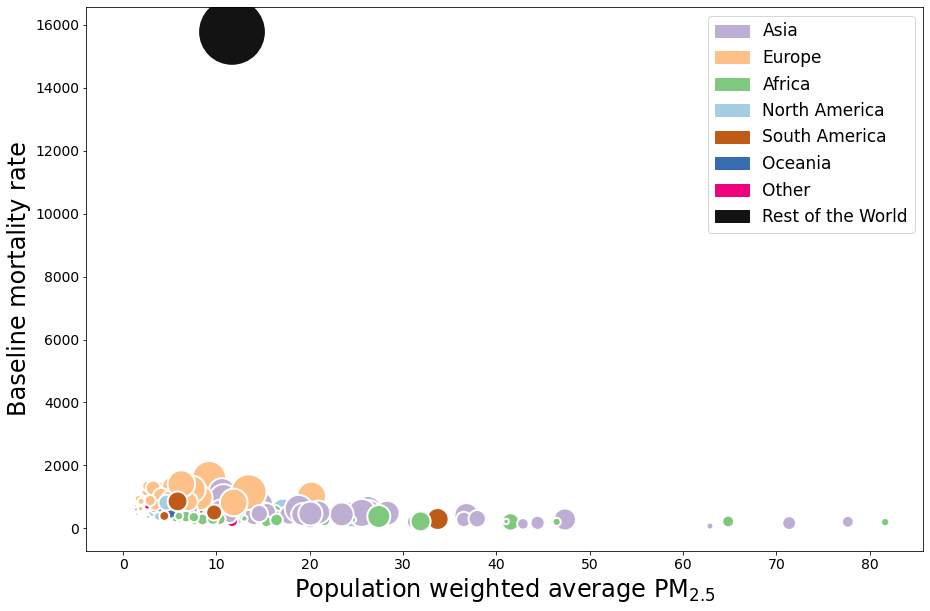

In [233]:
# the first
fig, ax = plt.subplots(figsize=(15, 10))
scatter = plt.scatter(
    x = df_final['PW_PM25'], 
    y = df_final['baseline'], 
    s=df_final['pro_total'] / (df_final['population']/1000000), 
    c=df_final['colors'], 
#     cmap=ListedColormap(["#beaed4","#fdc086","#7fc97f","#a6cee3","#bf5b17","#386cb0","#f0027f","#f0027f","#141313"]), 
#     #141313: black for ROW
#     alpha=0.3, 
    edgecolors="white", 
    linewidth=2);

# plt.ylim(0,1000)
# plt.xlim(10**x_low,10**x_high)
# Add titles (main and on axis)
# plt.xscale('log')
# legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=continent,
#                     loc="upper left", fontsize=18)
# ax.add_artist(legend1)

# add labels to bubbles that are big enough
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 0")


# plt.axhline(y = 0.1, color = 'r', linestyle = '-',label='Line of Zero Net Export of Deaths')
plt.legend(handles=patches,fontsize=17)

matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.ylabel("Baseline mortality rate",fontsize=24)
plt.xlabel("Population weighted average PM$_{2.5}$",fontsize=24)
# plt.title("")

In [225]:
df_final[df_final['Country']=='CHN']['Country'].values[0]

'CHN'

Text(0.5, 0, 'Population weighted average PM$_{2.5}$')

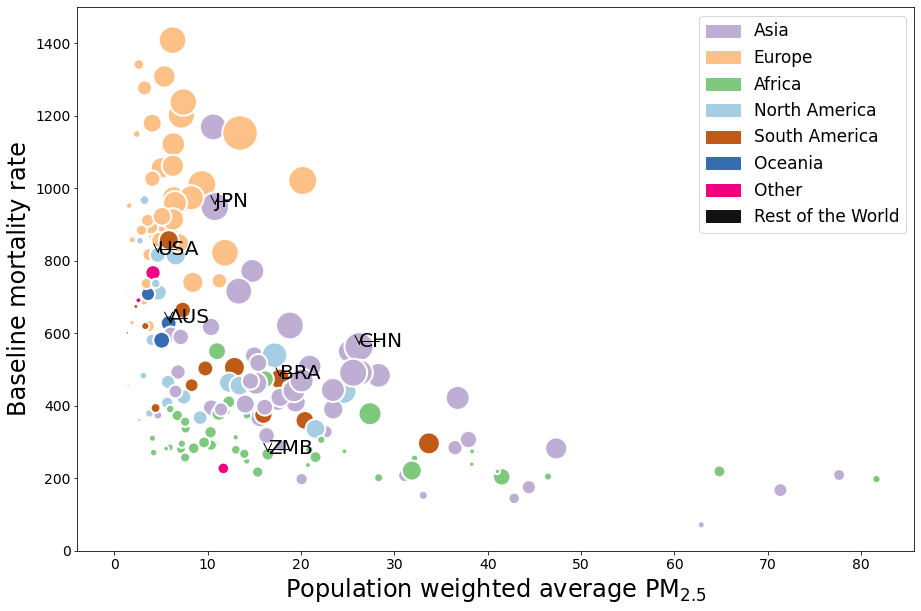

In [243]:
# the first
fig, ax = plt.subplots(figsize=(15, 10))
scatter = plt.scatter(
    x = df_final['PW_PM25'], 
    y = df_final['baseline'], 
    s=df_final['pro_total'] / (df_final['population']/1000000), 
    c=df_final['colors'], 
#     cmap=ListedColormap(["#beaed4","#fdc086","#7fc97f","#a6cee3","#bf5b17","#386cb0","#f0027f","#f0027f","#141313"]), 
#     #141313: black for ROW
#     alpha=0.3, 
    edgecolors="white", 
    linewidth=2);

plt.ylim(0,1500)
# plt.xlim(10**x_low,10**x_high)
# Add titles (main and on axis)
# plt.xscale('log')
# legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=continent,
#                     loc="upper left", fontsize=18)
# ax.add_artist(legend1)

# add labels to bubbles that are big enough
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 0")

i = 'CHN'
plt.annotate(df_final[df_final['Country']==i]['Country'].values[0],xy=(df_final[df_final['Country']==i]['PW_PM25'].values[0],df_final[df_final['Country']==i]['baseline'].values[0]),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['Country']==i]['PW_PM25'].values[0],df_final[df_final['Country']==i]['baseline'].values[0]),)
 
i = 'BRA'
plt.annotate(df_final[df_final['Country']==i]['Country'].values[0],xy=(df_final[df_final['Country']==i]['PW_PM25'].values[0],df_final[df_final['Country']==i]['baseline'].values[0]),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['Country']==i]['PW_PM25'].values[0],df_final[df_final['Country']==i]['baseline'].values[0]),)

i = 'USA'
plt.annotate(df_final[df_final['Country']==i]['Country'].values[0],xy=(df_final[df_final['Country']==i]['PW_PM25'].values[0],df_final[df_final['Country']==i]['baseline'].values[0]),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['Country']==i]['PW_PM25'].values[0],df_final[df_final['Country']==i]['baseline'].values[0]),)
 

i = 'ZMB'
plt.annotate(df_final[df_final['Country']==i]['Country'].values[0],xy=(df_final[df_final['Country']==i]['PW_PM25'].values[0],df_final[df_final['Country']==i]['baseline'].values[0]),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['Country']==i]['PW_PM25'].values[0],df_final[df_final['Country']==i]['baseline'].values[0]),)

i = 'AUS'
plt.annotate(df_final[df_final['Country']==i]['Country'].values[0],xy=(df_final[df_final['Country']==i]['PW_PM25'].values[0],df_final[df_final['Country']==i]['baseline'].values[0]),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['Country']==i]['PW_PM25'].values[0],df_final[df_final['Country']==i]['baseline'].values[0]),)

i = 'JPN'
plt.annotate(df_final[df_final['Country']==i]['Country'].values[0],xy=(df_final[df_final['Country']==i]['PW_PM25'].values[0],df_final[df_final['Country']==i]['baseline'].values[0]),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['Country']==i]['PW_PM25'].values[0],df_final[df_final['Country']==i]['baseline'].values[0]),)


# plt.axhline(y = 0.1, color = 'r', linestyle = '-',label='Line of Zero Net Export of Deaths')
plt.legend(handles=patches,fontsize=17)

matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.ylabel("Baseline mortality rate",fontsize=24)
plt.xlabel("Population weighted average PM$_{2.5}$",fontsize=24)
# plt.title("")

a higher baseline mortality rate may be due to an aging population where a larger proportion of individuals are at higher risk of mortality due to age-related factors.

Europe has the highest baseline mortality rates

In [242]:
baseline['CHN']

563.3097352262332

In [120]:
df_final

0
AFG  22.676649
ALB   8.402192
DZA  15.058381
AND   3.167193
AGO  41.505360
..         ...
VNM  20.063018
YEM  77.656459
ZMB  16.435218
ZWE   5.976830
ROW  11.663425

[188 rows x 1 columns]

In [ ]:
population_weighted_PM25['CHN']

In [ ]:
population_weighted_PM25['IND'],population_weighted_PM25['USA']

In [89]:
high_pm25_country = list(dict(sorted(PW_PM25.items(), key=lambda x:x[1],reverse=True)[:20]).keys())
print(high_pm25_country)

['DJI', 'YEM', 'SAU', 'ERI', 'QAT', 'SGP', 'SUD', 'ARE', 'OMN', 'AGO', 'MRT', 'TCD', 'NER', 'PAK', 'IDN', 'IRN', 'PER', 'KWT', 'SEN', 'SWZ']


In [90]:
dict(sorted(PW_PM25.items(), key=lambda x:x[1],reverse=True)[:20])

{'DJI': 81.65094906396766,
 'YEM': 77.65645851613777,
 'SAU': 71.36447037141082,
 'ERI': 64.82926340434544,
 'QAT': 62.87846515225822,
 'SGP': 47.341235057535584,
 'SUD': 46.452913754502895,
 'ARE': 44.40783019636516,
 'OMN': 42.83818238465821,
 'AGO': 41.5053595683035,
 'MRT': 41.0351720232212,
 'TCD': 38.33135218328175,
 'NER': 38.28973108510071,
 'PAK': 37.936368590733345,
 'IDN': 36.787252010660865,
 'IRN': 36.50266334765426,
 'PER': 33.70224845416715,
 'KWT': 33.09538707133297,
 'SEN': 32.15589255967409,
 'SWZ': 31.870301951312523}

In [92]:
from tqdm import tqdm
for index in tqdm(range(len(PM_25))):
    new_area_fraction = json.loads(PM_25.iloc[index]['new_area_fraction'].replace('\'','\"'))
    for chn_ind in ['CHN','IND']:
        if chn_ind in new_area_fraction.keys():
            print(new_area_fraction,high_country,PM_25.iloc[index]['Total'])

 52%|█████████████████████████████████████▌                                  | 142974/273739 [00:44<00:38, 3394.70it/s]

{'IND': 0.7089988861552261, 'PAK': 0.29100111384477384} IDN 20.887084946337197
{'IND': 0.004301930519587522, 'MDV': 0.9956980694804125} IDN 6.066301960840385
{'IND': 0.9991511004684439, 'MDV': 0.0008488995315561083} IDN 8.59161536749708
{'IND': 1.0} IDN 12.072675463168007
{'IND': 1.0} IDN 15.847555137600583
{'IND': 0.5827406482428718, 'PAK': 0.41725935175712825} IDN 26.480894782093156


 52%|█████████████████████████████████████▊                                  | 143647/273739 [00:44<00:40, 3231.70it/s]

{'IND': 1.0} IDN 18.38192530918637
{'IND': 1.0} IDN 20.01055132548072
{'IND': 0.9905917859098358, 'PAK': 0.00940821409016429} IDN 23.843602719178186
{'IND': 1.0000000000000002} IDN 32.10559514740958
{'IND': 0.8349600144547474, 'PAK': 0.1650399855452525} IDN 43.203552956333496
{'IND': 0.07942789055084058, 'PAK': 0.9205721094491595} IDN 42.28015425692458
{'IND': 0.019325035613168867, 'PAK': 0.9806749643868311} IDN 44.615768120659


 53%|█████████████████████████████████████▉                                  | 144292/273739 [00:44<00:42, 3077.26it/s]

{'IND': 1.0} IDN 23.31067635621927
{'IND': 1.0} IDN 22.891190609988975
{'IND': 0.38433950739689365, 'PAK': 0.6156604926031063} IDN 49.97562932525236
{'IND': 1.0000000000000007} IDN 23.225855894337766
{'IND': 1.0} IDN 24.281614012945177
{'IND': 0.9999999999999998} IDN 26.307789755535314
{'IND': 1.0} IDN 36.6144105154047
{'IND': 1.0} IDN 45.577546917300346
{'IND': 0.9969797371228406, 'PAK': 0.0030202628771593583} IDN 50.399102772062676
{'IND': 0.9999999999999998} IDN 23.228395785781913
{'IND': 1.0} IDN 22.799173616773505
{'IND': 1.0} IDN 23.953845862918534
{'IND': 0.21791509876960352, 'PAK': 0.7820849012303964} IDN 52.883386621663846
{'IND': 1.0} IDN 23.7447565185652
{'IND': 1.0} IDN 23.59845729503403
{'IND': 0.9999999999999999} IDN 23.351167105181723
{'IND': 1.0} IDN 24.291370379508816
{'IND': 1.0} IDN 24.1091716162122
{'IND': 1.0} IDN 19.835020789982657
{'IND': 1.0000000000000009} IDN 21.585502375685216
{'IND': 1.0} IDN 53.04806953182759
{'IND': 1.0} IDN 24.04885111205334
{'IND': 1.0} 

 53%|██████████████████████████████████████                                  | 144942/273739 [00:44<00:44, 2921.67it/s]

{'IND': 1.0} IDN 23.319567116614305
{'IND': 1.0} IDN 24.73604956658415
{'IND': 1.0} IDN 23.692783500777942
{'IND': 1.0} IDN 23.86932016372771
{'IND': 1.0} IDN 24.93384354791183
{'IND': 0.9999999999999997} IDN 25.439034104827975
{'IND': 1.0} IDN 33.00089147767021
{'IND': 1.0} IDN 34.28282382176382
{'IND': 1.0} IDN 36.543890521450024
{'IND': 1.0} IDN 41.40874369908855
{'IND': 1.0} IDN 21.958625644457776
{'IND': 1.0} IDN 22.799794934926545
{'IND': 1.0} IDN 24.097181557512577
{'IND': 1.0} IDN 24.49294222508594
{'IND': 1.0} IDN 24.771646902207067
{'IND': 1.0} IDN 24.77607741533413
{'IND': 0.9999999999999621} IDN 21.35658284681776
{'IND': 1.0} IDN 24.950757256330014
{'IND': 1.0} IDN 24.899889009898967
{'IND': 1.0} IDN 23.00042646179582
{'IND': 1.0} IDN 24.039016396156175
{'IND': 1.0} IDN 25.05850912119491
{'IND': 1.0} IDN 25.278146122725488
{'IND': 1.0} IDN 25.364633558688446
{'IND': 1.0} IDN 25.34915975889534
{'IND': 1.0} IDN 48.71087024930976
{'IND': 0.5989551599914869, 'PAK': 0.4010448400

 53%|██████████████████████████████████████▎                                 | 145489/273739 [00:45<00:55, 2323.66it/s]

 IDN 23.036328758796408
{'IND': 1.0} IDN 24.082134129334577
{'IND': 1.0} IDN 23.715411051868664
{'IND': 1.0} IDN 24.78825267085914
{'IND': 1.0} IDN 25.691731608800023
{'IND': 1.0} IDN 26.32305186549846
{'IND': 1.0} IDN 26.644583928383096
{'IND': 1.0} IDN 27.917278849903397
{'IND': 1.0} IDN 28.612210535522888
{'IND': 1.0} IDN 30.231951086452433
{'IND': 1.0} IDN 31.171634087780788
{'IND': 1.0} IDN 34.34257850106577
{'IND': 1.0} IDN 37.44428519669367
{'IND': 1.0} IDN 44.85200935115482
{'IND': 1.0} IDN 44.24560455112213
{'IND': 1.0} IDN 22.234685312232358
{'IND': 1.0} IDN 23.29388793740867
{'IND': 1.0} IDN 24.978880948893902
{'IND': 1.0} IDN 25.935814429952554
{'IND': 1.0} IDN 25.846028390450662
{'IND': 1.0} IDN 25.74880969698203
{'IND': 1.0} IDN 25.11902062393176
{'IND': 1.0} IDN 25.498072636769496
{'IND': 1.0} IDN 26.167176282486807
{'IND': 1.0} IDN 26.18658201290334
{'IND': 1.0} IDN 21.63443120727439
{'IND': 1.0} IDN 26.684051777609714
{'IND': 1.0} IDN 26.17203845697475
{'IND': 1.0} IDN

 53%|██████████████████████████████████████▍                                 | 145989/273739 [00:45<01:02, 2041.47it/s]

 30.85074750995361
{'IND': 1.0} IDN 30.72695616610952
{'IND': 1.0} IDN 22.94818005997535
{'IND': 1.0} IDN 24.737569118206302
{'IND': 1.0} IDN 26.36905901024807
{'IND': 1.0} IDN 27.000294708304686
{'IND': 1.0} IDN 28.693300390267623
{'IND': 1.0} IDN 28.903711042692798
{'IND': 1.0} IDN 28.977607912215994
{'IND': 1.0} IDN 28.874138533705008
{'IND': 1.0} IDN 27.38852488811293
{'IND': 1.0} IDN 25.614763463937898
{'IND': 1.0} IDN 26.24195791496982
{'IND': 1.0} IDN 27.49678165060864
{'IND': 1.0} IDN 28.696033484782696
{'IND': 1.0} IDN 29.7659576557591
{'IND': 1.0} IDN 30.71829160158791
{'IND': 1.0} IDN 33.2723115724137
{'IND': 1.0} IDN 35.73580483802
{'IND': 1.0} IDN 37.396697422481175
{'IND': 1.0} IDN 38.86954324327846
{'IND': 0.021660597200714293, 'PAK': 0.9783394027992858} IDN 54.22233793442207
{'IND': 0.4267347608566151, 'PAK': 0.573265239143385} IDN 51.88849773012815
{'IND': 0.8303755805267224, 'PAK': 0.1696244194732776} IDN 49.65217329446565
{'IND': 0.816352070282623, 'PAK': 0.183647929

 54%|██████████████████████████████████████▌                                 | 146533/273739 [00:45<01:05, 1956.77it/s]


{'IND': 1.0} IDN 44.525207994793334
{'IND': 1.0} IDN 43.59853443094734
{'IND': 1.0} IDN 41.82253313837967
{'IND': 1.0} IDN 30.850849772550482
{'IND': 1.0} IDN 31.21917972590627
{'IND': 1.0} IDN 33.14354246621545
{'IND': 1.0} IDN 33.002560155184966
{'IND': 1.0} IDN 28.29223932583088
{'IND': 1.0} IDN 30.994563954797282
{'IND': 1.0} IDN 30.19517700823429
{'IND': 1.0} IDN 31.020741373101906
{'IND': 1.0} IDN 33.07517384466948
{'IND': 1.0} IDN 32.749415912621366
{'IND': 1.0} IDN 32.78482575495259
{'IND': 1.0} IDN 33.51361545971853
{'IND': 1.0} IDN 34.04116853403845
{'IND': 1.0} IDN 34.07784953057542
{'IND': 1.0} IDN 35.65947619335218
{'IND': 1.0} IDN 37.03672257140592
{'IND': 1.0} IDN 38.69879618448009
{'IND': 1.0} IDN 40.40903484280487
{'IND': 1.0} IDN 55.43249146468386
{'IND': 1.0} IDN 54.34077898777842
{'IND': 1.0} IDN 52.49444765417595
{'IND': 1.0} IDN 49.758414988185336
{'IND': 1.0} IDN 32.25789304802207
{'IND': 1.0} IDN 32.52827783054003
{'IND': 1.0} IDN 33.764128638211744
{'IND': 1.0

 54%|██████████████████████████████████████▋                                 | 146999/273739 [00:46<01:00, 2105.57it/s]


{'IND': 1.0} IDN 35.00007576635229
{'IND': 1.0} IDN 35.34879711456751
{'IND': 1.0} IDN 35.33098705864378
{'IND': 1.0} IDN 35.561523615573634
{'IND': 1.0} IDN 35.64739531261704
{'IND': 1.0} IDN 35.86034470386041
{'IND': 1.0} IDN 35.94994913116936
{'IND': 1.0} IDN 35.99859468852506
{'IND': 1.0} IDN 37.31018299390356
{'IND': 1.0} IDN 38.1962764860875
{'IND': 1.0} IDN 38.34137947502269
{'IND': 1.0} IDN 37.92575541497246
{'IND': 1.0} IDN 40.46054827099399
{'IND': 1.0} IDN 41.29308491941242
{'IND': 1.0} IDN 43.31799105697088
{'IND': 1.0} IDN 42.795647821600824
{'IND': 1.0} IDN 46.12952102456305
{'IND': 1.0} IDN 47.695619766823555
{'IND': 1.0} IDN 47.94882326092197
{'IND': 1.0} IDN 46.95115791381059
{'IND': 1.0} IDN 49.61042787757291
{'IND': 1.0} IDN 51.07601564366152
{'IND': 1.0} IDN 51.015653743317436
{'IND': 1.0} IDN 49.625066620966834
{'IND': 1.0} IDN 51.47088840676847
{'IND': 1.0} IDN 51.950131377808084
{'IND': 1.0} IDN 49.942909265973974
{'IND': 1.0} IDN 47.3389178523327
{'IND': 1.0} I

 54%|██████████████████████████████████████▊                                 | 147715/273739 [00:46<00:59, 2131.05it/s]

49.61450380054951
{'IND': 1.0} IDN 49.494667477721826
{'IND': 1.0} IDN 49.34144954008859
{'IND': 1.0} IDN 32.47544275183291
{'IND': 1.0} IDN 36.333244911542685
{'IND': 1.0} IDN 36.31878398234294
{'IND': 1.0} IDN 40.79853087040863
{'IND': 1.0} IDN 40.55372571432862
{'IND': 1.0} IDN 48.80953357077258
{'IND': 1.0} IDN 48.84461115173259
{'IND': 1.0} IDN 33.98605298508539
{'IND': 1.0} IDN 35.05199307765822
{'IND': 1.0} IDN 49.28901581302146
{'IND': 1.0} IDN 49.43053978663674
{'IND': 1.0} IDN 49.38556061391112
{'IND': 1.0} IDN 49.23458995656107
{'IND': 1.0} IDN 36.234034331049926
{'IND': 1.0} IDN 35.71710844581047
{'IND': 1.0} IDN 36.98615268171069
{'IND': 1.0} IDN 36.806338847788126
{'IND': 1.0} IDN 35.80022174299106
{'IND': 1.0} IDN 36.7028656685595
{'IND': 1.0} IDN 35.38103732406413
{'IND': 1.0} IDN 36.06112389666953
{'IND': 1.0} IDN 35.18486246848608
{'IND': 1.0} IDN 35.91391442967442
{'IND': 1.0} IDN 36.11770944227568
{'IND': 1.0} IDN 37.262159690128435
{'IND': 1.0} IDN 36.1916816731865

 54%|██████████████████████████████████████▉                                 | 148174/273739 [00:46<01:06, 1885.45it/s]

 IDN 39.041753241363224
{'IND': 1.0} IDN 41.587224528537384
{'IND': 1.0} IDN 43.09720218078657
{'IND': 1.0} IDN 43.096553563680146
{'IND': 1.0} IDN 41.30981513315776
{'IND': 1.0} IDN 43.713682027994786
{'IND': 1.0} IDN 44.874799196733164
{'IND': 1.0} IDN 44.58024222654445
{'IND': 1.0} IDN 42.79656436010518
{'IND': 1.0} IDN 43.82650634074496
{'IND': 1.0} IDN 44.1693961417189
{'IND': 1.0} IDN 44.00049431886217
{'IND': 1.0} IDN 42.76796537270319
{'IND': 1.0} IDN 38.71944054368518
{'IND': 1.0} IDN 38.58102591452681
{'IND': 1.0} IDN 38.40101507241255
{'IND': 0.9999999999999999} IDN 38.023903846935056
{'IND': 1.0000000000000036} IDN 37.594814297826446
{'IND': 1.0} IDN 37.29120413154992
{'IND': 1.0} IDN 35.85268371048154
{'IND': 1.0} IDN 35.59554651555017
{'IND': 1.0} IDN 41.03976166395859
{'IND': 1.0} IDN 41.442552531478626
{'IND': 1.0} IDN 41.5720004086309
{'IND': 1.0} IDN 41.35636520853181
{'IND': 1.0000000000000118} IDN 41.08895100761802
{'IND': 0.9999999999999998} IDN 42.774421446661904


 54%|███████████████████████████████████████                                 | 148648/273739 [00:46<01:05, 1903.64it/s]

IDN 34.98271503330098
{'IND': 1.0} IDN 34.72924203236131
{'IND': 1.0} IDN 34.38007555221233
{'IND': 1.0} IDN 33.69564449308129
{'IND': 1.0} IDN 33.311968159645545
{'IND': 1.0} IDN 32.36804936972181
{'IND': 1.0} IDN 31.587511140067605
{'IND': 1.0} IDN 32.89955552215171
{'IND': 1.0} IDN 34.296914752621674
{'IND': 1.0} IDN 34.232811253735065
{'IND': 1.0} IDN 33.724850713711945
{'IND': 1.0} IDN 33.54477286532769
{'IND': 1.0} IDN 35.72417245886496
{'IND': 1.0} IDN 36.239084881937785
{'IND': 1.0} IDN 38.06136379325062
{'IND': 1.0} IDN 40.00660436338134
{'IND': 1.0} IDN 38.46449748496524
{'IND': 1.0} IDN 33.920316353227584
{'IND': 1.0} IDN 34.640842345076905
{'IND': 1.0} IDN 34.14662581823728
{'IND': 1.0} IDN 34.015719155569805
{'IND': 1.0} IDN 33.161217322166664
{'IND': 1.0} IDN 32.62181107628261
{'IND': 1.0} IDN 36.97389327424048
{'IND': 1.0} IDN 37.54298593790086
{'IND': 1.0} IDN 39.496382129983985
{'IND': 1.0} IDN 39.01925794416786
{'IND': 1.0} IDN 38.65291513900107
{'IND': 1.0} IDN 38.47

 54%|███████████████████████████████████████▏                                | 149059/273739 [00:47<01:12, 1724.49it/s]

 36.9871345121952
{'IND': 1.0} IDN 38.4163218417405
{'IND': 1.0} IDN 38.87786963571246
{'IND': 1.0} IDN 38.852226852983826
{'IND': 1.0} IDN 38.475883620578884
{'IND': 1.0} IDN 39.47389066488645
{'IND': 1.0} IDN 39.92232449556917
{'IND': 1.0} IDN 39.97770199773944
{'IND': 1.0} IDN 40.14520380454774
{'IND': 1.0} IDN 40.07535850102281
{'IND': 1.0} IDN 39.873969997758564
{'IND': 1.0} IDN 39.66645808503005
{'IND': 1.0} IDN 39.30839667253181
{'IND': 1.0} IDN 42.243600923910606
{'IND': 1.0000000000000009} IDN 47.76076436026379
{'IND': 1.0} IDN 48.60796644970726
{'IND': 1.0} IDN 48.92479991192084
{'IND': 1.0} IDN 48.28947867776684
{'IND': 1.0} IDN 48.37723858399382
{'IND': 0.9999999999999998} IDN 37.71196883658672
{'IND': 1.0} IDN 37.47363717356947
{'IND': 1.0} IDN 37.23768788753724
{'IND': 1.0} IDN 37.04559973468898
{'IND': 1.0} IDN 54.58138197253116
{'IND': 1.0} IDN 58.463867225246545
{'IND': 1.0} IDN 50.25966236190528
{'IND': 1.0} IDN 45.66883753238015
{'IND': 1.0} IDN 41.20805225159248
{'I

 55%|███████████████████████████████████████▎                                | 149247/273739 [00:47<01:22, 1511.74it/s]

28.928602024953324
{'IND': 1.0} IDN 28.993508946510815
{'IND': 1.0} IDN 29.39465618257952
{'IND': 1.0} IDN 32.06461040071714
{'IND': 1.0} IDN 33.804206799706016
{'IND': 1.0} IDN 34.32723969857116
{'IND': 1.0} IDN 34.73498522169143
{'IND': 1.0} IDN 35.82734136272221
{'IND': 1.0} IDN 35.41584728571251
{'IND': 1.0} IDN 33.24230624414241
{'IND': 1.0} IDN 35.42694534587694
{'IND': 1.0} IDN 36.88313274950516
{'IND': 1.0} IDN 36.65769915659162
{'IND': 1.0} IDN 35.00954082721892
{'IND': 1.0} IDN 36.37717031618871
{'IND': 1.0} IDN 36.82075676867921
{'IND': 1.0} IDN 36.87046512056626
{'IND': 1.0} IDN 36.62554351805589
{'IND': 1.0} IDN 37.82778550243516
{'IND': 1.0} IDN 38.717974571659994
{'IND': 1.0} IDN 39.10245730471382
{'IND': 1.0} IDN 39.27923031761335
{'IND': 1.0} IDN 39.18123576869325
{'IND': 1.0} IDN 39.01882659200487
{'IND': 1.0} IDN 38.87905062470723
{'IND': 1.0} IDN 38.667385225128385
{'IND': 1.0} IDN 26.932413697876374
{'IND': 1.0} IDN 29.46182399698297
{'IND': 0.9999999999999978} IDN

 55%|███████████████████████████████████████▎                                | 149637/273739 [00:47<01:20, 1541.46it/s]

 33.28499668214559
{'IND': 0.9999999999999998} IDN 27.833314200422457
{'IND': 1.0} IDN 36.99208908294919
{'IND': 1.0} IDN 45.07659629699677
{'IND': 1.0} IDN 17.825343685875758
{'IND': 1.0} IDN 17.28327812922819
{'IND': 1.0} IDN 17.488311141183974
{'IND': 1.0} IDN 18.068749001025118
{'IND': 1.0} IDN 21.549705181970285
{'IND': 1.0} IDN 21.123511241887535
{'IND': 1.0} IDN 21.46813482648851
{'IND': 1.0} IDN 21.702749228999675
{'IND': 1.0} IDN 22.00825634214241
{'IND': 1.0} IDN 22.30148299373534
{'IND': 0.9999999999999994} IDN 27.043778981742168
{'IND': 1.0000000000000013} IDN 28.429087838795887
{'IND': 1.0000000000000162} IDN 29.108855662495863
{'IND': 1.0} IDN 29.988614036102902
{'IND': 1.0000000000000027} IDN 32.229478100762535
{'IND': 1.0} IDN 33.21538398470369
{'IND': 1.0} IDN 34.59483630694478
{'IND': 1.0} IDN 37.95819761045734
{'IND': 1.0} IDN 51.12131020776086
{'IND': 1.0} IDN 77.01054010396142
{'IND': 1.0} IDN 62.36981148317179
{'IND': 1.0} IDN 59.60432094324632
{'IND': 0.999999999

 55%|███████████████████████████████████████▍                                | 150004/273739 [00:47<01:21, 1521.85it/s]

37.189213665197954
{'IND': 1.0} IDN 36.20743471317667
{'IND': 1.0} IDN 35.89170953449534
{'IND': 1.0} IDN 37.01126947333637
{'IND': 1.0} IDN 37.40838085122138
{'IND': 1.0} IDN 37.73774508125497
{'IND': 1.0} IDN 37.91349277982622
{'IND': 1.0} IDN 36.39857150941041
{'IND': 1.0} IDN 46.309729009898945
{'IND': 1.0} IDN 54.06717959303465
{'IND': 1.0} IDN 99.82407748857734
{'IND': 1.0} IDN 31.33409388271837
{'IND': 1.0} IDN 24.645518994436443
{'IND': 1.0} IDN 21.3176962680314
{'IND': 1.0} IDN 20.017642506600136
{'IND': 1.0} IDN 19.651605047692186
{'IND': 1.0} IDN 19.77315137200611
{'IND': 1.0} IDN 21.97608642422383
{'IND': 1.0} IDN 22.492536708742755
{'IND': 1.0} IDN 22.680999360326112
{'IND': 1.0} IDN 22.939602393911038
{'IND': 1.0} IDN 31.69397338872577
{'IND': 1.0} IDN 32.775360248010415
{'IND': 1.0} IDN 34.69266277621863
{'IND': 1.0} IDN 36.34980947342925
{'IND': 1.0} IDN 38.659666518128645
{'IND': 1.0} IDN 55.40066329871287
{'IND': 1.0} IDN 76.19342430396087
{'IND': 1.0} IDN 82.98649621

 55%|███████████████████████████████████████▍                                | 150167/273739 [00:48<01:29, 1376.97it/s]


{'IND': 1.0} IDN 23.699310040068788
{'IND': 1.0} IDN 24.861748356678945
{'IND': 1.0} IDN 27.439767506789718
{'IND': 1.0} IDN 26.99367695635256
{'IND': 1.0} IDN 31.56966307934014
{'IND': 1.0} IDN 33.64830819154324
{'IND': 1.0} IDN 34.472872167272186
{'IND': 1.0} IDN 35.84966472139796
{'IND': 1.0} IDN 38.07523859835514
{'IND': 1.0} IDN 40.381097994788874
{'IND': 1.0} IDN 43.49664850793544
{'IND': 1.0} IDN 48.39887430926189
{'IND': 1.0} IDN 57.072337955808855
{'IND': 1.0} IDN 72.2656654600738
{'IND': 1.0} IDN 76.48662990385158
{'IND': 1.0} IDN 70.92430008032605
{'IND': 1.0} IDN 67.19974354311692
{'IND': 1.0} IDN 63.102500888848404
{'IND': 1.0} IDN 60.56043352624046
{'IND': 1.0} IDN 57.407102331861466
{'IND': 1.0} IDN 53.88878745192667
{'IND': 1.0} IDN 51.909890962598865
{'IND': 1.0} IDN 43.25455613179935
{'IND': 1.0} IDN 43.043026371101675
{'IND': 1.0} IDN 42.57437584857072
{'IND': 1.0} IDN 40.808410321133366
{'IND': 1.0} IDN 36.38869520258185
{'IND': 1.0} IDN 38.10191604247991
{'IND': 1

 55%|███████████████████████████████████████▌                                | 150529/273739 [00:48<01:25, 1445.52it/s]

56.26150828839276
{'IND': 1.0} IDN 55.843859077355866
{'IND': 0.9999999999999999} IDN 55.07784788068166
{'IND': 1.0} IDN 44.62134533594558
{'IND': 1.0} IDN 44.32979753046803
{'IND': 1.0} IDN 43.64919507128839
{'IND': 1.0} IDN 43.13745913799407
{'IND': 1.0} IDN 42.73538310621687
{'IND': 1.0} IDN 42.179595841652215
{'IND': 1.0} IDN 41.98988607584542
{'IND': 1.0} IDN 42.47557134285836
{'IND': 1.0} IDN 38.24342092456658
{'IND': 1.0} IDN 37.28255786829718
{'IND': 1.0} IDN 36.86997919169918
{'IND': 1.0} IDN 36.66926496153265
{'IND': 1.0} IDN 36.764110413259544
{'IND': 1.0} IDN 36.91820499593173
{'IND': 1.0} IDN 36.34474342909331
{'IND': 1.0} IDN 35.666199010901344
{'IND': 1.0} IDN 29.208769380151754
{'IND': 1.0} IDN 30.176263170804262
{'IND': 1.0} IDN 34.074335928076955
{'IND': 1.0} IDN 34.08328459683586
{'IND': 1.0} IDN 33.92457110461956
{'IND': 1.0} IDN 33.10936329170598
{'IND': 1.0} IDN 33.15547595812127
{'IND': 1.0} IDN 33.45047290386999
{'IND': 1.0} IDN 34.373743776016404
{'IND': 1.0} I

 55%|███████████████████████████████████████▋                                | 150896/273739 [00:48<01:17, 1582.27it/s]


{'IND': 1.0} IDN 43.782020515997495
{'IND': 1.0} IDN 44.362513152160055
{'IND': 1.0} IDN 45.02861779729096
{'IND': 1.0} IDN 45.82233609591337
{'IND': 1.0} IDN 46.31548707866192
{'IND': 1.0} IDN 45.73508222146023
{'IND': 1.0} IDN 43.68245048929757
{'IND': 1.0} IDN 38.05880031547676
{'IND': 1.0} IDN 37.41155756642416
{'IND': 1.0} IDN 36.889195220941595
{'IND': 1.0} IDN 36.60231527062808
{'IND': 1.0} IDN 36.49312583345687
{'IND': 1.0} IDN 36.434507916377456
{'IND': 1.0} IDN 36.259845555402855
{'IND': 1.0} IDN 36.12037291091957
{'IND': 1.0} IDN 33.29231261327904
{'IND': 1.0} IDN 33.068993190623864
{'IND': 0.9999999999999997} IDN 12.87504705870807
{'IND': 0.9999999999999994} IDN 12.950420121343459
{'IND': 1.0} IDN 75.11806256327168
{'IND': 1.0} IDN 35.19038133437189
{'IND': 1.0} IDN 27.942766243623392
{'IND': 1.0} IDN 23.203308237379474
{'IND': 1.0} IDN 28.513557056024297
{'IND': 1.0} IDN 28.18692448367127
{'IND': 1.0} IDN 31.16997414374647
{'IND': 1.0} IDN 33.628641832500676
{'IND': 1.0} 

 55%|███████████████████████████████████████▊                                | 151293/273739 [00:48<01:15, 1630.77it/s]

{'IND': 1.0} IDN 43.22183083197601
{'IND': 1.0} IDN 33.2415281738335
{'IND': 1.0} IDN 32.93583396035289
{'IND': 1.0} IDN 32.075428918225256
{'IND': 1.0} IDN 31.676217809353744
{'IND': 1.0} IDN 13.698689727112924
{'IND': 1.0} IDN 68.41367085961713
{'IND': 1.0} IDN 77.17187464079457
{'IND': 1.0} IDN 79.37140464883677
{'IND': 1.0} IDN 72.81657675234794
{'IND': 1.0} IDN 65.84589359830137
{'IND': 1.0} IDN 61.338704657957955
{'IND': 1.0} IDN 30.843114946113744
{'IND': 1.0} IDN 25.742692127132045
{'IND': 1.0} IDN 21.88374014942258
{'IND': 1.0} IDN 28.208993547366337
{'IND': 1.0} IDN 27.970671254306012
{'IND': 1.0} IDN 31.055504447939384
{'IND': 1.0} IDN 33.19994701863149
{'IND': 1.0} IDN 39.59451867728616
{'IND': 1.0} IDN 43.36580586034228
{'IND': 1.0} IDN 53.38565600582231
{'IND': 1.0} IDN 59.801628586021806
{'IND': 1.0} IDN 63.83900346956024
{'IND': 1.0} IDN 64.10542070241019
{'IND': 1.0} IDN 43.1778276178628
{'IND': 1.0} IDN 42.747671319741315
{'IND': 1.0} IDN 42.66558419637295
{'IND': 1.0

 55%|███████████████████████████████████████▊                                | 151465/273739 [00:48<01:23, 1462.03it/s]

 IDN 28.163610311412707
{'IND': 1.0} IDN 31.948914363539103
{'IND': 1.0} IDN 35.44619454558416
{'IND': 1.0} IDN 44.826587489463606
{'IND': 1.0} IDN 57.32058786153044
{'IND': 1.0} IDN 52.171150185990946
{'IND': 1.0} IDN 48.96934124161852
{'IND': 1.0} IDN 47.21443750435472
{'IND': 1.0} IDN 45.60066812809928
{'IND': 1.0} IDN 43.692330479446824
{'IND': 1.0} IDN 41.75705645363381
{'IND': 1.0} IDN 40.90858691605855
{'IND': 1.0} IDN 40.27587957734639
{'IND': 1.0} IDN 39.76381985395892
{'IND': 1.0} IDN 33.08810300860902
{'IND': 1.0} IDN 30.205978808690265
{'IND': 1.0} IDN 28.544223812252852
{'IND': 1.0} IDN 26.708756986691938
{'IND': 1.0} IDN 25.20006823747812
{'IND': 1.0} IDN 24.88197182578117
{'IND': 1.0} IDN 25.365652044734002
{'IND': 1.0} IDN 26.860666909854565
{'IND': 1.0} IDN 29.099865835587902
{'IND': 1.0} IDN 30.66681256249349
{'IND': 1.0} IDN 31.29132375614516
{'IND': 1.0} IDN 31.036340488783257
{'IND': 1.0} IDN 32.330890607042086
{'IND': 1.0} IDN 32.84266598804257
{'IND': 1.0} IDN 32

 56%|███████████████████████████████████████▉                                | 151960/273739 [00:49<01:29, 1368.19it/s]

{'IND': 1.0} IDN 27.73119402141723
{'IND': 1.0} IDN 27.3446395511334
{'IND': 1.0} IDN 26.81275163305223
{'IND': 1.0} IDN 26.28954295816468
{'IND': 1.0} IDN 25.155110035392
{'IND': 1.0} IDN 25.777938028561103
{'IND': 1.0} IDN 31.651974309176246
{'IND': 1.0} IDN 31.936689912939975
{'IND': 1.0} IDN 26.082589328366836
{'IND': 1.0} IDN 26.076175163068626
{'IND': 1.0} IDN 16.124581387515356
{'IND': 1.0} IDN 16.682996380329644
{'IND': 1.0} IDN 16.624143094090687
{'IND': 1.0} IDN 16.80423330253207
{'IND': 1.0} IDN 14.634152584313691
{'IND': 1.0} IDN 15.021864171429865
{'IND': 1.0} IDN 15.783893806425404
{'IND': 1.0} IDN 16.769061759809762
{'IND': 1.0} IDN 16.649380038822503
{'IND': 1.0} IDN 16.889290985959125
{'IND': 1.0} IDN 16.6312679095646
{'IND': 1.0} IDN 16.499863504937355
{'IND': 1.0} IDN 17.882296420372505
{'IND': 1.0} IDN 18.816640141116494
{'IND': 1.0} IDN 19.906139712327807
{'IND': 1.0} IDN 25.336694214083693
{'IND': 1.0} IDN 27.564214581328436
{'IND': 1.0} IDN 29.972253748449866
{'I

 56%|████████████████████████████████████████                                | 152231/273739 [00:49<01:43, 1177.05it/s]

 29.94174241387011
{'IND': 1.0} IDN 28.916270200538396
{'IND': 1.0} IDN 28.92734124027224
{'IND': 1.0} IDN 29.444300103387373
{'IND': 1.0} IDN 27.771481345100465
{'IND': 1.0} IDN 24.883654054247224
{'IND': 1.0} IDN 23.610511284314047
{'IND': 1.0} IDN 23.45935222785151
{'IND': 1.0} IDN 24.15684049182754
{'IND': 1.0} IDN 24.72416523864387
{'IND': 1.0} IDN 28.4645944806624
{'IND': 1.0} IDN 29.081411553265532
{'IND': 1.0} IDN 32.480639939861135
{'IND': 1.0} IDN 32.70735420924861
{'IND': 1.0} IDN 32.37876767230011
{'IND': 1.0} IDN 31.084239660370375
{'IND': 1.0} IDN 31.250227850998
{'IND': 1.0} IDN 29.262016997491415
{'IND': 1.0} IDN 29.007702567830226
{'IND': 1.0} IDN 26.922494987397943
{'IND': 1.0} IDN 26.478989499466913
{'IND': 1.0} IDN 25.797642732417287
{'IND': 1.0} IDN 25.37739231335342
{'IND': 1.0} IDN 33.81948443912722
{'IND': 1.0} IDN 33.02638082635127
{'IND': 1.0} IDN 18.411842968322375
{'IND': 1.0} IDN 19.03549997637013
{'IND': 1.0} IDN 19.002468511832717
{'IND': 1.0} IDN 19.3619

 56%|████████████████████████████████████████                                | 152506/273739 [00:49<01:40, 1209.03it/s]

29.588986752537256
{'IND': 1.0} IDN 24.20726452898358
{'IND': 1.0} IDN 24.7375155699983
{'IND': 1.0} IDN 27.722592729284166
{'IND': 1.0} IDN 28.236014492417425
{'IND': 1.0} IDN 32.65640920657306
{'IND': 1.0} IDN 33.10961487106745
{'IND': 1.0} IDN 33.46790275333025
{'IND': 1.0} IDN 32.65266279160655
{'IND': 1.0} IDN 32.35806652036489
{'IND': 1.0} IDN 31.94810390179935
{'IND': 1.0} IDN 29.455463957607446
{'IND': 1.0} IDN 29.6172598820136
{'IND': 1.0} IDN 11.052819628783563
{'IND': 1.0} IDN 11.236458144414417
{'IND': 0.9999999999999982} IDN 11.393570961407105
{'IND': 1.0000000000000075} IDN 11.410845687637899
{'IND': 1.0} IDN 11.515509983734937
{'IND': 0.9999999999999998} IDN 11.782550727194776
{'IND': 1.0} IDN 12.870668545962602
{'IND': 1.0} IDN 13.787612258854438
{'IND': 1.0} IDN 31.245379645959712
{'IND': 1.0} IDN 31.98887227342177
{'IND': 1.0} IDN 34.8587450363097
{'IND': 1.0} IDN 35.74459809488113
{'IND': 1.0} IDN 37.263661253792066
{'IND': 1.0} IDN 39.023019409379536
{'IND': 1.0} ID

 56%|████████████████████████████████████████▏                               | 152633/273739 [00:49<01:57, 1034.82it/s]


{'IND': 1.0} IDN 32.700571138712114
{'IND': 1.0} IDN 32.04086176391131
{'IND': 1.0} IDN 30.491122296908294
{'IND': 1.0} IDN 29.948768025354067
{'IND': 1.0} IDN 28.55287141002489
{'IND': 1.0} IDN 29.051358822687845
{'IND': 1.0} IDN 29.20751697703374
{'IND': 1.0} IDN 28.742280032864187
{'IND': 1.0} IDN 27.468439810539877
{'IND': 1.0} IDN 28.088805193927307
{'IND': 1.0} IDN 28.402413344048203
{'IND': 1.0} IDN 28.43215450653212
{'IND': 1.0} IDN 28.17333219612042
{'IND': 1.0} IDN 28.765265481116497
{'IND': 1.0} IDN 29.154819469368178
{'IND': 1.0} IDN 29.576838029889217
{'IND': 1.0} IDN 30.205319667539694
{'IND': 1.0} IDN 29.908950023347153
{'IND': 1.0} IDN 29.40436128937545
{'IND': 1.0} IDN 29.90499016058969
{'IND': 1.0} IDN 30.623889120539026
{'IND': 1.0} IDN 30.475518548313083
{'IND': 1.0} IDN 30.079057168191973
{'IND': 1.0} IDN 29.54721093462703
{'IND': 1.0} IDN 28.773190441464912
{'IND': 1.0} IDN 27.94479588720315
{'IND': 1.0} IDN 26.812640026773643
{'IND': 1.0} IDN 25.058523972201463


 56%|████████████████████████████████████████▏                               | 152954/273739 [00:50<01:50, 1091.62it/s]

27.545620906604416
{'IND': 1.0} IDN 27.223062934263545
{'IND': 1.0} IDN 29.187292423531545
{'IND': 1.0} IDN 29.2023289933948
{'IND': 1.0} IDN 13.600188495704465
{'IND': 1.0} IDN 14.264242245699458
{'IND': 1.0} IDN 17.706380393407045
{'IND': 1.0} IDN 17.71907057536871
{'IND': 1.0} IDN 18.04404482442013
{'IND': 1.0} IDN 18.109961899827564
{'IND': 1.0} IDN 18.810563873263984
{'IND': 1.0} IDN 18.61680187799965
{'IND': 1.0} IDN 29.91460649073642
{'IND': 1.0} IDN 30.363379090630154
{'IND': 1.0} IDN 28.190952087394805
{'IND': 1.0} IDN 23.370657270246916
{'IND': 1.0} IDN 23.029831304947034
{'IND': 1.0} IDN 23.42468709990159
{'IND': 1.0} IDN 26.93036121701565
{'IND': 1.0} IDN 34.51902671574172
{'IND': 1.0} IDN 36.101895540109055
{'IND': 1.0} IDN 31.649877673351128
{'IND': 1.0} IDN 31.24668720233244
{'IND': 1.0} IDN 28.959092465131917
{'IND': 1.0} IDN 41.19618190285043
{'IND': 1.0} IDN 40.37939691374825
{'IND': 1.0} IDN 28.036755999378038
{'IND': 1.0} IDN 26.526374348828348
{'IND': 1.0} IDN 26.1

 56%|████████████████████████████████████████▎                               | 153293/273739 [00:50<01:36, 1251.60it/s]


{'IND': 1.0} IDN 11.75903430352539
{'IND': 1.0} IDN 18.132419519064488
{'IND': 1.0} IDN 18.337461516720058
{'IND': 1.0} IDN 19.119732777354567
{'IND': 1.0} IDN 20.821456368350262
{'IND': 1.0} IDN 29.17767073760654
{'IND': 1.0} IDN 28.997194535126994
{'IND': 1.0} IDN 27.991011070243935
{'IND': 1.0} IDN 27.709692911898394
{'IND': 1.0} IDN 29.491229514044583
{'IND': 1.0} IDN 29.086228186289894
{'IND': 1.0} IDN 23.34302546082293
{'IND': 1.0} IDN 23.167741896689282
{'IND': 1.0} IDN 22.47752614601012
{'IND': 1.0} IDN 22.60070980548422
{'IND': 1.0} IDN 29.055217493376283
{'IND': 1.0} IDN 29.49335218886577
{'IND': 1.0} IDN 28.84505584502454
{'IND': 1.0} IDN 29.381003824532296
{'IND': 1.0} IDN 15.630405928824256
{'IND': 1.0} IDN 16.61442896448884
{'IND': 1.0} IDN 17.9293356529398
{'IND': 1.0} IDN 18.76186553915155
{'IND': 1.0} IDN 18.791168348841715
{'IND': 1.0} IDN 18.606629592180866
{'IND': 1.0} IDN 18.96568899316204
{'IND': 1.0} IDN 18.155430202941
{'IND': 1.0} IDN 18.216957247750916
{'IND'

 56%|████████████████████████████████████████▉                                | 153430/273739 [00:50<02:33, 784.85it/s]

{'IND': 1.0} IDN 16.464761941027845
{'IND': 1.0} IDN 28.269316246285594
{'IND': 1.0} IDN 28.400636987967737
{'IND': 1.0} IDN 33.79589220322319
{'IND': 1.0} IDN 32.44560474234227
{'IND': 1.0} IDN 15.408162226599128
{'IND': 1.0000000000000002} IDN 16.55466504927298
{'IND': 1.0} IDN 19.3349518538554
{'IND': 1.0} IDN 15.827340981351742
{'IND': 1.0} IDN 15.0769191013115
{'IND': 1.0} IDN 15.55613212597936
{'IND': 1.0} IDN 15.815979968602434
{'IND': 1.0} IDN 16.50089369656103
{'IND': 1.0} IDN 16.27854067930928
{'IND': 1.0} IDN 16.28862411678932
{'IND': 1.0} IDN 16.471460191467422
{'IND': 1.0} IDN 17.144502460595433
{'IND': 1.0} IDN 17.6734356182466
{'IND': 1.0} IDN 19.336492434158572
{'IND': 1.0} IDN 20.66513881300034
{'IND': 1.0} IDN 21.425588649434186
{'IND': 1.0} IDN 22.16901872641943
{'IND': 1.0} IDN 22.937371380486738
{'IND': 1.0} IDN 21.28188394159582
{'IND': 1.0} IDN 19.684156712803365
{'IND': 1.0} IDN 19.56999258448878
{'IND': 1.0} IDN 19.06246307255545
{'IND': 1.0} IDN 17.71517067440

 56%|████████████████████████████████████████▉                                | 153631/273739 [00:51<02:47, 718.87it/s]

 IDN 13.239246151576467
{'IND': 0.002412333543330401, 'PAK': 0.9975876664566696} IDN 10.045052558223166
{'IND': 0.930779103998692, 'PAK': 0.06922089600130807} IDN 12.113857315321239
{'IND': 1.0} IDN 12.875288346649569
{'IND': 1.0} IDN 12.929744481088882
{'IND': 0.6433201043729614, 'PAK': 0.3566798956270386} IDN 12.386295052398586
{'IND': 1.0} IDN 17.290884727038517
{'IND': 1.0} IDN 17.224535735446842
{'IND': 1.0} IDN 17.094331002759485
{'IND': 1.0} IDN 16.765022749875907
{'IND': 1.0} IDN 16.3785039415606
{'IND': 1.0} IDN 16.329589676550444
{'IND': 1.0} IDN 16.52511504150188
{'IND': 1.0} IDN 16.474730496883357
{'IND': 1.0} IDN 19.2817345175393
{'IND': 1.0} IDN 19.80981548096714
{'IND': 1.0} IDN 31.856324275084862
{'IND': 1.0} IDN 32.53612518367418
{'IND': 1.0} IDN 24.30507281068455
{'IND': 1.0} IDN 24.335688529240954
{'IND': 1.0} IDN 23.57536540998729
{'IND': 1.0} IDN 23.35015810171239
{'IND': 1.0} IDN 23.015878735905087
{'IND': 1.0} IDN 22.773981065577438
{'IND': 1.0} IDN 21.8249967198

 56%|█████████████████████████████████████████                                | 153752/273739 [00:51<02:29, 804.53it/s]

 IDN 17.21552555940282
{'IND': 1.0} IDN 16.338730712160334
{'IND': 1.0} IDN 16.35392355315685
{'IND': 1.0} IDN 27.402710441852896
{'IND': 1.0} IDN 27.860237277165957
{'IND': 1.0} IDN 40.82003421189323
{'IND': 1.0} IDN 40.46309768657363
{'IND': 1.0} IDN 39.13712886862253
{'IND': 1.0} IDN 38.30519812945076
{'IND': 1.0} IDN 24.67678233050431
{'IND': 1.0} IDN 24.626327210504495
{'IND': 1.0} IDN 24.838955831636362
{'IND': 1.0} IDN 26.55459496102428
{'IND': 1.0} IDN 24.41216433465368
{'IND': 1.0} IDN 24.5231618411878
{'IND': 1.0} IDN 27.929380675228145
{'IND': 1.0} IDN 27.795565885390033
{'IND': 1.0} IDN 13.125886726136322
{'IND': 1.0} IDN 13.008777558656385
{'IND': 1.0} IDN 16.417844167194914
{'IND': 1.0} IDN 16.609722581426603
{'IND': 1.0} IDN 17.76646192133522
{'IND': 1.0} IDN 17.69626626839063
{'IND': 1.0} IDN 17.77603268070677
{'IND': 1.0} IDN 18.55306281810779
{'IND': 1.0} IDN 17.03676934208
{'IND': 1.0} IDN 16.589207783005364
{'IND': 1.0} IDN 16.3760617060395
{'IND': 1.0} IDN 16.33652

 56%|█████████████████████████████████████████                                | 154007/273739 [00:51<02:07, 939.69it/s]

 IDN 19.02882744726208
{'IND': 1.0} IDN 19.12349169089352
{'IND': 1.0} IDN 18.337979394826963
{'IND': 1.0} IDN 16.747437012526547
{'IND': 1.0} IDN 16.525965578553578
{'IND': 1.0} IDN 16.270263727893393
{'IND': 1.0} IDN 15.781048450229159
{'IND': 1.0} IDN 15.633378737450393
{'IND': 1.0} IDN 18.061555207258742
{'IND': 1.0} IDN 19.373357187886562
{'IND': 1.0} IDN 21.098031340505074
{'IND': 1.0} IDN 24.9734422809861
{'IND': 1.0} IDN 27.15854642715918
{'IND': 1.0} IDN 27.452564309255852
{'IND': 1.0} IDN 29.428977161160432
{'IND': 1.0} IDN 31.307961171200645
{'IND': 1.0} IDN 32.5801350282681
{'IND': 1.0} IDN 33.22196375697196
{'IND': 1.0} IDN 36.14506211238613
{'IND': 1.0} IDN 37.83023664556218
{'IND': 1.0} IDN 32.39471643391885
{'IND': 1.0} IDN 30.946669724473917
{'IND': 1.0} IDN 29.656400681221655
{'IND': 1.0} IDN 29.568114619183845
{'IND': 1.0} IDN 29.60547478726721
{'IND': 1.0} IDN 27.06457228863748
{'IND': 1.0} IDN 25.6807253695673
{'IND': 1.0} IDN 21.340891239537953
{'IND': 1.0} IDN 22

 56%|████████████████████████████████████████▌                               | 154288/273739 [00:51<01:49, 1094.59it/s]

IDN 12.022133361116465
{'IND': 1.0} IDN 11.27499256763468
{'IND': 1.0} IDN 12.497816419873043
{'IND': 1.0} IDN 12.685179123623955
{'IND': 1.0} IDN 18.895274758958635
{'IND': 1.0} IDN 19.12473539853173
{'IND': 1.0} IDN 21.177006746021878
{'IND': 1.0} IDN 24.495187157628884
{'IND': 1.0} IDN 22.731882287114217
{'IND': 1.0} IDN 20.929674441193914
{'IND': 1.0} IDN 28.10949051022266
{'IND': 1.0} IDN 27.65794280250003
{'IND': 1.0} IDN 27.400015758114286
{'IND': 1.0} IDN 27.176882543699392
{'IND': 1.0} IDN 24.35354825814354
{'IND': 1.0} IDN 23.946992762826543
{'IND': 1.0} IDN 23.73280743110437
{'IND': 1.0} IDN 23.60910429141631
{'IND': 1.0} IDN 22.991681756326862
{'IND': 1.0} IDN 22.73731047067007
{'IND': 1.0} IDN 22.4352671408713
{'IND': 1.0} IDN 22.2263532177015
{'IND': 1.0} IDN 20.2387179048632
{'IND': 1.0} IDN 20.75697751533737
{'IND': 1.0} IDN 31.896491996674385
{'IND': 1.0} IDN 32.016180222000884
{'IND': 1.0} IDN 32.33277932253975
{'IND': 1.0} IDN 32.373707965913624
{'IND': 1.0} IDN 27.6

 56%|████████████████████████████████████████▌                               | 154407/273739 [00:51<01:58, 1006.31it/s]

 15.677076584307272
{'IND': 1.0} IDN 15.285799769860787
{'IND': 1.0} IDN 15.121321735588715
{'IND': 1.0} IDN 14.927792206533784
{'IND': 1.0} IDN 14.729450094411785
{'IND': 1.0} IDN 14.84127350242608
{'IND': 1.0} IDN 26.679788303603882
{'IND': 1.0} IDN 29.88083419504602
{'IND': 1.0} IDN 30.98338933747005
{'IND': 1.0} IDN 31.83947054664538
{'IND': 1.0} IDN 34.21980409797409
{'IND': 1.0} IDN 35.56585337432449
{'IND': 1.0} IDN 34.74229567243601
{'IND': 1.0} IDN 32.64004673959812
{'IND': 1.0} IDN 31.180520919827522
{'IND': 1.0} IDN 29.462981929210024
{'IND': 1.0} IDN 27.9830528239645
{'IND': 1.0} IDN 28.534979961925124
{'IND': 1.0} IDN 28.62201479411473
{'IND': 1.0} IDN 27.21034062126636
{'IND': 1.0} IDN 25.86624278051366
{'IND': 1.0} IDN 25.097158640605727
{'IND': 1.0} IDN 23.993909407756703
{'IND': 1.0} IDN 21.32124820706933
{'IND': 1.0} IDN 21.719931187141192
{'IND': 1.0} IDN 22.718006371242705
{'IND': 1.0} IDN 24.41155466348815
{'IND': 1.0} IDN 28.894883556980915
{'IND': 1.0} IDN 30.450

 56%|████████████████████████████████████████▋                               | 154660/273739 [00:52<01:56, 1024.30it/s]

IDN 27.252456459771494
{'IND': 1.0} IDN 28.25420969033769
{'IND': 1.0} IDN 28.416243425045714
{'IND': 1.0} IDN 26.903423153010337
{'IND': 1.0} IDN 26.703027985641874
{'IND': 1.0} IDN 27.110257461062183
{'IND': 0.1715887572045769, 'PAK': 0.8284112427954231} IDN 29.94824401859891
{'IND': 0.04927608317303402, 'PAK': 0.950723916826966} IDN 30.713526145826755
{'IND': 0.09106693335363793, 'PAK': 0.9089330666463621} IDN 27.99405154254587
{'IND': 0.3550056807218369, 'PAK': 0.6449943192781632} IDN 25.898483231354845
{'IND': 0.0253062748168139, 'PAK': 0.9746937251831861} IDN 23.962911199691455
{'IND': 0.029853827631911495, 'PAK': 0.9701461723680884} IDN 11.37968555496427
{'IND': 0.8881887179004988, 'PAK': 0.1118112820995012} IDN 11.124398426577333
{'IND': 1.0} IDN 11.075220336078992
{'IND': 1.0} IDN 11.684747219273714
{'IND': 1.0} IDN 12.583802583692378
{'IND': 1.0} IDN 13.206609428068049
{'IND': 1.0} IDN 13.704272674799878
{'IND': 1.0} IDN 14.091305696842303
{'IND': 1.0} IDN 13.811023805175427


 57%|████████████████████████████████████████▋                               | 154900/273739 [00:52<01:54, 1033.73it/s]

 14.025121137768632
{'IND': 1.0} IDN 14.233762992123427
{'IND': 1.0} IDN 14.049366530754416
{'IND': 1.0} IDN 13.572246324108104
{'IND': 1.0} IDN 13.235482644974205
{'IND': 1.0} IDN 16.910445313125518
{'IND': 1.0} IDN 17.331109112340513
{'IND': 1.0} IDN 18.594081764252817
{'IND': 1.0} IDN 19.42400909469653
{'IND': 1.0} IDN 15.471235839223654
{'IND': 1.0} IDN 15.640304551379947
{'IND': 1.0} IDN 16.64432557223806
{'IND': 1.0} IDN 16.61541173083725
{'IND': 1.0} IDN 17.27255884253318
{'IND': 1.0} IDN 17.998188170783592
{'IND': 1.0} IDN 17.324487407698342
{'IND': 1.0} IDN 15.965176252207964
{'IND': 1.0} IDN 15.821918013895564
{'IND': 1.0} IDN 16.15282848829367
{'IND': 1.0} IDN 16.335086595387715
{'IND': 1.0} IDN 16.560419268535927
{'IND': 1.0} IDN 26.87020359159621
{'IND': 1.0} IDN 27.448593716306327
{'IND': 1.0} IDN 27.922252546781543
{'IND': 1.0} IDN 28.273771806407716
{'IND': 1.0} IDN 33.28018796593738
{'IND': 1.0} IDN 32.5297209718725
{'IND': 1.0} IDN 29.936168139784208
{'IND': 1.0} IDN 

 57%|████████████████████████████████████████▊                               | 155272/273739 [00:52<01:54, 1030.27it/s]

15.753875761152567
{'IND': 1.0} IDN 15.885360241307401
{'IND': 1.0} IDN 16.627470646036635
{'IND': 1.0} IDN 32.58346086779395
{'IND': 1.0} IDN 32.803362050563564
{'IND': 1.0} IDN 33.85294676217724
{'IND': 1.0} IDN 35.37632853651685
{'IND': 1.0} IDN 35.88942402256157
{'IND': 1.0} IDN 35.43468219754612
{'IND': 1.0} IDN 30.863201420561467
{'IND': 1.0} IDN 30.867072996818035
{'IND': 1.0} IDN 30.680161927763358
{'IND': 1.0} IDN 30.809693716214447
{'IND': 1.0} IDN 28.480376655190657
{'IND': 1.0} IDN 28.340032256532528
{'IND': 1.0} IDN 27.144768793288634
{'IND': 1.0} IDN 27.23197230478563
{'IND': 1.0} IDN 27.084729069780877
{'IND': 1.0} IDN 25.815301602645675
{'IND': 1.0} IDN 33.147505866749896
{'IND': 1.0} IDN 32.10126592655119
{'IND': 1.3533818458854855e-09, 'PAK': 0.9999999986466183} IDN 13.196456830733435
{'IND': 0.17181872570727136, 'PAK': 0.8281812742927286} IDN 12.666863529191453
{'IND': 1.0} IDN 15.795280921241073
{'IND': 1.0} IDN 16.151174942966847
{'IND': 1.0} IDN 16.38240422246463


 57%|████████████████████████████████████████▉                               | 155650/273739 [00:53<01:45, 1117.75it/s]


{'IND': 1.0} IDN 25.345261575380462
{'IND': 1.0} IDN 25.43806272140838
{'IND': 1.0} IDN 25.64809606379859
{'IND': 1.0} IDN 25.863622188543985
{'IND': 1.0} IDN 25.68595672784153
{'IND': 1.0} IDN 25.160431204505283
{'IND': 1.0} IDN 24.213043297579624
{'IND': 1.0} IDN 23.374968084126344
{'IND': 1.0} IDN 22.390346081872238
{'IND': 1.0} IDN 21.51762771979486
{'IND': 1.0} IDN 20.81078387394485
{'IND': 1.0} IDN 21.29421451002552
{'IND': 1.0} IDN 21.154223578190674
{'IND': 1.0} IDN 21.857715505788136
{'IND': 1.0} IDN 22.097260204397273
{'IND': 1.0} IDN 21.95173475218983
{'IND': 1.0} IDN 21.595039966330916
{'IND': 1.0} IDN 22.323937532139233
{'IND': 1.0} IDN 22.715260346114512
{'IND': 1.0} IDN 23.30276882263096
{'IND': 1.0} IDN 23.875709898490946
{'IND': 1.0} IDN 24.43445086044283
{'IND': 1.0} IDN 25.595592447319838
{'IND': 1.0} IDN 26.59004675596881
{'IND': 1.0} IDN 27.261830399140727
{'IND': 1.0} IDN 27.868425869143508
{'IND': 1.0} IDN 29.39434523922778
{'IND': 1.0} IDN 28.421016278404608
{'

 57%|█████████████████████████████████████████▌                               | 155874/273739 [00:53<02:03, 952.73it/s]

{'IND': 1.0} IDN 26.418888017770747
{'IND': 1.0} IDN 29.07997933331982
{'IND': 1.0} IDN 28.65875685119491
{'IND': 1.0} IDN 27.738250791996347
{'IND': 1.0} IDN 26.591600106824103
{'IND': 1.0} IDN 12.721088211437024
{'IND': 1.0} IDN 13.136310824086205
{'IND': 1.0} IDN 11.708099650775388
{'IND': 1.0} IDN 11.289719948214778
{'IND': 1.0} IDN 11.033475968029158
{'IND': 1.0} IDN 10.85710780310962
{'IND': 1.0} IDN 13.960618438629766
{'IND': 1.0} IDN 15.666348173614974
{'IND': 1.0} IDN 30.621833699224805
{'IND': 1.0} IDN 24.57924155852838
{'IND': 1.0} IDN 19.89906421022324
{'IND': 1.0} IDN 18.24864655831
{'IND': 1.0} IDN 17.455531694153578
{'IND': 1.0} IDN 16.813812651366476
{'IND': 1.0} IDN 16.092586765494943
{'IND': 1.0} IDN 20.788571817637884
{'IND': 1.0} IDN 19.920378908859913
{'IND': 1.0} IDN 19.569640470438713
{'IND': 1.0} IDN 17.76996640016274
{'IND': 1.0} IDN 17.482238335755262
{'IND': 1.0} IDN 16.385634659041393
{'IND': 1.0} IDN 15.757946230353053
{'IND': 1.0} IDN 16.91848012521912
{'I

 57%|█████████████████████████████████████████                               | 156133/273739 [00:53<01:56, 1008.60it/s]


{'IND': 1.0} IDN 25.02472800851336
{'IND': 1.0} IDN 23.861037963389727
{'IND': 1.0} IDN 21.756162019370095
{'IND': 1.0} IDN 21.15590548526773
{'IND': 0.4046685996654905, 'PAK': 0.5953314003345095} IDN 14.047543718777462
{'IND': 0.032557874333702316, 'PAK': 0.9674421256662977} IDN 13.374739244885511
{'IND': 1.0} IDN 13.257974872823512
{'IND': 1.0} IDN 13.726478976374734
{'IND': 1.0} IDN 14.348508319833499
{'IND': 1.0} IDN 14.599921749354351
{'IND': 1.0} IDN 16.84468291155947
{'IND': 1.0} IDN 19.480082749190103
{'IND': 1.0} IDN 9.34252157631321
{'IND': 1.0} IDN 9.628277565124858
{'IND': 1.0} IDN 10.437700737316096
{'IND': 1.0} IDN 12.651090637911675
{'IND': 1.0} IDN 13.727592601917854
{'IND': 1.0} IDN 15.176445514409771
{'IND': 1.0} IDN 15.916483876102504
{'IND': 1.0} IDN 19.081352924157652
{'IND': 1.0} IDN 21.17087894368542
{'IND': 1.0} IDN 21.78627483194583
{'IND': 1.0} IDN 19.549033911965576
{'IND': 1.0} IDN 15.689601241880483
{'IND': 1.0} IDN 16.128665212561092
{'IND': 1.0} IDN 19.0

 57%|█████████████████████████████████████████▏                              | 156471/273739 [00:54<01:56, 1002.60it/s]

{'IND': 1.0} IDN 15.396851973112526
{'IND': 1.0} IDN 16.189404196031468
{'IND': 1.0} IDN 17.232774606839563
{'IND': 1.0} IDN 18.47420408031586
{'IND': 1.0} IDN 20.456368635022454
{'IND': 1.0} IDN 21.551136090877208
{'IND': 1.0} IDN 22.466533583705655
{'IND': 1.0} IDN 25.529163461987434
{'IND': 1.0} IDN 26.400492555114702
{'IND': 1.0} IDN 27.18900197518807
{'IND': 1.0} IDN 28.10828502733967
{'IND': 1.0} IDN 29.2523708351826
{'IND': 1.0} IDN 28.618792924706778
{'IND': 1.0} IDN 27.99209649509727
{'IND': 1.0} IDN 28.297905711518275
{'IND': 1.0} IDN 26.376352896467584
{'IND': 1.0} IDN 25.217491866055102
{'IND': 1.0} IDN 24.17759002309323
{'IND': 1.0} IDN 24.153411783285335
{'IND': 1.0} IDN 24.069967225415233
{'IND': 1.0} IDN 23.540269887489345
{'IND': 1.0} IDN 22.652861474145674
{'IND': 1.0} IDN 23.085357172449882
{'IND': 1.0} IDN 23.160556158683093
{'IND': 1.0} IDN 23.17514790591982
{'IND': 1.0} IDN 24.059270201504717
{'IND': 1.0} IDN 24.765424025516353
{'IND': 1.0} IDN 25.305331541599244


 57%|█████████████████████████████████████████▊                               | 156576/273739 [00:54<02:00, 968.88it/s]

 IDN 27.742836620447257
{'IND': 1.0} IDN 28.279960013852474
{'IND': 1.0} IDN 25.120905721849933
{'IND': 1.0} IDN 25.284735875851222
{'IND': 1.0} IDN 26.34320060346073
{'IND': 1.0} IDN 24.605332364064516
{'IND': 1.0} IDN 24.31489869032567
{'IND': 1.0} IDN 24.253465918418314
{'IND': 1.0} IDN 19.389831485798894
{'IND': 1.0} IDN 18.897164831995468
{'IND': 1.0} IDN 18.379742765188396
{'IND': 1.0} IDN 18.00911674208826
{'IND': 1.0} IDN 12.994202401058754
{'IND': 1.0} IDN 13.532391523125806
{'IND': 1.0} IDN 17.14509444249675
{'IND': 1.0} IDN 16.657643941216648
{'IND': 1.0} IDN 16.608258029421425
{'IND': 1.0} IDN 16.263783111088454
{'IND': 1.0} IDN 15.61760070449969
{'IND': 1.0} IDN 14.982429653076197
{'IND': 1.0} IDN 16.7059559763657
{'IND': 1.0} IDN 20.96830848107808
{'IND': 1.0} IDN 14.794314752306505
{'IND': 1.0} IDN 15.016789260838317
{'IND': 1.0} IDN 15.962453313412697
{'IND': 1.0} IDN 14.29351505579945
{'IND': 1.0} IDN 15.332557664142072
{'IND': 1.0} IDN 15.566145214323429
{'IND': 1.0} 

 57%|█████████████████████████████████████████▎                              | 156991/273739 [00:54<01:51, 1048.99it/s]

{'IND': 1.0} IDN 20.540165360352333
{'IND': 1.0} IDN 20.662982879447412
{'IND': 1.0} IDN 20.73689079837904
{'IND': 1.0} IDN 20.984029353664447
{'IND': 1.0} IDN 29.03238897302417
{'IND': 1.0} IDN 29.303731588236214
{'IND': 1.0} IDN 28.73341810899958
{'IND': 1.0} IDN 28.578187372210564
{'IND': 1.0} IDN 25.143138790323768
{'IND': 1.0} IDN 25.094238036824716
{'IND': 1.0} IDN 24.960008182575656
{'IND': 1.0} IDN 24.929422216493336
{'IND': 1.0} IDN 25.099824283558796
{'IND': 1.0} IDN 24.292060566851614
{'IND': 1.0} IDN 22.454069200160234
{'IND': 1.0} IDN 22.012589217057513
{'IND': 1.0} IDN 15.480133148857036
{'IND': 1.0} IDN 16.060689769572267
{'IND': 1.0} IDN 16.69288301335788
{'IND': 1.0} IDN 16.78052231470792
{'IND': 1.0} IDN 16.981827964190472
{'IND': 1.0} IDN 17.181853731038615
{'IND': 1.0} IDN 17.072426595798344
{'IND': 1.0} IDN 15.316604350833892
{'IND': 1.0} IDN 15.156416970996222
{'IND': 1.0} IDN 15.8254713991575
{'IND': 1.0} IDN 16.810464157860483
{'IND': 1.0} IDN 17.273137260188484

 57%|█████████████████████████████████████████▉                               | 157340/273739 [00:55<01:57, 986.99it/s]

 IDN 23.63738993954857
{'IND': 1.0} IDN 23.203814114538467
{'IND': 1.0} IDN 22.00178112419541
{'IND': 1.0} IDN 20.09007942353783
{'IND': 1.0} IDN 16.44226244290927
{'IND': 1.0} IDN 15.709569537858785
{'IND': 1.0} IDN 16.321940765910085
{'IND': 1.0} IDN 16.414821353401372
{'IND': 1.0} IDN 16.272043326997853
{'IND': 1.0} IDN 15.972601258855796
{'IND': 1.0} IDN 17.38582617695691
{'IND': 1.0} IDN 17.17616055587534
{'IND': 1.0} IDN 17.195802567826142
{'IND': 1.0} IDN 17.058736321127064
{'IND': 1.0} IDN 17.700526260734172
{'IND': 1.0} IDN 17.874611592316256
{'IND': 1.0} IDN 18.23472609956429
{'IND': 1.0} IDN 18.87515059952618
{'IND': 1.0} IDN 19.566583462758256
{'IND': 1.0} IDN 20.53203550796907
{'IND': 1.0} IDN 21.334567435797922
{'IND': 1.0} IDN 21.632562466939703
{'IND': 1.0} IDN 22.41542616115229
{'IND': 1.0} IDN 9.26455521457043
{'IND': 1.0} IDN 9.186825637102274
{'IND': 1.0} IDN 9.047718269099267
{'IND': 1.0} IDN 8.652285671881849
{'IND': 1.0} IDN 8.056174479230572
{'IND': 1.0} IDN 9.7

 58%|█████████████████████████████████████████▉                               | 157444/273739 [00:55<02:12, 876.20it/s]

IDN 18.24837494063757
{'IND': 1.0} IDN 18.513298687218466
{'IND': 1.0} IDN 18.43181768429875
{'IND': 1.0} IDN 18.67574984283482
{'IND': 1.0} IDN 18.196920475993252
{'IND': 1.0} IDN 18.2666128201205
{'IND': 1.0} IDN 18.13858186162351
{'IND': 1.0} IDN 18.25670150235029
{'IND': 1.0} IDN 18.623680844509394
{'IND': 1.0} IDN 19.40117949473185
{'IND': 1.0} IDN 19.77490889382653
{'IND': 1.0} IDN 20.6132304230607
{'IND': 1.0} IDN 24.158327900424318
{'IND': 1.0} IDN 24.59697925630057
{'IND': 1.0} IDN 25.390532559158963
{'IND': 1.0} IDN 26.054248846687713
{'IND': 1.0} IDN 26.87862706697541
{'IND': 1.0} IDN 27.96260898508907
{'IND': 1.0} IDN 28.78129883226272
{'IND': 1.0} IDN 30.006181525635583
{'IND': 1.0} IDN 29.48773356130284
{'IND': 1.0} IDN 29.95208166103987
{'IND': 1.0} IDN 27.596837538665667
{'IND': 1.0} IDN 28.327568024625243
{'IND': 1.0} IDN 28.022870981706912
{'IND': 1.0} IDN 27.215699576791714
{'IND': 1.0} IDN 26.544576461967857
{'IND': 1.0} IDN 25.809048708646593
{'IND': 1.0} IDN 26.33

 58%|██████████████████████████████████████████                               | 157777/273739 [00:55<02:13, 871.51it/s]

 IDN 17.23556844102289
{'IND': 1.0} IDN 17.50669351938309
{'IND': 1.0} IDN 17.72395477044772
{'IND': 1.0} IDN 16.89647947085468
{'IND': 1.0} IDN 16.643591002129753
{'IND': 1.0} IDN 16.582528040313523
{'IND': 1.0} IDN 16.581255621120242
{'IND': 1.0} IDN 16.72280759415468
{'IND': 1.0} IDN 17.248739954108
{'IND': 1.0} IDN 17.74875084769633
{'IND': 1.0} IDN 17.30396979019111
{'IND': 1.0} IDN 17.343419839755065
{'IND': 1.0} IDN 17.73380357022949
{'IND': 1.0} IDN 18.653879034829075
{'IND': 1.0} IDN 18.700765967782168
{'IND': 1.0} IDN 17.74267873852672
{'IND': 1.0} IDN 16.51221968890839
{'IND': 1.0} IDN 15.642399481643647
{'IND': 1.0} IDN 14.933746646441772
{'IND': 1.0} IDN 14.24826662536719
{'IND': 1.0} IDN 13.572231068726921
{'IND': 1.0} IDN 12.943890807355476
{'IND': 1.0} IDN 12.43825320442738
{'IND': 1.0} IDN 11.347695659340182
{'IND': 1.0} IDN 10.626530269543562
{'IND': 1.0} IDN 10.038168414035574
{'IND': 1.0} IDN 9.526357862312047
{'IND': 1.0} IDN 9.192024145762026
{'IND': 1.0} IDN 8.76

 58%|██████████████████████████████████████████▏                              | 158124/273739 [00:55<02:02, 940.00it/s]

IDN 28.54191144722237
{'IND': 1.0} IDN 28.187411193775894
{'IND': 1.0} IDN 27.10767554349509
{'IND': 1.0} IDN 26.586110480889246
{'IND': 1.0} IDN 27.561769362130114
{'IND': 1.0} IDN 27.12141869900828
{'IND': 1.0} IDN 27.090648262717053
{'IND': 1.0} IDN 27.456797872838827
{'IND': 1.0} IDN 27.51769124950043
{'IND': 1.0} IDN 27.20737709708373
{'IND': 1.0} IDN 28.636290306584907
{'IND': 1.0} IDN 29.333980550251656
{'IND': 1.0} IDN 29.51772469778416
{'IND': 1.0} IDN 29.040541665588073
{'IND': 1.0} IDN 28.731542767919684
{'IND': 1.0} IDN 28.521008328385715
{'IND': 1.0} IDN 28.51342597832235
{'IND': 1.0} IDN 28.379061868772904
{'IND': 1.0} IDN 27.013737210865134
{'IND': 1.0} IDN 26.491677917630383
{'IND': 1.0} IDN 26.092707942974016
{'IND': 1.0} IDN 25.55251034594186
{'IND': 1.0} IDN 25.00169292415875
{'IND': 1.0} IDN 24.984314034620425
{'IND': 1.0} IDN 25.60696279931401
{'IND': 1.0} IDN 25.296408659627154
{'IND': 1.0} IDN 24.853095684421444
{'IND': 1.0} IDN 24.867061522256662
{'IND': 1.0} ID

 58%|██████████████████████████████████████████▏                              | 158363/273739 [00:56<02:05, 921.63it/s]

 28.928527042849744
{'IND': 1.0} IDN 27.392491267900645
{'IND': 1.0} IDN 28.318598932447358
{'IND': 1.0} IDN 28.523770390186844
{'IND': 1.0} IDN 28.452986182343572
{'IND': 1.0} IDN 27.414199287007904
{'IND': 1.0} IDN 26.54564841890685
{'IND': 1.0} IDN 24.300866053741657
{'IND': 1.0} IDN 24.2569150332544
{'IND': 1.0} IDN 25.562311426889476
{'IND': 1.0} IDN 25.288166085696503
{'IND': 1.0} IDN 25.241257917109202
{'IND': 1.0} IDN 25.40763887226629
{'IND': 1.0} IDN 25.995815141608162
{'IND': 1.0} IDN 25.993173398812804
{'IND': 1.0} IDN 25.815809264035266
{'IND': 1.0} IDN 25.47356084765498
{'IND': 1.0} IDN 23.800604648586713
{'IND': 1.0} IDN 23.478528667227685
{'IND': 1.0} IDN 21.961088814748265
{'IND': 1.0} IDN 21.33705749110204
{'IND': 1.0} IDN 17.03099587908662
{'IND': 1.0} IDN 17.15653923887553
{'IND': 1.0} IDN 17.40101939781496
{'IND': 1.0} IDN 17.415501942314044
{'IND': 1.0} IDN 17.50524454023447
{'IND': 1.0} IDN 17.648378546706113
{'IND': 1.0} IDN 17.553912292610434
{'IND': 1.0} IDN 1

 58%|██████████████████████████████████████████▎                              | 158695/273739 [00:56<01:55, 992.02it/s]

IDN 16.355852053878685
{'IND': 1.0} IDN 16.541480147702064
{'IND': 1.0} IDN 16.932866654305478
{'IND': 1.0} IDN 17.71075950774318
{'IND': 1.0} IDN 15.287158379819315
{'IND': 1.0} IDN 16.879318522085264
{'IND': 1.0} IDN 16.594579264714053
{'IND': 1.0} IDN 15.95787470039587
{'IND': 1.0} IDN 18.249286786765992
{'IND': 1.0} IDN 18.433301064937087
{'IND': 1.0} IDN 18.666156857597777
{'IND': 1.0} IDN 18.746237119878835
{'IND': 1.0} IDN 18.576466787853533
{'IND': 1.0} IDN 18.476498315716704
{'IND': 1.0} IDN 22.367610886849324
{'IND': 1.0} IDN 23.078108160382044
{'IND': 1.0} IDN 29.810135481287354
{'IND': 1.0} IDN 30.39951285738013
{'IND': 1.0} IDN 31.115687006982224
{'IND': 1.0} IDN 31.26018624686361
{'IND': 1.0} IDN 30.59666857270247
{'IND': 1.0} IDN 29.88358989673339
{'IND': 1.0} IDN 28.025170220295152
{'IND': 1.0} IDN 30.21540321988499
{'IND': 1.0} IDN 31.29077590315685
{'IND': 1.0} IDN 30.759796645937083
{'IND': 1.0} IDN 28.54928041295851
{'IND': 1.0} IDN 26.81553194604863
{'IND': 1.0} ID

 58%|█████████████████████████████████████████▊                              | 159144/273739 [00:56<01:52, 1015.42it/s]

 IDN 21.339763312407996
{'IND': 1.0} IDN 21.191006852782362
{'IND': 1.0} IDN 21.78300559948019
{'IND': 1.0} IDN 19.192935533983665
{'IND': 1.0} IDN 20.597593033927676
{'IND': 1.0} IDN 21.82830729589161
{'IND': 1.0} IDN 22.063397084982917
{'IND': 1.0} IDN 22.459071597912963
{'IND': 1.0} IDN 21.67753537923644
{'IND': 1.0} IDN 21.700694485412896
{'IND': 1.0} IDN 21.80785510998325
{'IND': 1.0} IDN 21.664471984340565
{'IND': 1.0} IDN 21.67500004793827
{'IND': 1.0} IDN 15.503235425945682
{'IND': 1.0} IDN 15.693372321216097
{'IND': 1.0} IDN 15.778202701323586
{'IND': 1.0} IDN 15.118658582224814
{'IND': 1.0} IDN 12.896848745781663
{'IND': 1.0} IDN 12.897336124970064
{'IND': 1.0} IDN 12.786586743370204
{'IND': 1.0} IDN 13.152882428383887
{'IND': 1.0} IDN 18.8457756018066
{'IND': 1.0} IDN 18.812793975562144
{'IND': 1.0} IDN 18.77152616209473
{'IND': 1.0} IDN 18.7365794676491
{'IND': 1.0} IDN 18.435777350775084
{'IND': 1.0} IDN 18.28634683220838
{'IND': 1.0} IDN 29.891233041167695
{'IND': 1.0} ID

 58%|██████████████████████████████████████████▍                              | 159249/273739 [00:57<02:15, 844.79it/s]

IDN 17.135128027830437
{'IND': 1.0} IDN 29.65400180007639
{'IND': 1.0} IDN 29.387127512857724
{'IND': 1.0} IDN 29.44345028587169
{'IND': 1.0} IDN 30.15182485236287
{'IND': 1.0} IDN 29.977660130450552
{'IND': 1.0} IDN 29.819440215401194
{'IND': 1.0} IDN 17.018739055775285
{'IND': 1.0} IDN 17.168166861103394
{'CHN': 1.0} IDN 73.51054397767948
{'CHN': 1.0} IDN 73.21588710725533
{'IND': 1.0} IDN 14.150285005352787
{'IND': 1.0} IDN 7.800250264269864
{'IND': 1.0} IDN 7.405821931633424
{'CHN': 1.0} IDN 53.98890748046576
{'CHN': 1.0} IDN 25.149028984160473
{'IND': 1.0000000000000002} IDN 18.23924418628187
{'IND': 1.0} IDN 18.825851886877484
{'IND': 1.0} IDN 20.165754302869836
{'IND': 1.0} IDN 21.252728655145685
{'IND': 1.0} IDN 24.575338175350968
{'IND': 1.0} IDN 25.045192505962792
{'IND': 1.0} IDN 25.622104008940376
{'IND': 1.0} IDN 25.553650542533752
{'IND': 1.0} IDN 25.3680037903831
{'IND': 1.0} IDN 25.313565641755964
{'IND': 1.0} IDN 25.267352896502928
{'IND': 1.0} IDN 24.506108003461378
{

 58%|██████████████████████████████████████████▌                              | 159609/273739 [00:57<02:09, 880.47it/s]

 IDN 11.359547655373875
{'IND': 1.0} IDN 16.568226705656574
{'IND': 1.0} IDN 17.370875951791916
{'IND': 1.0} IDN 19.89909491966779
{'IND': 1.0} IDN 20.106587299726165
{'IND': 1.0} IDN 18.72179358741679
{'IND': 1.0} IDN 18.850091128192467
{'IND': 1.0} IDN 27.744162574652357
{'IND': 1.0} IDN 27.905650799431264
{'IND': 1.0} IDN 27.76918076084849
{'IND': 1.0} IDN 27.183387855638657
{'IND': 1.0} IDN 22.81547517102923
{'IND': 1.0} IDN 22.44537206452111
{'IND': 1.0} IDN 16.626546823483693
{'IND': 1.0} IDN 15.725104333494123
{'IND': 1.0} IDN 13.09776055692289
{'IND': 1.0} IDN 12.92582638191816
{'IND': 1.0} IDN 12.736037420966966
{'IND': 1.0} IDN 12.786234237892835
{'IND': 1.0} IDN 12.599813886058257
{'IND': 1.0} IDN 12.413360661081478
{'IND': 1.0} IDN 14.048268426108079
{'IND': 1.0} IDN 14.000733858016384
{'IND': 1.0} IDN 16.078618043509422
{'IND': 1.0} IDN 16.1795606319552
{'IND': 1.0} IDN 16.30314089530774
{'IND': 1.0} IDN 16.362908048927068
{'CHN': 1.0} IDN 64.99102805021224
{'CHN': 1.0} ID

 58%|██████████████████████████████████████████▌                              | 159817/273739 [00:57<02:07, 894.79it/s]

IDN 29.63955506025467
{'IND': 1.0} IDN 30.311154570038287
{'IND': 1.0} IDN 30.683203353412555
{'IND': 1.0} IDN 31.081056305101548
{'IND': 1.0} IDN 31.852367376741007
{'IND': 1.0} IDN 30.163669516303266
{'IND': 1.0} IDN 30.141122508949536
{'IND': 1.0} IDN 29.05076439381007
{'IND': 1.0} IDN 27.356061364943542
{'IND': 1.0} IDN 26.09460041420611
{'IND': 1.0} IDN 25.2885065299777
{'IND': 1.0} IDN 12.459176122472885
{'IND': 1.0} IDN 12.469966471111857
{'IND': 1.0} IDN 12.089181113561215
{'IND': 1.0} IDN 12.35390232485327
{'IND': 1.0} IDN 13.244743708980849
{'IND': 1.0} IDN 13.517267986508532
{'IND': 1.0} IDN 20.13839654769052
{'IND': 1.0} IDN 20.11774235260667
{'IND': 1.0} IDN 18.830892786533216
{'IND': 1.0} IDN 18.87375382548935
{'IND': 1.0} IDN 29.13060959626106
{'IND': 1.0} IDN 29.300478483052057
{'IND': 1.0} IDN 29.527101292817477
{'IND': 1.0} IDN 29.642025549151704
{'IND': 1.0} IDN 28.915201970760062
{'IND': 1.0} IDN 28.76189190828545
{'IND': 1.0} IDN 28.599546520914952
{'IND': 1.0} IDN

 58%|██████████████████████████████████████████▋                              | 159987/273739 [00:58<03:17, 574.78it/s]

 15.469836930789583
{'IND': 1.0} IDN 13.260265554862649
{'IND': 1.0} IDN 13.212273736443578
{'IND': 1.0} IDN 12.90158627298293
{'IND': 1.0} IDN 12.519809612558944
{'IND': 1.0} IDN 10.859365107751174
{'IND': 1.0} IDN 10.404552324150938
{'IND': 1.0} IDN 9.614627234106209
{'IND': 1.0} IDN 9.348948175470962
{'IND': 1.0} IDN 8.863578547292116
{'IND': 1.0} IDN 8.428355838127057
{'IND': 0.9999999999999998} IDN 11.61351844205213
{'IND': 1.0} IDN 13.018477199723309
{'IND': 1.0} IDN 11.494637042201084
{'IND': 1.0} IDN 11.376943027939532
{'IND': 1.0} IDN 17.016552090037127
{'IND': 1.0} IDN 19.10910216070935
{'IND': 1.0} IDN 22.831823315749112
{'IND': 1.0000000000000078} IDN 25.948295229663454
{'IND': 1.0000000000000002} IDN 27.330156119775047
{'IND': 1.0} IDN 24.32870991051663
{'IND': 1.0} IDN 18.73930520336556
{'IND': 1.0} IDN 17.463044235262572
{'IND': 1.0} IDN 17.303746455237814
{'IND': 1.0} IDN 14.77921710077317
{'IND': 1.0} IDN 14.10922915093973
{'IND': 1.0} IDN 13.882457393155994
{'IND': 1.

 59%|██████████████████████████████████████████▋                              | 160173/273739 [00:58<02:56, 644.21it/s]

22.54149334848206
{'IND': 1.0} IDN 22.91360625460357
{'IND': 1.0} IDN 22.956684405832366
{'IND': 1.0} IDN 23.112621482215218
{'IND': 1.0} IDN 23.325185872609573
{'IND': 1.0} IDN 23.046410889883024
{'IND': 1.0} IDN 20.529334004452178
{'IND': 1.0} IDN 12.49551815424704
{'IND': 1.0} IDN 12.84958917413986
{'IND': 1.0} IDN 13.250401210359216
{'IND': 1.0} IDN 13.99491233199788
{'IND': 1.0} IDN 15.094799394616675
{'IND': 1.0} IDN 15.083856617886005
{'IND': 1.0} IDN 15.235680806218241
{'IND': 1.0} IDN 15.62646179350184
{'IND': 1.0} IDN 14.787419591972949
{'IND': 1.0} IDN 14.632475580865782
{'IND': 1.0} IDN 13.826965748899404
{'IND': 1.0} IDN 13.473658702003181
{'IND': 1.0} IDN 11.919977369979403
{'IND': 1.0} IDN 11.44143805165349
{'IND': 1.0} IDN 9.413149440013798
{'CHN': 1.0} IDN 61.39407520483635
{'CHN': 1.0} IDN 55.49961861016878
{'IND': 1.0} IDN 13.02873294659857
{'IND': 1.0} IDN 14.325329187016493
{'IND': 1.0} IDN 14.143209286441909
{'IND': 1.0} IDN 14.444878029663677
{'IND': 1.0} IDN 13.

 59%|██████████████████████████████████████████▊                              | 160530/273739 [00:58<01:59, 943.71it/s]


{'IND': 1.0} IDN 16.299004401621836
{'IND': 1.0} IDN 17.38813733553886
{'IND': 1.0} IDN 33.863283104019345
{'IND': 1.0} IDN 31.470501030066274
{'IND': 1.0} IDN 22.718365025574204
{'IND': 1.0} IDN 20.264846581743317
{'IND': 1.0} IDN 18.420312822154347
{'IND': 1.0} IDN 16.743814262890673
{'IND': 1.0} IDN 16.184816381472928
{'IND': 1.0} IDN 16.573561817699854
{'IND': 1.0} IDN 14.898910966930028
{'IND': 1.0} IDN 14.843092282273929
{'IND': 1.0} IDN 17.28728469940518
{'IND': 1.0} IDN 17.41170776965404
{'IND': 1.0} IDN 19.127733584794946
{'IND': 1.0} IDN 18.400868630702412
{'IND': 1.0} IDN 18.381708128035022
{'IND': 1.0} IDN 18.434432422543424
{'IND': 1.0} IDN 13.607380983179619
{'IND': 1.0} IDN 13.670103698612085
{'IND': 1.0} IDN 11.889837355483092
{'IND': 1.0} IDN 11.423704208296435
{'IND': 1.0} IDN 18.130153562330438
{'IND': 1.0} IDN 18.25688133093801
{'IND': 1.0} IDN 28.924737576154627
{'IND': 1.0} IDN 29.02509996410817
{'IND': 1.0} IDN 29.412651688942884
{'IND': 1.0} IDN 28.635588149591

 59%|██████████████████████████████████████████▊                              | 160635/273739 [00:58<02:13, 846.78it/s]

{'IND': 1.0} IDN 14.557264954197066
{'IND': 1.0} IDN 15.71945824802616
{'IND': 1.0} IDN 16.182275505739312
{'IND': 1.0} IDN 17.72014555896112
{'IND': 1.0} IDN 17.936202427568286
{'IND': 1.0} IDN 17.974927276056942
{'IND': 1.0} IDN 18.19639242334381
{'IND': 1.0} IDN 17.829573796814575
{'IND': 1.0} IDN 18.27611313469164
{'IND': 1.0} IDN 18.806552883890344
{'IND': 1.0} IDN 18.681761528588535
{'IND': 1.0} IDN 19.770397598332792
{'IND': 1.0} IDN 20.942723977030198
{'IND': 1.0} IDN 11.002901464426813
{'IND': 1.0} IDN 10.810521232469457
{'IND': 1.0} IDN 10.713337051167933
{'IND': 1.0} IDN 10.59857822255993
{'IND': 1.0} IDN 17.96073035195638
{'IND': 1.0} IDN 18.235762055510307
{'IND': 1.0} IDN 18.832323568904386
{'IND': 1.0} IDN 19.1050750766604
{'IND': 1.0} IDN 19.054982435950198
{'IND': 1.0} IDN 19.8773876206073
{'IND': 1.0} IDN 26.851093078838677
{'IND': 1.0} IDN 27.026840667173303
{'IND': 1.0} IDN 27.20077406392533
{'IND': 1.0} IDN 28.168647524226134
{'IND': 1.0} IDN 24.818424070318684
{'I

 59%|██████████████████████████████████████████▉                              | 160865/273739 [00:59<02:20, 806.15it/s]


{'IND': 1.0} IDN 16.08248839173184
{'IND': 1.0} IDN 17.39848358824055
{'IND': 1.0} IDN 20.39016991812885
{'IND': 1.0} IDN 20.97788629441014
{'IND': 1.0} IDN 16.760628408297606
{'IND': 1.0} IDN 16.690355448269553
{'IND': 1.0} IDN 19.413748868508144
{'IND': 1.0} IDN 19.30077563509352
{'IND': 1.0} IDN 19.906871489762697
{'IND': 1.0} IDN 20.61838546636295
{'IND': 1.0} IDN 24.036924913298247
{'IND': 1.0} IDN 28.806106477109687
{'IND': 1.0} IDN 11.559334735335185
{'IND': 1.0} IDN 10.900583942683514
{'IND': 1.0} IDN 17.737067925605974
{'IND': 1.0} IDN 17.633399530835824
{'IND': 1.0} IDN 17.592563516702704
{'IND': 1.0} IDN 17.560468207022037
{'IND': 1.0} IDN 18.75274737714549
{'IND': 1.0} IDN 18.877954768582505
{'IND': 1.0} IDN 26.352714706450836
{'IND': 1.0} IDN 26.485140977177895
{'IND': 1.0} IDN 26.933771738548607
{'IND': 1.0} IDN 27.498747845723067
{'IND': 1.0} IDN 22.988858136001156
{'IND': 1.0} IDN 22.10116550334899
{'IND': 1.0} IDN 22.958841681710553
{'IND': 1.0} IDN 23.376656339203727

 59%|███████████████████████████████████████████                              | 161301/273739 [00:59<01:53, 993.60it/s]

21.67884045970491
{'IND': 1.0} IDN 21.394230559794554
{'IND': 1.0} IDN 20.950084026894928
{'IND': 1.0} IDN 21.48931807682786
{'IND': 1.0} IDN 30.200257004142046
{'IND': 1.0} IDN 28.877184401485483
{'IND': 1.0} IDN 17.266191139041155
{'IND': 1.0} IDN 17.14297797700219
{'IND': 1.0} IDN 18.198798578663208
{'IND': 1.0} IDN 19.934151773201364
{'IND': 1.0} IDN 22.19906217512795
{'IND': 1.0} IDN 22.835520415935303
{'IND': 1.0} IDN 24.89219217329511
{'IND': 1.0} IDN 28.748460066251948
{'IND': 1.0} IDN 12.768196958173235
{'IND': 1.0} IDN 12.753711882762282
{'IND': 1.0} IDN 12.685371665890266
{'IND': 1.0} IDN 12.593581827663503
{'IND': 1.0} IDN 18.385229404020482
{'IND': 1.0} IDN 18.53645209714342
{'IND': 1.0} IDN 27.81086477469342
{'IND': 1.0} IDN 27.776197591994787
{'IND': 1.0} IDN 26.597964281765368
{'IND': 1.0} IDN 26.33506429230001
{'IND': 1.0} IDN 20.214128784353136
{'IND': 1.0} IDN 20.153334413455262
{'IND': 1.0} IDN 20.44466869628912
{'IND': 1.0} IDN 20.861094001873767
{'IND': 1.0} IDN 2

 59%|██████████████████████████████████████████▌                             | 161710/273739 [01:00<01:38, 1142.86it/s]


{'IND': 1.0} IDN 15.181534849117368
{'IND': 1.0} IDN 15.171146674763179
{'IND': 1.0} IDN 15.28953645272827
{'IND': 1.0} IDN 15.438299118942094
{'IND': 1.0} IDN 15.755974549734745
{'IND': 1.0} IDN 16.814959708882704
{'IND': 1.0} IDN 16.33811942844668
{'IND': 1.0} IDN 16.4607028551059
{'IND': 1.0} IDN 14.757082538125962
{'IND': 1.0} IDN 14.160304222878871
{'IND': 1.0} IDN 14.179090454415922
{'IND': 1.0} IDN 11.558497456269265
{'IND': 1.0} IDN 11.320208439237376
{'IND': 1.0} IDN 10.78290012233294
{'IND': 1.0} IDN 10.576772062746404
{'CHN': 1.0} IDN 43.377318690041434
{'CHN': 1.0} IDN 34.60471885356792
{'IND': 1.0} IDN 14.9645714539075
{'IND': 1.0} IDN 15.753390173732644
{'IND': 1.0} IDN 21.529154261721736
{'IND': 1.0} IDN 23.920166043243103
{'IND': 1.0} IDN 24.61108216232096
{'IND': 1.0} IDN 24.017380340718137
{'IND': 1.0} IDN 20.422953728797253
{'IND': 1.0} IDN 20.451472440668045
{'IND': 1.0} IDN 25.195751691072875
{'IND': 1.0} IDN 26.231328710865384
{'IND': 1.0} IDN 26.893819672368988


 59%|██████████████████████████████████████████▌                             | 161942/273739 [01:00<01:48, 1029.15it/s]

{'IND': 1.0} IDN 14.738886861696836
{'IND': 1.0} IDN 16.004121726666256
{'IND': 1.0} IDN 15.78314337263862
{'IND': 1.0} IDN 14.169329928744332
{'IND': 1.0} IDN 14.082325723230651
{'IND': 1.0} IDN 13.815699061683965
{'IND': 1.0} IDN 11.707385650289659
{'IND': 1.0} IDN 11.407817931428278
{'IND': 1.0} IDN 10.909193074645993
{'IND': 1.0} IDN 10.880392265594747
{'CHN': 1.0} IDN 38.68480009896327
{'CHN': 1.0} IDN 36.681233961298084
{'CHN': 1.0} IDN 35.857971604293326
{'CHN': 1.0} IDN 34.263369364342054
{'IND': 1.0000000000000018} IDN 21.407599400609758
{'IND': 1.0} IDN 27.429818792006166
{'IND': 1.0} IDN 22.316397264573766
{'IND': 1.0} IDN 21.842187467969637
{'IND': 1.0} IDN 23.013280360031455
{'IND': 1.0} IDN 21.62157313104545
{'IND': 1.0} IDN 21.90664528034689
{'IND': 1.0} IDN 23.003723731334084
{'IND': 1.0} IDN 26.573918543731363
{'IND': 1.0} IDN 27.893255862400565
{'IND': 1.0} IDN 28.296135442630526
{'IND': 1.0} IDN 28.407686751441368
{'IND': 1.0} IDN 20.165064704778068
{'IND': 1.0} IDN 

 59%|██████████████████████████████████████████▋                             | 162363/273739 [01:00<01:43, 1080.09it/s]


{'IND': 1.0} IDN 11.68629673776692
{'IND': 1.0} IDN 11.279010385333155
{'IND': 1.0} IDN 11.155879411819756
{'IND': 1.0} IDN 11.223057382757343
{'IND': 1.0} IDN 11.592558357916317
{'IND': 1.0} IDN 12.073809078359789
{'IND': 1.0} IDN 10.886045073593555
{'IND': 1.0} IDN 9.50097247701553
{'IND': 1.0} IDN 11.334173342182126
{'IND': 1.0} IDN 13.540120909117398
{'IND': 1.0} IDN 15.152938948736232
{'IND': 1.0} IDN 16.632021314721538
{'IND': 1.0} IDN 17.669925843892777
{'IND': 1.0} IDN 18.61739726387085
{'IND': 1.0} IDN 18.00378928482462
{'IND': 1.0} IDN 17.794555155980575
{'IND': 1.0} IDN 17.73105691842747
{'IND': 1.0} IDN 17.92254043825605
{'IND': 1.0} IDN 17.983519929347345
{'IND': 1.0} IDN 17.362727835219154
{'IND': 1.0} IDN 17.224997518008973
{'IND': 1.0} IDN 17.433907308713692
{'IND': 1.0} IDN 17.818230199809392
{'IND': 1.0} IDN 17.14361498830951
{'IND': 1.0} IDN 17.044516180880247
{'IND': 1.0} IDN 17.3050023164945
{'IND': 1.0} IDN 17.920467379260963
{'IND': 1.0} IDN 17.154605009722907
{

 59%|██████████████████████████████████████████▊                             | 162735/273739 [01:01<01:46, 1041.03it/s]

{'IND': 1.0} IDN 16.31295207008352
{'IND': 1.0} IDN 16.586932517200378
{'IND': 1.0} IDN 24.387791833659243
{'IND': 1.0} IDN 25.074925599227992
{'IND': 1.0} IDN 20.474634997385394
{'IND': 1.0} IDN 19.858843855760767
{'IND': 1.0} IDN 19.368821331004007
{'IND': 1.0} IDN 9.54907958071798
{'IND': 1.0} IDN 7.537457072686474
{'CHN': 1.0} IDN 32.370498928292946
{'CHN': 1.0} IDN 36.41272476024045
{'CHN': 1.0} IDN 39.24235569883977
{'CHN': 1.0} IDN 44.03470843285453
{'CHN': 1.0} IDN 41.64430634617854
{'CHN': 1.0} IDN 28.484380623419305
{'CHN': 1.0} IDN 24.835839541307223
{'IND': 1.0} IDN 11.372591599540453
{'IND': 1.0} IDN 12.06118789042016
{'IND': 1.0} IDN 13.048659215408208
{'IND': 1.0} IDN 14.962427221870438
{'IND': 1.0} IDN 20.114018413458258
{'IND': 1.0} IDN 22.04901193834067
{'IND': 1.0} IDN 20.414891907398363
{'IND': 1.0} IDN 22.37000244362347
{'IND': 1.0} IDN 20.81692023365058
{'IND': 1.0} IDN 17.953022062151625
{'IND': 1.0} IDN 21.504015039306445
{'IND': 1.0} IDN 21.387854088178717
{'IN

 60%|███████████████████████████████████████████▍                             | 163075/273739 [01:01<01:51, 992.46it/s]

 IDN 23.581120705033655
{'IND': 1.0} IDN 24.211223334641794
{'IND': 1.0} IDN 24.179017961305576
{'IND': 1.0} IDN 23.850431036040632
{'IND': 1.0} IDN 23.1456898168041
{'IND': 1.0} IDN 23.486225789589163
{'IND': 1.0} IDN 23.29437382956868
{'IND': 1.0} IDN 22.723916658676067
{'IND': 1.0} IDN 21.892723261818798
{'IND': 1.0} IDN 21.834373640922298
{'IND': 1.0} IDN 21.319332956788166
{'IND': 1.0} IDN 18.897117106461636
{'IND': 1.0} IDN 18.783968985395195
{'IND': 1.0} IDN 18.825463139357392
{'IND': 1.0} IDN 21.005097061408197
{'IND': 1.0} IDN 15.114430324873927
{'IND': 1.0} IDN 14.949837256346623
{'IND': 1.0} IDN 14.396970727317733
{'IND': 1.0} IDN 13.888459908508192
{'IND': 1.0} IDN 13.583450863997331
{'IND': 1.0} IDN 12.687726388874243
{'IND': 1.0} IDN 11.678566548666916
{'IND': 1.0} IDN 10.294328931714855
{'IND': 1.0} IDN 11.441813668022647
{'IND': 1.0} IDN 11.05943055488003
{'IND': 1.0} IDN 10.039533015526132
{'IND': 1.0} IDN 8.883927519760649
{'CHN': 1.0} IDN 36.08633557384029
{'CHN': 1.

 60%|██████████████████████████████████████████▉                             | 163432/273739 [01:01<01:44, 1055.68it/s]

IDN 20.686346429572737
{'IND': 1.0} IDN 20.823893178607793
{'IND': 1.0} IDN 21.485362660437666
{'IND': 1.0} IDN 22.10157427463391
{'IND': 1.0} IDN 19.77464922125817
{'IND': 1.0} IDN 19.228160988816256
{'IND': 1.0} IDN 17.16600964702335
{'IND': 1.0} IDN 16.178144640617056
{'IND': 1.0} IDN 15.19104206603517
{'IND': 1.0} IDN 14.823459869494062
{'IND': 1.0} IDN 15.074963204789123
{'IND': 1.0} IDN 15.62610740693685
{'IND': 1.0} IDN 16.50027511701265
{'IND': 1.0} IDN 17.713594245181007
{'IND': 1.0} IDN 16.09625197666149
{'IND': 1.0} IDN 16.217058312213325
{'IND': 1.0} IDN 16.248458282220025
{'IND': 1.0} IDN 15.163372500586597
{'IND': 1.0} IDN 15.39115250469462
{'IND': 1.0} IDN 15.38344212580412
{'IND': 1.0} IDN 15.476142653044974
{'IND': 1.0} IDN 15.464627927672296
{'IND': 1.0} IDN 15.878955647978689
{'IND': 1.0} IDN 15.702141722341764
{'IND': 1.0} IDN 15.985622047644412
{'IND': 1.0} IDN 16.123657115659494
{'IND': 1.0} IDN 15.99185578595734
{'IND': 1.0} IDN 15.403657391112343
{'IND': 1.0} ID

 60%|███████████████████████████████████████████▋                             | 163647/273739 [01:01<01:53, 972.21it/s]

 16.56402850462911
{'IND': 1.0} IDN 18.98955342338128
{'IND': 1.0} IDN 18.930561383583935
{'IND': 1.0} IDN 15.454107171990188
{'IND': 1.0} IDN 15.186138235154854
{'IND': 1.0} IDN 9.52381807225193
{'IND': 1.0} IDN 9.856199733719915
{'IND': 1.0} IDN 20.622683342692223
{'IND': 1.0} IDN 17.4974129854454
{'IND': 1.0} IDN 16.03855449872632
{'IND': 1.0} IDN 25.825818103551008
{'IND': 1.0} IDN 25.91734179298276
{'IND': 1.0} IDN 25.378480706506707
{'IND': 1.0} IDN 22.74157298258391
{'IND': 1.0} IDN 20.280804065902924
{'IND': 1.0} IDN 21.087574727944705
{'IND': 1.0} IDN 20.53864854712033
{'IND': 1.0} IDN 20.57649773856726
{'IND': 1.0} IDN 20.76323123662189
{'IND': 1.0} IDN 20.846396621146987
{'IND': 1.0} IDN 21.467317156901895
{'IND': 1.0} IDN 19.83833504181578
{'IND': 1.0} IDN 19.19483310105641
{'IND': 1.0} IDN 18.345779514081798
{'IND': 1.0} IDN 17.31804137533505
{'IND': 1.0} IDN 16.487199559565425
{'IND': 1.0} IDN 15.616626777171488
{'IND': 1.0} IDN 17.047594660679984
{'IND': 1.0} IDN 18.6755

 60%|███████████████████████████████████████████▏                            | 164085/273739 [01:02<01:39, 1100.96it/s]

IDN 17.829659095887475
{'IND': 1.0} IDN 19.09122391101121
{'IND': 1.0} IDN 17.724518843330813
{'IND': 1.0} IDN 16.79230131121821
{'IND': 1.0} IDN 16.467241760323684
{'IND': 1.0} IDN 22.279783659222474
{'IND': 1.0} IDN 23.822788002758003
{'IND': 1.0} IDN 22.958076937789848
{'IND': 1.0} IDN 23.486313665587264
{'IND': 1.0} IDN 21.14380547974588
{'IND': 1.0} IDN 19.381009987687314
{'IND': 1.0} IDN 18.52063503848084
{'IND': 1.0} IDN 17.97101443520239
{'IND': 1.0} IDN 16.860465787481324
{'IND': 1.0} IDN 16.166841560311113
{'IND': 1.0} IDN 9.803825939441754
{'IND': 1.0} IDN 9.778044379123353
{'IND': 1.0} IDN 16.01663708683765
{'IND': 1.0} IDN 16.7041219694199
{'IND': 1.0} IDN 17.80982436037481
{'IND': 1.0} IDN 18.771703642569655
{'IND': 1.0} IDN 24.46753055063645
{'IND': 1.0} IDN 24.276294674006817
{'IND': 1.0} IDN 15.707592291077049
{'IND': 1.0} IDN 15.533206069917822
{'IND': 1.0} IDN 26.145319968565367
{'IND': 1.0} IDN 26.405832684072465
{'IND': 1.0} IDN 26.867004154441066
{'IND': 1.0} IDN 

 60%|███████████████████████████████████████████▎                            | 164462/273739 [01:02<01:34, 1154.88it/s]

 16.22909526497118
{'IND': 1.0} IDN 15.047748751543335
{'IND': 1.0} IDN 14.190591908276168
{'IND': 1.0} IDN 15.150113579595388
{'IND': 1.0} IDN 15.260558041837667
{'IND': 1.0} IDN 14.753930575292415
{'IND': 1.0} IDN 14.594787734845774
{'IND': 1.0} IDN 14.234311950518354
{'IND': 1.0} IDN 13.924910542403211
{'IND': 1.0} IDN 13.63270679668032
{'IND': 1.0} IDN 13.894070542083469
{'IND': 1.0} IDN 13.759774569365678
{'IND': 1.0} IDN 13.83740758971173
{'IND': 1.0} IDN 14.119915319983278
{'IND': 1.0} IDN 14.441700102230573
{'IND': 1.0} IDN 14.752406072661095
{'IND': 1.0} IDN 15.236339373029578
{'IND': 1.0} IDN 15.35305160305714
{'IND': 1.0} IDN 15.272271923615692
{'IND': 1.0} IDN 14.808183201410609
{'CHN': 1.0} IDN 33.36783593184718
{'CHN': 1.0} IDN 33.983085342183834
{'CHN': 1.0} IDN 34.36083460010013
{'IND': 1.0} IDN 20.44124434835595
{'IND': 1.0} IDN 21.998567238774026
{'IND': 1.0} IDN 21.804303648319916
{'IND': 1.0} IDN 21.20100352060868
{'IND': 1.0} IDN 13.636382573215649
{'IND': 1.0} IDN

 60%|███████████████████████████████████████████▉                             | 164691/273739 [01:03<01:53, 963.19it/s]

24.59419726496342
{'IND': 1.0} IDN 27.066007783751356
{'IND': 1.0} IDN 28.45783020167375
{'IND': 1.0} IDN 30.694083222793527
{'IND': 1.0} IDN 29.13056203040755
{'IND': 1.0} IDN 27.03637298652106
{'IND': 1.0} IDN 25.332738025920467
{'IND': 1.0} IDN 23.38096715634312
{'IND': 1.0} IDN 20.967970070463636
{'IND': 1.0} IDN 19.037859822766773
{'IND': 1.0} IDN 17.76880084917441
{'IND': 1.0} IDN 16.98059797156813
{'IND': 1.0} IDN 16.226704407174587
{'IND': 1.0} IDN 14.535555882294208
{'IND': 1.0} IDN 14.430899182325016
{'IND': 1.0} IDN 15.264816118069291
{'IND': 1.0} IDN 15.698226986346292
{'IND': 1.0} IDN 16.10500733947093
{'IND': 1.0} IDN 15.188078059629033
{'IND': 1.0} IDN 17.000915776649432
{'IND': 1.0} IDN 16.370565913647454
{'IND': 1.0} IDN 14.98588860466947
{'IND': 1.0} IDN 13.173660906270625
{'IND': 1.0} IDN 12.965916642427786
{'IND': 1.0} IDN 12.512442832812
{'IND': 1.0} IDN 11.99139222188267
{'IND': 1.0} IDN 11.098444760620009
{'IND': 1.0} IDN 10.396277247594067
{'IND': 1.0} IDN 13.23

 60%|████████████████████████████████████████████                             | 165047/273739 [01:03<01:52, 965.13it/s]

 16.892721967830415
{'IND': 1.0} IDN 17.05656701136813
{'IND': 1.0} IDN 17.199612641965295
{'IND': 1.0} IDN 16.561651562383986
{'IND': 1.0} IDN 16.56490249864838
{'IND': 1.0} IDN 15.959708359857713
{'IND': 1.0} IDN 15.756088286589236
{'IND': 1.0} IDN 18.523179960051802
{'IND': 1.0} IDN 19.115689043194926
{'IND': 1.0} IDN 20.47385433368268
{'IND': 1.0} IDN 20.206711084853737
{'IND': 1.0} IDN 18.953028041036205
{'IND': 1.0} IDN 18.960402201733515
{'IND': 1.0} IDN 19.313216710991025
{'IND': 1.0} IDN 19.379695076743445
{'IND': 1.0} IDN 22.455465378703785
{'IND': 1.0} IDN 22.764902254900193
{'IND': 1.0} IDN 25.906081216455483
{'IND': 1.0} IDN 26.275468332537596
{'IND': 1.0} IDN 24.233278364618677
{'IND': 1.0} IDN 23.350318059093258
{'IND': 1.0} IDN 22.77833574889045
{'IND': 1.0} IDN 22.271924631922143
{'IND': 1.0} IDN 26.5943927509377
{'IND': 1.0} IDN 29.54692363094634
{'IND': 1.0} IDN 26.271812113090895
{'IND': 1.0} IDN 25.383313375753357
{'IND': 1.0} IDN 24.225109669830744
{'IND': 1.0} ID

 60%|███████████████████████████████████████████▌                            | 165431/273739 [01:03<01:43, 1041.55it/s]

11.788456704949184
{'IND': 1.0} IDN 11.370573976728018
{'IND': 1.0} IDN 11.12847243092829
{'IND': 1.0} IDN 11.011641737123327
{'IND': 1.0} IDN 10.590508761435267
{'IND': 1.0} IDN 10.252865335462282
{'IND': 1.0} IDN 10.184651709239041
{'IND': 1.0} IDN 9.997787104234769
{'IND': 1.0} IDN 9.849528844015564
{'IND': 1.0} IDN 9.9372637839014
{'IND': 1.0} IDN 9.739741037203444
{'IND': 1.0} IDN 9.399908449952806
{'IND': 1.0} IDN 9.161052020495834
{'IND': 1.0} IDN 9.336949199800198
{'IND': 1.0} IDN 9.945739600383627
{'IND': 1.0} IDN 11.133247767668436
{'IND': 1.0} IDN 12.982172415921536
{'IND': 1.0} IDN 14.339543661395858
{'IND': 1.0} IDN 17.62841162820544
{'IND': 1.0} IDN 17.88155729554024
{'IND': 1.0} IDN 16.60283273164881
{'IND': 1.0} IDN 16.26162620816469
{'IND': 1.0} IDN 16.094594083555215
{'IND': 1.0} IDN 16.227381964779067
{'IND': 1.0} IDN 16.775750558393298
{'IND': 1.0} IDN 16.748451615676696
{'IND': 1.0} IDN 16.898970918685684
{'IND': 1.0} IDN 17.182917088498094
{'IND': 1.0} IDN 16.6032

 61%|███████████████████████████████████████████▌                            | 165777/273739 [01:04<01:46, 1015.20it/s]


{'IND': 1.0} IDN 23.517311512312002
{'IND': 1.0} IDN 23.40078616444923
{'IND': 1.0} IDN 18.967143510752006
{'IND': 1.0} IDN 18.97204575040618
{'IND': 1.0} IDN 19.3700433692048
{'IND': 1.0} IDN 19.436008828046724
{'IND': 1.0} IDN 19.481952617991602
{'IND': 1.0} IDN 19.52871416158407
{'IND': 1.0} IDN 21.63701520804467
{'IND': 1.0} IDN 21.98840424573172
{'IND': 1.0} IDN 21.680881459067415
{'IND': 1.0} IDN 21.796314345833522
{'IND': 1.0} IDN 19.963653583080607
{'IND': 1.0} IDN 20.63063551715686
{'IND': 1.0} IDN 20.35414635240994
{'IND': 1.0} IDN 20.52384444338159
{'IND': 1.0} IDN 21.959130305691353
{'IND': 1.0} IDN 22.171776563253545
{'IND': 1.0} IDN 19.554292502768686
{'IND': 1.0} IDN 18.795074302652964
{'IND': 1.0} IDN 15.706554343886204
{'IND': 1.0} IDN 15.659493320833121
{'IND': 1.0} IDN 15.54176969922375
{'IND': 1.0} IDN 15.527010529668445
{'IND': 1.0} IDN 15.569498496311812
{'IND': 1.0} IDN 15.48200995059302
{'IND': 1.0} IDN 14.736692536398264
{'IND': 1.0} IDN 14.854703263023367
{'I

 61%|████████████████████████████████████████████▎                            | 165982/273739 [01:04<01:59, 901.67it/s]

{'IND': 1.0} IDN 19.847447533674234
{'IND': 1.0} IDN 21.95310030393793
{'IND': 1.0} IDN 22.010622064417156
{'IND': 1.0} IDN 22.397186549495533
{'IND': 1.0} IDN 22.588740193075665
{'IND': 1.0} IDN 22.582016293734185
{'IND': 1.0} IDN 22.59129475193962
{'IND': 1.0} IDN 15.169996941084985
{'IND': 1.0} IDN 14.866742722704373
{'IND': 1.0} IDN 16.05092269603672
{'IND': 1.0} IDN 15.790411711601429
{'IND': 1.0} IDN 15.830090532670678
{'IND': 1.0} IDN 16.03225763819838
{'IND': 1.0} IDN 15.724081039091603
{'IND': 1.0} IDN 15.591777493569136
{'IND': 1.0} IDN 15.477826335163774
{'IND': 1.0} IDN 15.25497032900703
{'IND': 1.0} IDN 15.917450087904783
{'IND': 1.0} IDN 15.908249468986785
{'IND': 1.0} IDN 16.27898465167511
{'IND': 1.0} IDN 15.727557077338346
{'IND': 1.0} IDN 14.890046911232297
{'IND': 1.0} IDN 15.653382431462699
{'IND': 1.0} IDN 12.848243688294227
{'IND': 1.0} IDN 12.665335935287267
{'IND': 1.0} IDN 12.496550994112583
{'IND': 1.0} IDN 12.23059637041003
{'IND': 1.0} IDN 11.835982967803155

 61%|████████████████████████████████████████████▎                            | 166370/273739 [01:04<01:52, 956.91it/s]


{'IND': 1.0} IDN 18.761322340298758
{'IND': 1.0} IDN 17.490369399149923
{'IND': 1.0} IDN 17.082636397342384
{'IND': 1.0} IDN 17.223577198545346
{'IND': 1.0} IDN 17.57584100206707
{'IND': 1.0} IDN 18.69276708803821
{'IND': 1.0} IDN 19.187576620211605
{'IND': 1.0} IDN 19.21124032317467
{'IND': 1.0} IDN 19.04824127568371
{'IND': 1.0} IDN 18.9331145094373
{'IND': 1.0} IDN 18.30367045290432
{'IND': 1.0} IDN 17.472804013893338
{'IND': 1.0} IDN 15.528688973915926
{'IND': 1.0} IDN 15.33194064533243
{'IND': 1.0} IDN 15.398267741756245
{'IND': 1.0} IDN 15.405411644972574
{'IND': 1.0} IDN 15.382689583388112
{'IND': 1.0} IDN 15.133144340019397
{'IND': 1.0} IDN 14.654674326676224
{'IND': 1.0} IDN 15.394945788074775
{'IND': 1.0} IDN 15.429374065117056
{'IND': 1.0} IDN 13.97180740419658
{'IND': 1.0} IDN 14.018314002615078
{'IND': 1.0} IDN 15.919968642443003
{'IND': 1.0} IDN 15.520154046817701
{'IND': 1.0} IDN 15.97394098515771
{'IND': 1.0} IDN 15.997415397757145
{'IND': 1.0} IDN 15.653376164779182
{

 61%|███████████████████████████████████████████▊                            | 166768/273739 [01:05<01:41, 1050.60it/s]

{'IND': 1.0} IDN 22.48156968773811
{'IND': 1.0} IDN 22.28857933287363
{'IND': 1.0} IDN 21.871380629531682
{'IND': 1.0} IDN 20.6355080051594
{'IND': 1.0} IDN 20.591013983840703
{'IND': 1.0} IDN 17.395026774983155
{'IND': 1.0} IDN 14.77968439234861
{'IND': 1.0} IDN 14.227539283244411
{'IND': 1.0} IDN 13.960632785343943
{'IND': 1.0} IDN 13.394844774573329
{'IND': 1.0} IDN 10.785286782320274
{'IND': 1.0} IDN 10.891774397482742
{'IND': 1.0} IDN 10.97541988435254
{'IND': 1.0} IDN 10.992209390788215
{'IND': 1.0} IDN 10.584498682405513
{'IND': 1.0} IDN 11.050078035338622
{'IND': 1.0} IDN 17.413894376391823
{'IND': 1.0} IDN 16.757423113795024
{'IND': 1.0} IDN 16.74659827948854
{'IND': 1.0} IDN 16.802139351869904
{'IND': 1.0} IDN 17.48050584512088
{'IND': 1.0} IDN 17.4220712112169
{'IND': 1.0} IDN 16.51890018796815
{'IND': 1.0} IDN 15.140564103034162
{'IND': 1.0} IDN 14.961743732311806
{'IND': 1.0} IDN 22.29704692310407
{'IND': 1.0} IDN 23.23935771259392
{'IND': 1.0} IDN 22.088161594688316
{'IND

 61%|████████████████████████████████████████████▌                            | 166976/273739 [01:05<02:00, 887.05it/s]

 IDN 17.216799003288955
{'IND': 1.0} IDN 17.3170984808183
{'IND': 1.0} IDN 17.44922322752012
{'IND': 1.0} IDN 17.456816176009333
{'IND': 1.0} IDN 17.197132839641398
{'IND': 1.0} IDN 16.997907469421094
{'IND': 1.0} IDN 15.701036896120414
{'IND': 1.0} IDN 15.25157919163983
{'IND': 1.0} IDN 15.015067128611053
{'IND': 1.0} IDN 15.620074108060185
{'IND': 1.0} IDN 15.658658411270213
{'IND': 1.0} IDN 15.567413707438696
{'IND': 1.0} IDN 15.512104760951978
{'IND': 1.0} IDN 15.423169023947615
{'IND': 1.0} IDN 15.176968909877257
{'IND': 1.0} IDN 15.057344268664197
{'IND': 1.0} IDN 14.97714943870662
{'IND': 1.0} IDN 14.921295285026
{'IND': 1.0} IDN 14.707054657177219
{'IND': 1.0} IDN 15.040286068737323
{'IND': 1.0} IDN 15.356149337633182
{'IND': 1.0} IDN 15.186144982664018
{'IND': 1.0} IDN 14.957599960661941
{'IND': 1.0} IDN 16.04949649741479
{'IND': 1.0} IDN 16.25159073993124
{'IND': 1.0} IDN 16.306802659824275
{'IND': 1.0} IDN 17.220979186533377
{'IND': 1.0} IDN 18.586062665396653
{'IND': 1.0} I

 61%|████████████████████████████████████████████▌                            | 167214/273739 [01:05<01:51, 958.74it/s]

 IDN 16.094008654764075
{'IND': 1.0} IDN 15.181904534348792
{'IND': 1.0} IDN 15.004121613302264
{'IND': 1.0} IDN 15.75815459462127
{'IND': 1.0} IDN 15.745486674032833
{'IND': 1.0} IDN 15.693850417236249
{'IND': 1.0} IDN 15.67250310822717
{'IND': 1.0} IDN 14.446365905126802
{'IND': 1.0} IDN 13.943176708366686
{'IND': 1.0} IDN 14.826409308907705
{'IND': 1.0} IDN 15.06717957565305
{'IND': 1.0} IDN 15.667771779463523
{'IND': 1.0} IDN 15.341628527843591
{'IND': 1.0} IDN 15.177921161256588
{'IND': 1.0} IDN 15.726758571131665
{'IND': 1.0} IDN 16.682521942469858
{'IND': 1.0} IDN 18.579055725150834
{'IND': 1.0} IDN 21.55718130824014
{'IND': 1.0} IDN 25.138303546146552
{'IND': 0.9999999999999993} IDN 26.74924964471412
{'IND': 1.0} IDN 24.982696648866416
{'IND': 1.0} IDN 19.130441883476976
{'IND': 1.0} IDN 20.644401889121262
{'IND': 1.0} IDN 21.40927916173309
{'IND': 1.0} IDN 17.548942871159376
{'IND': 1.0} IDN 15.57849445699028
{'IND': 1.0} IDN 13.646027925856906
{'IND': 1.0} IDN 13.002565179951

 61%|████████████████████████████████████████████                            | 167621/273739 [01:06<01:36, 1096.33it/s]

 IDN 20.108641332054713
{'IND': 1.0} IDN 18.720777690609978
{'IND': 1.0} IDN 18.31800967486342
{'IND': 1.0} IDN 17.269373087782448
{'IND': 1.0} IDN 16.515769931462533
{'IND': 1.0} IDN 10.723903829335137
{'IND': 1.0} IDN 10.650227904199646
{'IND': 1.0} IDN 18.48245487849976
{'IND': 1.0} IDN 18.32476701163273
{'IND': 1.0} IDN 18.68366049136
{'IND': 1.0} IDN 19.89897349103459
{'IND': 1.0} IDN 18.067617017095046
{'IND': 1.0} IDN 16.32351272790776
{'IND': 1.0} IDN 16.75651863159516
{'IND': 1.0} IDN 15.447394180134552
{'IND': 1.0} IDN 21.023979528331473
{'IND': 1.0} IDN 21.72901877214901
{'IND': 1.0} IDN 21.47729328353023
{'IND': 1.0} IDN 22.30358168133725
{'IND': 1.0} IDN 22.307466479812454
{'IND': 1.0} IDN 22.239609856702327
{'IND': 1.0} IDN 21.84673573770692
{'IND': 1.0} IDN 21.80805813243097
{'IND': 1.0} IDN 20.597249491373923
{'IND': 1.0} IDN 20.4214691647095
{'IND': 1.0} IDN 20.23536564668536
{'IND': 1.0} IDN 20.21480914883209
{'IND': 1.0} IDN 20.246287108098688
{'IND': 1.0} IDN 20.480

 61%|████████████████████████████████████████████▋                            | 167735/273739 [01:06<02:04, 849.78it/s]

IDN 21.28888006291217
{'IND': 1.0} IDN 22.119069856135894
{'IND': 1.0} IDN 22.13221857402931
{'IND': 1.0} IDN 21.82958816266357
{'IND': 1.0} IDN 20.702738166375585
{'IND': 1.0} IDN 20.613773597795777
{'IND': 1.0} IDN 20.493840429183493
{'IND': 1.0} IDN 20.524237752121067
{'IND': 1.0} IDN 20.28102773945664
{'IND': 1.0} IDN 20.254535173341175
{'IND': 1.0} IDN 20.195380664930045
{'IND': 1.0} IDN 20.235208090624386
{'IND': 1.0} IDN 20.675338915702415
{'IND': 1.0} IDN 20.937059855243632
{'IND': 1.0} IDN 21.262316133668556
{'IND': 1.0} IDN 21.982851948256247
{'IND': 1.0} IDN 23.19985511182719
{'IND': 1.0} IDN 23.19295479408497
{'IND': 1.0} IDN 24.79226441204093
{'IND': 1.0} IDN 23.85656890642707
{'IND': 1.0} IDN 23.853581355906893
{'IND': 1.0} IDN 24.08110688577102
{'IND': 1.0} IDN 24.667975245437784
{'IND': 1.0} IDN 24.2879634058321
{'IND': 1.0} IDN 24.164078773141878
{'IND': 1.0} IDN 22.4673778175711
{'IND': 1.0} IDN 21.56568489564939
{'IND': 1.0} IDN 20.47511793035233
{'IND': 1.0} IDN 19.

 61%|████████████████████████████████████████████▊                            | 168095/273739 [01:06<01:52, 942.57it/s]

 IDN 15.164722704261983
{'IND': 1.0} IDN 18.54424616042126
{'IND': 1.0} IDN 19.071470239774488
{'IND': 1.0} IDN 21.396706753379927
{'IND': 1.0} IDN 21.455039789148852
{'IND': 1.0} IDN 24.415287559216235
{'IND': 1.0} IDN 25.28533460616418
{'IND': 1.0} IDN 24.420223273885128
{'IND': 1.0} IDN 23.65619944320575
{'IND': 1.0} IDN 22.801927505898682
{'IND': 1.0} IDN 22.370577622005747
{'IND': 1.0} IDN 22.214764566003712
{'IND': 1.0} IDN 22.35033447420976
{'IND': 1.0} IDN 21.489091438616637
{'IND': 1.0} IDN 20.604736018684754
{'IND': 1.0} IDN 15.09361833958907
{'IND': 1.0} IDN 14.738158585073363
{'IND': 1.0} IDN 11.539681070246923
{'IND': 1.0} IDN 12.001830731906017
{'IND': 1.0} IDN 11.605237278576848
{'IND': 1.0} IDN 11.194894071687742
{'IND': 1.0} IDN 11.600731363480927
{'IND': 1.0} IDN 13.052203101504258
{'IND': 1.0} IDN 13.517198042632417
{'IND': 1.0} IDN 14.786524019745887
{'IND': 1.0} IDN 15.791055445885192
{'IND': 1.0} IDN 19.43449299301771
{'IND': 1.0} IDN 18.016956868150295
{'IND': 1.

 62%|████████████████████████████████████████████▎                           | 168464/273739 [01:06<01:39, 1053.55it/s]

IDN 20.390571224265635
{'IND': 1.0} IDN 20.537270973476943
{'IND': 1.0} IDN 23.069504039928457
{'IND': 1.0} IDN 21.559275779278522
{'IND': 1.0} IDN 21.790688857440372
{'IND': 1.0} IDN 22.131938215532276
{'IND': 1.0} IDN 22.136668102780888
{'IND': 1.0} IDN 22.104544355792832
{'IND': 1.0} IDN 22.14747455579326
{'IND': 1.0} IDN 21.399516041943095
{'IND': 1.0} IDN 21.298888479956
{'IND': 1.0} IDN 21.17231598051951
{'IND': 1.0} IDN 21.040489612421453
{'IND': 1.0} IDN 20.418027423615474
{'IND': 1.0} IDN 20.638072132875834
{'IND': 1.0} IDN 21.068558169177933
{'IND': 1.0} IDN 21.561917804227917
{'IND': 1.0} IDN 22.417330898636976
{'IND': 1.0} IDN 23.366954825565976
{'IND': 1.0} IDN 23.245830975451042
{'IND': 1.0} IDN 23.83214526467121
{'IND': 1.0} IDN 23.492273373934225
{'IND': 1.0} IDN 23.55167642119702
{'IND': 1.0} IDN 23.825856127849633
{'IND': 1.0} IDN 24.272549689389393
{'IND': 1.0} IDN 25.018621710856358
{'IND': 1.0} IDN 25.16359033673021
{'IND': 1.0} IDN 26.068894377436955
{'IND': 1.0} 

 62%|████████████████████████████████████████████▉                            | 168680/273739 [01:07<01:52, 934.63it/s]

 16.715029726566286
{'IND': 1.0} IDN 16.497627798997733
{'IND': 1.0} IDN 16.573512829841114
{'IND': 1.0} IDN 16.104225181419856
{'IND': 1.0} IDN 15.905693152554056
{'IND': 1.0} IDN 16.244239965980853
{'IND': 1.0} IDN 15.672025144922822
{'IND': 1.0} IDN 15.584732270613877
{'IND': 1.0} IDN 15.774172092393634
{'IND': 1.0} IDN 16.405526902206592
{'IND': 1.0} IDN 16.532736215789086
{'IND': 1.0} IDN 16.97972590475853
{'IND': 1.0} IDN 17.487908612935072
{'IND': 1.0} IDN 18.42205272985496
{'IND': 1.0} IDN 19.131989037437396
{'IND': 1.0} IDN 19.716175824552117
{'IND': 1.0} IDN 20.091788564107603
{'IND': 1.0} IDN 20.48004099252906
{'IND': 1.0} IDN 20.456013747210758
{'IND': 1.0} IDN 20.90009043904734
{'IND': 1.0} IDN 21.417460304265667
{'IND': 1.0} IDN 21.8822450054304
{'IND': 1.0} IDN 22.156307710965443
{'IND': 1.0} IDN 22.705752444726897
{'IND': 1.0} IDN 23.516958437456008
{'IND': 1.0} IDN 23.44005420254597
{'IND': 1.0} IDN 23.7561176838301
{'IND': 1.0} IDN 24.00971170450145
{'IND': 1.0} IDN 2

 62%|████████████████████████████████████████████▍                           | 169122/273739 [01:07<01:35, 1094.21it/s]

IDN 22.22329187511263
{'IND': 1.0} IDN 21.55526307282499
{'IND': 1.0} IDN 20.515091570122223
{'IND': 1.0} IDN 19.46900678597253
{'IND': 1.0} IDN 14.936849273153891
{'IND': 1.0} IDN 14.065240731610478
{'IND': 1.0} IDN 13.387515570622309
{'IND': 1.0} IDN 19.98554433727916
{'IND': 1.0} IDN 18.944482294773973
{'IND': 1.0} IDN 17.700673871156525
{'IND': 1.0} IDN 17.524330636870125
{'IND': 1.0} IDN 17.02733988861241
{'IND': 1.0} IDN 16.855058601541295
{'IND': 1.0} IDN 16.22173559652476
{'IND': 1.0} IDN 16.27831648225903
{'IND': 1.0} IDN 19.85516882163276
{'IND': 1.0} IDN 19.897542122076104
{'IND': 1.0} IDN 24.450378463070845
{'IND': 1.0} IDN 23.20314302727925
{'IND': 1.0} IDN 20.480716160313165
{'IND': 1.0} IDN 23.366014812509516
{'IND': 1.0} IDN 22.96223303084939
{'IND': 1.0} IDN 22.905605773852173
{'IND': 1.0} IDN 22.24895682222806
{'IND': 1.0} IDN 22.76345701964057
{'IND': 1.0} IDN 22.243266486262492
{'IND': 1.0} IDN 20.894613374944477
{'IND': 1.0} IDN 21.751432790932277
{'IND': 1.0} IDN 

 62%|█████████████████████████████████████████████▏                           | 169342/273739 [01:07<01:49, 954.11it/s]

 16.59525207573827
{'IND': 1.0} IDN 17.069868417890806
{'IND': 1.0} IDN 17.486014064131595
{'IND': 1.0} IDN 18.292912033928488
{'IND': 1.0} IDN 18.762583971043533
{'IND': 1.0} IDN 18.976692884666143
{'IND': 1.0} IDN 19.112543915088814
{'IND': 1.0} IDN 19.141289873043874
{'IND': 1.0} IDN 17.293524883859483
{'IND': 1.0} IDN 16.311297678854395
{'IND': 1.0} IDN 16.26329822304383
{'IND': 1.0} IDN 16.114512633847315
{'IND': 1.0} IDN 15.94206722540919
{'IND': 1.0} IDN 21.16613315854049
{'IND': 1.0} IDN 21.387466987445055
{'IND': 1.0} IDN 21.23282203145763
{'IND': 1.0} IDN 21.6480054644518
{'IND': 1.0} IDN 22.245417780941395
{'IND': 1.0} IDN 22.753402335948422
{'IND': 1.0} IDN 27.762526585203318
{'IND': 1.0} IDN 27.479601421269344
{'IND': 1.0} IDN 39.0286897869448
{'IND': 1.0} IDN 33.455398830111214
{'IND': 1.0} IDN 21.742511745677323
{'IND': 1.0} IDN 21.24164025676935
{'IND': 1.0} IDN 20.399190535158986
{'IND': 1.0} IDN 19.823253128760143
{'IND': 1.0} IDN 15.350328938683713
{'IND': 1.0} IDN 1

 62%|█████████████████████████████████████████████▎                           | 169745/273739 [01:08<01:44, 999.03it/s]

IDN 13.261469051527047
{'IND': 1.0} IDN 13.155844919451038
{'IND': 1.0} IDN 24.00743357045723
{'IND': 1.0} IDN 25.823120602797438
{'IND': 1.0} IDN 25.209237147697614
{'IND': 1.0} IDN 25.080269903520886
{'IND': 1.0} IDN 25.69055660813134
{'IND': 1.0} IDN 25.5474210065642
{'IND': 1.0} IDN 22.785109476151774
{'IND': 1.0} IDN 22.791526524388143
{'IND': 1.0} IDN 22.32951656026308
{'IND': 1.0} IDN 22.43770634009246
{'IND': 1.0} IDN 25.17974895730092
{'IND': 1.0} IDN 26.202441943113996
{'IND': 1.0} IDN 18.56046364588771
{'IND': 1.0} IDN 17.98642579328067
{'IND': 1.0} IDN 17.466718808610054
{'IND': 1.0} IDN 17.19384411319573
{'IND': 1.0} IDN 16.63526122177443
{'IND': 1.0} IDN 16.71858834210537
{'IND': 1.0} IDN 18.307859533848045
{'IND': 1.0} IDN 18.5175260270604
{'IND': 1.0} IDN 18.788174660724334
{'IND': 1.0} IDN 18.88703422901115
{'IND': 1.0} IDN 18.971077210245568
{'IND': 1.0} IDN 18.785137670610503
{'IND': 1.0} IDN 18.291651680864774
{'IND': 1.0} IDN 17.927638286038754
{'IND': 1.0} IDN 16.

 62%|████████████████████████████████████████████▋                           | 170126/273739 [01:08<01:36, 1073.59it/s]

 15.942683729282873
{'IND': 1.0} IDN 15.581853803583478
{'IND': 1.0} IDN 15.375259365171043
{'IND': 1.0} IDN 17.862477710310227
{'IND': 1.0} IDN 18.120320346548365
{'IND': 1.0} IDN 19.10628022695638
{'IND': 1.0} IDN 24.658805001974443
{'IND': 1.0} IDN 25.371736648477793
{'IND': 1.0} IDN 30.857468074040234
{'IND': 1.0} IDN 34.64936787854211
{'IND': 1.0} IDN 49.888441731035776
{'IND': 1.0} IDN 20.265184455319012
{'IND': 1.0} IDN 18.40636515004188
{'IND': 1.0} IDN 17.377025707201724
{'IND': 1.0} IDN 16.510384075816887
{'IND': 1.0} IDN 15.695775566343755
{'IND': 1.0} IDN 15.260151107057759
{'IND': 1.0} IDN 14.937514487053113
{'IND': 1.0} IDN 14.113844542785102
{'IND': 1.0} IDN 13.783911030706408
{'IND': 1.0} IDN 14.375235219011074
{'IND': 1.0} IDN 14.882240618124015
{'IND': 1.0} IDN 16.452760540492093
{'IND': 1.0} IDN 17.71985775413969
{'IND': 1.0} IDN 23.105206453334933
{'IND': 1.0} IDN 22.817491460840834
{'IND': 1.0} IDN 22.56083106786523
{'IND': 1.0} IDN 22.247965907788494
{'IND': 1.0} 

 62%|█████████████████████████████████████████████▍                           | 170342/273739 [01:08<01:51, 926.45it/s]

26.433006063167813
{'IND': 1.0} IDN 26.999329595570046
{'IND': 1.0} IDN 29.392668872033457
{'IND': 1.0} IDN 29.723942401440276
{'IND': 1.0} IDN 30.62267433146416
{'IND': 1.0} IDN 31.6293602711822
{'IND': 1.0} IDN 34.68628429176882
{'IND': 1.0} IDN 36.42524221742957
{'IND': 1.0} IDN 43.74811430188698
{'IND': 1.0} IDN 49.700592595371546
{'IND': 1.0} IDN 55.29473027063007
{'IND': 1.0} IDN 46.07622609603312
{'IND': 1.0} IDN 39.6323600771285
{'IND': 1.0} IDN 35.24280914377676
{'IND': 1.0} IDN 32.26688878976125
{'IND': 1.0} IDN 30.154338549711085
{'IND': 1.0} IDN 29.556458856206007
{'IND': 1.0} IDN 28.513330315696976
{'IND': 1.0} IDN 27.88432871662733
{'IND': 1.0} IDN 27.85465464962987
{'IND': 1.0} IDN 28.016953067161545
{'IND': 1.0} IDN 27.319841310644076
{'IND': 1.0} IDN 27.509186865377217
{'IND': 1.0} IDN 30.520178892774332
{'IND': 1.0} IDN 26.13450101686799
{'IND': 1.0} IDN 25.39487473421512
{'IND': 1.0} IDN 24.97602634048131
{'IND': 1.0} IDN 24.84157825884886
{'IND': 1.0} IDN 25.0132735

 62%|████████████████████████████████████████████▉                           | 170738/273739 [01:09<01:42, 1006.97it/s]

 26.471489171327566
{'IND': 1.0} IDN 26.381973760277248
{'IND': 1.0} IDN 27.303284068157765
{'IND': 1.0} IDN 28.258517037746937
{'IND': 1.0} IDN 28.488015048902696
{'IND': 1.0} IDN 26.996118183390536
{'IND': 1.0} IDN 25.014538177628022
{'IND': 1.0} IDN 23.924629972081174
{'IND': 1.0} IDN 18.156489748347667
{'IND': 1.0} IDN 17.597757661875388
{'IND': 1.0} IDN 18.08079073012376
{'IND': 1.0} IDN 17.883907953968638
{'IND': 1.0} IDN 21.156129117674965
{'IND': 1.0} IDN 21.404513729716662
{'IND': 1.0} IDN 22.096006227588205
{'IND': 1.0} IDN 22.791371642377435
{'IND': 1.0} IDN 23.48946357038689
{'IND': 1.0} IDN 24.1520690815665
{'IND': 1.0} IDN 24.131394483574603
{'IND': 1.0} IDN 23.803756206073132
{'IND': 1.0} IDN 21.759267029700617
{'IND': 1.0} IDN 21.798122823356127
{'IND': 1.0} IDN 24.19396674796279
{'IND': 1.0} IDN 24.36286126356692
{'IND': 1.0} IDN 24.748811415510954
{'IND': 1.0} IDN 25.160992765874923
{'IND': 1.0} IDN 17.721551978377782
{'IND': 1.0} IDN 17.86350705358348
{'IND': 1.0} ID

 63%|█████████████████████████████████████████████                           | 171123/273739 [01:09<01:34, 1084.01it/s]

33.11569612346507
{'IND': 1.0} IDN 31.87887336382662
{'IND': 1.0} IDN 30.355820616002603
{'IND': 1.0} IDN 29.51779034021839
{'IND': 1.0} IDN 19.632692409004264
{'IND': 1.0} IDN 19.71401579618223
{'IND': 1.0} IDN 19.556299467018693
{'IND': 1.0} IDN 18.67112442989506
{'IND': 1.0} IDN 19.964103478792545
{'IND': 1.0} IDN 19.870283683976787
{'IND': 1.0} IDN 19.391801081646253
{'IND': 1.0} IDN 19.1139670286821
{'IND': 1.0} IDN 18.570067912103063
{'IND': 1.0} IDN 18.53770486863103
{'IND': 1.0} IDN 23.583529055839577
{'IND': 1.0} IDN 26.627638475979467
{'IND': 1.0} IDN 26.876192914727895
{'IND': 1.0} IDN 24.232053103135954
{'IND': 1.0} IDN 20.332923118258627
{'IND': 1.0} IDN 18.703880359163975
{'IND': 1.0} IDN 18.048700184931924
{'IND': 1.0} IDN 17.80403949595827
{'IND': 1.0} IDN 16.338635887521807
{'IND': 1.0} IDN 16.119287449564613
{'IND': 1.0} IDN 15.991168238728036
{'IND': 1.0} IDN 15.89500951973471
{'IND': 1.0} IDN 16.306729614130198
{'IND': 1.0} IDN 16.804955545707685
{'IND': 1.0} IDN 22

 63%|█████████████████████████████████████████████▋                           | 171341/273739 [01:09<01:50, 925.05it/s]


{'IND': 1.0} IDN 25.124914421851962
{'IND': 1.0} IDN 25.39379425896943
{'IND': 1.0} IDN 25.77068132959498
{'IND': 1.0} IDN 26.07607780652628
{'IND': 1.0} IDN 26.367929725034394
{'IND': 1.0} IDN 26.318394186092746
{'IND': 1.0} IDN 26.335272419895304
{'IND': 1.0} IDN 26.126943096647885
{'IND': 1.0} IDN 25.7008694986499
{'IND': 1.0} IDN 24.854363752557827
{'IND': 1.0} IDN 24.04706040569598
{'IND': 1.0} IDN 22.370148888758322
{'IND': 1.0} IDN 20.777481661039346
{'IND': 1.0} IDN 19.3069014170161
{'IND': 1.0} IDN 18.71317036836797
{'IND': 1.0} IDN 18.460238052897473
{'IND': 1.0} IDN 18.07868811529625
{'IND': 1.0} IDN 18.05820042791226
{'IND': 1.0} IDN 18.61787251920703
{'IND': 1.0} IDN 17.83961523841083
{'IND': 1.0} IDN 16.897916494070234
{'IND': 1.0} IDN 17.006194355559195
{'IND': 1.0} IDN 17.195680343459113
{'IND': 1.0} IDN 17.150116377428386
{'IND': 1.0} IDN 16.941713930984292
{'IND': 1.0} IDN 16.63667029447017
{'IND': 1.0} IDN 16.088392171287378
{'IND': 1.0} IDN 14.679532006245989
{'IND

 63%|█████████████████████████████████████████████▏                          | 171768/273739 [01:10<01:38, 1040.35it/s]

24.118939720957087
{'IND': 1.0} IDN 23.932266617328064
{'IND': 1.0} IDN 25.14123490278346
{'IND': 1.0} IDN 26.390633947910647
{'IND': 1.0} IDN 26.84440628500778
{'IND': 1.0} IDN 27.000917469316306
{'IND': 1.0} IDN 27.204043427622743
{'IND': 1.0} IDN 26.916695442987248
{'IND': 1.0} IDN 26.54032208124398
{'IND': 1.0} IDN 26.28500580890818
{'IND': 1.0} IDN 25.94809762620731
{'IND': 1.0} IDN 25.612336685722234
{'IND': 1.0} IDN 23.520476228027327
{'IND': 1.0} IDN 23.34369270373579
{'IND': 1.0} IDN 23.03207547659212
{'IND': 1.0} IDN 22.842568575074537
{'IND': 1.0} IDN 20.367735879466174
{'IND': 1.0} IDN 20.4755540436456
{'IND': 1.0} IDN 19.80130211525212
{'IND': 1.0} IDN 19.173833163095907
{'IND': 1.0} IDN 20.997238906463863
{'IND': 1.0} IDN 21.04297052661993
{'IND': 1.0} IDN 26.85905817971321
{'IND': 1.0} IDN 26.94116715137315
{'IND': 1.0} IDN 26.87560026370089
{'IND': 1.0} IDN 26.784958437634664
{'IND': 1.0} IDN 26.925680276509993
{'IND': 1.0} IDN 26.88172732580012
{'IND': 1.0} IDN 25.9252

 63%|█████████████████████████████████████████████▎                          | 172178/273739 [01:10<01:31, 1108.92it/s]


{'IND': 1.0} IDN 26.8015874420603
{'IND': 1.0} IDN 26.037820587678144
{'IND': 1.0} IDN 17.675028270788392
{'IND': 1.0} IDN 17.670648460936786
{'IND': 1.0} IDN 27.760385334723857
{'IND': 1.0} IDN 27.683290897427597
{'IND': 1.0} IDN 25.128659004838237
{'IND': 1.0} IDN 23.882282646643937
{'IND': 1.0} IDN 17.281847884547368
{'IND': 1.0} IDN 17.12895044795865
{'IND': 1.0} IDN 16.169667694289867
{'IND': 1.0} IDN 15.93493403437529
{'IND': 1.0} IDN 16.549310633830068
{'IND': 1.0} IDN 16.677023216219908
{'IND': 1.0} IDN 16.63091601516962
{'IND': 1.0} IDN 16.553308832992744
{'IND': 1.0} IDN 15.988452114017608
{'IND': 1.0} IDN 17.359518569548946
{'IND': 1.0} IDN 16.876398377263364
{'IND': 1.0} IDN 17.432942070542783
{'IND': 1.0} IDN 21.542093328802085
{'IND': 1.0} IDN 25.61596789975839
{'IND': 1.0} IDN 22.79225696118199
{'IND': 1.0} IDN 22.18727557056685
{'IND': 1.0} IDN 21.576788635131198
{'IND': 1.0} IDN 21.564176027479512
{'IND': 1.0} IDN 22.55003195965729
{'IND': 1.0} IDN 23.37310771908259
{

 63%|█████████████████████████████████████████████▎                          | 172417/273739 [01:10<01:36, 1049.96it/s]

{'IND': 1.0} IDN 24.269584919890146
{'IND': 1.0} IDN 21.621061625960664
{'IND': 1.0} IDN 19.67667103090935
{'IND': 1.0} IDN 18.89103851541956
{'IND': 1.0} IDN 19.019167141381807
{'IND': 1.0} IDN 15.923384545407785
{'IND': 1.0} IDN 15.156693129703267
{'IND': 1.0} IDN 14.68981624577077
{'IND': 1.0} IDN 15.197892353993279
{'IND': 1.0} IDN 15.63060413611067
{'IND': 1.0} IDN 16.45886835571256
{'IND': 1.0} IDN 17.59779590263664
{'IND': 1.0} IDN 20.208443423241746
{'IND': 1.0} IDN 21.72366089536975
{'IND': 1.0} IDN 22.879301004874605
{'IND': 1.0} IDN 23.958553861179304
{'IND': 1.0} IDN 26.377214450016446
{'IND': 1.0} IDN 26.08753313189346
{'IND': 1.0} IDN 26.463166728992785
{'IND': 1.0} IDN 24.285219335774
{'IND': 1.0} IDN 23.274735308987264
{'IND': 1.0} IDN 22.52003389156988
{'IND': 1.0} IDN 22.14335665828872
{'IND': 1.0} IDN 19.266144228778778
{'IND': 1.0} IDN 18.594177329344113
{'IND': 1.0} IDN 17.608343744514016
{'IND': 1.0} IDN 17.229328795009415
{'IND': 1.0} IDN 17.050092313064276
{'IND

 63%|██████████████████████████████████████████████                           | 172666/273739 [01:11<01:41, 993.36it/s]

 IDN 19.030989150580567
{'IND': 1.0} IDN 17.460370670018815
{'IND': 1.0} IDN 14.532784695265038
{'IND': 1.0} IDN 14.719610809683463
{'IND': 1.0} IDN 14.860664796205883
{'IND': 1.0} IDN 24.955309627809513
{'IND': 1.0} IDN 26.175186708430203
{'IND': 1.0} IDN 26.03061482232968
{'IND': 1.0} IDN 21.234326954227697
{'IND': 1.0} IDN 18.176966629146023
{'IND': 1.0} IDN 18.031368516393798
{'IND': 1.0} IDN 19.517032809444938
{'IND': 1.0} IDN 19.993982194459754
{'IND': 1.0} IDN 21.20770204811227
{'IND': 1.0} IDN 22.00351773835363
{'IND': 1.0} IDN 19.524618240484543
{'IND': 1.0} IDN 19.517477222397048
{'IND': 1.0} IDN 21.110002513015388
{'IND': 1.0} IDN 21.356197425179005
{'IND': 1.0} IDN 21.588279549389313
{'IND': 1.0} IDN 22.399994805860242
{'IND': 1.0} IDN 22.168836592280798
{'IND': 1.0} IDN 22.384691071291883
{'IND': 1.0} IDN 23.952454884864125
{'IND': 1.0} IDN 24.60810570142791
{'IND': 1.0} IDN 25.32014455549644
{'IND': 1.0} IDN 25.42341914759568
{'IND': 1.0} IDN 25.96006173476857
{'IND': 1.0

 63%|██████████████████████████████████████████████                           | 172867/273739 [01:11<01:58, 851.58it/s]

IDN 19.94609016452257
{'IND': 1.0} IDN 20.237145851221555
{'IND': 1.0} IDN 20.742985910982483
{'IND': 1.0} IDN 21.061335704891313
{'IND': 1.0} IDN 21.38687903445356
{'IND': 1.0} IDN 21.60773839732778
{'IND': 1.0} IDN 22.152507155473682
{'IND': 1.0} IDN 21.97679491660121
{'IND': 1.0} IDN 22.178887152849775
{'IND': 1.0} IDN 22.4193280303653
{'IND': 1.0} IDN 22.577749543334107
{'IND': 1.0} IDN 22.89394716975449
{'IND': 1.0} IDN 23.211659856466284
{'IND': 1.0} IDN 23.978355635227445
{'IND': 1.0} IDN 24.26028107992913
{'IND': 1.0} IDN 24.595096565864957
{'IND': 1.0} IDN 24.883741721271942
{'IND': 1.0} IDN 25.45831821487511
{'IND': 1.0} IDN 25.789408058116486
{'IND': 1.0} IDN 26.098372209157493
{'IND': 1.0} IDN 26.43212634210477
{'IND': 1.0} IDN 26.68746374782416
{'IND': 1.0} IDN 27.69347877067312
{'IND': 1.0} IDN 28.472333917608637
{'IND': 1.0} IDN 29.2069113690324
{'IND': 1.0} IDN 29.73399001084287
{'IND': 1.0} IDN 30.617280931801446
{'IND': 1.0} IDN 30.642041796816045
{'IND': 1.0} IDN 25.

 63%|█████████████████████████████████████████████▌                          | 173264/273739 [01:11<01:34, 1066.65it/s]

 47.53131842167085
{'IND': 1.0} IDN 36.08739955986245
{'IND': 1.0} IDN 35.78524171729634
{'IND': 1.0} IDN 21.055512037652846
{'IND': 1.0} IDN 21.31641766750276
{'IND': 1.0} IDN 23.534541642370215
{'IND': 1.0} IDN 23.921351380923937
{'IND': 1.0} IDN 23.38649043361546
{'IND': 1.0} IDN 23.334512181495533
{'IND': 1.0} IDN 23.01887478700236
{'IND': 1.0} IDN 22.574393625566334
{'IND': 1.0} IDN 19.710989548174318
{'IND': 1.0} IDN 20.04870285472707
{'IND': 1.0} IDN 22.264666894347215
{'IND': 1.0} IDN 22.521112942208475
{'IND': 1.0} IDN 24.229210494937064
{'IND': 1.0} IDN 24.367128278924074
{'IND': 1.0} IDN 25.98391194814564
{'IND': 1.0} IDN 26.19715480492431
{'IND': 1.0} IDN 26.340238841976003
{'IND': 1.0} IDN 26.347148784313074
{'IND': 1.0} IDN 17.46923207566178
{'IND': 1.0} IDN 17.054901274378736
{'IND': 1.0} IDN 13.791651133285555
{'IND': 1.0} IDN 13.439059130139201
{'IND': 1.0} IDN 14.404833617126867
{'IND': 1.0} IDN 14.671240096478018
{'IND': 0.05910365477722164, 'NPL': 0.9408963452227784

 63%|██████████████████████████████████████████████▏                          | 173376/273739 [01:12<01:47, 937.97it/s]

17.929336225185374
{'IND': 0.9999999999999996} IDN 15.803444587902796
{'IND': 1.0000000000000002} IDN 15.079690106733466
{'IND': 1.0000000000000002} IDN 14.314722312719038
{'IND': 1.0000000000000024} IDN 13.668218870751375
{'IND': 1.0} IDN 13.641182341991492
{'IND': 1.0} IDN 14.235545311062104
{'IND': 0.9999999999999999} IDN 16.464127433939478
{'IND': 1.0} IDN 18.55885266595709
{'IND': 1.0} IDN 20.215053240940406
{'IND': 1.0} IDN 20.134677451667287
{'IND': 1.0} IDN 21.93809319956466
{'IND': 1.0} IDN 24.777688740256345
{'IND': 1.0} IDN 24.38338187207276
{'IND': 1.0} IDN 23.974945475363466
{'IND': 1.0} IDN 23.783202717965445
{'IND': 1.0} IDN 20.47942900971195
{'IND': 1.0} IDN 18.505656170166006
{'IND': 1.0} IDN 17.18010964305887
{'IND': 1.0} IDN 15.198372856060256
{'IND': 1.0} IDN 15.980968972156333
{'IND': 1.0} IDN 16.666337440622762
{'IND': 1.0} IDN 17.025976035966753
{'IND': 1.0} IDN 18.016548079395214
{'IND': 1.0} IDN 18.359920126094188
{'IND': 1.0} IDN 18.68308655994752
{'IND': 1.0}

 63%|█████████████████████████████████████████████▋                          | 173781/273739 [01:12<01:35, 1045.64it/s]

 13.910215728486161
{'IND': 0.2015448831347182, 'NPL': 0.7984551168652818} IDN 13.866847282505592
{'IND': 0.9881440545973232, 'NPL': 0.011855945402676777} IDN 13.539959885321947
{'IND': 1.0} IDN 14.071413740798555
{'CHN': 1.0} IDN 20.30792909774635
{'IND': 1.0} IDN 23.1869950437183
{'IND': 1.0} IDN 24.841856739611952
{'IND': 1.0} IDN 27.436784711608595
{'IND': 0.9999999999999981} IDN 31.41581663056283
{'IND': 0.9999999999999997} IDN 36.74485703438144
{'IND': 1.0} IDN 41.09346021405704
{'IND': 1.0000000000000002} IDN 45.72005669745851
{'IND': 1.0} IDN 50.43694041779749
{'IND': 1.0} IDN 56.74072896163996
{'IND': 1.0} IDN 59.88272603402402
{'IND': 1.0} IDN 57.44635889771441
{'IND': 1.0} IDN 54.81112031614552
{'IND': 1.0} IDN 24.055771995777057
{'IND': 1.0} IDN 23.92380928961887
{'IND': 1.0} IDN 22.343566997988745
{'IND': 1.0} IDN 23.24831370082184
{'IND': 1.0} IDN 24.85469098035805
{'IND': 1.0} IDN 27.392231909151473
{'IND': 1.0} IDN 32.85362071735843
{'IND': 1.0} IDN 27.222513818867732
{

 64%|█████████████████████████████████████████████▊                          | 174113/273739 [01:12<01:22, 1203.14it/s]

11.12273480142349
{'IND': 1.0} IDN 11.125766771611895
{'IND': 1.0} IDN 11.489369854558676
{'IND': 1.0} IDN 12.789094055405902
{'IND': 1.0} IDN 14.586154170411042
{'IND': 1.0} IDN 16.01343448270779
{'IND': 1.0} IDN 17.43458147970218
{'IND': 1.0} IDN 18.462471909469812
{'IND': 1.0} IDN 18.89486794725044
{'IND': 0.6749432736604402, 'NPL': 0.32505672633955984} IDN 12.125678817492568
{'CHN': 1.0} IDN 14.150703891934636
{'CHN': 1.0} IDN 13.949550603666953
{'CHN': 1.0} IDN 14.504572076192314
{'CHN': 1.0} IDN 17.646314753252092
{'CHN': 1.0} IDN 19.707552630344676
{'CHN': 0.814803650627958, 'KAZ': 0.18519634937204205} IDN 8.688013327959716
{'CHN': 0.885996604017399, 'KAZ': 0.11400339598260105} IDN 7.478812015729362
{'IND': 1.0} IDN 20.53594692513829
{'IND': 1.0} IDN 20.45942443089986
{'IND': 1.0} IDN 20.71434859085455
{'IND': 1.0} IDN 20.693456767640573
{'IND': 1.0} IDN 20.805595717773265
{'IND': 1.0} IDN 21.025445505223388
{'IND': 1.0} IDN 23.264593985296358
{'IND': 1.0} IDN 23.98364836013326


 64%|█████████████████████████████████████████████▉                          | 174559/273739 [01:13<01:19, 1243.55it/s]


{'IND': 1.0} IDN 20.731161615635628
{'IND': 1.0} IDN 21.08185117554265
{'IND': 1.0} IDN 25.00180097787146
{'IND': 1.0} IDN 25.293216471142642
{'IND': 1.0} IDN 26.212890380119816
{'IND': 1.0} IDN 26.93530212543795
{'IND': 1.0} IDN 27.863453076606042
{'IND': 1.0} IDN 27.14293508408923
{'IND': 1.0} IDN 26.03944150400202
{'IND': 1.0} IDN 25.011279630596718
{'IND': 1.0} IDN 21.94105679368051
{'IND': 1.0} IDN 21.45949912808578
{'IND': 1.0} IDN 17.86072987207182
{'IND': 1.0} IDN 17.269662806182435
{'IND': 1.0} IDN 18.366114281773108
{'IND': 1.0} IDN 18.310074256819295
{'IND': 1.0} IDN 16.332403853402546
{'IND': 1.0} IDN 16.338719843517683
{'IND': 1.0} IDN 16.181756332648302
{'IND': 1.0} IDN 16.15914593699749
{'IND': 1.0} IDN 17.787495377036187
{'IND': 1.0} IDN 17.99392020073968
{'IND': 1.0} IDN 11.922573289253885
{'IND': 1.0} IDN 11.672396233682708
{'IND': 1.0} IDN 20.25999680296823
{'IND': 1.0} IDN 20.367195336593092
{'IND': 1.0} IDN 21.668084021508598
{'IND': 1.0} IDN 22.661899239988113
{'

 64%|██████████████████████████████████████████████                          | 174966/273739 [01:13<01:24, 1171.65it/s]

{'IND': 1.0} IDN 14.724055717670234
{'IND': 1.0} IDN 13.788281411250173
{'IND': 1.0} IDN 26.653368482322186
{'IND': 1.0} IDN 28.354766218796634
{'IND': 1.0} IDN 25.93773858756142
{'IND': 1.0} IDN 24.700087537533587
{'IND': 1.0} IDN 15.42374868979315
{'IND': 1.0} IDN 14.960837130103695
{'IND': 1.0} IDN 18.910869523388595
{'IND': 1.0} IDN 18.935761780777923
{'IND': 1.0} IDN 18.930922156679873
{'IND': 1.0} IDN 18.87562380287556
{'IND': 1.0} IDN 18.18354655412245
{'IND': 1.0} IDN 18.08125052282138
{'IND': 1.0} IDN 18.063859182387958
{'IND': 1.0} IDN 18.074164546575453
{'IND': 1.0} IDN 16.806474511747936
{'IND': 1.0} IDN 16.5194550011685
{'IND': 1.0} IDN 16.354413875082997
{'IND': 1.0} IDN 16.098475233962432
{'IND': 1.0} IDN 18.249449539872224
{'IND': 1.0} IDN 17.95134621610869
{'IND': 1.0} IDN 19.833851700283255
{'IND': 1.0} IDN 20.182715871975432
{'IND': 1.0} IDN 22.69145347064179
{'IND': 1.0} IDN 22.952958361135774
{'IND': 1.0} IDN 23.13071307925909
{'IND': 1.0} IDN 23.153333409573506
{'

 64%|██████████████████████████████████████████████                          | 175090/273739 [01:13<01:30, 1091.55it/s]

 IDN 20.106705383842762
{'IND': 1.0} IDN 20.417493246384236
{'IND': 1.0} IDN 18.30652630122715
{'IND': 1.0} IDN 18.53741910882892
{'IND': 1.0} IDN 23.211008967417733
{'IND': 1.0} IDN 23.86556095824379
{'IND': 1.0} IDN 24.581120933264494
{'IND': 1.0} IDN 25.09822027826644
{'IND': 1.0} IDN 25.007638044812673
{'IND': 1.0} IDN 24.095479583631896
{'IND': 1.0} IDN 23.357380756561057
{'IND': 1.0} IDN 22.042552746681665
{'IND': 1.0} IDN 21.361542969668363
{'IND': 1.0} IDN 21.274390096495413
{'IND': 1.0} IDN 21.30845066504351
{'IND': 1.0} IDN 21.508235250190886
{'IND': 1.0} IDN 22.132594191402987
{'IND': 1.0} IDN 22.16286355083234
{'IND': 1.0} IDN 18.732376905986285
{'IND': 1.0} IDN 19.56172639063896
{'IND': 1.0} IDN 20.497314510478724
{'IND': 1.0} IDN 21.41295720434448
{'IND': 1.0} IDN 21.686549334256508
{'IND': 1.0} IDN 21.340991874435677
{'IND': 1.0} IDN 20.126061846609677
{'IND': 1.0} IDN 18.984768974273127
{'IND': 1.0} IDN 19.935458322577844
{'IND': 1.0} IDN 15.486160893534509
{'IND': 1.0}

 64%|██████████████████████████████████████████████▏                         | 175539/273739 [01:13<01:24, 1158.75it/s]

{'IND': 1.0} IDN 19.495051726340822
{'IND': 1.0} IDN 20.206619852581063
{'IND': 1.0} IDN 20.900068324999012
{'IND': 1.0} IDN 21.57893061698926
{'IND': 1.0} IDN 21.79837416010866
{'IND': 1.0} IDN 21.076892796571986
{'IND': 1.0} IDN 20.896033857007808
{'IND': 1.0} IDN 20.87074581171282
{'IND': 1.0} IDN 20.893770648463814
{'IND': 1.0} IDN 20.947302864894713
{'IND': 1.0} IDN 20.96092806656999
{'IND': 1.0} IDN 20.99455118994561
{'IND': 1.0} IDN 21.169956606574452
{'IND': 1.0} IDN 21.827197180297514
{'IND': 1.0} IDN 21.940224093604037
{'IND': 1.0} IDN 21.68768560202349
{'IND': 1.0} IDN 20.993810952803994
{'IND': 1.0} IDN 19.872219219583428
{'IND': 1.0} IDN 18.400380740426563
{'IND': 1.0} IDN 16.56658306441794
{'IND': 1.0} IDN 14.51633850643336
{'IND': 1.0} IDN 13.458389510008423
{'IND': 1.0} IDN 12.791654078825577
{'IND': 1.0} IDN 11.899433012795642
{'IND': 1.0} IDN 11.36657519752352
{'IND': 1.0} IDN 21.199245054575243
{'IND': 1.0} IDN 20.902251345803908
{'IND': 1.0} IDN 22.188152931105993
{

 64%|██████████████████████████████████████████████▎                         | 175895/273739 [01:14<01:31, 1072.78it/s]

 IDN 18.366484286681857
{'IND': 1.0} IDN 15.669247503462099
{'IND': 1.0} IDN 15.887683192955201
{'IND': 1.0} IDN 15.972300447178917
{'IND': 1.0} IDN 16.0922493220353
{'IND': 1.0} IDN 16.485355621779718
{'IND': 1.0} IDN 15.961325298041459
{'IND': 1.0} IDN 16.402124844260968
{'IND': 1.0} IDN 17.188182496938108
{'IND': 1.0} IDN 17.530635469402988
{'IND': 1.0} IDN 17.748734242787386
{'IND': 1.0} IDN 18.234165436087054
{'IND': 1.0} IDN 18.3739161326414
{'IND': 1.0} IDN 20.29157144688641
{'IND': 1.0} IDN 17.776684798621485
{'IND': 1.0} IDN 17.646987051149978
{'IND': 1.0} IDN 17.73277667180136
{'IND': 1.0} IDN 17.911296005714078
{'IND': 1.0} IDN 18.039800256906005
{'IND': 1.0} IDN 18.3832687733377
{'IND': 1.0} IDN 19.903891755890058
{'IND': 1.0} IDN 20.41588082489652
{'IND': 1.0} IDN 20.784368769384514
{'IND': 1.0} IDN 21.037268208630685
{'IND': 1.0} IDN 21.180471916459453
{'IND': 1.0} IDN 21.147400830520397
{'IND': 1.0} IDN 20.89372030366454
{'IND': 1.0} IDN 20.654382282999386
{'IND': 1.0} I

 64%|██████████████████████████████████████████████▍                         | 176327/273739 [01:14<01:23, 1164.18it/s]

IDN 17.275997432719656
{'IND': 1.0} IDN 15.739093756077544
{'IND': 1.0} IDN 15.528809040749831
{'IND': 1.0} IDN 15.02993582492056
{'IND': 1.0} IDN 14.693467368117998
{'IND': 1.0} IDN 15.27162721889157
{'IND': 1.0} IDN 15.179105990818721
{'IND': 1.0} IDN 15.357830090506798
{'IND': 1.0} IDN 15.467981076965074
{'IND': 1.0} IDN 16.266910567809553
{'IND': 0.0272232820848806, 'NPL': 0.9727767179151194} IDN 10.500551879827873
{'CHN': 1.0} IDN 13.108317180069982
{'CHN': 1.0} IDN 13.327058954506892
{'CHN': 1.0} IDN 13.63355130004015
{'CHN': 1.0} IDN 12.341090873044248
{'IND': 1.0} IDN 19.509600396397698
{'IND': 1.0} IDN 19.311860320307705
{'IND': 1.0} IDN 20.250834357206337
{'IND': 1.0} IDN 20.414794897855465
{'IND': 1.0} IDN 20.64324753811441
{'IND': 1.0} IDN 20.789101460998843
{'IND': 1.0} IDN 19.330504337240043
{'IND': 1.0} IDN 19.636111815804064
{'IND': 1.0} IDN 15.26058609063524
{'IND': 1.0} IDN 15.241627217077323
{'IND': 1.0} IDN 15.40855332005377
{'IND': 1.0} IDN 15.369406432130267
{'IND

 65%|██████████████████████████████████████████████▍                         | 176570/273739 [01:14<01:31, 1063.94it/s]

 17.269591077132368
{'IND': 1.0} IDN 17.425823351737158
{'IND': 1.0} IDN 17.715372990040077
{'IND': 1.0} IDN 17.888428672680735
{'IND': 1.0} IDN 18.128669543265758
{'IND': 1.0} IDN 18.49428821736607
{'IND': 1.0} IDN 19.85846414614138
{'IND': 1.0} IDN 20.085883458102394
{'IND': 1.0} IDN 20.23499329289325
{'IND': 1.0} IDN 20.2906816203581
{'IND': 1.0} IDN 20.448849556715277
{'IND': 1.0} IDN 20.111255489630253
{'IND': 1.0} IDN 19.900176403808274
{'IND': 1.0} IDN 19.838066827680926
{'IND': 1.0} IDN 20.210533856022067
{'IND': 1.0} IDN 20.49113716603999
{'IND': 1.0} IDN 20.40470747817101
{'IND': 1.0} IDN 20.273936056164526
{'IND': 1.0} IDN 20.090545826419955
{'IND': 1.0} IDN 19.854066351366036
{'IND': 1.0} IDN 20.939938251404392
{'IND': 1.0} IDN 20.622110703382184
{'IND': 1.0} IDN 20.183094962927807
{'IND': 1.0} IDN 19.37275926364029
{'IND': 1.0} IDN 18.333476233919423
{'IND': 1.0} IDN 16.555919078054472
{'IND': 1.0} IDN 14.790170538952246
{'IND': 0.41310125115653734, 'NPL': 0.58689874884346

 65%|██████████████████████████████████████████████▌                         | 177071/273739 [01:15<01:19, 1216.41it/s]

IDN 23.55746161335767
{'IND': 1.0} IDN 19.01851640159757
{'IND': 1.0} IDN 18.68941304720546
{'IND': 1.0} IDN 19.20518155991003
{'IND': 1.0} IDN 19.674394416322777
{'IND': 1.0} IDN 20.872976922460722
{'IND': 1.0} IDN 22.182767206535516
{'IND': 1.0} IDN 22.10711237770093
{'IND': 1.0} IDN 20.72763375499485
{'IND': 1.0} IDN 18.597440095260996
{'IND': 1.0} IDN 18.26578111131616
{'CHN': 1.0} IDN 19.66024684681481
{'CHN': 1.0} IDN 20.579066052489754
{'IND': 1.0} IDN 11.092209584509188
{'IND': 1.0} IDN 10.855474034522398
{'IND': 1.0} IDN 10.814192943901165
{'IND': 1.0} IDN 12.082434652856488
{'CHN': 0.7625316528739647, 'NPL': 0.23746834712603535} IDN 10.84656173845498
{'CHN': 1.0} IDN 16.230712632173184
{'CHN': 1.0} IDN 9.524549461959763
{'CHN': 1.0} IDN 18.423208928347474
{'CHN': 0.27209638265651254, 'KAZ': 0.7279036173434875} IDN 10.028814374477708
{'IND': 1.0} IDN 19.54210771376217
{'IND': 1.0} IDN 20.81154223099045
{'IND': 1.0} IDN 16.96099361922297
{'IND': 1.0} IDN 17.107840047320906
{'IN

 65%|██████████████████████████████████████████████▋                         | 177312/273739 [01:15<01:30, 1068.50it/s]

 17.260679322603718
{'IND': 1.0} IDN 18.07509425172951
{'IND': 1.0} IDN 21.11042371097758
{'IND': 1.0} IDN 23.38142125084251
{'IND': 1.0} IDN 24.505585469547345
{'IND': 1.0} IDN 23.942813337731017
{'IND': 1.0} IDN 22.84593148033273
{'IND': 1.0} IDN 21.653026410074688
{'IND': 1.0} IDN 10.39567787253146
{'IND': 1.0} IDN 21.346010399902852
{'IND': 1.0} IDN 21.353354175948958
{'IND': 1.0} IDN 22.201090018976586
{'IND': 1.0} IDN 21.323348354041546
{'IND': 1.0} IDN 20.616458201990085
{'IND': 1.0} IDN 20.286242647948974
{'IND': 1.0} IDN 19.830322128002322
{'IND': 1.0} IDN 19.92708747971482
{'IND': 1.0} IDN 19.793446991862176
{'IND': 1.0} IDN 19.981243482880505
{'IND': 1.0} IDN 19.67279320942772
{'IND': 1.0} IDN 16.11677103604237
{'IND': 1.0} IDN 16.682937456526247
{'IND': 1.0} IDN 20.79539173681302
{'IND': 1.0} IDN 18.570927364469554
{'IND': 1.0} IDN 18.377499394179974
{'IND': 1.0} IDN 18.47903765431366
{'IND': 1.0} IDN 18.456307622600118
{'IND': 1.0} IDN 18.386516331581564
{'IND': 1.0} IDN 1

 65%|██████████████████████████████████████████████▊                         | 177799/273739 [01:16<01:16, 1258.12it/s]

IDN 19.428391049338366
{'IND': 1.0} IDN 20.107715912634085
{'IND': 1.0} IDN 20.16287783147616
{'IND': 1.0} IDN 19.911453820605928
{'IND': 1.0} IDN 19.74827875523177
{'IND': 1.0} IDN 19.728781427936003
{'IND': 1.0} IDN 20.13393205480843
{'IND': 1.0} IDN 21.87615994103135
{'IND': 1.0} IDN 20.710985325138157
{'IND': 1.0} IDN 20.681172865937665
{'IND': 1.0} IDN 18.72252511581639
{'IND': 1.0} IDN 19.430186011195275
{'IND': 1.0} IDN 18.82589523681785
{'IND': 1.0} IDN 18.48007081694633
{'IND': 1.0} IDN 16.281847191042583
{'IND': 1.0} IDN 15.363463607191445
{'IND': 1.0} IDN 15.051576281135928
{'IND': 1.0} IDN 14.920197218633602
{'IND': 1.0} IDN 15.728595081865206
{'IND': 1.0} IDN 15.43174560220437
{'IND': 1.0} IDN 15.706867317333927
{'IND': 0.9717926773699789, 'NPL': 0.028207322630021098} IDN 17.543467470413454
{'IND': 1.0000000000000004} IDN 24.07373405146234
{'IND': 1.0} IDN 29.195664861230604
{'IND': 1.0} IDN 27.036653345530972
{'IND': 1.0} IDN 24.277804572687902
{'IND': 1.0} IDN 21.7231743

 65%|██████████████████████████████████████████████▊                         | 178051/273739 [01:16<01:27, 1087.97it/s]

 17.38535980303816
{'IND': 1.0} IDN 18.443695258351575
{'IND': 1.0} IDN 18.19562138805248
{'IND': 1.0} IDN 18.657262012133778
{'IND': 1.0} IDN 19.034130755953015
{'IND': 1.0} IDN 19.16268767446617
{'IND': 1.0} IDN 19.106224067389462
{'IND': 1.0} IDN 18.874657167266317
{'IND': 1.0} IDN 18.550643039299853
{'IND': 1.0} IDN 18.25350883342824
{'IND': 1.0} IDN 18.084685810344904
{'IND': 1.0} IDN 18.601217201861246
{'IND': 1.0} IDN 19.003026819055222
{'IND': 1.0} IDN 19.248668008440045
{'IND': 1.0} IDN 19.498642678963026
{'IND': 1.0} IDN 19.854328400005024
{'IND': 1.0} IDN 20.331898717253477
{'IND': 1.0} IDN 20.990120816042854
{'IND': 1.0} IDN 22.82373695029449
{'IND': 1.0} IDN 20.902499631381694
{'IND': 1.0} IDN 21.419275210899002
{'IND': 1.0} IDN 20.954687230862334
{'IND': 1.0} IDN 20.86007731681875
{'IND': 1.0} IDN 20.852376440522566
{'IND': 1.0} IDN 20.919149710875487
{'IND': 1.0} IDN 21.28999049826158
{'IND': 1.0} IDN 23.64250007197193
{'IND': 1.0} IDN 21.656588158937073
{'IND': 1.0} IDN

 65%|██████████████████████████████████████████████▉                         | 178435/273739 [01:16<01:27, 1089.08it/s]

IDN 21.335279247936327
{'IND': 1.0} IDN 18.75040602331377
{'IND': 1.0} IDN 17.434021144495436
{'IND': 1.0} IDN 14.57961566291928
{'IND': 1.0} IDN 13.162955802428499
{'IND': 1.0} IDN 13.323009236884378
{'IND': 1.0} IDN 11.771724376863684
{'IND': 1.0} IDN 10.830081130901851
{'IND': 1.0} IDN 10.536606651708004
{'IND': 1.0} IDN 10.447833302145373
{'IND': 1.0} IDN 10.601772574095635
{'IND': 1.0} IDN 10.752246760932422
{'IND': 1.0} IDN 11.429995696121091
{'IND': 1.0} IDN 12.787946551312036
{'IND': 1.0} IDN 14.625285621852726
{'IND': 1.0} IDN 16.38822862660914
{'IND': 1.0} IDN 17.537326303798178
{'IND': 1.0} IDN 18.412755503801495
{'IND': 1.0} IDN 19.23501831934766
{'IND': 1.0} IDN 19.414098735218367
{'IND': 1.0} IDN 19.289561648758088
{'IND': 1.0} IDN 19.29000926653413
{'IND': 1.0} IDN 19.416206781092008
{'IND': 1.0} IDN 19.276054411409955
{'IND': 1.0} IDN 19.218639212053215
{'IND': 1.0} IDN 19.069646759904604
{'IND': 1.0} IDN 18.625979577805385
{'IND': 1.0} IDN 18.661077133964582
{'IND': 1.

 65%|███████████████████████████████████████████████                         | 178842/273739 [01:17<01:25, 1109.26it/s]

 18.677692448288468
{'IND': 1.0} IDN 18.525390959549128
{'IND': 1.0} IDN 19.09630464731746
{'IND': 1.0} IDN 19.459193401886626
{'IND': 1.0} IDN 19.729427164487937
{'IND': 1.0} IDN 20.038127008106002
{'IND': 1.0} IDN 20.375048141254126
{'IND': 1.0} IDN 20.70725684270284
{'IND': 1.0} IDN 20.976478048905378
{'IND': 1.0} IDN 21.205240624393035
{'IND': 1.0} IDN 20.90810168943367
{'IND': 1.0} IDN 21.345242051381454
{'IND': 1.0} IDN 21.576781483090684
{'IND': 1.0} IDN 21.63416024757438
{'IND': 1.0} IDN 21.608617784746528
{'IND': 1.0} IDN 21.484502862647197
{'IND': 1.0} IDN 21.320346125943978
{'IND': 1.0} IDN 21.103864196372555
{'IND': 1.0} IDN 21.654572293740422
{'IND': 1.0} IDN 22.106954712524775
{'IND': 1.0} IDN 22.31935085724365
{'IND': 1.0} IDN 22.23251775457672
{'IND': 1.0} IDN 21.97444138517028
{'IND': 1.0} IDN 21.53013232174067
{'IND': 1.0} IDN 21.275609189319177
{'IND': 0.46848921058715226, 'NPL': 0.5315107894128478} IDN 22.321151027716937
{'CHN': 1.0} IDN 16.83182825184604
{'IND': 1.

 65%|███████████████████████████████████████████████▏                        | 179256/273739 [01:17<01:22, 1146.53it/s]

19.763712069977494
{'IND': 1.0} IDN 19.632460865100043
{'IND': 1.0} IDN 19.73098268332999
{'IND': 1.0} IDN 19.82547339351628
{'IND': 1.0000000000000004} IDN 49.870235768840544
{'IND': 1.0} IDN 103.39443678350675
{'IND': 1.0} IDN 86.81177278169532
{'IND': 1.0} IDN 71.29396566174526
{'IND': 1.0} IDN 64.5134782422609
{'IND': 1.0} IDN 50.355171564485154
{'IND': 1.0} IDN 39.592433992502436
{'IND': 1.0} IDN 15.378769615561655
{'IND': 1.0} IDN 17.52247837909654
{'IND': 1.0} IDN 18.038180411015322
{'IND': 1.0} IDN 18.924469500567973
{'IND': 1.0} IDN 19.32096141004738
{'IND': 1.0} IDN 20.154844972741273
{'IND': 1.0} IDN 20.664251058118467
{'IND': 1.0} IDN 19.234759197402038
{'IND': 1.0} IDN 19.718631563423653
{'IND': 1.0} IDN 19.548384036588384
{'IND': 1.0} IDN 19.71315202960603
{'IND': 1.0} IDN 19.923152979548025
{'IND': 1.0} IDN 20.05097754615916
{'IND': 1.0} IDN 19.36675997725103
{'IND': 1.0} IDN 18.929000915672134
{'IND': 1.0} IDN 18.373256598511944
{'IND': 1.0} IDN 18.70142600278669
{'IND'

 66%|███████████████████████████████████████████████▎                        | 179652/273739 [01:17<01:18, 1196.05it/s]


{'IND': 1.0} IDN 19.75486239807102
{'IND': 1.0} IDN 18.515206340829987
{'IND': 1.0} IDN 18.028773512195272
{'IND': 1.0} IDN 17.96588488007015
{'IND': 1.0} IDN 17.658315122914395
{'IND': 1.0} IDN 17.954345880457463
{'IND': 1.0} IDN 18.78662672104865
{'IND': 1.0} IDN 19.24220305960142
{'IND': 1.0} IDN 19.38047885226684
{'IND': 1.0} IDN 19.800956496887096
{'IND': 1.0} IDN 20.367949153653875
{'IND': 1.0} IDN 19.658785671237872
{'IND': 1.0} IDN 19.849365738849674
{'IND': 1.0} IDN 20.3312204189956
{'IND': 1.0} IDN 20.5813442989428
{'IND': 1.0} IDN 18.37883221101711
{'IND': 1.0} IDN 17.57853546596096
{'IND': 1.0} IDN 16.84963115800801
{'IND': 1.0} IDN 16.530624078681228
{'IND': 1.0} IDN 16.8876912267741
{'IND': 1.0} IDN 16.806669518924117
{'IND': 1.0} IDN 17.014461846216186
{'IND': 1.0} IDN 17.451171272496808
{'IND': 1.0} IDN 60.738182540101754
{'IND': 1.0} IDN 55.621734296534896
{'IND': 1.0} IDN 48.19119978250481
{'IND': 1.0} IDN 43.76617366626076
{'IND': 1.0} IDN 18.05445212441718
{'IND': 

 66%|████████████████████████████████████████████████                         | 180000/273739 [01:18<01:37, 964.14it/s]

{'CHN': 1.0} IDN 5.042803625785804
{'IND': 1.0} IDN 32.44206933637006
{'IND': 1.0} IDN 33.58878952785553
{'IND': 1.0} IDN 22.867398092531225
{'IND': 1.0} IDN 23.353377382134816
{'IND': 1.0} IDN 17.737616428229455
{'IND': 1.0} IDN 18.123442689365966
{'IND': 1.0} IDN 19.922232243193005
{'IND': 1.0} IDN 19.869706073899753
{'IND': 0.3679365514021242, 'NPL': 0.6320634485978758} IDN 21.116556921191066
{'CHN': 1.0} IDN 6.095550830278613
{'CHN': 1.0} IDN 5.715069049259741
{'IND': 1.0} IDN 32.090139581742584
{'IND': 1.0} IDN 28.584380854042447
{'IND': 1.0} IDN 26.485525183491774
{'IND': 1.0} IDN 22.08217742023465
{'IND': 1.0} IDN 16.596491856065736
{'IND': 1.0} IDN 16.34505014040675
{'IND': 1.0} IDN 16.95702941049716
{'IND': 1.0} IDN 17.096327455538876
{'IND': 1.0} IDN 18.953966813794374
{'IND': 1.0} IDN 18.50858874927875
{'IND': 1.0} IDN 18.86300120037479
{'IND': 1.0} IDN 18.572681935402798
{'IND': 1.0} IDN 18.61757525161705
{'IND': 1.0} IDN 18.774867832169683
{'IND': 1.0} IDN 18.9654687011881

 66%|████████████████████████████████████████████████                         | 180222/273739 [01:18<01:38, 948.95it/s]

 IDN 23.16745705228746
{'IND': 1.0} IDN 23.649297972285964
{'IND': 1.0} IDN 23.812727257571005
{'IND': 1.0} IDN 24.059762715563835
{'IND': 0.7906435010896423, 'NPL': 0.2093564989103577} IDN 23.05320547043224
{'IND': 0.6563377439686832, 'NPL': 0.34366225603131684} IDN 21.92774721177434
{'IND': 0.059444726971420246, 'NPL': 0.9405552730285798} IDN 20.375841136658334
{'IND': 1.0} IDN 22.747530029308898
{'IND': 1.0} IDN 25.83033077536203
{'IND': 1.0} IDN 27.625306953544804
{'IND': 1.0} IDN 27.925272678755704
{'IND': 1.0} IDN 22.42199803564887
{'IND': 1.0} IDN 22.52264128096561
{'IND': 1.0} IDN 16.932759103244862
{'IND': 1.0} IDN 16.843133513813136
{'IND': 1.0} IDN 25.25712081540724
{'IND': 1.0} IDN 25.241712054644058
{'IND': 1.0} IDN 19.629099106786377
{'IND': 1.0} IDN 18.043168321935383
{'IND': 1.0} IDN 18.57079183296649
{'IND': 1.0} IDN 19.476737659782955
{'IND': 1.0} IDN 20.198797549626427
{'IND': 1.0} IDN 19.63329045441709
{'IND': 1.0} IDN 19.83454719690047
{'CHN': 1.0} IDN 18.686530828

 66%|███████████████████████████████████████████████▍                        | 180572/273739 [01:18<01:28, 1050.08it/s]

{'IND': 1.0} IDN 20.77480842276719
{'IND': 1.0} IDN 21.071177489013014
{'IND': 1.0} IDN 21.00518967100305
{'IND': 1.0} IDN 21.272861265950375
{'IND': 1.0} IDN 21.216678953486838
{'IND': 1.0} IDN 21.60928320675119
{'IND': 1.0} IDN 22.970060085825565
{'IND': 1.0} IDN 23.103305501052954
{'IND': 1.0} IDN 24.62991903721535
{'IND': 1.0} IDN 24.85932962495803
{'IND': 1.0} IDN 22.779860406019203
{'IND': 1.0} IDN 21.1391236842044
{'IND': 1.0} IDN 20.250621133783
{'IND': 1.0} IDN 19.577300611186697
{'IND': 1.0} IDN 19.253049728246356
{'IND': 1.0} IDN 19.171994912763886
{'IND': 1.0} IDN 18.739777617829162
{'IND': 1.0} IDN 19.062429198265264
{'IND': 1.0} IDN 20.070555067684385
{'IND': 1.0} IDN 19.985594903254473
{'IND': 1.0} IDN 19.84363729136974
{'IND': 1.0} IDN 20.04579017277828
{'IND': 1.0} IDN 20.159521491977483
{'IND': 1.0} IDN 19.216623416316697
{'IND': 1.0} IDN 18.733872454760878
{'IND': 1.0} IDN 16.855032830291904
{'IND': 1.0} IDN 23.078518284223975
{'IND': 0.8076824968312755, 'NPL': 0.192

 66%|███████████████████████████████████████████████▋                        | 181068/273739 [01:19<01:18, 1187.76it/s]


{'CHN': 1.0} IDN 9.563619658113327
{'CHN': 0.00023375659515702138, 'KAZ': 0.999766243404843} IDN 4.700668443714821
{'IND': 1.0} IDN 18.009298122549538
{'IND': 1.0} IDN 19.641851310886477
{'IND': 1.0} IDN 17.476620731059455
{'IND': 1.0} IDN 17.609073486139238
{'IND': 1.0} IDN 17.70160914496228
{'IND': 1.0} IDN 17.828539958629488
{'IND': 1.0} IDN 18.365670523085477
{'IND': 1.0} IDN 18.628989176477326
{'IND': 1.0} IDN 22.146850119016015
{'IND': 1.0} IDN 23.041349754760336
{'IND': 1.0} IDN 23.855545017110135
{'IND': 1.0} IDN 24.661368603119158
{'IND': 1.0} IDN 25.7833751481977
{'IND': 1.0} IDN 26.74876382563601
{'IND': 1.0} IDN 24.945423907050053
{'IND': 1.0} IDN 24.503610458936134
{'IND': 1.0} IDN 23.906838418245584
{'IND': 1.0} IDN 23.549191775326292
{'IND': 1.0} IDN 23.186187875337566
{'IND': 1.0} IDN 23.006410229127106
{'IND': 1.0} IDN 22.760743785539013
{'IND': 1.0} IDN 22.809458728970377
{'IND': 1.0} IDN 24.17089441195486
{'IND': 1.0} IDN 23.898409618723846
{'IND': 1.0} IDN 23.81610

 66%|███████████████████████████████████████████████▋                        | 181482/273739 [01:19<01:14, 1241.60it/s]

{'IND': 1.0} IDN 20.676314723499967
{'IND': 1.0} IDN 21.275492408255282
{'IND': 1.0} IDN 20.693501085781378
{'IND': 1.0} IDN 20.012398365490792
{'IND': 1.0} IDN 19.09538823240884
{'IND': 1.0} IDN 17.942204193329548
{'IND': 1.0} IDN 17.476669442120347
{'IND': 1.0} IDN 17.218094485821936
{'IND': 1.0} IDN 17.166285165096614
{'IND': 0.3646862256609655, 'NPL': 0.6353137743390346} IDN 22.467812135260722
{'CHN': 1.0} IDN 10.315952295930888
{'IND': 1.0} IDN 21.149716700237263
{'IND': 1.0} IDN 21.47761642612285
{'IND': 1.0} IDN 21.806399366451938
{'IND': 1.0} IDN 21.731734034265607
{'IND': 1.0} IDN 17.42175671809023
{'IND': 1.0} IDN 17.498686571899498
{'IND': 1.0} IDN 17.54635998212182
{'IND': 1.0} IDN 17.553753974816864
{'IND': 1.0} IDN 17.812539216330443
{'IND': 1.0} IDN 18.054431650819513
{'IND': 1.0} IDN 18.565130449713926
{'IND': 1.0} IDN 18.775165897796956
{'IND': 1.0} IDN 19.012652907290253
{'IND': 1.0} IDN 19.028832803090342
{'IND': 1.0} IDN 21.059889012926
{'IND': 1.0} IDN 22.144683875

 66%|███████████████████████████████████████████████▊                        | 181732/273739 [01:19<01:21, 1126.91it/s]

 IDN 19.600644170162763
{'IND': 1.0} IDN 20.23444561100083
{'IND': 1.0} IDN 21.632113860075986
{'IND': 1.0} IDN 23.091171994182105
{'IND': 1.0} IDN 22.54466827597403
{'IND': 1.0} IDN 22.551007477709035
{'IND': 1.0} IDN 22.643456431245298
{'IND': 1.0} IDN 22.654124293175848
{'IND': 1.0} IDN 22.668806750201306
{'IND': 1.0} IDN 22.496672871371132
{'IND': 1.0} IDN 22.327807452853875
{'IND': 1.0} IDN 24.796633286497272
{'IND': 1.0} IDN 24.932417830648305
{'IND': 1.0} IDN 24.5078075926676
{'CHN': 1.0} IDN 15.38789158937631
{'CHN': 1.0} IDN 19.321445690749808
{'CHN': 1.0} IDN 10.084612490018014
{'IND': 1.0} IDN 19.591001416409462
{'IND': 1.0} IDN 21.49168159625793
{'IND': 1.0} IDN 23.015122964281822
{'IND': 1.0} IDN 24.030567097123686
{'IND': 1.0} IDN 23.03184583728947
{'IND': 1.0} IDN 24.232471939235264
{'IND': 1.0} IDN 24.037860099952912
{'IND': 1.0} IDN 21.994680805347286
{'IND': 1.0} IDN 17.37632901299583
{'IND': 1.0} IDN 17.98136058440655
{'IND': 1.0} IDN 18.396176028135606
{'IND': 1.0} 

 67%|███████████████████████████████████████████████▉                        | 182209/273739 [01:20<01:13, 1242.52it/s]

{'IND': 1.0} IDN 19.49402176036443
{'IND': 1.0} IDN 20.172201017187177
{'IND': 1.0} IDN 22.57192133593027
{'IND': 1.0} IDN 20.774667070000945
{'IND': 1.0} IDN 19.92546071255783
{'IND': 1.0} IDN 19.841140333035064
{'IND': 1.0} IDN 20.53454520793928
{'IND': 1.0} IDN 21.679867727489977
{'IND': 1.0} IDN 21.734112886952783
{'IND': 1.0} IDN 21.511441800903754
{'IND': 1.0} IDN 21.50951159582059
{'IND': 1.0} IDN 21.614971360048855
{'IND': 1.0} IDN 21.328353857554802
{'IND': 1.0} IDN 21.901381414199584
{'IND': 1.0} IDN 22.837250018731375
{'IND': 1.0} IDN 23.523536808616846
{'IND': 1.0} IDN 23.669810405361346
{'IND': 1.0} IDN 23.609906987697812
{'IND': 0.6600974838895077, 'NPL': 0.33990251611049227} IDN 23.273877100874934
{'IND': 0.013073995688610195, 'NPL': 0.9869260043113898} IDN 22.54477176131785
{'IND': 1.0} IDN 41.568854941097335
{'IND': 1.0} IDN 34.34988554560522
{'IND': 1.0} IDN 21.955925176909822
{'IND': 1.0} IDN 21.72933239370029
{'IND': 1.0} IDN 18.026732564148237
{'IND': 1.0} IDN 17.8

 67%|████████████████████████████████████████████████                        | 182674/273739 [01:20<01:07, 1350.11it/s]

 IDN 23.45834166408275
{'IND': 1.0} IDN 24.777732062738597
{'IND': 1.0} IDN 26.82713487061406
{'IND': 1.0} IDN 22.839120462978553
{'IND': 1.0} IDN 21.22513169710764
{'IND': 1.0} IDN 20.821251623323416
{'IND': 1.0} IDN 20.374137422492215
{'IND': 1.0} IDN 20.070531163031237
{'IND': 1.0} IDN 19.8110924582802
{'IND': 1.0} IDN 20.532795075172274
{'IND': 1.0} IDN 21.0722865944013
{'IND': 1.0} IDN 21.334862532528994
{'IND': 1.0} IDN 24.004642854811614
{'IND': 0.9999999999870578} IDN 26.745966090064698
{'IND': 1.0} IDN 29.66023238127854
{'IND': 1.0} IDN 30.652956725017606
{'IND': 1.0} IDN 29.815794207011365
{'IND': 1.0} IDN 28.82594710978588
{'IND': 1.0} IDN 28.276456470510066
{'IND': 1.0} IDN 28.121389031731432
{'IND': 1.0} IDN 28.271697111252102
{'IND': 1.0} IDN 28.69459924734538
{'IND': 1.0} IDN 29.645920130194575
{'IND': 1.0} IDN 31.425615073247307
{'IND': 1.0} IDN 34.02019358784066
{'IND': 1.0} IDN 35.61539848016752
{'IND': 1.0} IDN 36.36406534495016
{'IND': 1.0} IDN 17.277824503433287
{'

 67%|████████████████████████████████████████████████                        | 182944/273739 [01:20<01:16, 1187.54it/s]

IDN 19.9527721146608
{'IND': 1.0} IDN 19.684518528612305
{'IND': 1.0} IDN 19.302846480171766
{'IND': 1.0} IDN 18.86984381220197
{'IND': 1.0} IDN 18.493092636708568
{'IND': 1.0} IDN 18.294813009961135
{'IND': 1.0} IDN 18.09348875817763
{'IND': 1.0} IDN 17.91234049724834
{'IND': 1.0} IDN 17.895479084882755
{'IND': 1.0} IDN 17.933068448550465
{'IND': 1.0} IDN 18.064415083989534
{'IND': 1.0} IDN 18.590439228017807
{'IND': 1.0} IDN 19.03921432453514
{'IND': 1.0} IDN 19.62888440048139
{'IND': 1.0} IDN 20.598869497523477
{'IND': 1.0} IDN 21.312299317531874
{'IND': 1.0} IDN 21.667379558886136
{'IND': 1.0} IDN 21.70058383235325
{'IND': 1.0} IDN 20.41147574145617
{'IND': 1.0} IDN 20.14783633271214
{'IND': 1.0} IDN 19.730659066540063
{'IND': 1.0} IDN 19.381506828893468
{'IND': 1.0} IDN 19.05568667398117
{'IND': 1.0} IDN 18.8454811895654
{'IND': 1.0} IDN 18.90963171979374
{'IND': 1.0} IDN 19.592727592736637
{'IND': 1.0} IDN 20.356673990141157
{'IND': 1.0} IDN 20.95803754403616
{'IND': 1.0} IDN 11.

 67%|████████████████████████████████████████████████▏                       | 183388/273739 [01:21<01:12, 1238.04it/s]

 IDN 6.687716241860333
{'CHN': 0.5467406025915387, 'KAZ': 0.45325939740846133} IDN 5.043094776029825
{'CHN': 0.20588063281810368, 'KAZ': 0.7941193671818964} IDN 2.952301570483828
{'IND': 1.0} IDN 16.751576779402455
{'IND': 1.0} IDN 16.698687820602878
{'IND': 1.0} IDN 14.876787673091304
{'IND': 1.0} IDN 15.138303832466661
{'IND': 1.0} IDN 15.625937885946275
{'IND': 1.0} IDN 15.768380795505404
{'IND': 1.0} IDN 17.735547602845042
{'IND': 1.0} IDN 17.761868900004966
{'IND': 1.0} IDN 17.559631173640614
{'IND': 1.0} IDN 17.74559152645166
{'IND': 1.0} IDN 17.80469763782416
{'IND': 1.0} IDN 17.917963889046646
{'IND': 1.0} IDN 18.22396882311569
{'IND': 1.0} IDN 18.89937020438965
{'IND': 1.0} IDN 18.15368306446489
{'IND': 1.0} IDN 18.054969404394416
{'IND': 1.0} IDN 17.698130786687123
{'IND': 1.0} IDN 17.767276786301053
{'IND': 1.0} IDN 17.56998002862496
{'IND': 1.0} IDN 18.058100798430274
{'IND': 1.0} IDN 18.975780733908337
{'IND': 1.0} IDN 19.125498199113657
{'IND': 1.0} IDN 19.06143083489871


 67%|████████████████████████████████████████████████▎                       | 183635/273739 [01:21<01:21, 1105.89it/s]

IDN 15.920533522130237
{'IND': 1.0} IDN 15.390180024787268
{'IND': 1.0} IDN 16.914388870598415
{'IND': 1.0} IDN 16.94505380162713
{'IND': 1.0} IDN 17.07476826731031
{'IND': 1.0} IDN 17.135557756608968
{'IND': 1.0} IDN 18.25080972942143
{'IND': 1.0} IDN 19.85566970291172
{'IND': 1.0} IDN 19.960457284565404
{'IND': 1.0} IDN 20.36109510755528
{'IND': 1.0} IDN 22.95502156661791
{'IND': 1.0} IDN 22.02263617292342
{'IND': 1.0} IDN 20.370882883156547
{'IND': 1.0} IDN 19.975042597866782
{'IND': 1.0} IDN 18.64717179023404
{'IND': 1.0} IDN 18.40354433126234
{'IND': 1.0} IDN 30.23823494816681
{'IND': 1.0} IDN 29.166381228561185
{'IND': 1.0} IDN 27.199077021219736
{'IND': 1.0} IDN 24.08882955612266
{'IND': 1.0} IDN 21.908181360782002
{'IND': 1.0} IDN 21.032756588865908
{'IND': 1.0} IDN 20.313970567197504
{'IND': 1.0} IDN 18.69302668438479
{'IND': 1.0} IDN 18.227964207540793
{'IND': 1.0} IDN 18.97609166620916
{'IND': 1.0} IDN 19.101077661535612
{'IND': 1.0} IDN 18.940437042315068
{'IND': 1.0} IDN 1

 67%|████████████████████████████████████████████████▍                       | 183946/273739 [01:21<01:20, 1112.41it/s]

 IDN 21.473854640745685
{'IND': 1.0} IDN 19.32305050364245
{'IND': 1.0} IDN 19.18341529256248
{'IND': 1.0} IDN 19.006670857395072
{'IND': 1.0} IDN 18.582255918272075
{'IND': 1.0} IDN 18.438113222711365
{'IND': 1.0} IDN 18.352217027580263
{'IND': 1.0} IDN 18.796575571871145
{'IND': 1.0} IDN 20.62605651997337
{'IND': 1.0} IDN 21.25502597175673
{'IND': 1.0} IDN 21.34635736466277
{'IND': 0.6983880090871485, 'NPL': 0.3016119909128515} IDN 17.233339118444807
{'CHN': 1.0} IDN 18.991057621734356
{'CHN': 1.0} IDN 19.470783236606685
{'CHN': 1.0} IDN 20.70410185171204
{'CHN': 1.0} IDN 19.14938667062199
{'IND': 1.0} IDN 20.700994957699642
{'IND': 1.0} IDN 23.59448921351286
{'IND': 1.0} IDN 22.172674907690826
{'IND': 1.0} IDN 23.081165587417132
{'IND': 1.0} IDN 24.214911553057203
{'IND': 1.0} IDN 25.460769395974268
{'IND': 1.0} IDN 26.779582334903715
{'IND': 1.0} IDN 28.119744083018883
{'IND': 1.0} IDN 29.79254193739343
{'IND': 1.0} IDN 32.34119017487748
{'IND': 1.0} IDN 31.369806474170485
{'IND': 

 67%|████████████████████████████████████████████████▌                       | 184443/273739 [01:21<01:15, 1189.63it/s]

{'IND': 1.0} IDN 27.21890367803418
{'IND': 1.0} IDN 26.90628381896827
{'IND': 1.0} IDN 26.627388088600803
{'IND': 1.0} IDN 26.640939815295656
{'IND': 1.0} IDN 27.39716444291109
{'IND': 1.0} IDN 26.592377460070296
{'IND': 1.0} IDN 24.955836167811434
{'IND': 1.0} IDN 23.334943055083567
{'IND': 1.0} IDN 21.94709483799586
{'IND': 1.0} IDN 19.019873497581866
{'IND': 1.0} IDN 25.25581444566038
{'IND': 1.0} IDN 29.064465070354355
{'IND': 1.0} IDN 40.397742491469316
{'IND': 1.0} IDN 37.86209083030692
{'IND': 1.0} IDN 33.39338179897046
{'IND': 1.0} IDN 30.183893357956535
{'IND': 1.0} IDN 25.469273433522538
{'IND': 1.0} IDN 20.533851745444835
{'IND': 1.0} IDN 18.631237736771464
{'IND': 1.0} IDN 17.67393444690076
{'IND': 1.0} IDN 17.102407338101905
{'IND': 1.0} IDN 16.093366767405975
{'IND': 1.0} IDN 15.859549482303123
{'IND': 1.0} IDN 15.484154254533577
{'IND': 1.0} IDN 15.183460074157043
{'IND': 1.0} IDN 14.803150033284199
{'IND': 1.0} IDN 14.074039426690508
{'IND': 1.0} IDN 14.661991518042534


 67%|████████████████████████████████████████████████▌                       | 184680/273739 [01:22<01:22, 1080.36it/s]

 IDN 136.15693721071975
{'IND': 1.0} IDN 114.02214316519957
{'IND': 1.0} IDN 89.4127146978085
{'IND': 1.0} IDN 74.4130180719462
{'IND': 1.0} IDN 24.69756518874545
{'IND': 1.0} IDN 23.015548703617842
{'IND': 1.0} IDN 22.27271717316794
{'IND': 1.0} IDN 21.89371999445406
{'IND': 1.0} IDN 21.840047614333763
{'IND': 1.0} IDN 19.831272296925373
{'IND': 1.0} IDN 15.279630482970244
{'IND': 1.0} IDN 15.091884016622856
{'IND': 1.0} IDN 14.772704890566576
{'IND': 1.0} IDN 14.749102230545219
{'IND': 1.0} IDN 16.689323764543072
{'IND': 1.0} IDN 16.657425961361266
{'IND': 1.0} IDN 16.66579018387712
{'IND': 1.0} IDN 16.68211600965916
{'IND': 1.0} IDN 16.866306934757013
{'IND': 1.0} IDN 16.811056082783537
{'IND': 1.0} IDN 18.44790362802991
{'CHN': 1.0} IDN 18.832208858517603
{'CHN': 1.0} IDN 19.833057943622457
{'CHN': 1.0} IDN 20.3828718640967
{'CHN': 1.0} IDN 15.717004063022642
{'CHN': 1.0} IDN 14.801328618646833
{'CHN': 1.0} IDN 10.480777890800374
{'CHN': 1.0} IDN 8.444886829366354
{'IND': 1.0} IDN 

 68%|████████████████████████████████████████████████▋                       | 185107/273739 [01:22<01:22, 1074.51it/s]

{'IND': 1.0} IDN 15.337748710373091
{'IND': 1.0} IDN 16.05869693466856
{'IND': 1.0} IDN 15.604828275320465
{'IND': 1.0} IDN 15.512139025866464
{'IND': 1.0} IDN 15.460427122389156
{'IND': 1.0} IDN 15.473331404966084
{'IND': 1.0} IDN 15.477916389357887
{'IND': 1.0} IDN 15.463199075403399
{'IND': 0.4541289031888335, 'NPL': 0.5458710968111665} IDN 16.245230311486864
{'IND': 1.0} IDN 14.325954542281446
{'IND': 1.0} IDN 16.114326533474692
{'IND': 1.0} IDN 17.908249875839928
{'IND': 1.0} IDN 18.898023865101514
{'IND': 1.0} IDN 19.422016265588578
{'IND': 1.0} IDN 19.653196279246394
{'IND': 1.0} IDN 15.504304365744568
{'IND': 1.0} IDN 15.159991536797982
{'IND': 1.0} IDN 15.73075662228615
{'IND': 1.0} IDN 15.544807443498932
{'IND': 1.0} IDN 14.987967963247442
{'IND': 1.0} IDN 15.02549423960182
{'IND': 1.0} IDN 15.10137752447566
{'IND': 1.0} IDN 15.154127632858208
{'IND': 1.0} IDN 15.628613343821355
{'IND': 1.0} IDN 16.272868922479752
{'IND': 1.0} IDN 16.007156308156574
{'IND': 1.0} IDN 15.917352

 68%|████████████████████████████████████████████████▊                       | 185551/273739 [01:22<01:11, 1226.68it/s]

 IDN 15.191757421735073
{'IND': 1.0} IDN 15.198709516532091
{'IND': 1.0} IDN 15.251377315720628
{'IND': 1.0} IDN 15.363737007346614
{'IND': 1.0} IDN 15.278351182260964
{'IND': 1.0} IDN 15.207037009434954
{'IND': 1.0} IDN 15.073159195017995
{'IND': 1.0} IDN 14.824533625203568
{'IND': 1.0} IDN 14.484794667641747
{'IND': 1.0} IDN 14.332403384291274
{'IND': 1.0} IDN 14.216666298373491
{'IND': 1.0} IDN 14.218053110093981
{'IND': 1.0} IDN 14.348218660455661
{'IND': 1.0} IDN 14.709802082678927
{'IND': 1.0} IDN 15.33504611186052
{'IND': 1.0} IDN 14.547336506220207
{'IND': 1.0} IDN 14.481982395189782
{'IND': 1.0} IDN 14.495392651415152
{'IND': 1.0} IDN 14.468425805583282
{'IND': 1.0} IDN 14.514040600877816
{'IND': 1.0} IDN 14.520183943776972
{'IND': 0.986428832043467, 'NPL': 0.013571167956533068} IDN 14.598985601546524
{'IND': 0.2249580838572623, 'NPL': 0.7750419161427378} IDN 15.705932594854385
{'CHN': 1.0} IDN 27.679661462327708
{'CHN': 1.0} IDN 28.135601288864045
{'IND': 1.0} IDN 28.42362330

 68%|████████████████████████████████████████████████▉                       | 186000/273739 [01:23<01:07, 1303.64it/s]

IDN 85.97695856158305
{'IND': 1.0} IDN 65.14828715746697
{'IND': 1.0} IDN 15.62360777357095
{'IND': 1.0} IDN 16.09267634989376
{'IND': 1.0} IDN 16.201489843964005
{'IND': 1.0} IDN 16.332300237392815
{'IND': 0.7207953609636886, 'NPL': 0.27920463903631143} IDN 14.29357905373436
{'IND': 1.0} IDN 18.34484563349594
{'IND': 1.0} IDN 18.803771959942043
{'IND': 1.0} IDN 18.784960828961577
{'IND': 1.0} IDN 18.709007718368802
{'IND': 1.0} IDN 18.66245980203598
{'IND': 1.0} IDN 18.73966299406539
{'IND': 1.0} IDN 18.422835388111537
{'IND': 1.0} IDN 18.076006600135912
{'IND': 1.0} IDN 17.464539460250045
{'IND': 1.0} IDN 18.402237910921233
{'IND': 1.0} IDN 18.750472447520735
{'IND': 1.0} IDN 19.869424356056193
{'IND': 1.0} IDN 21.104643191747254
{'IND': 1.0} IDN 23.222586922400215
{'IND': 1.0} IDN 26.648769425486005
{'IND': 1.0} IDN 32.28837196449138
{'IND': 1.0} IDN 46.486572322522775
{'IND': 1.0} IDN 40.485160144027724
{'IND': 1.0} IDN 34.395384117844344
{'IND': 1.0} IDN 29.420473618222815
{'IND':

 68%|████████████████████████████████████████████████▉                       | 186263/273739 [01:23<01:16, 1139.94it/s]

 18.230589576103323
{'IND': 1.0} IDN 17.35636434542584
{'IND': 1.0} IDN 16.38647822389093
{'IND': 1.0} IDN 15.549258701134054
{'IND': 1.0} IDN 15.286583383979172
{'IND': 1.0} IDN 14.703386788020524
{'IND': 1.0} IDN 14.30724629887207
{'IND': 1.0} IDN 14.058917435892674
{'IND': 1.0} IDN 13.978587557348796
{'IND': 1.0} IDN 13.941967985122796
{'IND': 1.0} IDN 14.0509165776328
{'IND': 1.0} IDN 14.19510781205869
{'IND': 1.0} IDN 13.679946249312964
{'IND': 1.0} IDN 13.75343762202382
{'IND': 1.0} IDN 13.842448273337267
{'IND': 1.0} IDN 13.878858531540182
{'IND': 1.0} IDN 13.919664288058907
{'IND': 1.0} IDN 14.147032965958504
{'IND': 0.6333656287551718, 'NPL': 0.3666343712448282} IDN 14.485220600186416
{'CHN': 1.0} IDN 19.903467354610342
{'CHN': 1.0} IDN 20.327246761971566
{'CHN': 1.0} IDN 21.265794762491247
{'CHN': 1.0} IDN 11.995202028929814
{'IND': 1.0} IDN 20.35500577432908
{'IND': 1.0} IDN 20.363418658134243
{'IND': 1.0} IDN 20.461683647539946
{'IND': 1.0} IDN 20.676801632201403
{'IND': 1.

 68%|█████████████████████████████████████████████████                       | 186701/273739 [01:23<01:13, 1180.92it/s]

IDN 13.94742900906012
{'IND': 1.0} IDN 14.895887191526072
{'IND': 1.0} IDN 14.23207835320551
{'IND': 1.0} IDN 14.007667140315059
{'IND': 1.0} IDN 13.842995159476965
{'IND': 1.0} IDN 13.714469296963141
{'IND': 1.0} IDN 13.815756675419554
{'IND': 1.0} IDN 14.530018546703928
{'IND': 1.0} IDN 13.548079108100666
{'IND': 1.0} IDN 13.481391073942671
{'IND': 1.0} IDN 13.443341145713347
{'IND': 1.0} IDN 13.463645721781804
{'IND': 1.0} IDN 13.521094045826482
{'IND': 1.0} IDN 13.627646750073664
{'IND': 0.2787419587013483, 'NPL': 0.7212580412986517} IDN 13.92800900758578
{'CHN': 1.0} IDN 23.747781387393683
{'CHN': 1.0} IDN 9.88801312588609
{'CHN': 1.0} IDN 8.422555169329303
{'IND': 1.0} IDN 14.370440240771408
{'IND': 1.0} IDN 15.06498523789971
{'IND': 1.0} IDN 16.589328971573966
{'IND': 1.0} IDN 15.654125707001823
{'CHN': 1.0} IDN 24.275147028517438
{'CHN': 1.0} IDN 25.381688982459238
{'CHN': 1.0} IDN 26.663659576205013
{'CHN': 1.0} IDN 27.439443452714244
{'CHN': 1.0} IDN 24.863486968766143
{'CHN'

 68%|█████████████████████████████████████████████████▏                      | 187096/273739 [01:24<01:14, 1164.44it/s]

 25.807316032935475
{'IND': 1.0} IDN 25.486110897870788
{'IND': 1.0} IDN 22.193578899414096
{'IND': 1.0} IDN 22.187268307568612
{'IND': 1.0} IDN 19.01100962120499
{'IND': 1.0} IDN 20.509363990506653
{'IND': 1.0} IDN 26.951007192899954
{'IND': 1.0} IDN 24.547977398755712
{'IND': 1.0} IDN 18.872411060993322
{'IND': 1.0} IDN 18.229143331168785
{'IND': 1.0} IDN 17.59664458375792
{'IND': 1.0} IDN 16.907962665392724
{'IND': 1.0} IDN 11.537362017976031
{'IND': 1.0} IDN 12.9349592238034
{'CHN': 1.0} IDN 11.096584915658145
{'CHN': 1.0} IDN 9.193699920920944
{'CHN': 1.0} IDN 3.468122450771137
{'CHN': 1.0} IDN 2.3835739506635845
{'IND': 1.0} IDN 25.953209600918942
{'IND': 1.0} IDN 24.733986335271155
{'IND': 1.0} IDN 24.597999322002345
{'IND': 1.0} IDN 24.87920990137579
{'IND': 1.0} IDN 25.54821630581307
{'IND': 1.0} IDN 26.905023509964828
{'IND': 1.0} IDN 34.45850011149291
{'IND': 1.0} IDN 33.64452946754745
{'IND': 1.0} IDN 18.29174900326668
{'IND': 1.0} IDN 18.621877746536626
{'IND': 1.0} IDN 19

 68%|█████████████████████████████████████████████████▉                       | 187218/273739 [01:24<01:36, 898.35it/s]

16.899198747284206
{'IND': 1.0} IDN 17.037233790928255
{'IND': 1.0} IDN 17.75586179923481
{'IND': 1.0} IDN 19.64123318549592
{'IND': 1.0} IDN 23.10507306346363
{'IND': 1.0} IDN 25.239069160544673
{'BGD': 0.5911541291208667, 'IND': 0.4088458708791333} IDN 19.822580955411365
{'BGD': 0.9722454829023801, 'IND': 0.02775451709761989} IDN 19.344979949776754
{'BGD': 0.9703694176640978, 'IND': 0.029630582335902274} IDN 19.18236068754567
{'BGD': 0.5152629863092515, 'IND': 0.4847370136907485} IDN 19.07247975209903
{'IND': 1.0} IDN 14.725083131631859
{'IND': 1.0} IDN 14.052734362998475
{'IND': 1.0} IDN 13.62407213240289
{'IND': 1.0} IDN 13.317570839792298
{'IND': 1.0} IDN 13.12395077507468
{'IND': 1.0} IDN 12.94881980100526
{'IND': 1.0} IDN 12.66512690808825
{'IND': 1.0} IDN 14.194101053405413
{'IND': 1.0} IDN 13.735165200052073
{'BGD': 0.08651239110503048, 'IND': 0.9134876088949696} IDN 13.527709141192329
{'BGD': 0.46521921981762704, 'IND': 0.534780780182373} IDN 13.289194895336596
{'BGD': 0.5602

 68%|█████████████████████████████████████████████████▉                       | 187445/273739 [01:24<01:32, 930.50it/s]

 13.5580876432789
{'IND': 0.9426830046383403, 'NPL': 0.057316995361659705} IDN 13.110017386386206
{'IND': 1.0} IDN 13.146487012286192
{'IND': 1.0} IDN 14.734557322953423
{'IND': 1.0} IDN 14.959040389561846
{'CHN': 1.0} IDN 3.9284290125378982
{'IND': 1.0000000000000004} IDN 26.032819143271688
{'IND': 0.9999999999999999} IDN 25.34814760483276
{'IND': 1.0} IDN 25.40988189853789
{'IND': 1.0} IDN 25.724885986761294
{'IND': 1.0} IDN 26.23024641556611
{'IND': 1.0} IDN 26.937115009595825
{'IND': 1.0} IDN 27.963908020517003
{'IND': 1.0} IDN 29.822051198279063
{'IND': 1.0} IDN 33.633398983999115
{'IND': 1.0} IDN 40.29476093330043
{'IND': 1.0} IDN 47.94646217864029
{'IND': 1.0} IDN 56.76050177648189
{'IND': 1.0} IDN 46.5743743363255
{'IND': 1.0} IDN 45.80828429602371
{'IND': 1.0} IDN 48.51809800517983
{'IND': 1.0} IDN 43.93897701962219
{'IND': 1.0} IDN 39.92354061316931
{'IND': 1.0} IDN 36.95721646927151
{'IND': 1.0} IDN 19.666048118094565
{'IND': 1.0} IDN 20.054453417635614
{'IND': 1.0} IDN 19.3

 69%|██████████████████████████████████████████████████                       | 187641/273739 [01:25<01:40, 853.88it/s]

46.57480712788049
{'IND': 1.0} IDN 44.090751737279874
{'IND': 1.0} IDN 21.12935382119251
{'IND': 1.0} IDN 20.840763549415506
{'IND': 1.0} IDN 20.521468575825118
{'IND': 1.0} IDN 20.352455751508966
{'IND': 1.0} IDN 20.324074525502862
{'IND': 1.0} IDN 20.601245511244734
{'IND': 1.0} IDN 19.901140402905387
{'IND': 1.0} IDN 19.605317093556287
{'IND': 1.0} IDN 19.33868795904114
{'IND': 1.0} IDN 19.057587085409153
{'IND': 1.0} IDN 18.827168165061945
{'IND': 1.0} IDN 18.8674308766932
{'IND': 1.0} IDN 19.154830287685268
{'IND': 1.0} IDN 19.659279486696523
{'IND': 1.0} IDN 22.736929649701604
{'BGD': 0.09488892723494892, 'IND': 0.9051110727650511} IDN 22.720882690192017
{'IND': 1.0} IDN 13.315929581288687
{'IND': 1.0} IDN 13.395758977293275
{'IND': 1.0} IDN 14.717378461360887
{'IND': 1.0} IDN 15.000980694532673
{'IND': 1.0} IDN 15.141045858594032
{'IND': 1.0} IDN 15.145654643859055
{'CHN': 1.0} IDN 3.909031941166943
{'IND': 1.0} IDN 19.25470259014161
{'IND': 1.0} IDN 20.245705856585403
{'IND': 1

 69%|██████████████████████████████████████████████████                       | 187731/273739 [01:25<01:53, 758.67it/s]


{'IND': 1.0000000000000004} IDN 11.313556559280393
{'IND': 1.0} IDN 13.15910944191603
{'IND': 1.0} IDN 15.119382464169396
{'IND': 1.0} IDN 15.040330453351068
{'IND': 1.0} IDN 14.510521130078
{'CHN': 1.0} IDN 2.821951193188286
{'CHN': 1.0} IDN 2.1897434454707048
{'IND': 1.0} IDN 19.22694603661643
{'IND': 1.0} IDN 20.44029838078282
{'IND': 1.0} IDN 21.722289912082942
{'IND': 1.0} IDN 22.982906945252235
{'IND': 1.0} IDN 24.216201414310078
{'IND': 1.0} IDN 25.43107762618446
{'IND': 1.0} IDN 26.767314936363768
{'IND': 1.0} IDN 28.520202205151097
{'IND': 1.0} IDN 31.148765850198984
{'IND': 1.0} IDN 35.547124103552314
{'IND': 1.0} IDN 43.47315651605644
{'IND': 1.0} IDN 51.7175972005892
{'IND': 1.0} IDN 52.44469899381554
{'IND': 1.0} IDN 57.35138519944965
{'IND': 1.0} IDN 62.559106347638576
{'IND': 1.0} IDN 68.14935188290296
{'IND': 1.0} IDN 70.8176190715565
{'IND': 1.0} IDN 66.73348020358796
{'IND': 1.0} IDN 64.44593551710477
{'IND': 1.0} IDN 66.14038856618453
{'IND': 1.0} IDN 63.26220816790

 69%|█████████████████████████████████████████████████▍                      | 188037/273739 [01:25<01:21, 1049.09it/s]

51.36178080738507
{'IND': 1.0} IDN 53.06168495591388
{'IND': 1.0} IDN 54.970565423296385
{'IND': 1.0} IDN 54.087687696738804
{'IND': 1.0} IDN 53.093668433861566
{'IND': 1.0} IDN 52.26077071128277
{'IND': 1.0} IDN 50.901697131199114
{'IND': 1.0} IDN 51.355825829023246
{'IND': 1.0} IDN 39.8548911394783
{'IND': 1.0} IDN 37.74543277339276
{'IND': 1.0} IDN 35.87315461489152
{'IND': 1.0} IDN 34.720908577339024
{'IND': 1.0} IDN 33.93215205427715
{'IND': 1.0} IDN 33.15059086463216
{'IND': 1.0} IDN 32.52624798758538
{'IND': 1.0} IDN 32.21751414915182
{'IND': 1.0} IDN 18.70167405100142
{'IND': 1.0} IDN 18.443666745581776
{'IND': 1.0} IDN 13.41006438262312
{'IND': 1.0} IDN 13.208964758594128
{'IND': 1.0} IDN 16.038694455016735
{'IND': 1.0} IDN 17.840865361288344
{'IND': 1.0} IDN 15.788824854509057
{'IND': 1.0} IDN 17.16579399751685
{'IND': 1.0} IDN 18.575825242603237
{'IND': 1.0} IDN 50.26863924927771
{'IND': 1.0} IDN 50.091744660444206
{'IND': 1.0} IDN 50.26253193719478
{'IND': 1.0} IDN 50.92141

 69%|██████████████████████████████████████████████████▏                      | 188246/273739 [01:25<01:42, 832.79it/s]


{'IND': 1.0} IDN 32.34020184687099
{'IND': 1.0} IDN 11.242741799239543
{'CHN': 1.0} IDN 3.4480132397662517
{'CHN': 1.0} IDN 2.584235547507156
{'IND': 1.0} IDN 26.47218793520703
{'IND': 1.0} IDN 27.768751678312377
{'IND': 1.0} IDN 29.577083997698946
{'IND': 1.0} IDN 32.16158258488519
{'IND': 1.0} IDN 30.94992680305518
{'IND': 1.0} IDN 32.224432252453845
{'IND': 1.0} IDN 40.77283654460882
{'IND': 1.0} IDN 41.42442445704395
{'IND': 1.0} IDN 39.15506144593594
{'IND': 1.0} IDN 37.85846260115335
{'IND': 1.0} IDN 32.78675474185892
{'IND': 1.0} IDN 31.82931191757355
{'IND': 1.0} IDN 13.653949966146378
{'IND': 1.0} IDN 15.434806625425503
{'IND': 1.0} IDN 17.168149151926563
{'IND': 1.0} IDN 18.847485802359653
{'IND': 1.0} IDN 20.748513906251926
{'IND': 1.0} IDN 23.035866408666415
{'IND': 1.0} IDN 33.14560636062922
{'IND': 1.0} IDN 35.150463865828904
{'IND': 1.0} IDN 37.01584955350124
{'IND': 1.0} IDN 38.5339757471803
{'IND': 1.0} IDN 41.127757996438184
{'IND': 1.0} IDN 41.93572432186372
{'IND':

 69%|█████████████████████████████████████████████████▋                      | 188969/273739 [01:26<00:55, 1536.91it/s]

{'IND': 1.0} IDN 28.630891198183065
{'IND': 1.0} IDN 30.502012433225545
{'IND': 1.0} IDN 32.114721077680805
{'IND': 1.0} IDN 33.40520907125195
{'IND': 1.0} IDN 34.43090792885638
{'IND': 1.0} IDN 35.5879848344757
{'IND': 1.0} IDN 37.092346175878745
{'IND': 1.0} IDN 38.81450291781863
{'IND': 1.0} IDN 36.773848066078635
{'BGD': 0.34286318842434327, 'IND': 0.6571368115756567} IDN 34.98511143097379
{'BGD': 0.8198747013350178, 'IND': 0.18012529866498217} IDN 29.38440961219737
{'BGD': 0.7643770205835796, 'IND': 0.23562297941642035} IDN 13.124218026736624
{'IND': 1.0} IDN 13.102578131430201
{'BGD': 0.050885539840831745, 'IND': 0.9491144601591682} IDN 12.845625662204366
{'BGD': 0.2613200046849448, 'IND': 0.7386799953150552} IDN 12.776919488726302
{'BGD': 0.3227822250745648, 'IND': 0.6772177749254352} IDN 12.645750408656617
{'BGD': 0.9723764414425128, 'IND': 0.027623558557487136} IDN 12.533306646249475
{'BGD': 0.8969977933872434, 'IND': 0.10300220661275661} IDN 11.620970058621271
{'BGD': 0.29474

 69%|█████████████████████████████████████████████████▉                      | 189864/273739 [01:27<01:14, 1126.27it/s]


{'IND': 1.0} IDN 11.560804359879953
{'IND': 1.0} IDN 11.262364826235123
{'IND': 1.0} IDN 10.718398577514096
{'IND': 1.0} IDN 10.814830453504525
{'IND': 1.0} IDN 10.868850422514726
{'IND': 1.0} IDN 11.035516735878145
{'CHN': 1.0} IDN 21.546863207544177
{'CHN': 1.0} IDN 20.78555025308853
{'CHN': 1.0} IDN 20.06503629568086
{'CHN': 1.0} IDN 19.293409795897244
{'BGD': 0.8107483038323908, 'IND': 0.1892516961676089} IDN 12.081032320888777
{'BGD': 0.9988940154862309, 'IND': 0.0011059845137690843} IDN 14.291548648279084
{'CHN': 1.0} IDN 15.123905214760375
{'CHN': 1.0} IDN 16.20202244110242
{'CHN': 1.0} IDN 25.64294537786186
{'BGD': 0.758414311135857, 'IND': 0.241585688864143} IDN 11.145809920860252
{'BGD': 0.04385656687140796, 'IND': 0.9561434331285921} IDN 11.183189391037896
{'IND': 1.0} IDN 11.305905037950673
{'IND': 1.0} IDN 11.3978563636522
{'IND': 1.0} IDN 11.514948328596056
{'IND': 1.0} IDN 11.603235713719675
{'IND': 1.0} IDN 11.64599195887369
{'IND': 1.0} IDN 11.23784863956357
{'IND': 1

 70%|██████████████████████████████████████████████████▏                     | 190849/273739 [01:27<00:49, 1669.55it/s]

{'CHN': 1.0} IDN 23.52210858182815
{'CHN': 1.0} IDN 21.399736823880268
{'CHN': 1.0} IDN 9.824867992377978
{'CHN': 1.0} IDN 7.855630993207477
{'CHN': 1.0} IDN 7.917783444404426
{'CHN': 1.0} IDN 7.507806067876826
{'IND': 1.0} IDN 11.04904883180875
{'IND': 1.0} IDN 11.065815015858607
{'IND': 1.0} IDN 10.958966671526317
{'IND': 1.0} IDN 10.935584562884504
{'IND': 1.0} IDN 10.964820157054671
{'IND': 1.0} IDN 10.78327442551139
{'IND': 1.0} IDN 10.5896901310863
{'IND': 1.0} IDN 10.437106990760647
{'IND': 1.0} IDN 10.28672211907613
{'IND': 1.0} IDN 9.970306024916745
{'IND': 1.0} IDN 9.940690134387374
{'IND': 1.0} IDN 9.926391918644159
{'IND': 1.0} IDN 9.915991096645442
{'IND': 1.0} IDN 9.864681160067517
{'IND': 1.0} IDN 10.049695185510462
{'IND': 1.0} IDN 10.12990964589917
{'IND': 1.0} IDN 10.912214503404627
{'IND': 1.0} IDN 10.901202152604135
{'IND': 1.0} IDN 10.924746976690017
{'IND': 1.0} IDN 10.883660959142526
{'BGD': 0.2824761304354012, 'IND': 0.7175238695645988} IDN 12.087273169745218
{'

 70%|██████████████████████████████████████████████████▍                     | 191636/273739 [01:28<00:47, 1711.51it/s]

 IDN 6.749089248541143
{'IND': 1.0} IDN 6.817945886033494
{'IND': 1.0} IDN 7.017966447627571
{'IND': 1.0} IDN 7.063660171397532
{'IND': 1.0} IDN 7.0362697634118065
{'IND': 1.0} IDN 7.133916190434356
{'IND': 1.0} IDN 7.717780424637025
{'IND': 1.0} IDN 6.759280792119609
{'IND': 1.0} IDN 6.527004304778628
{'BGD': 0.9828864116806885, 'IND': 0.017113588319311535} IDN 7.892112933912408
{'BGD': 0.037467208086040815, 'IND': 0.9625327919139592} IDN 7.869918743277819
{'IND': 1.0} IDN 7.654265927013194
{'IND': 1.0} IDN 7.497771202668593
{'IND': 1.0} IDN 7.178495144224905
{'IND': 1.0} IDN 6.831066083729383
{'IND': 1.0} IDN 6.408469469930512
{'BGD': 0.574456241473705, 'IND': 0.425543758526295} IDN 7.621667984004076
{'IND': 1.0} IDN 7.429657005880281
{'IND': 1.0} IDN 6.652612746904227
{'IND': 1.0} IDN 6.876424342224757
{'IND': 1.0} IDN 6.768691250052379
{'IND': 1.0} IDN 6.801390293510133
{'IND': 1.0} IDN 6.860094266543346
{'IND': 1.0} IDN 6.927553744226605
{'IND': 1.0} IDN 7.120101956298001
{'IND': 

 70%|██████████████████████████████████████████████████▌                     | 192016/273739 [01:28<00:52, 1566.66it/s]

{'BGD': 0.3487204061403923, 'IND': 0.6512795938596077} IDN 9.380648098132392
{'CHN': 1.0} IDN 16.594514885130558
{'CHN': 1.0} IDN 16.65749105687568
{'IND': 1.0} IDN 6.158050400839343
{'IND': 0.9999999999999929} IDN 6.066255722423407
{'IND': 1.0} IDN 5.951601122908853
{'IND': 0.5263526570336602, 'MMR': 0.4736473429663398} IDN 6.00220148824483
{'CHN': 1.0} IDN 21.749970220231184
{'CHN': 1.0} IDN 24.11776659610193
{'CHN': 1.0} IDN 19.02157169334457
{'CHN': 1.0} IDN 23.66655836590942
{'CHN': 1.0} IDN 26.13254310764718
{'CHN': 0.6881997543135918, 'MNG': 0.31180024568640824} IDN 6.24989524184646
{'BGD': 0.9519255928300921, 'IND': 0.0480744071699079} IDN 10.182642050365434
{'BGD': 0.8367843387595713, 'IND': 0.16321566124042874} IDN 10.540404826316397
{'BGD': 0.7114036012204703, 'IND': 0.28859639877952964} IDN 12.012336939459832
{'BGD': 0.5145837394776095, 'IND': 0.4854162605223905} IDN 16.324292106302444
{'BGD': 0.684852321759535, 'IND': 0.3151476782404649} IDN 13.482996551085375
{'IND': 1.0}

 70%|██████████████████████████████████████████████████▌                     | 192395/273739 [01:28<00:50, 1610.50it/s]

 IDN 10.475766356587757
{'IND': 1.0} IDN 9.731588605588719
{'IND': 1.0} IDN 9.275226779596336
{'IND': 1.0} IDN 9.027808970917214
{'IND': 1.0} IDN 8.347355058477707
{'IND': 1.0} IDN 8.016373376746403
{'IND': 1.0} IDN 7.88977534422075
{'IND': 1.0} IDN 6.037483491141099
{'IND': 1.0} IDN 6.290367110617045
{'IND': 1.0} IDN 6.412344077907406
{'IND': 1.0} IDN 6.571472278985971
{'IND': 1.0} IDN 7.0963031642728644
{'IND': 1.0} IDN 8.849948670466338
{'IND': 1.0} IDN 7.599320979317299
{'IND': 1.0} IDN 6.902730829561378
{'IND': 1.0} IDN 6.526315196396632
{'IND': 1.0} IDN 6.3568245534704575
{'IND': 1.0} IDN 10.266658378232568
{'IND': 1.0} IDN 9.991160965701363
{'IND': 1.0} IDN 8.687702920257255
{'IND': 1.0} IDN 8.479574442605655
{'BTN': 0.5693186398701675, 'CHN': 0.20598805563249453, 'IND': 0.224693304497338} IDN 12.62371871152262
{'BTN': 0.5693186398701675, 'CHN': 0.20598805563249453, 'IND': 0.224693304497338} IDN 12.62371871152262
{'CHN': 1.0} IDN 16.110783456610125
{'CHN': 1.0} IDN 14.2256928800

 70%|██████████████████████████████████████████████████▊                     | 192951/273739 [01:29<00:47, 1687.81it/s]

IDN 17.843084514667986
{'IND': 1.0} IDN 8.62212256258314
{'IND': 1.0} IDN 8.31205272238937
{'IND': 1.0} IDN 8.466829544681218
{'IND': 1.0} IDN 8.446124338205355
{'BGD': 0.37338035218665994, 'IND': 0.6266196478133401} IDN 7.455953171528616
{'BGD': 0.7167406882646802, 'IND': 0.28325931173531976} IDN 7.60996353600764
{'BGD': 0.9998286870883815, 'IND': 0.00017131291161852553} IDN 7.7341617554594055
{'BGD': 0.7940825857035281, 'IND': 0.20591741429647198} IDN 7.921525536029041
{'IND': 1.0} IDN 7.703952672356923
{'IND': 1.0} IDN 8.195752284726861
{'IND': 1.0} IDN 10.633605627217719
{'IND': 1.0} IDN 7.9127700377622965
{'IND': 1.0} IDN 7.998589870488936
{'IND': 1.0} IDN 8.931297119823496
{'IND': 1.0} IDN 8.716401769415203
{'IND': 1.0} IDN 8.709272913176079
{'IND': 1.0} IDN 8.710802265855621
{'BGD': 0.846390871010982, 'IND': 0.15360912898901796} IDN 8.864385379338682
{'IND': 1.0} IDN 7.861692896147982
{'IND': 1.0} IDN 7.630053282044955
{'IND': 1.0} IDN 7.446367699887062
{'BGD': 0.076841697928747

 71%|██████████████████████████████████████████████████▊                     | 193283/273739 [01:29<01:00, 1339.05it/s]


{'IND': 1.0} IDN 9.698581683267413
{'IND': 1.0} IDN 9.041084174396905
{'IND': 1.0} IDN 8.542527970775138
{'IND': 1.0} IDN 8.166228889456146
{'IND': 1.0} IDN 8.377472121867596
{'BGD': 0.13009175722495775, 'IND': 0.8699082427750422} IDN 8.561481986830517
{'BGD': 0.683252884961291, 'IND': 0.316747115038709} IDN 9.535762158821575
{'BGD': 0.48531590595948976, 'IND': 0.5146840940405102} IDN 9.007715615209479
{'BGD': 0.4476639068786847, 'IND': 0.5523360931213153} IDN 8.510996868956221
{'BGD': 0.18578802765704672, 'IND': 0.8142119723429533} IDN 7.869783972548819
{'IND': 1.0} IDN 7.512416200371597
{'IND': 1.0} IDN 8.079542250873141
{'CHN': 1.0} IDN 17.257455082776357
{'CHN': 1.0} IDN 18.443200299145314
{'BGD': 0.09144495855791894, 'IND': 0.9085550414420811} IDN 8.228141889210368
{'BGD': 0.8263795405694824, 'IND': 0.17362045943051768} IDN 8.431676184307312
{'IND': 1.0} IDN 7.234128203710087
{'IND': 1.0} IDN 7.254090583354342
{'IND': 1.0} IDN 7.794849852156192
{'IND': 1.0} IDN 7.911735481249121


 71%|██████████████████████████████████████████████████▉                     | 193789/273739 [01:29<01:02, 1278.18it/s]

10.54380339472954
{'IND': 1.0} IDN 10.399741105794238
{'IND': 1.0} IDN 8.738260992951545
{'IND': 1.0} IDN 8.603347234961305
{'IND': 1.0} IDN 10.573529162373875
{'IND': 1.0} IDN 10.622148434701787
{'IND': 1.0} IDN 9.983832812752253
{'IND': 1.0} IDN 10.511006539580357
{'IND': 1.0} IDN 10.341599903742715
{'IND': 0.676968169405357, 'MMR': 0.32303183059464313} IDN 6.313473009888748
{'IND': 0.8676676115078099, 'MMR': 0.1323323884921901} IDN 6.385298861949501
{'IND': 0.9042005466488032, 'MMR': 0.09579945335119681} IDN 7.320781829719595
{'IND': 1.0} IDN 8.103267742307395
{'IND': 1.0} IDN 7.904676692445982
{'IND': 1.0} IDN 8.16211410342228
{'IND': 1.0} IDN 8.349714001232485
{'IND': 1.0} IDN 7.409597739562043
{'IND': 1.0} IDN 8.80241441464076
{'IND': 1.0} IDN 8.901486862488571
{'IND': 1.0} IDN 10.324890341009985
{'IND': 1.0} IDN 9.376302467770179
{'IND': 1.0} IDN 9.146390478186461
{'IND': 1.0} IDN 12.930176066670814
{'IND': 1.0} IDN 15.72629904745407
{'CHN': 1.0} IDN 14.622639386586961
{'CHN': 1

 71%|███████████████████████████████████████████████████                     | 194140/273739 [01:30<00:56, 1412.99it/s]


{'IND': 1.0} IDN 8.929629789621204
{'IND': 1.0} IDN 9.433609611639302
{'IND': 1.0} IDN 9.433586827110663
{'IND': 1.0} IDN 9.530259748640102
{'IND': 1.0} IDN 9.595510071085332
{'IND': 1.0} IDN 5.987048951891544
{'IND': 1.0} IDN 5.573124373540578
{'IND': 1.00000000000019} IDN 4.627120010975894
{'IND': 0.9999999999998518} IDN 4.074714248941127
{'CHN': 0.8810150309808005, 'IND': 0.11898496901919949} IDN 21.331226010724365
{'CHN': 0.8810150309808005, 'IND': 0.11898496901919949} IDN 21.331226010724365
{'CHN': 1.0} IDN 19.126521279488827
{'CHN': 1.0} IDN 18.351971450032803
{'CHN': 1.0} IDN 13.030870143723536
{'CHN': 1.0} IDN 13.221698049573481
{'CHN': 1.0} IDN 11.355803133820789
{'CHN': 1.0} IDN 10.67769153082323
{'IND': 1.0} IDN 9.082960762857901
{'IND': 1.0} IDN 9.40352644082014
{'IND': 1.0} IDN 8.955381830922176
{'IND': 1.0} IDN 8.82216877172124
{'IND': 1.0} IDN 8.919442492443823
{'IND': 1.0} IDN 9.57515930618285
{'IND': 1.0} IDN 8.665771181656787
{'IND': 1.0} IDN 8.56804852731308
{'IND':

 71%|███████████████████████████████████████████████████▍                    | 195347/273739 [01:30<00:30, 2560.88it/s]

{'IND': 1.0} IDN 5.530857094243576
{'IND': 1.0} IDN 5.839538149408708
{'IND': 1.0} IDN 5.659222316778533
{'IND': 1.0} IDN 5.086191977536925
{'IND': 1.0} IDN 5.2741306483536965
{'IND': 1.0} IDN 5.25361241030689
{'IND': 1.0} IDN 5.478142108468401
{'IND': 1.0} IDN 6.275906429193329
{'IND': 1.0} IDN 5.341142851465439
{'IND': 1.0} IDN 5.045232012922122
{'IND': 0.09678447836671689, 'MMR': 0.9032155216332832} IDN 7.497111869637621
{'IND': 0.8499422134528739, 'MMR': 0.1500577865471261} IDN 7.5356257365385115
{'IND': 1.0} IDN 5.231253616077446
{'IND': 1.0} IDN 5.209595724171532
{'IND': 1.0} IDN 5.923756331986085
{'IND': 1.0} IDN 4.955116186300916
{'IND': 1.0} IDN 4.635665487438757
{'IND': 1.0} IDN 4.5942325587237285
{'IND': 1.0} IDN 4.73356478696208
{'IND': 1.0} IDN 5.550993727940944
{'IND': 1.0} IDN 5.152946710314495
{'IND': 1.0} IDN 4.999002075658326
{'IND': 1.0} IDN 5.034083222887744
{'IND': 1.0} IDN 5.130839133199478
{'IND': 1.0} IDN 5.559358192406118
{'IND': 1.0} IDN 4.446217325937177
{'IN

 72%|███████████████████████████████████████████████████▌                    | 196236/273739 [01:30<00:30, 2566.60it/s]


{'CHN': 1.0} IDN 5.424183375787132
{'CHN': 1.0} IDN 5.337613874593512
{'CHN': 1.0} IDN 5.161879931487222
{'CHN': 1.0} IDN 5.585555338813323
{'CHN': 1.0} IDN 4.883783808038117
{'CHN': 1.0} IDN 15.834445934702977
{'CHN': 1.0} IDN 14.411504189654016
{'CHN': 0.3599880771219007, 'MMR': 0.6400119228780994} IDN 5.893516209329227
{'CHN': 1.0} IDN 5.709190042788338
{'CHN': 1.0} IDN 5.309955042172623
{'CHN': 1.0} IDN 5.138365613216436
{'CHN': 0.043061273538224656, 'MMR': 0.9569387264617754} IDN 4.920290847543953
{'CHN': 0.20673645528222212, 'MMR': 0.7932635447177778} IDN 5.014841559070422
{'CHN': 0.8173160238780021, 'MMR': 0.18268397612199802} IDN 8.40467088105085
{'CHN': 1.0} IDN 13.03220001102007
{'CHN': 1.0} IDN 14.397970142485466
{'CHN': 1.0} IDN 19.705489703442524
{'CHN': 1.0} IDN 23.348062399587604
{'CHN': 1.0} IDN 25.743331044672644
{'CHN': 1.0} IDN 22.148607059582314
{'CHN': 1.0} IDN 16.09744927133151
{'CHN': 1.0} IDN 17.035535899318525
{'CHN': 1.0} IDN 12.29429519603707
{'CHN': 1.0} ID

 72%|███████████████████████████████████████████████████▊                    | 196785/273739 [01:31<00:32, 2362.65it/s]

IDN 13.56464953106483
{'CHN': 1.0} IDN 7.547751160074043
{'CHN': 1.0} IDN 7.158095038448268
{'CHN': 1.0} IDN 7.162211015912285
{'CHN': 1.0} IDN 7.05755081049155
{'CHN': 1.0} IDN 6.75135312370754
{'CHN': 1.0} IDN 6.616108652412724
{'CHN': 1.0} IDN 6.232721118296515
{'CHN': 1.0} IDN 6.258197155929505
{'CHN': 1.0} IDN 16.850279871374028
{'CHN': 1.0} IDN 15.495936726293419
{'CHN': 1.0} IDN 14.340114405855697
{'CHN': 1.0} IDN 5.5700357034654076
{'CHN': 1.0} IDN 8.046793525511266
{'CHN': 1.0} IDN 10.490444846782374
{'CHN': 1.0} IDN 13.714323740384797
{'CHN': 1.0} IDN 15.02580566659518
{'CHN': 1.0} IDN 23.529809852917392
{'CHN': 1.0} IDN 19.607454564480616
{'CHN': 1.0} IDN 19.139135620238054
{'CHN': 1.0} IDN 11.484216754586752
{'CHN': 1.0} IDN 10.791678879643706
{'CHN': 1.0} IDN 7.0113549145854135
{'CHN': 1.0} IDN 6.9891931955896975
{'CHN': 1.0} IDN 6.749615143036315
{'CHN': 1.0} IDN 6.591094343354755
{'CHN': 1.0} IDN 6.534849117472991
{'CHN': 1.0} IDN 6.550075986835016
{'CHN': 1.0} IDN 6.880

 72%|███████████████████████████████████████████████████▉                    | 197292/273739 [01:31<00:34, 2220.14it/s]

 6.925027527180305
{'CHN': 1.0} IDN 23.216720480226172
{'CHN': 1.0} IDN 22.958967655191255
{'CHN': 1.0} IDN 5.78683637382253
{'CHN': 1.0} IDN 5.652316794077584
{'CHN': 1.0} IDN 19.387486591537126
{'CHN': 1.0} IDN 18.9518796587414
{'CHN': 1.0} IDN 18.44741852778519
{'CHN': 1.0} IDN 18.17806336263626
{'CHN': 1.0} IDN 5.787620553944446
{'CHN': 1.0} IDN 20.815326985527683
{'CHN': 1.0} IDN 17.792383506721617
{'CHN': 1.0} IDN 5.693127397289331
{'CHN': 1.0} IDN 5.558222375692884
{'CHN': 1.0} IDN 20.602568953683864
{'CHN': 1.0} IDN 20.23751533286705
{'CHN': 1.0} IDN 19.35827265062315
{'CHN': 1.0} IDN 18.86206076469364
{'CHN': 0.03383875491351553, 'MMR': 0.9661612450864845} IDN 6.427568915634016
{'CHN': 0.19008125977047796, 'MMR': 0.809918740229522} IDN 6.231044416131883
{'CHN': 0.8410349957153664, 'MMR': 0.15896500428463356} IDN 6.3372281245493784
{'CHN': 1.0} IDN 6.306457078095574
{'CHN': 1.0} IDN 5.89212201651578
{'CHN': 1.0} IDN 5.697765108030316
{'CHN': 1.0} IDN 5.860999731027803
{'CHN': 1

 72%|████████████████████████████████████████████████████                    | 197812/273739 [01:31<00:33, 2250.41it/s]

8.781668531467197
{'CHN': 1.0} IDN 8.578562479589637
{'CHN': 1.0} IDN 7.881150964221758
{'CHN': 1.0} IDN 7.910793411248537
{'CHN': 1.0} IDN 8.233561458008912
{'CHN': 1.0} IDN 8.383270146014302
{'CHN': 1.0} IDN 8.663628995112933
{'CHN': 1.0} IDN 8.612529680648311
{'CHN': 1.0} IDN 8.428795336478634
{'CHN': 1.0} IDN 8.23175552502713
{'CHN': 1.0} IDN 9.223270812583946
{'CHN': 1.0} IDN 17.439358178070734
{'CHN': 1.0} IDN 18.276506949669816
{'CHN': 1.0} IDN 8.807693059142272
{'CHN': 1.0} IDN 8.955631136967636
{'CHN': 1.0} IDN 8.652457593572745
{'CHN': 1.0} IDN 8.494853179478252
{'CHN': 1.0} IDN 8.735800171445414
{'CHN': 1.0} IDN 8.615142820144255
{'CHN': 1.0} IDN 8.139542863819397
{'CHN': 1.0} IDN 8.263965261466474
{'CHN': 1.0} IDN 8.599046547112703
{'CHN': 1.0} IDN 8.755984585522702
{'CHN': 1.0} IDN 7.314363976975915
{'CHN': 1.0} IDN 7.37583620570417
{'CHN': 1.0} IDN 8.25477992148273
{'CHN': 1.0} IDN 8.281209884555803
{'CHN': 1.0} IDN 8.690426798675443
{'CHN': 1.0} IDN 8.324257603949917
{'C

 72%|████████████████████████████████████████████████████▏                   | 198339/273739 [01:31<00:33, 2261.81it/s]


{'CHN': 1.0} IDN 9.100040081206823
{'CHN': 1.0} IDN 9.19341470611593
{'CHN': 1.0} IDN 9.21148070683586
{'CHN': 1.0} IDN 26.354202217826405
{'CHN': 1.0} IDN 27.3742983912964
{'CHN': 1.0} IDN 9.146685713533932
{'CHN': 1.0} IDN 9.185709755011844
{'CHN': 1.0} IDN 8.657539351676546
{'CHN': 1.0} IDN 8.382971529064989
{'CHN': 1.0} IDN 8.119725926128417
{'CHN': 1.0} IDN 29.136042194014557
{'CHN': 1.0} IDN 27.06135126172164
{'CHN': 1.0} IDN 25.078823006849486
{'CHN': 1.0} IDN 8.020348801404909
{'CHN': 1.0} IDN 8.001291488441773
{'CHN': 1.0} IDN 8.600206150330909
{'CHN': 1.0} IDN 8.599464492328643
{'CHN': 1.0} IDN 8.646378856302274
{'CHN': 1.0} IDN 8.697735401991833
{'CHN': 1.0} IDN 32.374770124764275
{'CHN': 1.0} IDN 35.1598513038962
{'CHN': 1.0} IDN 18.667091407589812
{'CHN': 1.0} IDN 31.929225411948877
{'CHN': 1.0} IDN 32.37315094847231
{'CHN': 1.0} IDN 21.00351501587134
{'CHN': 1.0} IDN 7.768109249580306
{'CHN': 1.0} IDN 7.639872157589364
{'CHN': 1.0} IDN 7.875397911184287
{'CHN': 1.0} IDN 

 73%|████████████████████████████████████████████████████▍                   | 199161/273739 [01:32<00:31, 2356.18it/s]

{'CHN': 1.0} IDN 8.825602351665584
{'CHN': 1.0} IDN 9.647835012362906
{'CHN': 1.0} IDN 9.879504802267364
{'CHN': 1.0} IDN 9.752163550679214
{'CHN': 1.0} IDN 9.942584908261118
{'CHN': 1.0} IDN 10.220544421560366
{'CHN': 1.0} IDN 9.987475929047207
{'CHN': 1.0} IDN 10.680955534545847
{'CHN': 1.0} IDN 9.579129478326408
{'CHN': 1.0} IDN 10.332272928520984
{'CHN': 1.0} IDN 11.451576156312765
{'CHN': 1.0} IDN 13.167639017656633
{'CHN': 1.0} IDN 13.488131324013143
{'CHN': 1.0} IDN 14.138413551605481
{'CHN': 1.0} IDN 13.86954827507317
{'CHN': 1.0} IDN 13.921178060246465
{'CHN': 1.0} IDN 23.642574659197344
{'CHN': 1.0} IDN 20.487778191026038
{'CHN': 1.0} IDN 21.253345372795806
{'CHN': 1.0} IDN 21.571627275214873
{'CHN': 1.0} IDN 19.05601719842238
{'CHN': 1.0} IDN 17.58338815975072
{'CHN': 1.0} IDN 9.569334366468203
{'CHN': 1.0} IDN 9.507999122911084
{'CHN': 1.0} IDN 8.837667386648612
{'CHN': 1.0} IDN 8.468296361230726
{'CHN': 1.0} IDN 9.070602868803448
{'CHN': 1.0} IDN 9.03922664707763
{'CHN': 1

 73%|████████████████████████████████████████████████████▍                   | 199402/273739 [01:32<00:37, 1989.88it/s]

 23.602038878733605
{'CHN': 1.0} IDN 21.590490924520225
{'CHN': 1.0} IDN 17.143163543496094
{'CHN': 1.0} IDN 12.120227853846462
{'CHN': 1.0} IDN 12.446765705491512
{'CHN': 1.0} IDN 13.755575247888117
{'CHN': 1.0} IDN 12.775709448083045
{'CHN': 1.0} IDN 16.077903535431023
{'CHN': 1.0} IDN 16.53833153053528
{'CHN': 1.0} IDN 16.679584286441383
{'CHN': 1.0} IDN 16.002329670814806
{'CHN': 1.0} IDN 15.473762719745114
{'CHN': 1.0} IDN 15.472735362470141
{'CHN': 1.0} IDN 26.264280612794632
{'CHN': 1.0} IDN 27.528867423792317
{'CHN': 1.0} IDN 26.228490999631937
{'CHN': 1.0} IDN 25.68646318999677
{'CHN': 1.0} IDN 9.372597975336957
{'CHN': 1.0} IDN 9.073844987794322
{'CHN': 1.0} IDN 11.769195427679064
{'CHN': 1.0} IDN 11.995955470948708
{'CHN': 1.0} IDN 16.097133983113537
{'CHN': 1.0} IDN 25.89612279090531
{'CHN': 1.0} IDN 25.359612970335913
{'CHN': 1.0} IDN 25.192409384787
{'CHN': 1.0} IDN 24.634387561447962
{'CHN': 1.0} IDN 23.00597866601911
{'CHN': 1.0} IDN 23.76257882172864
{'CHN': 1.0} IDN 1

 73%|████████████████████████████████████████████████████▌                   | 199830/273739 [01:32<00:41, 1784.28it/s]

IDN 13.565340665500337
{'CHN': 1.0} IDN 14.40080949571277
{'CHN': 1.0} IDN 18.777997003803726
{'CHN': 1.0} IDN 26.650028342218235
{'CHN': 1.0} IDN 27.389323664037164
{'CHN': 1.0} IDN 10.890974622219423
{'CHN': 1.0} IDN 12.87688123725147
{'CHN': 1.0} IDN 16.898684734977913
{'CHN': 1.0} IDN 17.252464279709084
{'CHN': 1.0} IDN 33.89020905548203
{'CHN': 1.0} IDN 35.72649339412954
{'CHN': 1.0} IDN 33.6357406659964
{'CHN': 1.0} IDN 31.783157044171812
{'CHN': 1.0} IDN 10.677032228481474
{'CHN': 1.0} IDN 15.279714221982518
{'CHN': 1.0} IDN 16.623426369033165
{'CHN': 1.0} IDN 18.94256958981113
{'CHN': 1.0} IDN 32.60965000431395
{'CHN': 1.0} IDN 31.568613516259486
{'CHN': 1.0} IDN 30.64361740831857
{'CHN': 1.0} IDN 30.513989413175192
{'CHN': 1.0} IDN 30.657467766247063
{'CHN': 1.0} IDN 30.111636308706295
{'CHN': 1.0} IDN 11.217116577684099
{'CHN': 1.0} IDN 12.011236690313169
{'CHN': 1.0} IDN 18.510453373223683
{'CHN': 1.0} IDN 19.08956928285921
{'CHN': 1.0} IDN 36.402343119974745
{'CHN': 1.0} ID

 73%|████████████████████████████████████████████████████▌                   | 200019/273739 [01:32<00:45, 1613.20it/s]

 17.37884267482178
{'CHN': 1.0} IDN 17.545010066033278
{'CHN': 1.0} IDN 17.732647991723013
{'CHN': 1.0} IDN 17.727965328367283
{'CHN': 1.0} IDN 19.26256721306146
{'CHN': 1.0} IDN 20.49503021416578
{'CHN': 1.0} IDN 27.53711821396699
{'CHN': 1.0} IDN 29.087022226344295
{'CHN': 1.0} IDN 33.05034598625428
{'CHN': 1.0} IDN 37.0062656760295
{'CHN': 1.0} IDN 32.4570985437411
{'CHN': 1.0} IDN 30.88896660553035
{'CHN': 1.0} IDN 26.14903445861744
{'CHN': 1.0} IDN 27.303424931802876
{'CHN': 1.0} IDN 27.222986740603496
{'CHN': 1.0} IDN 26.572036609520126
{'CHN': 1.0} IDN 23.41894153937273
{'CHN': 1.0} IDN 23.34424806134313
{'CHN': 1.0} IDN 23.393823660545728
{'CHN': 1.0} IDN 18.211405129908023
{'CHN': 1.0} IDN 10.500991408629165
{'CHN': 1.0} IDN 10.49708038615457
{'CHN': 1.0} IDN 18.26524707512754
{'CHN': 1.0} IDN 18.07056740735867
{'CHN': 1.0} IDN 17.94236875157072
{'CHN': 1.0} IDN 18.387659592117803
{'CHN': 1.0} IDN 23.605478886517076
{'CHN': 1.0} IDN 24.3756635725242
{'CHN': 1.0} IDN 34.7927062

 73%|████████████████████████████████████████████████████▋                   | 200479/273739 [01:33<00:42, 1725.90it/s]

IDN 11.6422166502628
{'CHN': 1.0} IDN 53.48758136293222
{'CHN': 1.0} IDN 54.63038976000382
{'CHN': 1.0} IDN 63.5960513761471
{'CHN': 1.0} IDN 68.84408701903489
{'CHN': 1.0} IDN 52.48430927381636
{'CHN': 1.0} IDN 49.34451148734718
{'CHN': 1.0} IDN 24.349133949708985
{'CHN': 1.0} IDN 24.057908374376886
{'CHN': 1.0} IDN 9.367545037537695
{'CHN': 1.0} IDN 9.380669836923637
{'CHN': 1.0} IDN 9.698406723241561
{'CHN': 1.0} IDN 9.903702013454216
{'CHN': 1.0} IDN 10.515702537452857
{'CHN': 1.0} IDN 10.200177410424276
{'CHN': 1.0} IDN 11.834685667580619
{'CHN': 1.0} IDN 57.58341598375222
{'CHN': 1.0} IDN 68.3760036458732
{'CHN': 1.0} IDN 51.4122433787375
{'CHN': 1.0} IDN 32.983733379486324
{'CHN': 1.0} IDN 31.992400702003224
{'CHN': 1.0} IDN 25.562376652303367
{'CHN': 1.0} IDN 9.361012846628784
{'CHN': 1.0} IDN 9.452945185003983
{'CHN': 1.0} IDN 9.584428119586292
{'CHN': 1.0} IDN 9.987884558966963
{'CHN': 1.0} IDN 11.808780450231755
{'CHN': 1.0} IDN 12.012051187913011
{'CHN': 1.0} IDN 60.0471138

 73%|████████████████████████████████████████████████████▉                   | 201047/273739 [01:33<00:46, 1549.62it/s]

 8.659224887813862
{'CHN': 1.0} IDN 9.378076446129882
{'CHN': 1.0} IDN 9.549119310608813
{'CHN': 1.0} IDN 9.298606423363013
{'CHN': 1.0} IDN 8.723927927382277
{'CHN': 1.0} IDN 9.458097439222128
{'CHN': 1.0} IDN 10.116011412511726
{'CHN': 1.0} IDN 10.813272384138672
{'CHN': 1.0} IDN 14.060824468809113
{'CHN': 1.0} IDN 14.898471934822386
{'CHN': 1.0} IDN 14.926471205648458
{'CHN': 1.0} IDN 19.65900006640312
{'CHN': 1.0} IDN 19.47325088848921
{'CHN': 1.0} IDN 38.58259710431919
{'CHN': 1.0} IDN 54.34806357276445
{'CHN': 1.0} IDN 72.15045809311712
{'CHN': 1.0} IDN 103.07095963113512
{'CHN': 1.0} IDN 157.82531909203428
{'CHN': 1.0} IDN 102.4327157369099
{'CHN': 1.0} IDN 88.65481402731196
{'CHN': 1.0} IDN 30.723449161393944
{'CHN': 1.0} IDN 27.209801056880572
{'CHN': 1.0} IDN 24.39428012687624
{'CHN': 1.0} IDN 24.941501586567718
{'CHN': 1.0} IDN 23.380814582795487
{'CHN': 1.0} IDN 9.97987830244423
{'CHN': 1.0} IDN 9.916618097717222
{'CHN': 1.0} IDN 11.090790273105076
{'CHN': 1.0} IDN 11.21189

 74%|████████████████████████████████████████████████████▉                   | 201360/273739 [01:33<00:53, 1352.48it/s]

9.260301116405659
{'CHN': 1.0} IDN 9.578409058988159
{'CHN': 1.0} IDN 9.552211540418055
{'CHN': 1.0} IDN 11.114866543148752
{'CHN': 1.0} IDN 11.208715236722353
{'CHN': 1.0} IDN 11.306267950352225
{'CHN': 1.0} IDN 11.57813725041209
{'CHN': 1.0} IDN 12.255035819552774
{'CHN': 1.0} IDN 12.772979328928566
{'CHN': 1.0} IDN 23.15018262798857
{'CHN': 1.0} IDN 24.4036586109369
{'CHN': 1.0} IDN 237.6888453476123
{'CHN': 1.0} IDN 225.23655707852342
{'CHN': 1.0} IDN 42.90108721794102
{'CHN': 1.0} IDN 42.62918981415256
{'CHN': 1.0} IDN 34.68063738588475
{'CHN': 1.0} IDN 32.710625570376266
{'CHN': 1.0} IDN 25.385035411242804
{'CHN': 1.0} IDN 25.461335680070498
{'CHN': 1.0} IDN 9.002644105703439
{'CHN': 1.0} IDN 8.480024643088127
{'CHN': 1.0} IDN 8.631805456291495
{'CHN': 1.0} IDN 9.173752637926475
{'CHN': 1.0} IDN 8.742775966147052
{'CHN': 1.0} IDN 9.34835855458551
{'CHN': 1.0} IDN 9.971351766985032
{'CHN': 1.0} IDN 17.381642361787996
{'CHN': 1.0} IDN 15.71560001999621
{'CHN': 1.0} IDN 15.423525989

 74%|█████████████████████████████████████████████████████                   | 201719/273739 [01:33<00:51, 1408.65it/s]

 IDN 37.40567781479127
{'CHN': 1.0} IDN 23.497186862952
{'CHN': 1.0} IDN 25.638853913992147
{'CHN': 1.0} IDN 25.41723474070605
{'CHN': 1.0} IDN 25.899653120621416
{'CHN': 1.0} IDN 17.208632360980456
{'CHN': 1.0} IDN 9.013811015088399
{'CHN': 1.0} IDN 9.784035622620047
{'CHN': 1.0} IDN 11.052638414735219
{'CHN': 1.0} IDN 11.543404757039006
{'CHN': 1.0} IDN 35.76782947464285
{'CHN': 1.0} IDN 39.16316131388972
{'CHN': 1.0} IDN 194.05735314362508
{'CHN': 1.0} IDN 211.40420439824862
{'CHN': 1.0} IDN 235.33627153261176
{'CHN': 1.0} IDN 258.6971988736257
{'CHN': 1.0} IDN 245.50892839814065
{'CHN': 1.0} IDN 219.06304082933758
{'CHN': 1.0} IDN 18.540690315866357
{'CHN': 1.0} IDN 17.97186209955083
{'CHN': 1.0} IDN 8.58834198312962
{'CHN': 1.0} IDN 12.054977130723005
{'CHN': 1.0} IDN 15.502720160321527
{'CHN': 1.0} IDN 14.886800767887483
{'CHN': 1.0} IDN 33.53328423483395
{'CHN': 1.0} IDN 180.4398636369266
{'CHN': 1.0} IDN 307.31170759560945
{'CHN': 1.0} IDN 260.00106155540504
{'CHN': 1.0} IDN 26

 74%|█████████████████████████████████████████████████████▏                  | 202275/273739 [01:34<00:51, 1393.58it/s]

9.50577784082613
{'CHN': 1.0} IDN 12.430683862119063
{'CHN': 1.0} IDN 12.628342585772968
{'CHN': 1.0} IDN 12.674626088396295
{'CHN': 1.0} IDN 12.691587880859224
{'CHN': 1.0} IDN 93.41907911943474
{'CHN': 1.0} IDN 90.1453699483999
{'CHN': 1.0} IDN 64.48566685164211
{'CHN': 1.0} IDN 61.57603383236237
{'CHN': 1.0} IDN 45.10828432330304
{'CHN': 1.0} IDN 45.28399963140056
{'CHN': 1.0} IDN 46.74946876199457
{'CHN': 1.0} IDN 46.46226711193425
{'CHN': 1.0} IDN 46.17282111775108
{'CHN': 1.0} IDN 45.85658526003432
{'CHN': 0.1656560056758582, 'VNM': 0.8343439943241417} IDN 9.23091277864737
{'CHN': 0.8715122200399691, 'VNM': 0.12848777996003102} IDN 9.258281423452624
{'CHN': 1.0} IDN 8.95893247046784
{'CHN': 1.0} IDN 10.478514468754552
{'CHN': 1.0} IDN 11.72906954996855
{'CHN': 1.0} IDN 11.82995698879533
{'CHN': 1.0} IDN 11.374910971717766
{'CHN': 1.0} IDN 11.061735199349163
{'CHN': 1.0} IDN 11.33489230604258
{'CHN': 1.0} IDN 11.676321346957456
{'CHN': 1.0} IDN 12.083186601131516
{'CHN': 1.0} IDN 

 74%|█████████████████████████████████████████████████████▎                  | 202770/273739 [01:34<00:55, 1286.37it/s]


{'CHN': 1.0} IDN 103.7109514801503
{'CHN': 1.0} IDN 112.17419891952555
{'CHN': 1.0} IDN 52.2993997790612
{'CHN': 1.0} IDN 52.0487243417966
{'CHN': 1.0} IDN 55.75957429183405
{'CHN': 1.0} IDN 56.70980200566289
{'CHN': 1.0} IDN 54.000215611608766
{'CHN': 1.0} IDN 50.945963365442324
{'CHN': 1.0} IDN 12.691948188578671
{'CHN': 1.0} IDN 12.950508743489385
{'CHN': 1.0} IDN 14.21871877402059
{'CHN': 1.0} IDN 15.722853951667402
{'CHN': 1.0} IDN 15.67288561565255
{'CHN': 1.0} IDN 15.802063250013138
{'CHN': 1.0} IDN 18.798003389586682
{'CHN': 1.0} IDN 19.37013265492705
{'CHN': 1.0} IDN 64.91542009590673
{'CHN': 1.0} IDN 76.53752355414291
{'CHN': 1.0} IDN 55.08620104262213
{'CHN': 1.0} IDN 54.61533698946759
{'CHN': 1.0} IDN 57.522836401484966
{'CHN': 1.0} IDN 55.734450995952926
{'CHN': 1.0} IDN 57.09113153991024
{'CHN': 1.0} IDN 78.06817650379561
{'CHN': 1.0} IDN 121.40415354276716
{'CHN': 1.0} IDN 119.23530289731336
{'CHN': 1.0} IDN 128.05476059038037
{'CHN': 1.0} IDN 47.56661352613936
{'CHN': 

 74%|█████████████████████████████████████████████████████▍                  | 203279/273739 [01:35<00:54, 1301.67it/s]

{'CHN': 1.0} IDN 48.253087525699215
{'CHN': 1.0} IDN 50.13521955634344
{'CHN': 1.0} IDN 47.01858395937941
{'CHN': 1.0} IDN 47.55215466409423
{'CHN': 1.0} IDN 48.852989339240054
{'CHN': 1.0} IDN 49.58598856332456
{'CHN': 1.0} IDN 47.930314660324576
{'CHN': 1.0} IDN 47.8987860819521
{'CHN': 1.0} IDN 32.428204966581696
{'CHN': 1.0} IDN 29.21775972738671
{'CHN': 1.0} IDN 85.09037943865094
{'CHN': 1.0} IDN 85.62750567752312
{'CHN': 1.0} IDN 53.61695292583075
{'CHN': 1.0} IDN 48.79459451414449
{'CHN': 1.0} IDN 36.98311605737853
{'CHN': 1.0} IDN 38.199431005386025
{'CHN': 1.0} IDN 38.47960324825778
{'CHN': 1.0} IDN 39.83293421328468
{'CHN': 1.0} IDN 40.494554160953015
{'CHN': 1.0} IDN 41.00888527164039
{'CHN': 1.0} IDN 42.551692873389
{'CHN': 1.0} IDN 43.090839026261165
{'CHN': 1.0} IDN 43.071702416853505
{'CHN': 1.0} IDN 42.4574792635193
{'CHN': 1.0} IDN 40.13817649772989
{'CHN': 1.0} IDN 39.51503494361528
{'CHN': 1.0} IDN 37.69661424181263
{'CHN': 1.0} IDN 36.400737898844405
{'CHN': 1.0} ID

 74%|█████████████████████████████████████████████████████▌                  | 203776/273739 [01:35<00:52, 1327.75it/s]

 IDN 11.151747987522512
{'CHN': 0.1293780754180211, 'VNM': 0.8706219245819788} IDN 11.30499879665398
{'CHN': 1.0} IDN 14.037635240920913
{'CHN': 1.0} IDN 36.95026537259085
{'CHN': 1.0} IDN 51.766066174970874
{'CHN': 1.0} IDN 96.27816686616976
{'CHN': 1.0} IDN 89.77147468647149
{'CHN': 1.0} IDN 68.77827344757638
{'CHN': 1.0} IDN 66.52740288765644
{'CHN': 1.0} IDN 48.77027488415427
{'CHN': 1.0} IDN 45.86406331683549
{'CHN': 1.0} IDN 31.37071606983634
{'CHN': 1.0} IDN 39.98490649881296
{'CHN': 1.0} IDN 36.216666214442064
{'CHN': 1.0} IDN 34.48204540770287
{'CHN': 1.0} IDN 60.65388212927348
{'CHN': 1.0} IDN 78.43264376607661
{'CHN': 1.0} IDN 55.438023755660296
{'CHN': 1.0} IDN 47.74550326805786
{'CHN': 1.0} IDN 43.58863423661289
{'CHN': 1.0} IDN 43.08454471000532
{'CHN': 1.0} IDN 44.77738204716761
{'CHN': 1.0} IDN 43.659340786790786
{'CHN': 1.0} IDN 29.823870697929074
{'CHN': 1.0} IDN 14.242483984419914
{'CHN': 1.0} IDN 14.39514820021585
{'CHN': 1.0} IDN 40.03416175906571
{'CHN': 1.0} IDN 

 75%|█████████████████████████████████████████████████████▋                  | 204237/273739 [01:35<00:56, 1233.21it/s]

IDN 96.56692154223425
{'CHN': 1.0} IDN 92.39033383544142
{'CHN': 1.0} IDN 87.96994709592715
{'CHN': 1.0} IDN 87.97760099456463
{'CHN': 1.0} IDN 12.017108291972805
{'CHN': 1.0} IDN 9.196358155191039
{'CHN': 1.0} IDN 14.771955520098128
{'CHN': 1.0} IDN 14.86516227324848
{'CHN': 1.0} IDN 15.270344123255903
{'CHN': 1.0} IDN 15.882595998352498
{'CHN': 1.0} IDN 18.08077565420151
{'CHN': 1.0} IDN 17.03157613182414
{'CHN': 1.0} IDN 19.242310831814585
{'CHN': 1.0} IDN 21.634538943796986
{'CHN': 1.0} IDN 22.52183647624449
{'CHN': 1.0} IDN 22.411825299966594
{'CHN': 1.0} IDN 99.43001759296456
{'CHN': 1.0} IDN 84.26893641952988
{'CHN': 1.0} IDN 26.903782731090836
{'CHN': 1.0} IDN 26.713504587150677
{'CHN': 1.0} IDN 32.227823945482456
{'CHN': 1.0} IDN 31.38387232266219
{'CHN': 1.0} IDN 52.08258017688802
{'CHN': 1.0} IDN 52.70824150255212
{'CHN': 1.0} IDN 69.72216683175246
{'CHN': 1.0} IDN 79.97403755267473
{'CHN': 1.0} IDN 93.71369539947125
{'CHN': 1.0} IDN 88.1924108052198
{'CHN': 1.0} IDN 89.9342

 75%|█████████████████████████████████████████████████████▊                  | 204556/273739 [01:36<00:53, 1289.55it/s]

 45.04738492814892
{'CHN': 1.0} IDN 42.609658259409066
{'CHN': 1.0} IDN 41.43806531929976
{'CHN': 1.0} IDN 37.752423527573484
{'CHN': 1.0} IDN 22.032703811287742
{'CHN': 1.0} IDN 21.878520262284468
{'CHN': 1.0} IDN 20.4998945953034
{'CHN': 1.0} IDN 20.139770315551477
{'CHN': 1.0} IDN 22.797846273326243
{'CHN': 1.0} IDN 23.449234646375054
{'CHN': 1.0} IDN 23.758645541226194
{'CHN': 1.0} IDN 23.42971868371339
{'CHN': 1.0} IDN 107.30224810610295
{'CHN': 1.0} IDN 107.54598555009423
{'CHN': 1.0} IDN 112.19898082488399
{'CHN': 1.0} IDN 111.70801243145102
{'CHN': 1.0} IDN 110.30426414555828
{'CHN': 1.0} IDN 107.79062611883235
{'CHN': 1.0} IDN 69.58072497365966
{'CHN': 1.0} IDN 66.47741494153703
{'CHN': 1.0} IDN 38.82128206795861
{'CHN': 1.0} IDN 40.24639745355335
{'CHN': 1.0} IDN 38.89245582362274
{'CHN': 1.0} IDN 37.85189781765485
{'CHN': 1.0} IDN 36.882629558518026
{'CHN': 1.0} IDN 35.756934449011204
{'CHN': 1.0} IDN 14.160933754597608
{'CHN': 1.0} IDN 14.238256366223139
{'CHN': 1.0} IDN 22

 75%|█████████████████████████████████████████████████████▉                  | 205072/273739 [01:36<00:50, 1365.63it/s]

62.4853348316887
{'CHN': 1.0} IDN 53.935779351601084
{'CHN': 1.0} IDN 32.97878467774668
{'CHN': 1.0} IDN 32.98603400150126
{'CHN': 1.0} IDN 32.42068736504493
{'CHN': 1.0} IDN 32.113201177878935
{'CHN': 1.0} IDN 40.82332551964797
{'CHN': 1.0} IDN 38.18323754603535
{'CHN': 1.0} IDN 45.80332293795516
{'CHN': 1.0} IDN 47.2222594534431
{'CHN': 0.4601320475805902, 'VNM': 0.5398679524194099} IDN 14.40157275532109
{'CHN': 1.0} IDN 13.836170881697516
{'CHN': 1.0} IDN 14.095447937657424
{'CHN': 1.0} IDN 13.70755604097998
{'CHN': 1.0} IDN 14.559263480327287
{'CHN': 1.0} IDN 14.823734730294177
{'CHN': 1.0} IDN 17.180884885691007
{'CHN': 1.0} IDN 18.765717019633005
{'CHN': 1.0} IDN 20.313179467078292
{'CHN': 1.0} IDN 21.00047704300925
{'CHN': 1.0} IDN 22.17383348969049
{'CHN': 1.0} IDN 26.74767378107212
{'CHN': 1.0} IDN 23.40474373837454
{'CHN': 1.0} IDN 22.604775043995904
{'CHN': 1.0} IDN 21.775709335578032
{'CHN': 1.0} IDN 26.142239260378695
{'CHN': 1.0} IDN 24.67462467483035
{'CHN': 1.0} IDN 24.

 75%|██████████████████████████████████████████████████████                  | 205617/273739 [01:36<00:48, 1403.52it/s]


{'CHN': 1.0} IDN 35.01819489561676
{'CHN': 1.0} IDN 32.14908322816941
{'CHN': 1.0} IDN 30.39435160831927
{'CHN': 1.0} IDN 30.91031073554858
{'CHN': 1.0} IDN 30.986170469803174
{'CHN': 1.0} IDN 30.389212296853376
{'CHN': 1.0} IDN 27.343145561367997
{'CHN': 1.0} IDN 30.033354384194084
{'CHN': 1.0} IDN 31.831699622691097
{'CHN': 1.0} IDN 36.30405888636515
{'CHN': 1.0} IDN 38.38705801303968
{'CHN': 1.0} IDN 40.605273257763926
{'CHN': 1.0} IDN 46.56676170666792
{'CHN': 1.0} IDN 38.355539259117386
{'CHN': 1.0} IDN 31.120973006421195
{'CHN': 1.0} IDN 35.060061988519344
{'CHN': 1.0} IDN 35.67785692463478
{'CHN': 1.0} IDN 35.562002985361275
{'CHN': 1.0} IDN 34.56608099468877
{'CHN': 1.0} IDN 35.22111436805705
{'CHN': 1.0} IDN 34.84552756658553
{'CHN': 1.0} IDN 50.738075778609115
{'CHN': 1.0} IDN 44.571568186082665
{'CHN': 1.0} IDN 41.32635060181648
{'CHN': 1.0} IDN 39.0658385665789
{'CHN': 1.0} IDN 35.0189004438604
{'CHN': 1.0} IDN 33.55422118193278
{'CHN': 1.0} IDN 28.392390755171096
{'CHN': 

 75%|██████████████████████████████████████████████████████▏                 | 205933/273739 [01:37<00:47, 1413.74it/s]

{'CHN': 1.0} IDN 39.15430095097885
{'CHN': 1.0} IDN 39.59088055027899
{'CHN': 1.0} IDN 43.47824667460408
{'CHN': 1.0} IDN 42.671583973124754
{'CHN': 1.0} IDN 43.468681210321265
{'CHN': 1.0} IDN 41.32648309208297
{'CHN': 1.0} IDN 30.610594854455517
{'CHN': 1.0} IDN 30.084603920110943
{'CHN': 1.0} IDN 29.200577906516546
{'CHN': 1.0} IDN 29.69802808140639
{'CHN': 1.0} IDN 44.91933291336861
{'CHN': 1.0} IDN 45.05423880209143
{'CHN': 1.0} IDN 45.072218743696595
{'CHN': 1.0} IDN 44.34362460469145
{'CHN': 1.0} IDN 34.36535005822239
{'CHN': 1.0} IDN 33.68005129039355
{'CHN': 1.0} IDN 32.631943730209414
{'CHN': 1.0} IDN 31.276191515840104
{'CHN': 0.1353976414344057, 'VNM': 0.8646023585655943} IDN 15.885291706648147
{'CHN': 0.9903542832938804, 'VNM': 0.009645716706119554} IDN 15.235780639493852
{'CHN': 1.0} IDN 13.984031603385368
{'CHN': 1.0} IDN 15.212837249175267
{'CHN': 1.0} IDN 16.41893610480249
{'CHN': 1.0} IDN 18.558606421974194
{'CHN': 1.0} IDN 19.96728348760749
{'CHN': 1.0} IDN 29.049332

 75%|██████████████████████████████████████████████████████▎                 | 206279/273739 [01:37<00:45, 1496.89it/s]

 IDN 24.536937130209306
{'CHN': 1.0} IDN 23.076974464195775
{'CHN': 1.0} IDN 19.952888774936895
{'CHN': 1.0} IDN 29.086172093495286
{'CHN': 1.0} IDN 29.065837725252944
{'CHN': 1.0} IDN 29.026659411362072
{'CHN': 1.0} IDN 28.65620378149807
{'CHN': 1.0} IDN 41.38831733007722
{'CHN': 1.0} IDN 42.47310721513155
{'CHN': 1.0} IDN 68.70953434141633
{'CHN': 1.0} IDN 68.23889171438498
{'CHN': 1.0} IDN 28.981735076186908
{'CHN': 1.0} IDN 28.766002697722985
{'CHN': 1.0} IDN 27.728599109715113
{'CHN': 1.0} IDN 28.257756903771924
{'CHN': 1.0} IDN 28.79189011763193
{'CHN': 1.0} IDN 29.41809259727976
{'CHN': 1.0} IDN 39.50411470455512
{'CHN': 1.0} IDN 39.63945513541385
{'CHN': 1.0} IDN 24.946534575315756
{'CHN': 1.0} IDN 25.72297960688097
{'CHN': 1.0} IDN 23.81276783393034
{'CHN': 1.0} IDN 22.65618322483342
{'CHN': 1.0} IDN 38.174954915847515
{'CHN': 1.0} IDN 44.69100676108373
{'CHN': 1.0} IDN 49.5681706626434
{'CHN': 1.0} IDN 67.44168374141168
{'CHN': 1.0} IDN 43.61120816554266
{'CHN': 1.0} IDN 41.6

 76%|██████████████████████████████████████████████████████▍                 | 206796/273739 [01:37<00:46, 1437.23it/s]

IDN 37.48667312141412
{'CHN': 1.0} IDN 37.15106696870812
{'CHN': 1.0} IDN 29.442547086830032
{'CHN': 1.0} IDN 26.027482659239933
{'CHN': 1.0} IDN 27.093074175370745
{'CHN': 1.0} IDN 27.563992065592178
{'CHN': 1.0} IDN 28.059913326276412
{'CHN': 1.0} IDN 28.527100474257015
{'CHN': 1.0} IDN 38.03793968419234
{'CHN': 1.0} IDN 37.14096300605713
{'CHN': 1.0} IDN 36.29439298985152
{'CHN': 1.0} IDN 33.92800523853384
{'CHN': 1.0} IDN 32.46160546627077
{'CHN': 1.0} IDN 23.246708749017
{'CHN': 1.0} IDN 24.12641677167177
{'CHN': 1.0} IDN 22.585717157690404
{'CHN': 1.0} IDN 21.449403173549207
{'CHN': 1.0} IDN 46.05092835751303
{'CHN': 1.0} IDN 49.63892858031456
{'CHN': 1.0} IDN 50.98504485140661
{'CHN': 1.0} IDN 53.68038948451491
{'CHN': 1.0} IDN 66.90678977635437
{'CHN': 1.0} IDN 66.18598622427038
{'CHN': 1.0} IDN 39.87000812880891
{'CHN': 1.0} IDN 38.97049261959645
{'CHN': 1.0} IDN 32.45150211064866
{'CHN': 1.0} IDN 30.860204684956877
{'CHN': 1.0} IDN 25.330677212262078
{'CHN': 1.0} IDN 25.21774

 76%|██████████████████████████████████████████████████████▍                 | 207138/273739 [01:38<00:45, 1454.75it/s]

 46.65410039321499
{'CHN': 1.0} IDN 46.62619797868974
{'CHN': 1.0} IDN 43.96404336563677
{'CHN': 1.0} IDN 43.90517139977304
{'CHN': 1.0} IDN 43.330192244932505
{'CHN': 1.0} IDN 42.48810599384779
{'CHN': 0.3122372643270663, 'VNM': 0.6877627356729337} IDN 17.009203087608558
{'CHN': 0.8287281635202655, 'VNM': 0.17127183647973448} IDN 17.156348153585625
{'CHN': 1.0} IDN 17.052101517700308
{'CHN': 1.0} IDN 15.954769644165108
{'CHN': 1.0} IDN 29.446525021185938
{'CHN': 1.0} IDN 32.19201815615208
{'CHN': 1.0} IDN 33.445569828614765
{'CHN': 1.0} IDN 33.59849017803516
{'CHN': 1.0} IDN 34.73912580203655
{'CHN': 1.0} IDN 35.54249156483029
{'CHN': 1.0} IDN 36.35088755282039
{'CHN': 1.0} IDN 39.99477308171791
{'CHN': 1.0} IDN 43.6798994392732
{'CHN': 1.0} IDN 43.699807475554536
{'CHN': 1.0} IDN 41.749537859625065
{'CHN': 1.0} IDN 41.15633278547099
{'CHN': 1.0} IDN 41.337068708183644
{'CHN': 1.0} IDN 42.984256771629994
{'CHN': 1.0} IDN 45.37227968457756
{'CHN': 1.0} IDN 55.101482960342786
{'CHN': 1.

 76%|██████████████████████████████████████████████████████▌                 | 207547/273739 [01:38<00:40, 1625.15it/s]

34.299051362367294
{'CHN': 1.0} IDN 32.94799484883294
{'CHN': 1.0} IDN 33.13738941602198
{'CHN': 1.0} IDN 33.67805788382231
{'CHN': 1.0} IDN 44.806353449779195
{'CHN': 1.0} IDN 42.4723881234968
{'CHN': 1.0} IDN 42.43207367806566
{'CHN': 1.0} IDN 44.01804289613699
{'CHN': 1.0} IDN 45.13671031234361
{'CHN': 1.0} IDN 43.336638627722216
{'CHN': 1.0} IDN 44.46957710691149
{'CHN': 1.0} IDN 43.91602232958016
{'CHN': 1.0} IDN 41.98443885453691
{'CHN': 1.0} IDN 40.583787809582745
{'CHN': 1.0} IDN 25.56569290414138
{'CHN': 1.0} IDN 24.958167751236115
{'CHN': 1.0} IDN 26.692631935441465
{'CHN': 1.0} IDN 26.129221897596036
{'CHN': 1.0} IDN 27.29380319202949
{'CHN': 1.0} IDN 26.864444759737463
{'CHN': 1.0} IDN 26.591437585844734
{'CHN': 1.0} IDN 22.28066096054893
{'CHN': 1.0} IDN 21.688095073186453
{'CHN': 1.0} IDN 17.89598421802335
{'CHN': 1.0} IDN 17.199718046082577
{'CHN': 1.0} IDN 14.686613385044641
{'CHN': 1.0} IDN 17.65976383989342
{'CHN': 1.0} IDN 18.240031977839234
{'CHN': 1.0} IDN 18.46586

 76%|██████████████████████████████████████████████████████▋                 | 207958/273739 [01:38<00:38, 1723.81it/s]


{'CHN': 1.0} IDN 23.57276894133959
{'CHN': 1.0} IDN 24.926584572071285
{'CHN': 1.0} IDN 25.21368166179037
{'CHN': 1.0} IDN 24.72591564895101
{'CHN': 1.0} IDN 24.381663897654487
{'CHN': 1.0} IDN 24.147664287440136
{'CHN': 1.0} IDN 21.093571154749313
{'CHN': 1.0} IDN 19.660239624871693
{'CHN': 1.0} IDN 19.544843742453956
{'CHN': 1.0} IDN 18.147161875180643
{'CHN': 1.0} IDN 19.219206082377674
{'CHN': 1.0} IDN 17.61274879057743
{'CHN': 1.0} IDN 17.10517337861514
{'CHN': 1.0} IDN 14.88860834850302
{'CHN': 1.0} IDN 28.40284452814892
{'CHN': 1.0} IDN 28.1353185744612
{'CHN': 1.0} IDN 28.188434160096243
{'CHN': 1.0} IDN 28.575173170728068
{'CHN': 1.0} IDN 33.05835114436161
{'CHN': 1.0} IDN 32.13134466244635
{'CHN': 1.0} IDN 30.469006852545068
{'CHN': 1.0} IDN 30.01348127555375
{'CHN': 1.0} IDN 31.52258455821261
{'CHN': 1.0} IDN 31.700337529111057
{'CHN': 1.0} IDN 32.46893248398552
{'CHN': 1.0} IDN 32.47673142389384
{'CHN': 1.0} IDN 43.81263646778559
{'CHN': 1.0} IDN 43.07347988567643
{'CHN': 

 76%|██████████████████████████████████████████████████████▋                 | 208138/273739 [01:38<00:40, 1609.73it/s]

{'CHN': 1.0} IDN 38.52872508044558
{'CHN': 1.0} IDN 35.76365012691429
{'CHN': 1.0} IDN 31.81255220148328
{'CHN': 1.0} IDN 28.906997631069782
{'CHN': 1.0} IDN 28.089713133823548
{'CHN': 1.0} IDN 26.25668825555093
{'CHN': 1.0} IDN 24.93559086789506
{'CHN': 1.0} IDN 24.92066011449776
{'CHN': 1.0} IDN 24.398034122226814
{'CHN': 1.0} IDN 24.068506782343288
{'CHN': 1.0} IDN 23.62915181548442
{'CHN': 1.0} IDN 23.571207408407112
{'CHN': 1.0} IDN 23.85294918016401
{'CHN': 1.0} IDN 24.26967960174246
{'CHN': 1.0} IDN 23.98095395891677
{'CHN': 1.0} IDN 22.123893793798644
{'CHN': 1.0} IDN 22.249823679695854
{'CHN': 1.0} IDN 22.423904158135816
{'CHN': 1.0} IDN 21.97515870834971
{'CHN': 1.0} IDN 22.023556684330856
{'CHN': 1.0} IDN 21.59025632203781
{'CHN': 1.0} IDN 23.250282856022526
{'CHN': 1.0} IDN 22.925056664510315
{'CHN': 1.0} IDN 22.63297675707822
{'CHN': 1.0} IDN 21.713798226937218
{'CHN': 1.0} IDN 21.69289016005075
{'CHN': 1.0} IDN 21.31857058212855
{'CHN': 1.0} IDN 21.094988902884552
{'CHN':

 76%|██████████████████████████████████████████████████████▉                 | 209018/273739 [01:39<00:37, 1735.30it/s]


{'CHN': 1.0} IDN 45.36740049497836
{'CHN': 1.0} IDN 46.53310656469003
{'CHN': 1.0} IDN 24.81524046443856
{'CHN': 1.0} IDN 24.956465601728283
{'CHN': 1.0} IDN 24.016907624788736
{'CHN': 1.0} IDN 23.86846532998424
{'CHN': 1.0} IDN 23.96182722422138
{'CHN': 1.0} IDN 23.688737086496893
{'CHN': 1.0} IDN 26.737379076323624
{'CHN': 1.0} IDN 26.736351584908334
{'CHN': 1.0} IDN 26.87767821862689
{'CHN': 1.0} IDN 27.688299563766204
{'CHN': 1.0} IDN 28.854137863378266
{'CHN': 1.0} IDN 26.62879231465377
{'CHN': 1.0} IDN 28.30463060123573
{'CHN': 1.0} IDN 29.368312623608137
{'CHN': 1.0} IDN 29.909095309284055
{'CHN': 1.0} IDN 31.838937938833837
{'CHN': 1.0} IDN 39.30776976127542
{'CHN': 1.0} IDN 42.236034458695826
{'CHN': 1.0} IDN 47.22368044022923
{'CHN': 1.0} IDN 54.274680666002425
{'CHN': 1.0} IDN 55.977666637837935
{'CHN': 1.0} IDN 59.26316828213941
{'CHN': 1.0} IDN 64.42736930103293
{'CHN': 1.0} IDN 55.22059781779455
{'CHN': 1.0} IDN 53.20217967946137
{'CHN': 1.0} IDN 52.52519031881925
{'CHN'

 77%|███████████████████████████████████████████████████████▏                | 209615/273739 [01:39<00:37, 1696.55it/s]

IDN 28.180403226422083
{'CHN': 1.0} IDN 50.738205076970566
{'CHN': 1.0} IDN 54.08374159224551
{'CHN': 1.0} IDN 55.46608381031953
{'CHN': 1.0} IDN 54.732596270227354
{'CHN': 1.0} IDN 55.00615392903781
{'CHN': 1.0} IDN 54.81710798876493
{'CHN': 1.0} IDN 49.75710191855927
{'CHN': 1.0} IDN 45.980200683099575
{'CHN': 1.0} IDN 46.023127080519245
{'CHN': 1.0} IDN 46.94987978960609
{'CHN': 1.0} IDN 49.62106224994202
{'CHN': 1.0} IDN 52.576895102134905
{'CHN': 1.0} IDN 55.26339679902803
{'CHN': 1.0} IDN 57.93552288932565
{'CHN': 1.0} IDN 54.27474634174128
{'CHN': 1.0} IDN 50.7743818396641
{'CHN': 1.0} IDN 44.91031440070842
{'CHN': 1.0} IDN 43.49172868876319
{'CHN': 1.0} IDN 42.55350950838782
{'CHN': 1.0} IDN 43.71948876973166
{'CHN': 1.0} IDN 38.29319000427663
{'CHN': 1.0} IDN 35.91906044166365
{'CHN': 1.0} IDN 26.585714146350185
{'CHN': 1.0} IDN 26.368105279569154
{'CHN': 1.0} IDN 21.36086426343889
{'CHN': 1.0} IDN 20.975843000403856
{'CHN': 1.0} IDN 16.380938023172185
{'CHN': 1.0} IDN 17.0831

 77%|███████████████████████████████████████████████████████▎                | 210164/273739 [01:39<00:38, 1640.45it/s]

 28.263336025721408
{'CHN': 1.0} IDN 25.781550964389975
{'CHN': 1.0} IDN 24.680031141152952
{'CHN': 1.0} IDN 24.569227448181987
{'CHN': 1.0} IDN 24.653904284628037
{'CHN': 1.0} IDN 24.706309484757316
{'CHN': 1.0} IDN 23.933972166467303
{'CHN': 1.0} IDN 22.579089756143496
{'CHN': 1.0} IDN 22.277690895961488
{'CHN': 1.0} IDN 19.854041074387034
{'CHN': 1.0} IDN 20.05201576300781
{'CHN': 1.0} IDN 20.285567476264717
{'CHN': 1.0} IDN 19.882824463331033
{'CHN': 1.0} IDN 15.93464310608612
{'CHN': 1.0} IDN 16.599775655469735
{'CHN': 1.0} IDN 16.485465097536764
{'CHN': 1.0} IDN 16.67447905893299
{'CHN': 1.0} IDN 14.65487762967934
{'CHN': 1.0} IDN 15.055093175703938
{'CHN': 1.0} IDN 25.013263626472625
{'CHN': 1.0} IDN 25.281915824833604
{'CHN': 1.0} IDN 25.857814936086818
{'CHN': 1.0} IDN 26.258739952075572
{'CHN': 1.0} IDN 47.23736173665754
{'CHN': 1.0} IDN 48.10805630358543
{'CHN': 1.0} IDN 49.201400660719216
{'CHN': 1.0} IDN 50.67065048475925
{'CHN': 1.0} IDN 64.57800635999146
{'CHN': 1.0} IDN

 77%|███████████████████████████████████████████████████████▍                | 210572/273739 [01:40<00:36, 1710.24it/s]

51.39768197953955
{'CHN': 1.0} IDN 49.06474321041599
{'CHN': 1.0} IDN 46.584581851341866
{'CHN': 1.0} IDN 43.94889055883978
{'CHN': 1.0} IDN 40.75360639096218
{'CHN': 1.0} IDN 37.69468384968383
{'CHN': 1.0} IDN 37.116521219489
{'CHN': 1.0} IDN 36.831491773583494
{'CHN': 1.0} IDN 35.551872948727855
{'CHN': 1.0} IDN 34.94438193107602
{'CHN': 1.0} IDN 36.1480344869137
{'CHN': 1.0} IDN 34.752799815605464
{'CHN': 1.0} IDN 32.956401184560924
{'CHN': 1.0} IDN 27.71038552794334
{'CHN': 1.0} IDN 27.30071736755448
{'CHN': 1.0} IDN 27.33484209010937
{'CHN': 1.0} IDN 25.827009553932964
{'CHN': 1.0} IDN 24.524663453885267
{'CHN': 1.0} IDN 24.56407169759239
{'CHN': 1.0} IDN 23.68646757274624
{'CHN': 1.0} IDN 23.566211237274693
{'CHN': 1.0} IDN 20.965077067706986
{'CHN': 1.0} IDN 21.224274745642337
{'CHN': 1.0} IDN 16.264623097216464
{'CHN': 1.0} IDN 19.659604242555314
{'CHN': 1.0} IDN 24.771398566866342
{'CHN': 1.0} IDN 20.723626422146634
{'CHN': 1.0} IDN 19.285926724332253
{'CHN': 1.0} IDN 18.76160

 77%|███████████████████████████████████████████████████████▌                | 211139/273739 [01:40<00:36, 1694.71it/s]

{'CHN': 1.0} IDN 18.77409904066971
{'CHN': 1.0} IDN 18.69499070458889
{'CHN': 1.0} IDN 18.6502192174107
{'CHN': 1.0} IDN 18.920855001563172
{'CHN': 1.0} IDN 18.301359011088643
{'CHN': 1.0} IDN 18.98678813256267
{'CHN': 1.0} IDN 19.99771178801639
{'CHN': 1.0} IDN 19.1462259284983
{'CHN': 1.0} IDN 24.872637724709936
{'CHN': 1.0} IDN 25.634814277649358
{'CHN': 1.0} IDN 26.61866762300657
{'CHN': 1.0} IDN 27.79885229572984
{'CHN': 1.0} IDN 29.772811279816846
{'CHN': 1.0} IDN 32.4768586872647
{'CHN': 1.0} IDN 33.914240050346464
{'CHN': 1.0} IDN 33.012468107538524
{'CHN': 1.0} IDN 34.53590404421325
{'CHN': 1.0} IDN 34.531582255836504
{'CHN': 1.0} IDN 35.57243140951924
{'CHN': 1.0} IDN 36.38607414716354
{'CHN': 1.0} IDN 36.35451390403749
{'CHN': 1.0} IDN 36.38729960138875
{'CHN': 1.0} IDN 35.67920186463316
{'CHN': 1.0} IDN 36.54491578055802
{'CHN': 1.0} IDN 36.46772654128118
{'CHN': 1.0} IDN 34.29781054846867
{'CHN': 1.0} IDN 31.69588307968483
{'CHN': 1.0} IDN 32.42223181964229
{'CHN': 1.0} ID

 77%|███████████████████████████████████████████████████████▋                | 211550/273739 [01:40<00:35, 1772.00it/s]

{'CHN': 1.0} IDN 12.211596897570637
{'CHN': 1.0} IDN 12.369659502412206
{'CHN': 1.0} IDN 12.21120598830123
{'CHN': 1.0} IDN 12.041979470293391
{'CHN': 1.0} IDN 11.656147951328247
{'CHN': 0.12228609180864251, 'VNM': 0.8777139081913575} IDN 14.516903270492595
{'CHN': 1.0} IDN 27.9388696976537
{'CHN': 1.0} IDN 28.708889012724633
{'CHN': 1.0} IDN 29.271575250086595
{'CHN': 1.0} IDN 29.50086220446731
{'CHN': 1.0} IDN 45.454002059683354
{'CHN': 1.0} IDN 47.41878635427585
{'CHN': 1.0} IDN 48.63233625025397
{'CHN': 1.0} IDN 47.58674151606707
{'CHN': 1.0} IDN 36.33542292978878
{'CHN': 1.0} IDN 35.3435986966559
{'CHN': 1.0} IDN 31.014439987676276
{'CHN': 1.0} IDN 31.051541912253708
{'CHN': 1.0} IDN 34.55781860522707
{'CHN': 1.0} IDN 37.62278855526777
{'CHN': 1.0} IDN 20.38623695486376
{'CHN': 1.0} IDN 19.781679264235855
{'CHN': 1.0} IDN 23.47466335990648
{'CHN': 1.0} IDN 24.7713918604494
{'CHN': 1.0} IDN 11.283082248270905
{'CHN': 1.0} IDN 10.940512492721016
{'CHN': 1.0} IDN 22.472872293655016
{

 78%|███████████████████████████████████████████████████████▊                | 212163/273739 [01:41<00:37, 1657.45it/s]

 IDN 11.19409891491165
{'CHN': 1.0} IDN 11.049888817391125
{'CHN': 1.0} IDN 9.276300014777323
{'CHN': 1.0} IDN 26.38739616328455
{'CHN': 1.0} IDN 26.40775404618457
{'CHN': 1.0} IDN 26.698060599067766
{'CHN': 1.0} IDN 27.461684797678743
{'CHN': 1.0} IDN 29.392715922310042
{'CHN': 1.0} IDN 29.795546943774013
{'CHN': 1.0} IDN 30.784812731969247
{'CHN': 1.0} IDN 32.17442647570441
{'CHN': 1.0} IDN 41.02580979644553
{'CHN': 1.0} IDN 41.541234263428464
{'CHN': 1.0} IDN 31.864628037363865
{'CHN': 1.0} IDN 31.28383823910295
{'CHN': 1.0} IDN 28.134525014083085
{'CHN': 1.0} IDN 28.24321300324909
{'CHN': 1.0} IDN 23.6875942368819
{'CHN': 1.0} IDN 26.104822630586963
{'CHN': 1.0} IDN 28.704168225683834
{'CHN': 1.0} IDN 29.280285446645497
{'CHN': 1.0} IDN 27.19003205240322
{'CHN': 1.0} IDN 26.25406733876165
{'CHN': 1.0} IDN 25.811193189486314
{'CHN': 1.0} IDN 25.543985757564275
{'CHN': 1.0} IDN 9.696179175102134
{'CHN': 1.0} IDN 9.553956708490993
{'CHN': 0.016612790687419908, 'VNM': 0.983387209312580

 78%|███████████████████████████████████████████████████████▉                | 212722/273739 [01:41<00:38, 1591.66it/s]

IDN 36.182850449066294
{'CHN': 1.0} IDN 36.61435304729998
{'CHN': 1.0} IDN 38.03488386725048
{'CHN': 1.0} IDN 39.01957157409885
{'CHN': 1.0} IDN 28.734137988209795
{'CHN': 1.0} IDN 29.522666610431436
{'CHN': 1.0} IDN 30.938032252031718
{'CHN': 1.0} IDN 29.384314854012764
{'CHN': 1.0} IDN 33.531907732432465
{'CHN': 1.0} IDN 40.87648741347916
{'CHN': 1.0} IDN 27.926114214117682
{'CHN': 1.0} IDN 27.740810800520595
{'CHN': 1.0} IDN 27.734549152913882
{'CHN': 1.0} IDN 27.376118077157546
{'CHN': 1.0} IDN 25.956852007850216
{'CHN': 1.0} IDN 25.352021886845723
{'CHN': 1.0} IDN 24.918216497783543
{'CHN': 1.0} IDN 24.939889741186274
{'CHN': 1.0} IDN 23.160384687059437
{'CHN': 1.0} IDN 23.358329978356885
{'CHN': 1.0} IDN 28.1532147909592
{'CHN': 1.0} IDN 31.20491834754634
{'CHN': 1.0} IDN 23.438189396818213
{'CHN': 1.0} IDN 23.30863139245212
{'CHN': 1.0} IDN 15.525445718147829
{'CHN': 1.0} IDN 25.33910565162944
{'CHN': 1.0} IDN 26.770884560516762
{'CHN': 1.0} IDN 26.524020906686008
{'CHN': 1.0} I

 78%|████████████████████████████████████████████████████████                | 213248/273739 [01:41<00:37, 1595.20it/s]

 28.84520170214465
{'CHN': 1.0} IDN 28.952188588235813
{'CHN': 1.0} IDN 25.060646666455057
{'CHN': 1.0} IDN 25.196264619841703
{'CHN': 1.0} IDN 26.082587400679785
{'CHN': 1.0} IDN 25.18236589743406
{'CHN': 1.0} IDN 25.694292923873125
{'CHN': 1.0} IDN 24.531556461357063
{'CHN': 1.0} IDN 9.527848824227862
{'CHN': 1.0} IDN 10.087175402181028
{'CHN': 1.0} IDN 10.614173536770402
{'CHN': 1.0} IDN 10.134341907620968
{'CHN': 1.0} IDN 18.904346069604394
{'CHN': 1.0} IDN 19.581963792097284
{'CHN': 1.0} IDN 23.637644276495934
{'CHN': 1.0} IDN 37.78460015059127
{'CHN': 1.0} IDN 28.843636099098255
{'CHN': 1.0} IDN 25.047650093420053
{'CHN': 1.0} IDN 27.091335698593397
{'CHN': 1.0} IDN 28.726882618979264
{'CHN': 1.0} IDN 20.25667269132726
{'CHN': 1.0} IDN 23.18847909061388
{'CHN': 1.0} IDN 21.962827527733303
{'CHN': 1.0} IDN 21.896493480317652
{'CHN': 1.0} IDN 25.864363542463398
{'CHN': 1.0} IDN 26.40570783840452
{'CHN': 1.0} IDN 27.377863650757966
{'CHN': 1.0} IDN 27.03175238781727
{'CHN': 1.0} IDN

 78%|████████████████████████████████████████████████████████▏               | 213829/273739 [01:42<00:37, 1584.38it/s]

23.866291399555372
{'CHN': 1.0} IDN 22.961616165780917
{'CHN': 1.0} IDN 24.402609461733153
{'CHN': 1.0} IDN 23.53997755811684
{'CHN': 1.0} IDN 22.809694794311632
{'CHN': 1.0} IDN 24.67992457346055
{'CHN': 1.0} IDN 24.857740858512518
{'CHN': 1.0} IDN 25.77616103565345
{'CHN': 1.0} IDN 26.526477830306764
{'CHN': 1.0} IDN 27.794825290050763
{'CHN': 1.0} IDN 28.627174072872506
{'CHN': 1.0} IDN 29.466892551630686
{'CHN': 1.0} IDN 29.96644545040747
{'CHN': 1.0} IDN 32.93350026235078
{'CHN': 1.0} IDN 32.685033423954636
{'CHN': 1.0} IDN 27.483892445159103
{'CHN': 1.0} IDN 25.936397893865877
{'CHN': 1.0} IDN 23.27561735013279
{'CHN': 1.0} IDN 25.194862272946324
{'CHN': 1.0} IDN 23.87456920884215
{'CHN': 1.0} IDN 23.790321559554673
{'CHN': 1.0} IDN 24.598893243551537
{'CHN': 1.0} IDN 27.496023581838855
{'CHN': 1.0} IDN 26.289637661860553
{'CHN': 1.0} IDN 24.758634159985274
{'CHN': 1.0} IDN 26.04059915439551
{'CHN': 1.0} IDN 24.64909601069347
{'CHN': 1.0} IDN 26.566265415919787
{'CHN': 1.0} IDN 2

 78%|████████████████████████████████████████████████████████▎               | 214166/273739 [01:42<00:38, 1546.54it/s]


{'CHN': 1.0} IDN 24.54361700677167
{'CHN': 1.0} IDN 23.961208284945986
{'CHN': 1.0} IDN 27.52278718235427
{'CHN': 1.0} IDN 24.82997180870418
{'CHN': 1.0} IDN 25.953434346064643
{'CHN': 1.0} IDN 26.65768480529411
{'CHN': 1.0} IDN 32.37424624334035
{'CHN': 1.0} IDN 32.242538096364214
{'CHN': 1.0} IDN 32.11468821365402
{'CHN': 1.0} IDN 31.839146143590057
{'CHN': 1.0} IDN 21.874221525228883
{'CHN': 1.0} IDN 22.709501401441884
{'CHN': 1.0} IDN 21.23209988017847
{'CHN': 1.0} IDN 20.351517335760562
{'CHN': 1.0} IDN 23.145382454708464
{'CHN': 1.0} IDN 25.819585892226804
{'CHN': 1.0} IDN 22.92036761203888
{'CHN': 1.0} IDN 18.429139187109342
{'CHN': 1.0} IDN 19.4562385999487
{'CHN': 1.0} IDN 20.86432941794386
{'CHN': 1.0} IDN 20.815067739703487
{'CHN': 1.0} IDN 21.395431414987204
{'CHN': 1.0} IDN 23.006109243014
{'CHN': 1.0} IDN 31.788745048213315
{'CHN': 1.0} IDN 31.240851263372896
{'CHN': 1.0} IDN 13.691464659638415
{'CHN': 1.0} IDN 13.87115195957346
{'CHN': 1.0} IDN 14.022165537804884
{'CHN'

 78%|████████████████████████████████████████████████████████▎               | 214325/273739 [01:42<00:42, 1407.44it/s]

{'CHN': 1.0} IDN 19.398432576597685
{'CHN': 1.0} IDN 19.54072111396839
{'CHN': 1.0} IDN 19.68500805201734
{'CHN': 1.0} IDN 19.453393971485667
{'CHN': 1.0} IDN 19.592056629757565
{'CHN': 1.0} IDN 21.332539073298992
{'CHN': 1.0} IDN 23.27940113858634
{'CHN': 1.0} IDN 20.959446043237367
{'CHN': 1.0} IDN 20.276831830213645
{'CHN': 1.0} IDN 18.97337390123667
{'CHN': 1.0} IDN 18.874204027527313
{'CHN': 0.3156411630125658, 'VNM': 0.6843588369874343} IDN 6.638038418594471
{'CHN': 1.0} IDN 15.031176529722817
{'CHN': 1.0} IDN 20.935216186400126
{'CHN': 1.0} IDN 20.919392334584924
{'CHN': 1.0} IDN 22.20903278248112
{'CHN': 1.0} IDN 22.376332470420277
{'CHN': 1.0} IDN 23.644277616868063
{'CHN': 1.0} IDN 24.221700504955884
{'CHN': 1.0} IDN 24.715819677848177
{'CHN': 1.0} IDN 24.912526445541886
{'CHN': 1.0} IDN 19.173631281303717
{'CHN': 1.0} IDN 18.41596316423464
{'CHN': 1.0} IDN 17.872375543720107
{'CHN': 1.0} IDN 17.760647273194046
{'CHN': 1.0} IDN 18.45732561614428
{'CHN': 1.0} IDN 18.5733811683

 78%|████████████████████████████████████████████████████████▌               | 214830/273739 [01:42<00:41, 1403.77it/s]


{'CHN': 1.0} IDN 26.012424402476384
{'CHN': 1.0} IDN 29.60122932231827
{'CHN': 1.0} IDN 29.423122670378312
{'CHN': 1.0} IDN 29.45227813835869
{'CHN': 1.0} IDN 9.738944705483647
{'CHN': 1.0} IDN 21.538510113409338
{'CHN': 1.0} IDN 22.499812877913726
{'CHN': 1.0} IDN 22.596808015318143
{'CHN': 1.0} IDN 22.702052333602918
{'CHN': 1.0} IDN 25.526126064641176
{'CHN': 1.0} IDN 23.694446596395466
{'CHN': 1.0} IDN 26.215657533419886
{'CHN': 1.0} IDN 26.434036988058637
{'CHN': 1.0} IDN 27.917261835412425
{'CHN': 1.0} IDN 27.87104263701499
{'CHN': 1.0} IDN 27.995413003367748
{'CHN': 1.0} IDN 28.19008978193949
{'CHN': 1.0} IDN 27.297223478292715
{'CHN': 1.0} IDN 25.835130884016994
{'CHN': 1.0} IDN 22.027473715265945
{'CHN': 1.0} IDN 22.11632423715295
{'CHN': 1.0} IDN 21.07435695537398
{'CHN': 1.0} IDN 21.158323379446042
{'CHN': 1.0} IDN 22.950578276169214
{'CHN': 1.0} IDN 22.62001963564569
{'CHN': 1.0} IDN 37.14882042153453
{'CHN': 1.0} IDN 31.900575634237942
{'CHN': 1.0} IDN 9.718611224121172
{

 79%|████████████████████████████████████████████████████████▋               | 215311/273739 [01:43<00:43, 1341.24it/s]

{'CHN': 1.0} IDN 13.50663475564512
{'CHN': 1.0} IDN 16.185032564000984
{'CHN': 1.0} IDN 25.41602628501722
{'CHN': 1.0} IDN 19.258084723630283
{'CHN': 1.0} IDN 23.831608813679757
{'CHN': 1.0} IDN 23.463719185930024
{'CHN': 1.0} IDN 24.245973796423172
{'CHN': 1.0} IDN 27.711896540768578
{'CHN': 1.0} IDN 20.159523621964674
{'CHN': 1.0} IDN 22.308371427146955
{'CHN': 1.0} IDN 23.808170508080003
{'CHN': 1.0} IDN 25.00988865877825
{'CHN': 1.0} IDN 27.287321563275768
{'CHN': 1.0} IDN 30.627448591783534
{'CHN': 1.0} IDN 31.244950625651462
{'CHN': 1.0} IDN 14.794585507315107
{'CHN': 1.0} IDN 15.760556883718202
{'CHN': 1.0} IDN 14.629843016449756
{'CHN': 1.0} IDN 13.964259373701758
{'CHN': 1.0} IDN 16.83079927780754
{'CHN': 1.0} IDN 17.781151640742042
{'CHN': 1.0} IDN 17.58258884844057
{'CHN': 1.0} IDN 17.387668405426997
{'CHN': 1.0} IDN 17.389440812092577
{'CHN': 1.0} IDN 17.48017472240838
{'CHN': 1.0} IDN 25.775162833903018
{'CHN': 1.0} IDN 25.645892356030902
{'CHN': 1.0} IDN 25.64220958697952

 79%|████████████████████████████████████████████████████████▋               | 215661/273739 [01:43<00:40, 1423.59it/s]

{'CHN': 1.0} IDN 8.856622371629852
{'CHN': 1.0} IDN 11.636291444861516
{'CHN': 1.0} IDN 11.34212843366892
{'CHN': 1.0} IDN 17.961927755274083
{'CHN': 1.0} IDN 17.27707193249043
{'CHN': 1.0} IDN 16.633756511028814
{'CHN': 1.0} IDN 15.860316462147404
{'CHN': 1.0} IDN 13.84148348639016
{'CHN': 1.0} IDN 13.626320450756904
{'CHN': 1.0} IDN 29.302146489877355
{'CHN': 1.0} IDN 29.537991797817075
{'CHN': 1.0} IDN 31.854633497281668
{'CHN': 1.0} IDN 31.87261610254787
{'CHN': 1.0} IDN 22.8420136162975
{'CHN': 1.0} IDN 26.228033891227376
{'CHN': 1.0} IDN 27.29243678716786
{'CHN': 1.0} IDN 28.66908480141621
{'CHN': 1.0} IDN 29.43279655811259
{'CHN': 1.0} IDN 31.390289184131078
{'CHN': 1.0} IDN 32.599493748277354
{'CHN': 1.0} IDN 31.716291170974582
{'CHN': 1.0} IDN 31.72337346103364
{'CHN': 1.0} IDN 31.7798805030602
{'CHN': 1.0} IDN 9.192981237622337
{'CHN': 1.0000000000000049} IDN 15.688869315259518
{'CHN': 1.0} IDN 18.401535382465156
{'CHN': 1.0} IDN 18.750902633347287
{'CHN': 1.0} IDN 14.9546922

 79%|████████████████████████████████████████████████████████▊               | 216107/273739 [01:43<00:43, 1338.18it/s]

IDN 33.97799643767176
{'CHN': 1.0} IDN 35.07991434107007
{'CHN': 1.0} IDN 33.01945675015857
{'CHN': 1.0} IDN 28.97001625672669
{'CHN': 1.0} IDN 15.58608351629852
{'CHN': 1.0} IDN 19.28205990740219
{'CHN': 1.0} IDN 19.617987419771495
{'CHN': 1.0} IDN 19.948004909731296
{'CHN': 1.0} IDN 20.353357168401466
{'CHN': 1.0} IDN 19.08867334056157
{'CHN': 1.0} IDN 19.26930895726842
{'CHN': 1.0} IDN 19.56392032442019
{'CHN': 1.0} IDN 19.683556575404253
{'CHN': 1.0} IDN 36.514318585484794
{'CHN': 1.0} IDN 45.44094373235477
{'CHN': 1.0} IDN 47.94661263444689
{'CHN': 1.0} IDN 48.74853719082241
{'CHN': 1.0} IDN 52.25814987037888
{'CHN': 1.0} IDN 51.12236638146825
{'CHN': 1.0} IDN 40.72957186172461
{'CHN': 1.0} IDN 38.68747630761988
{'CHN': 1.0} IDN 15.88465538959122
{'CHN': 1.0} IDN 15.767327604614117
{'CHN': 1.0} IDN 14.701670495128191
{'CHN': 1.0} IDN 14.494387936692222
{'CHN': 1.0} IDN 18.958191332530106
{'CHN': 1.0} IDN 20.87370113433586
{'CHN': 1.0} IDN 26.159046456615393
{'CHN': 1.0} IDN 26.032

 79%|████████████████████████████████████████████████████████▉               | 216408/273739 [01:44<00:44, 1298.81it/s]

 16.378571790548353
{'CHN': 1.0} IDN 16.635571946915174
{'CHN': 1.0} IDN 21.31521689500262
{'CHN': 1.0} IDN 20.74896827472482
{'CHN': 1.0} IDN 23.87158237057362
{'CHN': 1.0} IDN 24.772056316334933
{'CHN': 1.0} IDN 25.47869016259411
{'CHN': 1.0} IDN 26.518051245498004
{'CHN': 1.0} IDN 28.741122392191894
{'CHN': 1.0} IDN 31.918739236247774
{'CHN': 1.0} IDN 44.57292102391086
{'CHN': 1.0} IDN 51.02202644139435
{'CHN': 1.0} IDN 55.09381933354222
{'CHN': 1.0} IDN 54.17623745017203
{'CHN': 1.0} IDN 43.358132487253116
{'CHN': 1.0} IDN 40.825958175018975
{'CHN': 1.0} IDN 34.661376763105885
{'CHN': 1.0} IDN 35.40281344399426
{'CHN': 1.0} IDN 40.18867248604166
{'CHN': 1.0} IDN 39.819887189623344
{'CHN': 1.0} IDN 39.75307359825538
{'CHN': 1.0} IDN 37.284125506439494
{'CHN': 1.0} IDN 7.548122689874778
{'CHN': 0.9999999999999999} IDN 8.172201383202278
{'CHN': 1.0} IDN 6.089271201717054
{'CHN': 1.0} IDN 6.31019593700282
{'CHN': 1.0} IDN 6.812177564550591
{'CHN': 1.0} IDN 7.128066697789889
{'CHN': 0.9

 79%|█████████████████████████████████████████████████████████               | 216892/273739 [01:44<00:40, 1410.92it/s]

13.06433585127898
{'CHN': 1.0} IDN 13.987926680498923
{'CHN': 1.000000000000001} IDN 16.34962336789163
{'CHN': 1.0} IDN 18.16763650958908
{'CHN': 1.0} IDN 19.523645003638062
{'CHN': 1.0} IDN 20.46473250892586
{'CHN': 1.0} IDN 20.95916375396288
{'CHN': 1.0} IDN 20.83541498309471
{'CHN': 1.0} IDN 23.764944775882807
{'CHN': 1.0} IDN 24.973465347718886
{'CHN': 1.0} IDN 18.86599484383426
{'CHN': 1.0} IDN 18.773868449126542
{'CHN': 1.0} IDN 18.47974880338696
{'CHN': 1.0} IDN 18.360531784302037
{'CHN': 1.0} IDN 20.12529524363595
{'CHN': 1.0} IDN 20.41534711789511
{'CHN': 1.0} IDN 22.979138454780696
{'CHN': 1.0} IDN 23.376131188325395
{'CHN': 1.0} IDN 23.36564609442345
{'CHN': 1.0} IDN 23.27713124561211
{'CHN': 1.0} IDN 22.364324769167833
{'CHN': 1.0} IDN 22.37257384893456
{'CHN': 1.0} IDN 44.85817728692925
{'CHN': 1.0} IDN 45.85282203800095
{'CHN': 1.0} IDN 45.179396238555924
{'CHN': 1.0} IDN 44.641414223202545
{'CHN': 1.0} IDN 43.624504748431576
{'CHN': 1.0} IDN 42.58468851586759
{'CHN': 1.0

 79%|█████████████████████████████████████████████████████████               | 217175/273739 [01:44<00:44, 1257.18it/s]


{'CHN': 1.0} IDN 9.429189509885466
{'CHN': 1.0} IDN 14.929507891272003
{'CHN': 1.0} IDN 15.264730384202824
{'CHN': 1.0} IDN 15.630945738941893
{'CHN': 1.0} IDN 16.224969834567702
{'CHN': 1.0} IDN 15.435324698335
{'CHN': 1.0} IDN 14.769260341754961
{'CHN': 1.0} IDN 16.741256825018915
{'CHN': 1.0} IDN 18.245719591063914
{'CHN': 1.0} IDN 21.772816552817385
{'CHN': 1.0} IDN 23.64549775105316
{'CHN': 1.0} IDN 29.75043767040406
{'CHN': 1.0} IDN 32.85973470545783
{'CHN': 1.0} IDN 45.8750894087177
{'CHN': 1.0} IDN 46.423079870045925
{'CHN': 1.0} IDN 42.27803865792801
{'CHN': 1.0} IDN 33.354620604898656
{'CHN': 1.0} IDN 30.74444217855606
{'CHN': 1.0} IDN 26.318496169721087
{'CHN': 1.0} IDN 30.939392513968833
{'CHN': 1.0} IDN 32.286710809782214
{'CHN': 1.0} IDN 33.03009644588697
{'CHN': 1.0} IDN 34.02598193349881
{'CHN': 1.0} IDN 34.78516056691404
{'CHN': 1.0} IDN 33.6357793767916
{'CHN': 1.0} IDN 31.981601230689638
{'CHN': 1.0} IDN 30.960200431969426
{'CHN': 1.0} IDN 30.47780413312664
{'CHN': 

 80%|█████████████████████████████████████████████████████████▏              | 217659/273739 [01:45<00:44, 1258.44it/s]

21.635957611089662
{'CHN': 1.0} IDN 17.059346559757664
{'CHN': 1.0} IDN 16.220066679095787
{'CHN': 1.0} IDN 16.32556225123287
{'CHN': 1.0} IDN 17.127186198382834
{'CHN': 1.0} IDN 18.436572896563817
{'CHN': 1.0} IDN 19.865953048625574
{'CHN': 1.0} IDN 21.189905064350732
{'CHN': 1.0} IDN 20.90109196199847
{'CHN': 1.0} IDN 20.93865678988586
{'CHN': 1.0} IDN 20.926443263741987
{'CHN': 1.0} IDN 29.00738970682591
{'CHN': 1.0} IDN 28.843841547179192
{'CHN': 1.0} IDN 27.123504019028825
{'CHN': 1.0} IDN 26.677743971566866
{'CHN': 1.0} IDN 19.257410892799868
{'CHN': 1.0} IDN 19.3714604542835
{'CHN': 1.0} IDN 19.33681475182104
{'CHN': 1.0} IDN 19.187089112288692
{'CHN': 1.0} IDN 5.405121458508788
{'CHN': 1.000000000000014} IDN 12.004189390812845
{'CHN': 1.0} IDN 11.96856961355393
{'CHN': 1.0} IDN 11.769261934064312
{'CHN': 0.999999999999999} IDN 12.323612376042357
{'CHN': 0.9999999999999982} IDN 12.959721504172062
{'CHN': 0.9999999999999996} IDN 13.325460776016591
{'CHN': 1.0} IDN 31.984580206426

 80%|█████████████████████████████████████████████████████████▎              | 218106/273739 [01:45<00:43, 1269.83it/s]


{'CHN': 1.0} IDN 6.863341331083801
{'CHN': 1.0} IDN 10.362177890318426
{'CHN': 1.0} IDN 11.31759949198788
{'CHN': 1.0} IDN 13.716822385590316
{'CHN': 1.0} IDN 13.924306547521557
{'CHN': 1.0} IDN 14.137974792657664
{'CHN': 1.0} IDN 14.155865721865945
{'CHN': 1.0} IDN 20.08920996921696
{'CHN': 1.0} IDN 19.3657970345587
{'CHN': 1.0} IDN 47.46737486156951
{'CHN': 1.0} IDN 40.63318468007865
{'CHN': 1.0} IDN 17.339776526649043
{'CHN': 1.0} IDN 17.698495595556118
{'CHN': 1.0} IDN 18.236450151815085
{'CHN': 1.0} IDN 18.387949220463884
{'CHN': 1.0} IDN 18.577320570636946
{'CHN': 1.0} IDN 18.85241408725772
{'CHN': 1.0} IDN 21.32963859098287
{'CHN': 1.0} IDN 21.972290609379726
{'CHN': 1.0} IDN 22.265895164921528
{'CHN': 1.0} IDN 22.28936709556602
{'CHN': 1.0} IDN 23.27060452961008
{'CHN': 1.0} IDN 23.297725683437154
{'CHN': 1.0} IDN 22.277955457655928
{'CHN': 1.0} IDN 21.209080024085196
{'CHN': 1.0} IDN 18.060968833822155
{'CHN': 1.0} IDN 18.197532517909128
{'CHN': 1.0} IDN 20.702573355155245
{'

 80%|█████████████████████████████████████████████████████████▍              | 218362/273739 [01:45<00:48, 1136.03it/s]

{'CHN': 1.0} IDN 5.034172206241241
{'CHN': 0.9999999999999993} IDN 12.281266635146672
{'CHN': 1.0} IDN 24.512124465120976
{'CHN': 1.0} IDN 29.6338828847095
{'CHN': 1.0} IDN 23.43796484302978
{'CHN': 1.0} IDN 21.02823638141483
{'CHN': 1.0} IDN 21.8968479141314
{'CHN': 1.0} IDN 18.700614683716047
{'CHN': 1.0} IDN 18.1711291748717
{'CHN': 1.0} IDN 17.49453519728793
{'CHN': 1.0} IDN 16.50917526417567
{'CHN': 1.0} IDN 15.122103961492558
{'CHN': 1.0} IDN 18.4442375025322
{'CHN': 1.0} IDN 18.262668449664783
{'CHN': 1.0} IDN 18.653815691824576
{'CHN': 1.0} IDN 20.30043290806696
{'CHN': 1.0} IDN 25.152780948723382
{'CHN': 1.0} IDN 24.201219641285206
{'CHN': 1.0} IDN 23.125293663496482
{'CHN': 1.0} IDN 26.226194968324524
{'CHN': 1.0} IDN 22.328554272736806
{'CHN': 1.0} IDN 20.862881157281038
{'CHN': 1.0} IDN 19.557420323907547
{'CHN': 1.0} IDN 16.84625643731198
{'CHN': 1.0} IDN 15.43994829186855
{'CHN': 1.0} IDN 15.039933229190737
{'CHN': 1.0} IDN 9.751603801838213
{'CHN': 1.0} IDN 8.80785004718

 80%|█████████████████████████████████████████████████████████▌              | 218875/273739 [01:46<00:43, 1259.07it/s]


{'CHN': 1.0} IDN 30.133066630050234
{'CHN': 1.0} IDN 30.11447606781456
{'CHN': 1.0} IDN 30.06540550179628
{'CHN': 1.0} IDN 29.638104221094842
{'CHN': 1.0} IDN 18.894374349512358
{'CHN': 1.0} IDN 18.8731418204658
{'CHN': 1.0} IDN 10.965855919131364
{'CHN': 1.0} IDN 11.32129920115201
{'CHN': 1.0} IDN 11.571648311209838
{'CHN': 1.0} IDN 10.761040291591728
{'CHN': 1.0} IDN 14.300071062220114
{'CHN': 1.0} IDN 17.430852054072073
{'CHN': 1.0} IDN 13.634251641882162
{'CHN': 1.0} IDN 11.172320399051909
{'CHN': 1.0} IDN 12.857191411161937
{'CHN': 1.0} IDN 12.809140170093391
{'CHN': 1.0} IDN 11.822232393079648
{'CHN': 1.0} IDN 11.418925632766053
{'CHN': 1.0} IDN 6.823657217336661
{'CHN': 1.0} IDN 7.165476103459032
{'CHN': 1.0} IDN 4.64039451276721
{'CHN': 1.0} IDN 4.962850185376719
{'CHN': 1.0} IDN 7.041430907635521
{'CHN': 1.0} IDN 7.6767200131305255
{'CHN': 1.0} IDN 8.987839250842729
{'CHN': 1.0} IDN 8.98631658492719
{'CHN': 1.0} IDN 9.0696365827757
{'CHN': 1.0} IDN 9.20498025233893
{'CHN': 1.

 80%|█████████████████████████████████████████████████████████▋              | 219128/273739 [01:46<00:48, 1135.36it/s]

{'CHN': 1.0} IDN 12.655562295746776
{'CHN': 1.0} IDN 13.286996099524018
{'CHN': 1.0} IDN 13.155906403601035
{'CHN': 1.0} IDN 13.087129865133704
{'CHN': 1.0} IDN 13.092525289036654
{'CHN': 1.0} IDN 15.718105602063757
{'CHN': 1.0} IDN 16.18712192381294
{'CHN': 1.0} IDN 17.07301361316305
{'CHN': 1.0} IDN 16.590551906233095
{'CHN': 1.0} IDN 16.419796757235964
{'CHN': 1.0} IDN 15.944165009842342
{'CHN': 1.0} IDN 17.430428746436586
{'CHN': 1.0} IDN 17.79129976377302
{'CHN': 1.0} IDN 18.517464079585924
{'CHN': 1.0} IDN 19.442795544823795
{'CHN': 1.0} IDN 20.48385724666184
{'CHN': 1.0} IDN 20.528478240042354
{'CHN': 1.0} IDN 15.51367395928839
{'CHN': 1.0} IDN 16.019633827041
{'CHN': 1.0} IDN 21.49358357046303
{'CHN': 1.0} IDN 23.47617353227849
{'CHN': 1.0} IDN 26.775450051643617
{'CHN': 1.0} IDN 24.18404923979352
{'CHN': 1.0} IDN 20.325283934064714
{'CHN': 1.0} IDN 18.47396544062639
{'CHN': 1.0} IDN 27.011237933239514
{'CHN': 1.0} IDN 27.254199263843326
{'CHN': 1.0} IDN 27.317233017565812
{'CH

 80%|█████████████████████████████████████████████████████████▊              | 219604/273739 [01:46<00:46, 1153.17it/s]


{'CHN': 1.0} IDN 13.21335614678682
{'CHN': 1.0} IDN 13.112237804362397
{'CHN': 1.0} IDN 12.988638509765778
{'CHN': 1.0} IDN 12.973687198662702
{'CHN': 1.0} IDN 13.74771454859207
{'CHN': 1.0} IDN 13.675810623603377
{'CHN': 1.0} IDN 13.678788389073196
{'CHN': 1.0} IDN 13.725918639151864
{'CHN': 1.0} IDN 15.195086628942235
{'CHN': 1.0} IDN 15.210230374020986
{'CHN': 1.0} IDN 21.128423011590687
{'CHN': 1.0} IDN 21.994866620750734
{'CHN': 1.0} IDN 21.383893727956366
{'CHN': 1.0} IDN 20.284495189930563
{'CHN': 1.0} IDN 19.4329147880249
{'CHN': 1.0} IDN 18.650266512470964
{'CHN': 1.0} IDN 18.001721717191923
{'CHN': 1.0} IDN 17.65863201383391
{'CHN': 1.0} IDN 16.00110870350143
{'CHN': 1.0} IDN 15.911009343758954
{'CHN': 1.0} IDN 21.736820310472357
{'CHN': 1.0} IDN 22.85892595006831
{'CHN': 1.0} IDN 17.821366785051474
{'CHN': 1.0} IDN 16.985263021813644
{'CHN': 1.0} IDN 18.68231593591779
{'CHN': 1.0} IDN 20.76506043909767
{'CHN': 1.0} IDN 17.270811902754364
{'CHN': 1.0} IDN 17.83559509332475
{

 80%|█████████████████████████████████████████████████████████▊              | 220018/273739 [01:47<00:47, 1136.85it/s]

{'CHN': 1.0} IDN 21.625609733078385
{'CHN': 1.0} IDN 22.80898671770901
{'CHN': 1.0} IDN 23.234517906788373
{'CHN': 1.0} IDN 23.139990631477396
{'CHN': 1.0} IDN 23.51752674395323
{'CHN': 1.0} IDN 23.527381062271438
{'CHN': 1.0} IDN 21.603103391597493
{'CHN': 1.0} IDN 20.352474529389276
{'CHN': 1.0} IDN 18.933195011716663
{'CHN': 1.0} IDN 17.72881387676334
{'CHN': 1.0} IDN 18.527262252441577
{'CHN': 1.0} IDN 19.594976758092333
{'CHN': 1.0} IDN 20.039143103961674
{'CHN': 1.0} IDN 20.014152070609278
{'CHN': 1.0} IDN 19.720789040534
{'CHN': 1.0} IDN 21.895663291982082
{'CHN': 1.0} IDN 27.581399820493882
{'CHN': 1.0} IDN 21.32774617539731
{'CHN': 1.0} IDN 18.590613079282093
{'CHN': 1.0} IDN 22.498741273293255
{'CHN': 1.0} IDN 27.86463975265625
{'CHN': 1.0} IDN 28.10350100638217
{'CHN': 1.0} IDN 29.5535913311938
{'CHN': 1.0} IDN 34.08339648460666
{'CHN': 1.0} IDN 28.83730509369378
{'CHN': 1.0} IDN 14.16705047221389
{'CHN': 1.0} IDN 14.369818260969549
{'CHN': 1.0} IDN 10.925515459336017
{'CHN'

 81%|█████████████████████████████████████████████████████████▉              | 220432/273739 [01:47<00:45, 1170.12it/s]

 IDN 7.2490748026613785
{'CHN': 1.0} IDN 7.2313820033619445
{'CHN': 0.9999999999999998} IDN 7.343301016628123
{'CHN': 0.9999999999999998} IDN 7.142054466056821
{'CHN': 0.999999999999997} IDN 7.3438679749496485
{'CHN': 0.9999999999999998} IDN 10.068651431319134
{'CHN': 1.0} IDN 14.7785199781655
{'CHN': 1.0} IDN 13.806566971864727
{'CHN': 1.0} IDN 13.448331586105143
{'CHN': 1.0} IDN 13.17576629159128
{'CHN': 1.0} IDN 14.042900327569095
{'CHN': 1.0} IDN 14.119999378444861
{'CHN': 1.0} IDN 14.625037637437583
{'CHN': 1.0} IDN 16.079592995996997
{'CHN': 1.0} IDN 16.692135503543916
{'CHN': 1.0} IDN 17.6142484597834
{'CHN': 1.0} IDN 20.685621697345077
{'CHN': 1.0} IDN 18.369960273061906
{'CHN': 1.0} IDN 17.6932022216692
{'CHN': 1.0} IDN 17.49461318430053
{'CHN': 1.0} IDN 16.889793815436118
{'CHN': 1.0} IDN 16.0690701291225
{'CHN': 1.0} IDN 16.15254423072565
{'CHN': 1.0} IDN 15.132083829554544
{'CHN': 1.0} IDN 15.867113696044898
{'CHN': 1.0} IDN 15.135149809777513
{'CHN': 1.0} IDN 16.6382242042

 81%|██████████████████████████████████████████████████████████              | 220899/273739 [01:47<00:41, 1260.27it/s]

IDN 19.10258037501557
{'CHN': 1.0} IDN 19.875407391971493
{'CHN': 1.0} IDN 20.426706067165263
{'CHN': 1.0} IDN 27.415668929607655
{'CHN': 1.0} IDN 28.53096229129283
{'CHN': 1.0} IDN 29.33008507827958
{'CHN': 1.0} IDN 29.40792582856745
{'CHN': 1.0} IDN 28.411313424349316
{'CHN': 1.0} IDN 28.442067737493833
{'CHN': 1.0} IDN 32.825787806034654
{'CHN': 1.0} IDN 31.713959689487382
{'CHN': 1.0} IDN 19.304626852798407
{'CHN': 1.0} IDN 18.69372600175864
{'CHN': 1.0} IDN 18.131151749338883
{'CHN': 1.0} IDN 17.84327325641623
{'CHN': 1.0} IDN 4.662288442624235
{'CHN': 1.0} IDN 14.54087094661703
{'CHN': 1.0} IDN 15.685138110048472
{'CHN': 1.0} IDN 15.825484040232956
{'CHN': 1.0} IDN 15.729070365909049
{'CHN': 1.0} IDN 16.789540219434524
{'CHN': 1.0} IDN 13.360735678951539
{'CHN': 1.0} IDN 13.221883487518747
{'CHN': 1.0} IDN 17.403773217632068
{'CHN': 1.0} IDN 17.13497318237767
{'CHN': 1.0} IDN 15.584806085427767
{'CHN': 1.0} IDN 15.629107936772236
{'CHN': 1.0} IDN 15.57618912707689
{'CHN': 1.0} ID

 81%|██████████████████████████████████████████████████████████▏             | 221358/273739 [01:48<00:44, 1186.01it/s]

 9.865841451185045
{'CHN': 1.0} IDN 13.132622861749798
{'CHN': 1.0} IDN 16.518455239198
{'CHN': 1.0} IDN 14.47667370103596
{'CHN': 1.0} IDN 13.955406119351338
{'CHN': 1.0} IDN 15.517994077764902
{'CHN': 1.0} IDN 17.30088561211793
{'CHN': 1.0} IDN 18.547396226522295
{'CHN': 1.0} IDN 16.21120794221041
{'CHN': 1.0} IDN 15.982501659932371
{'CHN': 1.0} IDN 15.319029909239902
{'CHN': 1.0} IDN 15.20142875251199
{'CHN': 1.0} IDN 18.304649882324163
{'CHN': 1.0} IDN 19.16810756985246
{'CHN': 1.0} IDN 21.504134104367164
{'CHN': 1.0} IDN 22.19930905545194
{'CHN': 1.0} IDN 22.355199946182598
{'CHN': 1.0} IDN 26.696949810787668
{'CHN': 1.0} IDN 27.43831434003841
{'CHN': 1.0} IDN 26.905255019521366
{'CHN': 1.0} IDN 26.78946259124122
{'CHN': 1.0} IDN 27.85395090423969
{'CHN': 1.0} IDN 28.210445973695684
{'CHN': 1.0} IDN 23.695617971546927
{'CHN': 1.0} IDN 23.33341102567909
{'CHN': 1.0} IDN 30.234286233883754
{'CHN': 1.0} IDN 29.640685294574308
{'CHN': 1.0} IDN 34.617813108741046
{'CHN': 1.0} IDN 33.97

 81%|██████████████████████████████████████████████████████████▎             | 221793/273739 [01:48<00:45, 1145.72it/s]

16.761926599983045
{'CHN': 1.0} IDN 29.97416091304089
{'CHN': 1.0} IDN 29.871178619529335
{'CHN': 1.0} IDN 21.546823948736055
{'CHN': 1.0} IDN 20.49370941634789
{'CHN': 1.0} IDN 14.466072382349434
{'CHN': 1.0} IDN 14.172347349277565
{'CHN': 1.0} IDN 14.344320266679734
{'CHN': 1.0} IDN 14.63005931363442
{'CHN': 0.9999999999999996} IDN 4.495639939204008
{'CHN': 1.0000000000000002} IDN 4.857228983530302
{'CHN': 1.0} IDN 7.347496952601056
{'CHN': 1.0} IDN 17.535244527169713
{'CHN': 1.0} IDN 16.728798762158714
{'CHN': 1.0} IDN 15.160855109942567
{'CHN': 1.0} IDN 14.489471337942348
{'CHN': 1.0} IDN 16.325878427517985
{'CHN': 1.0} IDN 18.53568124520495
{'CHN': 1.0} IDN 18.85196155416851
{'CHN': 1.0} IDN 19.096093875995642
{'CHN': 1.0} IDN 15.607684080357789
{'CHN': 1.0} IDN 19.519735671420857
{'CHN': 1.0} IDN 19.49488909681043
{'CHN': 1.0} IDN 17.07216053587897
{'CHN': 1.0} IDN 20.43766431479019
{'CHN': 1.0} IDN 22.82191883063958
{'CHN': 1.0} IDN 27.41598439507971
{'CHN': 1.0} IDN 27.55995929

 81%|███████████████████████████████████████████████████████████▏             | 222138/273739 [01:49<00:52, 975.39it/s]


{'CHN': 1.0} IDN 16.90638480808185
{'CHN': 1.0} IDN 16.894120232319732
{'CHN': 1.0} IDN 17.007254813901177
{'CHN': 1.0} IDN 17.189524259502146
{'CHN': 1.0} IDN 24.71006203434861
{'CHN': 1.0} IDN 26.20940294086561
{'CHN': 1.0} IDN 28.682188422426716
{'CHN': 1.0} IDN 28.349309095267454
{'CHN': 1.0} IDN 27.018877819798742
{'CHN': 1.0} IDN 26.658700727466343
{'CHN': 1.0} IDN 26.92301191277092
{'CHN': 1.0} IDN 28.00566695351672
{'CHN': 1.0} IDN 33.23912430738994
{'CHN': 1.0} IDN 28.11537468087988
{'CHN': 1.0} IDN 27.627391304954962
{'CHN': 1.0} IDN 28.36070148901456
{'CHN': 1.0} IDN 30.57888230799281
{'CHN': 1.0} IDN 30.607485276153717
{'CHN': 1.0} IDN 15.485740966161416
{'CHN': 1.0} IDN 15.687282884275621
{'CHN': 1.0} IDN 16.05422063385043
{'CHN': 1.0} IDN 15.731690316880542
{'CHN': 1.0} IDN 14.658790976210872
{'CHN': 1.0} IDN 14.437274358058072
{'CHN': 1.0} IDN 15.258598125338485
{'CHN': 1.0} IDN 14.889623417215976
{'CHN': 1.0} IDN 12.317808688176669
{'CHN': 1.0} IDN 12.286984567765819
{

 81%|███████████████████████████████████████████████████████████▎             | 222361/273739 [01:49<00:55, 931.46it/s]

{'CHN': 1.0} IDN 28.284193331387836
{'CHN': 1.0} IDN 16.59144802399677
{'CHN': 1.0} IDN 16.454889355664434
{'CHN': 1.0} IDN 15.62538171053217
{'CHN': 1.0} IDN 14.473568111971243
{'CHN': 1.0} IDN 13.981690715677553
{'CHN': 1.0} IDN 13.16571854814706
{'CHN': 1.0} IDN 13.274998834356161
{'CHN': 1.0} IDN 12.688342137394079
{'CHN': 1.0} IDN 12.458241396703029
{'CHN': 1.0} IDN 12.53911814210269
{'CHN': 1.0} IDN 11.862230236794609
{'CHN': 1.0} IDN 7.823488066309588
{'CHN': 1.0} IDN 7.510263525998634
{'CHN': 1.0} IDN 6.8015492782719
{'CHN': 1.0} IDN 20.161028956960074
{'CHN': 1.0} IDN 20.652031634906308
{'CHN': 1.0} IDN 21.54817304391184
{'CHN': 1.0} IDN 22.553448917065257
{'CHN': 1.0} IDN 32.59529528684751
{'CHN': 1.0} IDN 35.2925334831416
{'CHN': 1.0} IDN 31.879858750717673
{'CHN': 1.0} IDN 28.980879742682603
{'CHN': 1.0} IDN 25.994938525612557
{'CHN': 1.0} IDN 24.448156516542397
{'CHN': 1.0} IDN 36.309666428049226
{'CHN': 1.0} IDN 37.10727090062084
{'CHN': 1.0} IDN 33.892338402102304
{'CHN'

 81%|███████████████████████████████████████████████████████████▎             | 222593/273739 [01:49<00:52, 966.55it/s]

 IDN 13.545876121716868
{'CHN': 1.0} IDN 13.790046722903984
{'CHN': 1.0} IDN 17.142846906933705
{'CHN': 1.0} IDN 19.497684437431655
{'CHN': 1.0} IDN 21.76854207967454
{'CHN': 1.0} IDN 20.671179122080844
{'CHN': 1.0} IDN 19.218366553918862
{'CHN': 1.0} IDN 18.686373335252046
{'CHN': 1.0} IDN 18.08859325856277
{'CHN': 1.0} IDN 17.379905889142094
{'CHN': 1.0} IDN 16.65622744287218
{'CHN': 1.0} IDN 16.244627192499372
{'CHN': 1.0} IDN 15.25567439526079
{'CHN': 1.0} IDN 14.239292491308374
{'CHN': 1.0} IDN 13.721767209610023
{'CHN': 1.0} IDN 13.653346022271528
{'CHN': 1.0} IDN 14.08516241681026
{'CHN': 1.0} IDN 14.059107716107027
{'CHN': 1.0} IDN 14.245063762329064
{'CHN': 1.0} IDN 14.801375421054074
{'CHN': 1.0} IDN 16.072804383246748
{'CHN': 1.0} IDN 16.713965529923634
{'CHN': 1.0} IDN 17.339138397075548
{'CHN': 1.0} IDN 18.121291021542092
{'CHN': 1.0} IDN 18.802762103901514
{'CHN': 1.0} IDN 19.897126476703825
{'CHN': 1.0} IDN 19.18552713508161
{'CHN': 1.0} IDN 19.56613726556912
{'CHN': 1.0

 81%|███████████████████████████████████████████████████████████▍             | 222926/273739 [01:50<00:55, 919.44it/s]


{'CHN': 1.0} IDN 13.717765064217195
{'CHN': 1.0} IDN 13.713277989138062
{'CHN': 1.0} IDN 13.726808013041637
{'CHN': 1.0} IDN 13.756411469864554
{'CHN': 1.0} IDN 15.610011176472439
{'CHN': 1.0} IDN 16.05788830528184
{'CHN': 1.0} IDN 16.4857903740832
{'CHN': 1.0} IDN 16.558146413083957
{'CHN': 1.0} IDN 19.287283563845016
{'CHN': 1.0} IDN 19.597862471998525
{'CHN': 1.0} IDN 20.853398689732106
{'CHN': 1.0} IDN 21.174012233754492
{'CHN': 1.0} IDN 21.955879065167974
{'CHN': 1.0} IDN 22.67061383625351
{'CHN': 1.0} IDN 25.030557733192747
{'CHN': 1.0} IDN 24.01056728055466
{'CHN': 1.0} IDN 22.488070316014063
{'CHN': 1.0} IDN 21.80975633439854
{'CHN': 1.0} IDN 18.781915085313965
{'CHN': 1.0} IDN 18.819952705945
{'CHN': 1.0} IDN 24.116600558950605
{'CHN': 1.0} IDN 24.221523143949724
{'CHN': 1.0} IDN 22.29972107542484
{'CHN': 1.0} IDN 22.738215000650293
{'CHN': 1.0} IDN 23.238658967854306
{'CHN': 1.0} IDN 23.541205274972324
{'CHN': 1.0} IDN 20.080419997557414
{'CHN': 1.0} IDN 19.87462724882466
{'

 82%|███████████████████████████████████████████████████████████▌             | 223143/273739 [01:50<00:57, 877.37it/s]

 18.71853061552889
{'CHN': 1.0} IDN 25.388601698539233
{'CHN': 1.0} IDN 25.476933258945113
{'CHN': 1.0} IDN 23.966247452833098
{'CHN': 1.0} IDN 22.848228795744394
{'CHN': 1.0} IDN 22.756044961470074
{'CHN': 1.0} IDN 23.660988998841873
{'CHN': 1.0} IDN 24.904567207849833
{'CHN': 1.0} IDN 25.00539648266886
{'CHN': 1.0} IDN 20.39584116330562
{'CHN': 1.0} IDN 20.096684646413028
{'CHN': 1.0} IDN 19.906750543902312
{'CHN': 1.0} IDN 19.8728123939919
{'CHN': 1.0} IDN 19.775939035458652
{'CHN': 1.0} IDN 19.676662113339948
{'CHN': 1.0} IDN 22.80194261227885
{'CHN': 1.0} IDN 23.296445278404818
{'CHN': 1.0} IDN 23.687066137443523
{'CHN': 1.0} IDN 23.687000540562753
{'CHN': 1.0} IDN 24.09441219468676
{'CHN': 1.0} IDN 25.197391723866414
{'CHN': 1.0} IDN 29.156684914209098
{'CHN': 1.0} IDN 29.963714698787985
{'CHN': 1.0} IDN 28.578914136126727
{'CHN': 1.0} IDN 28.49860391198098
{'CHN': 1.0} IDN 27.59210603157505
{'CHN': 1.0} IDN 27.437351464993807
{'CHN': 1.0} IDN 26.85233626033245
{'CHN': 1.0} IDN 2

 82%|██████████████████████████████████████████████████████████▊             | 223492/273739 [01:50<00:48, 1033.32it/s]

13.16123587086634
{'CHN': 1.0} IDN 12.073261579630769
{'CHN': 1.0} IDN 12.655987986006641
{'CHN': 1.0} IDN 13.732186667515448
{'CHN': 1.0} IDN 14.500712012337734
{'CHN': 1.0} IDN 14.251263481024575
{'CHN': 1.0} IDN 12.570863605845513
{'CHN': 1.0} IDN 11.414947124352757
{'CHN': 1.0} IDN 10.979536348687013
{'CHN': 1.0} IDN 7.885749683291106
{'CHN': 1.0} IDN 7.6910558340341115
{'CHN': 1.0} IDN 7.892883176707677
{'CHN': 1.0} IDN 8.716402938393061
{'CHN': 1.0} IDN 17.374245897809523
{'CHN': 1.0} IDN 13.387737848248044
{'CHN': 1.0} IDN 20.60637055548853
{'CHN': 1.0} IDN 20.613460352749392
{'CHN': 1.0} IDN 33.93387705081665
{'CHN': 1.0} IDN 27.29330283289407
{'CHN': 1.0} IDN 24.422615960527988
{'CHN': 1.0} IDN 28.685435062352113
{'CHN': 1.0} IDN 11.786481178778892
{'CHN': 1.0} IDN 11.014338894018788
{'CHN': 1.0} IDN 11.087262681698693
{'CHN': 1.0} IDN 10.972654165939087
{'CHN': 1.0} IDN 11.100133053915853
{'CHN': 1.0} IDN 10.896890676050399
{'CHN': 1.0} IDN 9.118444363752744
{'CHN': 1.0} IDN 

 82%|██████████████████████████████████████████████████████████▉             | 223883/273739 [01:50<00:43, 1135.64it/s]


{'CHN': 1.0} IDN 23.182041905458217
{'CHN': 1.0} IDN 31.968816629888
{'CHN': 1.0} IDN 28.789079111714372
{'CHN': 1.0} IDN 35.161985206474476
{'CHN': 1.0} IDN 36.81091975160384
{'CHN': 1.0} IDN 37.94405880424394
{'CHN': 1.0} IDN 36.6632132836432
{'CHN': 1.0} IDN 31.050699322820833
{'CHN': 1.0} IDN 32.51797843547505
{'CHN': 1.0} IDN 33.19363975908513
{'CHN': 1.0} IDN 32.8706241546325
{'CHN': 1.0} IDN 27.22005340213901
{'CHN': 1.0} IDN 28.292889996524423
{'CHN': 1.0} IDN 24.686966791968743
{'CHN': 1.0} IDN 24.700822420199263
{'CHN': 1.0} IDN 24.086410527603526
{'CHN': 1.0} IDN 21.042465369661432
{'CHN': 1.0} IDN 17.547001701707423
{'CHN': 1.0} IDN 16.652138298122736
{'CHN': 1.0} IDN 11.338603928883323
{'CHN': 1.0} IDN 11.209870004820703
{'CHN': 1.0} IDN 10.55522539750417
{'CHN': 1.0} IDN 10.605170434613095
{'CHN': 1.0} IDN 10.691321164421941
{'CHN': 1.0} IDN 10.721412546318355
{'CHN': 0.9999999999999998} IDN 10.647629635072192
{'CHN': 1.0} IDN 13.670910474918067
{'CHN': 1.0} IDN 18.80457

 82%|██████████████████████████████████████████████████████████▉             | 224131/273739 [01:51<00:45, 1087.78it/s]

{'CHN': 1.0} IDN 17.164629887549278
{'CHN': 1.0} IDN 17.250343067618918
{'CHN': 1.0} IDN 21.407033374066366
{'CHN': 1.0} IDN 23.324293685731806
{'CHN': 1.0} IDN 26.358791720893667
{'CHN': 1.0} IDN 22.991712898324643
{'CHN': 1.0} IDN 26.966154971700274
{'CHN': 1.0} IDN 31.432606732537923
{'CHN': 1.0} IDN 30.99263167412275
{'CHN': 1.0} IDN 24.131982884198255
{'CHN': 1.0} IDN 23.223833421626747
{'CHN': 1.0} IDN 23.68135604010357
{'CHN': 1.0} IDN 27.20784253054543
{'CHN': 1.0} IDN 27.880889291241974
{'CHN': 1.0} IDN 19.78810309700569
{'CHN': 1.0} IDN 20.42518462559484
{'CHN': 1.0} IDN 18.33752153601414
{'CHN': 1.0} IDN 18.289414314244038
{'CHN': 1.0} IDN 18.09872705983917
{'CHN': 1.0} IDN 17.549249135316302
{'CHN': 1.0} IDN 6.5929755007781505
{'CHN': 1.0} IDN 6.444535496577615
{'CHN': 1.0} IDN 10.008676162318247
{'CHN': 0.9999999999999958} IDN 10.610970756917782
{'CHN': 1.0} IDN 13.26127822820379
{'CHN': 1.0} IDN 13.306328058441
{'CHN': 1.0} IDN 14.321589788826447
{'CHN': 1.0} IDN 14.76245

 82%|███████████████████████████████████████████████████████████             | 224635/273739 [01:51<00:40, 1211.05it/s]


{'CHN': 1.0} IDN 20.759839494897435
{'CHN': 1.0} IDN 20.584567480487348
{'CHN': 1.0} IDN 24.004133751280655
{'CHN': 1.0} IDN 23.969904540274822
{'CHN': 1.0} IDN 22.871982152950057
{'CHN': 1.0} IDN 21.881090676727364
{'CHN': 1.0} IDN 20.249900013271475
{'CHN': 1.0} IDN 18.619803828651634
{'CHN': 1.0} IDN 17.477109762268885
{'CHN': 1.0} IDN 17.676047019659237
{'CHN': 1.0} IDN 22.458843629723535
{'CHN': 1.0} IDN 23.24472120659235
{'CHN': 1.0} IDN 19.36710056275703
{'CHN': 1.0} IDN 18.223538638546195
{'CHN': 1.0} IDN 17.29580137155604
{'CHN': 1.0} IDN 13.732958099839005
{'CHN': 1.0} IDN 15.589538940964427
{'CHN': 1.0} IDN 20.46147808034491
{'CHN': 1.0} IDN 21.028829739201168
{'CHN': 1.0} IDN 20.95666194098106
{'CHN': 1.0} IDN 19.635167525080128
{'CHN': 1.0} IDN 19.621431859723995
{'CHN': 1.0} IDN 19.73188777448944
{'CHN': 1.0} IDN 19.65635491442395
{'CHN': 1.0} IDN 25.1013937622413
{'CHN': 1.0} IDN 22.786686622706988
{'CHN': 1.0} IDN 23.213812017309973
{'CHN': 1.0} IDN 25.7916023631739
{'

 82%|███████████████████████████████████████████████████████████▏            | 225103/273739 [01:51<00:37, 1282.65it/s]

{'CHN': 1.0} IDN 23.476184772481894
{'CHN': 1.0} IDN 34.46687830782225
{'CHN': 1.0} IDN 35.09171004819264
{'CHN': 1.0} IDN 39.13375857376112
{'CHN': 1.0} IDN 27.79773077778823
{'CHN': 1.0} IDN 28.331899335253993
{'CHN': 1.0} IDN 35.59603832219628
{'CHN': 1.0} IDN 33.77657661268933
{'CHN': 1.0} IDN 35.36895930688575
{'CHN': 1.0} IDN 34.0451926024567
{'CHN': 1.0} IDN 32.677757257000074
{'CHN': 1.0} IDN 31.383729250938423
{'CHN': 1.0} IDN 30.56142846032721
{'CHN': 1.0} IDN 28.06841775576041
{'CHN': 1.0} IDN 22.580526226287915
{'CHN': 1.0} IDN 20.759299996848775
{'CHN': 1.0} IDN 19.904372668324502
{'CHN': 1.0} IDN 19.300585151785548
{'CHN': 1.0} IDN 12.243078265866798
{'CHN': 1.0} IDN 12.037347126286733
{'CHN': 1.0} IDN 12.044864227863654
{'CHN': 1.0} IDN 12.792342395129737
{'CHN': 1.0} IDN 11.607098305219452
{'CHN': 1.0} IDN 11.215373759435032
{'CHN': 1.0} IDN 10.998691289152962
{'CHN': 1.0} IDN 10.273004103159597
{'CHN': 1.0} IDN 10.029300641229153
{'CHN': 1.0} IDN 13.998140039040107
{'C

 82%|███████████████████████████████████████████████████████████▎            | 225357/273739 [01:52<00:43, 1124.78it/s]

 IDN 19.203157948026362
{'CHN': 1.0} IDN 19.072884626429886
{'CHN': 1.0} IDN 29.992803581454226
{'CHN': 1.0} IDN 32.36103344906631
{'CHN': 1.0} IDN 30.05928185189712
{'CHN': 1.0} IDN 27.05688047869816
{'CHN': 1.0} IDN 25.027561339677362
{'CHN': 1.0} IDN 24.224561294135956
{'CHN': 1.0} IDN 23.640877132779483
{'CHN': 1.0} IDN 23.098143076047062
{'CHN': 1.0} IDN 22.93817178335718
{'CHN': 1.0} IDN 23.23570742095921
{'CHN': 1.0} IDN 26.328241330689224
{'CHN': 1.0} IDN 27.224078109312863
{'CHN': 1.0} IDN 27.317483893542775
{'CHN': 1.0} IDN 27.156861236153567
{'CHN': 1.0} IDN 28.793969116127816
{'CHN': 1.0} IDN 27.52938740287995
{'CHN': 1.0} IDN 27.21817215894153
{'CHN': 1.0} IDN 27.969840010231515
{'CHN': 1.0} IDN 36.945760165040774
{'CHN': 1.0} IDN 36.51631303416158
{'CHN': 1.0} IDN 33.608073555011515
{'CHN': 1.0} IDN 34.104170621498476
{'CHN': 1.0} IDN 48.63966740607716
{'CHN': 1.0} IDN 51.45129269645194
{'CHN': 1.0} IDN 56.39393014873055
{'CHN': 1.0} IDN 64.08240174582625
{'CHN': 1.0} IDN

 82%|███████████████████████████████████████████████████████████▎            | 225638/273739 [01:52<00:44, 1078.70it/s]

{'CHN': 1.0} IDN 34.105967571595684
{'CHN': 1.0} IDN 39.5529170213872
{'CHN': 1.0} IDN 38.873478486519694
{'CHN': 1.0} IDN 21.879326639827696
{'CHN': 1.0} IDN 22.296047732052234
{'CHN': 1.0} IDN 22.53176125677706
{'CHN': 1.0} IDN 23.37377763823379
{'CHN': 1.0} IDN 24.625303605717633
{'CHN': 1.0} IDN 25.395389500161187
{'CHN': 1.0} IDN 26.747427123719458
{'CHN': 1.0} IDN 28.378397702648815
{'CHN': 1.0} IDN 30.244772820881327
{'CHN': 1.0} IDN 31.989977888503187
{'CHN': 1.0} IDN 32.04128702925261
{'CHN': 1.0} IDN 32.520997174522115
{'CHN': 1.0} IDN 28.773235268428145
{'CHN': 1.0} IDN 25.097404986954828
{'CHN': 1.0} IDN 10.47583668311226
{'CHN': 1.0} IDN 16.548056005651617
{'CHN': 1.0} IDN 18.39505254555205
{'CHN': 1.0} IDN 23.978793299905963
{'CHN': 1.0} IDN 13.41895883845526
{'CHN': 1.0} IDN 13.077336869390976
{'CHN': 1.0} IDN 13.696441005002455
{'CHN': 1.0} IDN 20.0468112500838
{'CHN': 1.0} IDN 21.410003703413366
{'CHN': 1.0} IDN 21.011925748665494
{'CHN': 1.0} IDN 23.25352019031626
{'C

 83%|████████████████████████████████████████████████████████████▏            | 225840/273739 [01:52<00:55, 864.08it/s]

 IDN 25.13779168117939
{'CHN': 1.0} IDN 24.388864137188552
{'CHN': 1.0} IDN 26.175383031285545
{'CHN': 1.0} IDN 25.883410698067895
{'CHN': 1.0} IDN 25.435779578341435
{'CHN': 1.0} IDN 25.04752822112305
{'CHN': 1.0} IDN 25.19092351001378
{'CHN': 1.0} IDN 22.078026020215358
{'CHN': 1.0} IDN 21.759345170143376
{'CHN': 1.0} IDN 23.31713828319637
{'CHN': 1.0} IDN 24.186217000199214
{'CHN': 1.0} IDN 24.520672140352673
{'CHN': 1.0} IDN 34.44593609613705
{'CHN': 1.0} IDN 34.719978671015475
{'CHN': 1.0} IDN 29.762441719751507
{'CHN': 1.0} IDN 29.790009199314383
{'CHN': 1.0} IDN 28.909809024855846
{'CHN': 1.0} IDN 28.63433225063597
{'CHN': 1.0} IDN 27.992065084485187
{'CHN': 1.0} IDN 38.678940653365196
{'CHN': 1.0} IDN 36.94248289802831
{'CHN': 1.0} IDN 46.20233726799801
{'CHN': 1.0} IDN 40.42453671608343
{'CHN': 1.0} IDN 28.98458685167589
{'CHN': 1.0} IDN 22.659312508321165
{'CHN': 1.0} IDN 22.597903215081583
{'CHN': 1.0} IDN 22.75976110505594
{'CHN': 1.0} IDN 22.45639090401759
{'CHN': 1.0} IDN

 83%|███████████████████████████████████████████████████████████▌            | 226245/273739 [01:53<00:46, 1029.17it/s]

IDN 24.22783489835303
{'CHN': 1.0} IDN 25.195050344893325
{'CHN': 1.0} IDN 24.61488667432721
{'CHN': 1.0} IDN 18.688857752760462
{'CHN': 1.0} IDN 18.60982635269697
{'CHN': 1.0} IDN 24.196461174457447
{'CHN': 1.0} IDN 24.85695973543548
{'CHN': 1.0} IDN 26.128786049182185
{'CHN': 1.0} IDN 26.188500458545008
{'CHN': 1.0} IDN 26.095434563852017
{'CHN': 1.0} IDN 25.98664353197867
{'CHN': 1.0} IDN 24.764261763411586
{'CHN': 1.0} IDN 24.23967450830606
{'CHN': 1.0} IDN 23.914772973992875
{'CHN': 1.0} IDN 23.68687494997566
{'CHN': 1.0} IDN 27.088545547720575
{'CHN': 1.0} IDN 28.366456307667498
{'CHN': 1.0} IDN 28.7497314370631
{'CHN': 1.0} IDN 29.26830908799144
{'CHN': 1.0} IDN 36.375524115289394
{'CHN': 1.0} IDN 38.14892480196391
{'CHN': 1.0} IDN 35.496027013760475
{'CHN': 1.0} IDN 35.43523594158736
{'CHN': 1.0} IDN 37.87446901739927
{'CHN': 1.0} IDN 37.295691092454746
{'CHN': 1.0} IDN 35.78786657419472
{'CHN': 1.0} IDN 35.915373446263416
{'CHN': 1.0} IDN 38.118873624257176
{'CHN': 1.0} IDN 38

 83%|███████████████████████████████████████████████████████████▌            | 226665/273739 [01:53<00:40, 1158.58it/s]

 19.08449503960865
{'CHN': 1.0} IDN 19.44618638712453
{'CHN': 1.0} IDN 22.882270575074504
{'CHN': 1.0} IDN 22.47625389533014
{'CHN': 1.0} IDN 22.338797997758828
{'CHN': 1.0} IDN 22.607773659522834
{'CHN': 1.0} IDN 25.47444038924535
{'CHN': 1.0} IDN 26.23622444385785
{'CHN': 1.0} IDN 25.431158524220336
{'CHN': 1.0} IDN 24.71129047732088
{'CHN': 1.0} IDN 25.783924385916265
{'CHN': 1.0} IDN 26.61692628424529
{'CHN': 1.0} IDN 27.732977697123793
{'CHN': 1.0} IDN 28.8078073525286
{'CHN': 1.0} IDN 40.464670783372526
{'CHN': 1.0} IDN 40.37661246551528
{'CHN': 1.0} IDN 35.81831911245615
{'CHN': 1.0} IDN 35.43218160666932
{'CHN': 1.0} IDN 38.626353815715085
{'CHN': 1.0} IDN 39.767149117752226
{'CHN': 1.0} IDN 39.10827659755055
{'CHN': 1.0} IDN 37.401045543012735
{'CHN': 1.0} IDN 28.199632083737853
{'CHN': 1.0} IDN 29.165068958798372
{'CHN': 1.0} IDN 26.901471868743773
{'CHN': 1.0} IDN 24.22234299005899
{'CHN': 1.0} IDN 19.16348220240842
{'CHN': 1.0} IDN 20.181093155861827
{'CHN': 1.0} IDN 20.813

 83%|███████████████████████████████████████████████████████████▋            | 226933/273739 [01:53<00:45, 1032.29it/s]

41.38956025198119
{'CHN': 1.0} IDN 39.28644191079649
{'CHN': 1.0} IDN 36.955448296514575
{'CHN': 1.0} IDN 16.635102774073417
{'CHN': 1.0} IDN 15.896439134106227
{'CHN': 1.0} IDN 15.274841829971225
{'CHN': 1.0} IDN 14.855313712699415
{'CHN': 1.0} IDN 21.881873323610478
{'CHN': 1.0} IDN 20.95818725027594
{'CHN': 1.0} IDN 20.5522142484448
{'CHN': 1.0} IDN 20.055105021910418
{'CHN': 1.0} IDN 18.867533416398608
{'CHN': 1.0} IDN 20.113000955411614
{'CHN': 1.0} IDN 17.067176106320836
{'CHN': 1.0} IDN 17.2869768506045
{'CHN': 1.0} IDN 17.628133278524977
{'CHN': 1.0} IDN 17.744998526778886
{'CHN': 1.0} IDN 23.73060989822308
{'CHN': 1.0} IDN 26.352881185533246
{'CHN': 1.0} IDN 27.826596388788793
{'CHN': 1.0} IDN 26.126147731861874
{'CHN': 1.0} IDN 25.209114984146836
{'CHN': 1.0} IDN 23.637677629251545
{'CHN': 1.0} IDN 22.796886457712912
{'CHN': 1.0} IDN 22.19324995970276
{'CHN': 1.0} IDN 25.137285642669433
{'CHN': 1.0} IDN 24.906665936394187
{'CHN': 1.0} IDN 24.666309201938688
{'CHN': 1.0} IDN 2

 83%|███████████████████████████████████████████████████████████▊            | 227216/273739 [01:54<00:45, 1018.60it/s]

 22.5146569545478
{'CHN': 1.0} IDN 28.95201251225837
{'CHN': 1.0} IDN 29.370675638374994
{'CHN': 1.0} IDN 29.3379736307344
{'CHN': 1.0} IDN 28.96153613695589
{'CHN': 1.0} IDN 29.286892983926997
{'CHN': 1.0} IDN 29.52789735893703
{'CHN': 1.0} IDN 29.567757148565182
{'CHN': 1.0} IDN 29.326589221388836
{'CHN': 1.0} IDN 28.268353467935494
{'CHN': 1.0} IDN 28.19724406590973
{'CHN': 1.0} IDN 27.67413347750758
{'CHN': 1.0} IDN 27.084321149752082
{'CHN': 1.0} IDN 30.0732944674204
{'CHN': 1.0} IDN 30.27724743068649
{'CHN': 1.0} IDN 30.682932555099555
{'CHN': 1.0} IDN 30.9568723227309
{'CHN': 1.0} IDN 35.655680739406925
{'CHN': 1.0} IDN 36.4383849699996
{'CHN': 1.0} IDN 37.071115519520895
{'CHN': 1.0} IDN 37.12620065743354
{'CHN': 1.0} IDN 40.82590058541148
{'CHN': 1.0} IDN 42.40411576742448
{'CHN': 1.0} IDN 45.842481581510675
{'CHN': 1.0} IDN 45.113344239387594
{'CHN': 1.0} IDN 43.99894487360733
{'CHN': 1.0} IDN 41.08024086856944
{'CHN': 1.0} IDN 39.49897144511728
{'CHN': 1.0} IDN 39.3339948797

 83%|███████████████████████████████████████████████████████████▊            | 227609/273739 [01:54<00:42, 1072.88it/s]

26.671508961464866
{'CHN': 1.0} IDN 26.4094557620082
{'CHN': 1.0} IDN 25.128823862995453
{'CHN': 1.0} IDN 26.38494076929723
{'CHN': 1.0} IDN 27.61023250330399
{'CHN': 1.0} IDN 30.765108647214877
{'CHN': 1.0} IDN 31.970815989094195
{'CHN': 1.0} IDN 29.95675111555902
{'CHN': 1.0} IDN 30.26210257054039
{'CHN': 1.0} IDN 31.22571958347671
{'CHN': 1.0} IDN 34.59106296745277
{'CHN': 1.0} IDN 35.62850031843171
{'CHN': 1.0} IDN 37.15448325754603
{'CHN': 1.0} IDN 39.09133906703469
{'CHN': 1.0} IDN 39.03428522469669
{'CHN': 1.0} IDN 37.80776557674014
{'CHN': 1.0} IDN 36.53434441617696
{'CHN': 1.0} IDN 37.48693926259163
{'CHN': 1.0} IDN 38.26638409993575
{'CHN': 1.0} IDN 41.38460141356729
{'CHN': 1.0} IDN 39.64552913843729
{'CHN': 1.0} IDN 38.374349254037924
{'CHN': 1.0} IDN 38.095673004112214
{'CHN': 1.0} IDN 40.2414094910195
{'CHN': 1.0} IDN 40.217827511364106
{'CHN': 1.0} IDN 29.119349947702297
{'CHN': 1.0} IDN 27.463704897130363
{'CHN': 1.0} IDN 25.870672301709124
{'CHN': 1.0} IDN 24.763862109

 83%|████████████████████████████████████████████████████████████▊            | 227826/273739 [01:54<00:47, 962.37it/s]


{'CHN': 1.0} IDN 40.25390341401933
{'CHN': 1.0} IDN 39.33907310439733
{'CHN': 1.0} IDN 38.9628619387992
{'CHN': 1.0} IDN 39.21736221313767
{'CHN': 1.0} IDN 40.06906650207456
{'CHN': 1.0} IDN 41.86338762845612
{'CHN': 1.0} IDN 42.04617570535084
{'CHN': 1.0} IDN 43.529286623835546
{'CHN': 1.0} IDN 43.99082811932746
{'CHN': 1.0} IDN 42.517873614124795
{'CHN': 1.0} IDN 40.17084578269761
{'CHN': 1.0} IDN 41.866047642003764
{'CHN': 1.0} IDN 41.81529375590275
{'CHN': 1.0} IDN 29.20548752277129
{'CHN': 1.0} IDN 27.83472077420877
{'CHN': 1.0} IDN 24.505281324786893
{'CHN': 1.0} IDN 38.10933481976103
{'CHN': 1.0} IDN 34.51331863891961
{'CHN': 1.0} IDN 22.974915602361694
{'CHN': 1.0} IDN 20.946271489927994
{'CHN': 1.0} IDN 20.8510706159461
{'CHN': 1.0} IDN 8.97347462880859
{'CHN': 1.0} IDN 8.37800191632598
{'CHN': 1.0000000000000002} IDN 16.675015408073428
{'CHN': 1.0} IDN 19.276154770974355
{'CHN': 1.0} IDN 32.894150266050715
{'CHN': 1.0} IDN 34.32202905535158
{'CHN': 1.0} IDN 36.77288944949143

 83%|████████████████████████████████████████████████████████████            | 228295/273739 [01:55<00:40, 1120.82it/s]

20.21550371573361
{'CHN': 1.0} IDN 21.248049488205577
{'CHN': 1.0} IDN 21.97199817308841
{'CHN': 1.0} IDN 22.06029835288583
{'CHN': 1.0} IDN 22.254413323279422
{'CHN': 1.0} IDN 25.754162397028253
{'CHN': 1.0} IDN 27.66015430617577
{'CHN': 1.0} IDN 30.340999608323187
{'CHN': 1.0} IDN 32.97121134343763
{'CHN': 1.0} IDN 30.798852743179012
{'CHN': 1.0} IDN 30.639414217116354
{'CHN': 1.0} IDN 38.27271268120079
{'CHN': 1.0} IDN 38.67621427827702
{'CHN': 1.0} IDN 44.201017588386684
{'CHN': 1.0} IDN 44.823388517781886
{'CHN': 1.0} IDN 42.26305234615937
{'CHN': 1.0} IDN 39.17309129851067
{'CHN': 1.0} IDN 26.64440118466757
{'CHN': 1.0} IDN 27.640999466914053
{'CHN': 1.0} IDN 28.92875366814684
{'CHN': 1.0} IDN 30.299874947785863
{'CHN': 1.0} IDN 30.041939892932888
{'CHN': 1.0} IDN 30.304263125218775
{'CHN': 1.0} IDN 23.639258923438636
{'CHN': 1.0} IDN 23.434658327704867
{'CHN': 1.0} IDN 21.793411298591465
{'CHN': 1.0} IDN 21.438045120263695
{'CHN': 1.0} IDN 13.52110117263308
{'CHN': 1.0} IDN 14.1

 84%|████████████████████████████████████████████████████████████▏           | 228744/273739 [01:55<00:36, 1236.51it/s]


{'CHN': 1.0} IDN 18.459253146973555
{'CHN': 1.0} IDN 18.210091232595815
{'CHN': 1.0} IDN 18.504985252951492
{'CHN': 1.0} IDN 18.794850164404135
{'CHN': 1.0} IDN 38.2862217478694
{'CHN': 1.0} IDN 41.83656644611629
{'CHN': 1.0} IDN 47.675099424502534
{'CHN': 1.0} IDN 51.177724005329274
{'CHN': 1.0} IDN 48.409513192911305
{'CHN': 1.0} IDN 43.24791371618997
{'CHN': 1.0} IDN 37.91309035662829
{'CHN': 1.0} IDN 38.21211655262954
{'CHN': 1.0} IDN 40.48438160724365
{'CHN': 1.0} IDN 41.692242491429596
{'CHN': 1.0} IDN 50.498010654052415
{'CHN': 1.0} IDN 46.62836672252324
{'CHN': 1.0} IDN 42.01983954355271
{'CHN': 1.0} IDN 42.67956786096751
{'CHN': 1.0} IDN 40.85795132404906
{'CHN': 1.0} IDN 38.500966530837005
{'CHN': 1.0} IDN 27.505294015086747
{'CHN': 1.0} IDN 27.9717320863099
{'CHN': 1.0} IDN 32.703431412165415
{'CHN': 1.0} IDN 30.53264915218271
{'CHN': 1.0} IDN 21.99840648884692
{'CHN': 1.0} IDN 21.24057958926858
{'CHN': 1.0} IDN 15.25069062510843
{'CHN': 1.0} IDN 14.996288634647664
{'CHN': 

 84%|████████████████████████████████████████████████████████████▏           | 228873/273739 [01:55<00:41, 1077.05it/s]

{'CHN': 1.0} IDN 40.16927223984314
{'CHN': 1.0} IDN 35.90226981402085
{'CHN': 1.0} IDN 29.41481547331028
{'CHN': 1.0} IDN 27.83810930312844
{'CHN': 1.0} IDN 28.054159437255432
{'CHN': 1.0} IDN 27.97661356001943
{'CHN': 1.0} IDN 28.033836915668942
{'CHN': 1.0} IDN 27.14695761002826
{'CHN': 1.0} IDN 24.50059525049072
{'CHN': 1.0} IDN 22.921313452268812
{'CHN': 1.0} IDN 23.87990442504926
{'CHN': 1.0} IDN 22.417062035902557
{'CHN': 1.0} IDN 21.714260858512617
{'CHN': 1.0} IDN 15.749060660021764
{'CHN': 1.0} IDN 14.905384789213638
{'CHN': 1.0} IDN 12.979400104924702
{'CHN': 1.0} IDN 12.604405609963209
{'CHN': 1.0} IDN 12.58290126783022
{'CHN': 1.0} IDN 13.335131542855343
{'CHN': 1.0} IDN 11.437672051190768
{'CHN': 1.0} IDN 12.172686668086264
{'CHN': 1.0} IDN 9.793174561200836
{'CHN': 1.0} IDN 9.721425924197629
{'CHN': 1.0} IDN 8.833804217159942
{'CHN': 1.0} IDN 8.18963827845322
{'CHN': 1.0000000000000007} IDN 18.75419139773018
{'CHN': 1.0} IDN 22.867079283197246
{'CHN': 1.0} IDN 29.05974780

 84%|█████████████████████████████████████████████████████████████            | 229134/273739 [01:55<00:46, 966.01it/s]


{'CHN': 1.0} IDN 11.983723643885494
{'CHN': 1.0} IDN 19.442097497508193
{'CHN': 0.9999999999999996} IDN 23.53600111342471
{'CHN': 1.0} IDN 29.683730796790712
{'CHN': 1.0} IDN 31.81497367329238
{'CHN': 1.0} IDN 33.30219542345389
{'CHN': 1.0} IDN 34.555749572200334
{'CHN': 1.0} IDN 36.60813424571269
{'CHN': 1.0} IDN 37.21855955540503
{'CHN': 1.0} IDN 38.576874635285066
{'CHN': 1.0} IDN 39.36281438246256
{'CHN': 1.0} IDN 40.09276270408222
{'CHN': 1.0} IDN 40.84273947333482
{'CHN': 1.0} IDN 42.900384164940945
{'CHN': 1.0} IDN 43.14343412725453
{'CHN': 1.0} IDN 43.390879682850795
{'CHN': 1.0} IDN 43.635273986337964
{'CHN': 1.0} IDN 43.76209990469627
{'CHN': 1.0} IDN 43.860824735948086
{'CHN': 1.0} IDN 43.56190104342532
{'CHN': 1.0} IDN 43.592353063441394
{'CHN': 1.0} IDN 58.44714624025121
{'CHN': 1.0} IDN 57.83409104526925
{'CHN': 1.0} IDN 55.19121952002225
{'CHN': 1.0} IDN 50.18520161784342
{'CHN': 1.0} IDN 45.11884170140554
{'CHN': 1.0} IDN 40.188783029654765
{'CHN': 1.0} IDN 35.56312560

 84%|████████████████████████████████████████████████████████████▎           | 229429/273739 [01:56<00:43, 1028.79it/s]

25.71321161962394
{'CHN': 1.0} IDN 33.507320936800646
{'CHN': 1.0} IDN 35.26802692116091
{'CHN': 1.0} IDN 33.77949750081182
{'CHN': 1.0} IDN 32.392452491407546
{'CHN': 1.0} IDN 31.2511121273326
{'CHN': 1.0} IDN 29.094450327015007
{'CHN': 1.0} IDN 27.914255473208737
{'CHN': 1.0} IDN 27.346440219391855
{'CHN': 1.0} IDN 27.49664614934099
{'CHN': 1.0} IDN 25.71928225531738
{'CHN': 1.0} IDN 25.681710474034514
{'CHN': 1.0} IDN 22.515518747658085
{'CHN': 1.0} IDN 23.917193286889262
{'CHN': 1.0} IDN 26.00838189862184
{'CHN': 1.0} IDN 28.272979578861946
{'CHN': 1.0} IDN 27.339197801525902
{'CHN': 1.0} IDN 29.306189274572112
{'CHN': 1.0} IDN 37.442031758616224
{'CHN': 1.0} IDN 34.68421220424264
{'CHN': 1.0} IDN 32.0960460617765
{'CHN': 1.0} IDN 28.583396170445056
{'CHN': 1.0} IDN 29.164899839206207
{'CHN': 1.0} IDN 24.113834321496405
{'CHN': 1.0} IDN 24.165859918905703
{'CHN': 1.0} IDN 25.921052446636548
{'CHN': 1.0} IDN 24.153398451607647
{'CHN': 1.0} IDN 23.833675359257136
{'CHN': 1.0} IDN 14.

 84%|█████████████████████████████████████████████████████████████▏           | 229633/273739 [01:56<01:00, 731.80it/s]


{'CHN': 1.0} IDN 40.84049656877896
{'CHN': 1.0} IDN 41.0368944247036
{'CHN': 1.0} IDN 40.55431660187993
{'CHN': 1.0} IDN 39.61118241171945
{'CHN': 1.0} IDN 38.60149285969955
{'CHN': 1.0} IDN 37.93220818515316
{'CHN': 1.0} IDN 25.523048267896552
{'CHN': 1.0} IDN 29.379299333697695
{'CHN': 1.0} IDN 22.326573841871962
{'CHN': 1.0} IDN 14.741683171619448
{'CHN': 0.9999999999999999} IDN 25.416854394753138
{'CHN': 1.0} IDN 27.62313747900789
{'CHN': 1.0} IDN 29.114670711527662
{'CHN': 1.0} IDN 31.57507730040435
{'CHN': 1.0} IDN 34.45042800319648
{'CHN': 1.0} IDN 44.28436170627907
{'CHN': 0.9999999999999998} IDN 44.45434796207191
{'CHN': 1.0} IDN 44.71563399009177
{'CHN': 1.0} IDN 44.999347187328695
{'CHN': 1.0} IDN 46.85427913352984
{'CHN': 1.0} IDN 42.62294065037243
{'CHN': 1.0} IDN 39.73152150936369
{'CHN': 1.0} IDN 35.58916507108462
{'CHN': 1.0} IDN 31.912996952119776
{'CHN': 1.0} IDN 28.86064399485022
{'CHN': 1.0} IDN 23.89073880218773
{'CHN': 1.0} IDN 22.000222004150075
{'CHN': 1.0} IDN

 84%|█████████████████████████████████████████████████████████████▎           | 229792/273739 [01:57<01:23, 526.40it/s]

{'CHN': 1.0} IDN 26.02619658558948
{'CHN': 1.0} IDN 13.080654331368162
{'CHN': 1.0} IDN 12.999227527825342
{'CHN': 1.0} IDN 12.967785199125139
{'CHN': 1.0} IDN 12.89907366304934
{'CHN': 1.0} IDN 13.767736428463206
{'CHN': 1.0} IDN 13.66331626227094
{'CHN': 1.0} IDN 26.13136774907928
{'CHN': 1.0} IDN 24.193262043713204
{'CHN': 1.0} IDN 14.197667104522074
{'CHN': 1.0} IDN 12.438208670744418
{'CHN': 1.0} IDN 12.3953585962865
{'CHN': 1.0} IDN 12.382511007617248
{'CHN': 1.0} IDN 11.66580075892742
{'CHN': 1.0} IDN 11.532107622397882
{'CHN': 1.0} IDN 18.27428958398633
{'CHN': 1.0} IDN 19.864976246795525
{'CHN': 1.0} IDN 18.55590512361733
{'CHN': 1.0} IDN 17.310027960613958
{'CHN': 1.0} IDN 16.20469563398167
{'CHN': 1.0} IDN 15.996652151815923
{'CHN': 1.0} IDN 15.867521851401932
{'CHN': 1.0} IDN 17.96891410751304
{'CHN': 1.0} IDN 16.864928054753904
{'CHN': 1.0} IDN 17.402022265730572
{'CHN': 1.0} IDN 17.597089114461642
{'CHN': 1.0} IDN 36.80998273520912
{'CHN': 1.0} IDN 38.218984590771434
{'CH

 84%|█████████████████████████████████████████████████████████████▎           | 230141/273739 [01:57<00:56, 772.60it/s]

 IDN 13.94063073775364
{'CHN': 1.0} IDN 14.625184815989764
{'CHN': 1.0} IDN 15.702027854498994
{'CHN': 1.0} IDN 18.580555322595227
{'CHN': 1.0} IDN 17.9601726014271
{'CHN': 1.0} IDN 17.670277809080016
{'CHN': 1.0} IDN 16.67914066151038
{'CHN': 1.0} IDN 17.294658752653604
{'CHN': 1.0} IDN 17.895729694596305
{'CHN': 1.0} IDN 18.94354877867395
{'CHN': 1.0} IDN 20.56234752172209
{'CHN': 1.0} IDN 22.25857282790328
{'CHN': 1.0} IDN 23.701829391375725
{'CHN': 1.0} IDN 26.34287371346067
{'CHN': 1.0} IDN 29.49082911582254
{'CHN': 1.0} IDN 32.945015696932145
{'CHN': 1.0} IDN 35.61999015078248
{'CHN': 1.0} IDN 40.19125363515485
{'CHN': 1.0} IDN 40.178046384813165
{'CHN': 1.0} IDN 36.67362035421701
{'CHN': 1.0} IDN 28.07728415833175
{'CHN': 1.0} IDN 27.969714562414495
{'CHN': 1.0} IDN 27.698341512606305
{'CHN': 1.0} IDN 25.57171173788352
{'CHN': 1.0} IDN 25.34660581508849
{'CHN': 1.0} IDN 21.75619519412355
{'CHN': 1.0} IDN 22.937688233310112
{'CHN': 1.0} IDN 24.988535928239468
{'CHN': 1.0} IDN 27.

 84%|█████████████████████████████████████████████████████████████▍           | 230376/273739 [01:57<00:46, 936.16it/s]

IDN 27.036916049325562
{'CHN': 1.0} IDN 26.765860186834058
{'CHN': 1.0} IDN 26.674204088564306
{'CHN': 1.0} IDN 26.734329798061253
{'CHN': 1.0} IDN 13.822130461253597
{'CHN': 1.0} IDN 13.511903193494279
{'CHN': 1.0} IDN 36.094597543556795
{'CHN': 1.0} IDN 39.2745491717262
{'CHN': 1.0} IDN 45.09211781053026
{'CHN': 1.0} IDN 22.71908933759277
{'CHN': 1.0} IDN 18.25534679651887
{'CHN': 1.0} IDN 17.29835722462332
{'CHN': 1.0} IDN 16.221017842391234
{'CHN': 1.0} IDN 12.363793235763055
{'CHN': 1.0} IDN 12.727474178136369
{'CHN': 1.0} IDN 11.69101305313225
{'CHN': 1.0} IDN 20.275870424073727
{'CHN': 1.0} IDN 18.9033661241657
{'CHN': 1.0} IDN 18.419145815027296
{'CHN': 1.0} IDN 18.885081180470046
{'CHN': 1.0} IDN 18.796323477130283
{'CHN': 1.0} IDN 16.83814345143353
{'CHN': 1.0} IDN 19.57314507587497
{'CHN': 1.0} IDN 21.762412140047225
{'CHN': 1.0} IDN 23.503563768560827
{'CHN': 1.0} IDN 28.370000447840685
{'CHN': 1.0} IDN 30.827928394507765
{'CHN': 1.0} IDN 35.968318913450474
{'CHN': 1.0} IDN

 84%|████████████████████████████████████████████████████████████▋           | 230774/273739 [01:58<00:39, 1085.66it/s]

 17.02685802569694
{'CHN': 1.0} IDN 17.303174867055922
{'CHN': 1.0} IDN 18.023272360513158
{'CHN': 1.0} IDN 16.143645167402575
{'CHN': 1.0} IDN 20.732460808425024
{'CHN': 1.0} IDN 19.372745393754766
{'CHN': 1.0} IDN 25.83826906795646
{'CHN': 1.0} IDN 34.26350445251669
{'CHN': 1.0} IDN 36.575577986986076
{'CHN': 1.0} IDN 38.80722580051233
{'CHN': 1.0} IDN 40.709744114078454
{'CHN': 1.0} IDN 33.43440021409647
{'CHN': 1.0} IDN 27.421521743100538
{'CHN': 1.0} IDN 26.464974152120867
{'CHN': 1.0} IDN 25.908624331527992
{'CHN': 1.0} IDN 23.652287626517044
{'CHN': 1.0} IDN 23.98792029446746
{'CHN': 1.0} IDN 24.123873030284702
{'CHN': 1.0} IDN 24.06114996703982
{'CHN': 1.0} IDN 21.980023913965635
{'CHN': 1.0} IDN 23.331771856302847
{'CHN': 1.0} IDN 25.626394818770734
{'CHN': 1.0} IDN 28.305146782210297
{'CHN': 1.0} IDN 28.95615461880225
{'CHN': 1.0} IDN 31.83921807211074
{'CHN': 1.0} IDN 34.86012047393631
{'CHN': 1.0} IDN 31.65089347777843
{'CHN': 1.0} IDN 34.183492332461356
{'CHN': 1.0} IDN 31

 84%|████████████████████████████████████████████████████████████▊           | 231004/273739 [01:58<00:41, 1030.71it/s]

41.99346719941567
{'CHN': 1.0} IDN 37.042421394487
{'CHN': 1.0} IDN 32.411404045540124
{'CHN': 1.0} IDN 33.136094262991094
{'CHN': 1.0} IDN 31.336573313710034
{'CHN': 1.0} IDN 30.745375505416646
{'CHN': 1.0} IDN 34.231175245974015
{'CHN': 1.0} IDN 35.6181661935219
{'CHN': 1.0} IDN 37.090948294736734
{'CHN': 1.0} IDN 36.86542484891472
{'CHN': 1.0} IDN 38.469419049082994
{'CHN': 1.0} IDN 39.81078561508781
{'CHN': 1.0} IDN 9.278956992204781
{'CHN': 1.0} IDN 9.089147257028376
{'CHN': 1.0} IDN 17.020726718271217
{'CHN': 1.0} IDN 18.334398281621443
{'CHN': 1.0} IDN 15.286553782376052
{'CHN': 1.0} IDN 14.71716531251422
{'CHN': 1.0} IDN 13.296557168942142
{'CHN': 1.0} IDN 13.33630230919177
{'CHN': 1.0} IDN 11.182310747395427
{'CHN': 1.0} IDN 11.940671954994942
{'CHN': 1.0} IDN 15.01536892728562
{'CHN': 1.0} IDN 15.252938681735735
{'CHN': 1.0} IDN 17.749873368124575
{'CHN': 1.0} IDN 18.434667163804825
{'CHN': 1.0} IDN 17.69384346960172
{'CHN': 1.0} IDN 16.564765705996088
{'CHN': 1.0} IDN 18.552

 85%|████████████████████████████████████████████████████████████▉           | 231477/273739 [01:58<00:35, 1194.47it/s]

 30.6326037095863
{'CHN': 1.0} IDN 31.368294993988126
{'CHN': 1.0} IDN 31.394496113138995
{'CHN': 1.0} IDN 38.59815823282065
{'CHN': 1.0} IDN 37.318642039550014
{'CHN': 1.0} IDN 39.079367342179324
{'CHN': 1.0} IDN 46.82731912322708
{'CHN': 1.0} IDN 39.38383426042916
{'CHN': 1.0} IDN 36.79733191430332
{'CHN': 1.0} IDN 35.99713179037006
{'CHN': 1.0} IDN 35.92826242453793
{'CHN': 1.0} IDN 32.62167418673368
{'CHN': 1.0} IDN 31.32334278528299
{'CHN': 1.0} IDN 30.62542454047759
{'CHN': 1.0} IDN 30.426392245475448
{'CHN': 1.0} IDN 30.326317971162897
{'CHN': 1.0} IDN 30.223578861847134
{'CHN': 1.0} IDN 29.84585896422872
{'CHN': 1.0} IDN 29.419907957013457
{'CHN': 1.0} IDN 29.158487340382763
{'CHN': 1.0} IDN 28.98170474417209
{'CHN': 1.0} IDN 29.633351258968332
{'CHN': 1.0} IDN 30.286721790469027
{'CHN': 1.0} IDN 31.76340914664959
{'CHN': 1.0} IDN 30.64789029008305
{'CHN': 1.0} IDN 29.542124261459776
{'CHN': 1.0} IDN 29.138110102629057
{'CHN': 1.0} IDN 28.956459549657385
{'CHN': 1.0} IDN 29.539

 85%|████████████████████████████████████████████████████████████▉           | 231903/273739 [01:59<00:33, 1239.40it/s]

14.389986648355578
{'CHN': 1.0} IDN 17.285985984238664
{'CHN': 1.0} IDN 17.45679331163068
{'CHN': 1.0} IDN 17.30486414210487
{'CHN': 1.0} IDN 17.15483974496302
{'CHN': 1.0} IDN 18.125537760555236
{'CHN': 1.0} IDN 16.30482715437661
{'CHN': 1.0} IDN 16.22744472355943
{'CHN': 1.0} IDN 16.525978543122392
{'CHN': 1.0} IDN 17.11837762845291
{'CHN': 1.0} IDN 15.483773948686565
{'CHN': 1.0} IDN 16.49736107343729
{'CHN': 1.0} IDN 18.51592719270481
{'CHN': 1.0} IDN 21.863228955857025
{'CHN': 1.0} IDN 26.560137915191813
{'CHN': 1.0} IDN 31.285237180225124
{'CHN': 1.0} IDN 36.30629917270004
{'CHN': 1.0} IDN 41.484403687875655
{'CHN': 1.0} IDN 33.25947587328034
{'CHN': 1.0} IDN 28.86903420717617
{'CHN': 1.0} IDN 27.908688379278505
{'CHN': 1.0} IDN 25.94059222232852
{'CHN': 1.0} IDN 25.08598159635857
{'CHN': 1.0} IDN 25.32445298568332
{'CHN': 1.0} IDN 23.913785563900326
{'CHN': 1.0} IDN 24.08528855325092
{'CHN': 1.0} IDN 24.51960087966508
{'CHN': 1.0} IDN 25.249112004260493
{'CHN': 1.0} IDN 24.43990

 85%|█████████████████████████████████████████████████████████████           | 232150/273739 [01:59<00:39, 1052.71it/s]


{'CHN': 1.0} IDN 32.731199320684915
{'CHN': 1.0} IDN 37.33505102609182
{'CHN': 1.0} IDN 37.26401002069784
{'CHN': 1.0} IDN 35.04705938766012
{'CHN': 1.0} IDN 32.15082098525585
{'CHN': 1.0} IDN 17.77305163941588
{'CHN': 1.0} IDN 17.307205956640118
{'CHN': 1.0} IDN 16.351620578386285
{'CHN': 1.0} IDN 15.387006358758013
{'CHN': 1.0} IDN 15.65557697628279
{'CHN': 1.0} IDN 15.478461600526696
{'CHN': 1.0} IDN 15.038444503931474
{'CHN': 1.0} IDN 14.801785434284923
{'CHN': 1.0} IDN 25.963093704423322
{'CHN': 1.0} IDN 23.22127655769002
{'CHN': 1.0} IDN 23.36410118500995
{'CHN': 1.0} IDN 20.181694171050278
{'CHN': 1.0} IDN 12.938957887997885
{'CHN': 1.0} IDN 12.496550721701347
{'CHN': 1.0} IDN 12.069145505659185
{'CHN': 1.0} IDN 12.645171234603907
{'CHN': 1.0} IDN 13.58628514798751
{'CHN': 1.0} IDN 13.27828063606825
{'CHN': 1.0} IDN 12.729788704979347
{'CHN': 1.0} IDN 12.408325713313184
{'CHN': 1.0} IDN 12.561864867708023
{'CHN': 1.0} IDN 12.973737735918883
{'CHN': 1.0} IDN 17.933725915151363
{

 85%|█████████████████████████████████████████████████████████████▏          | 232573/273739 [01:59<00:36, 1114.06it/s]

32.674284284478546
{'CHN': 1.0} IDN 31.537146309243152
{'CHN': 1.0} IDN 21.07781844898859
{'CHN': 1.0} IDN 12.103156754319802
{'CHN': 1.0} IDN 11.786283687207952
{'CHN': 1.0} IDN 11.474766852890054
{'CHN': 1.0} IDN 12.588569833274672
{'CHN': 1.0} IDN 13.422237031722883
{'CHN': 1.0} IDN 12.719975472297502
{'CHN': 1.0} IDN 12.459643558023565
{'CHN': 1.0} IDN 13.35151250252804
{'CHN': 1.0} IDN 16.304433943008092
{'CHN': 1.0} IDN 24.489576605962775
{'CHN': 1.0} IDN 33.307025688817646
{'CHN': 1.0} IDN 45.29410413239039
{'CHN': 1.0} IDN 45.52157459564635
{'CHN': 1.0} IDN 39.46826089103018
{'CHN': 1.0} IDN 26.410508532345297
{'CHN': 1.0} IDN 20.26629646299801
{'CHN': 1.0} IDN 24.20035977108219
{'CHN': 1.0} IDN 26.431993855900036
{'CHN': 1.0} IDN 27.469310844784058
{'CHN': 1.0} IDN 28.56080303020714
{'CHN': 1.0} IDN 29.909522260814036
{'CHN': 1.0} IDN 30.973922963087563
{'CHN': 1.0} IDN 31.872824756692616
{'CHN': 1.0} IDN 32.75823208619485
{'CHN': 1.0} IDN 32.449950959537645
{'CHN': 1.0} IDN 3

 85%|█████████████████████████████████████████████████████████████▎          | 232969/273739 [02:00<00:36, 1130.75it/s]


{'CHN': 1.0} IDN 20.142109657480948
{'CHN': 1.0} IDN 18.699102565557464
{'CHN': 1.0} IDN 17.9857563855313
{'CHN': 1.0} IDN 18.098768762863966
{'CHN': 1.0} IDN 17.47066351808103
{'CHN': 1.0} IDN 16.48583871952851
{'CHN': 1.0} IDN 15.17729564926036
{'CHN': 1.0} IDN 13.92021401305826
{'CHN': 1.0} IDN 17.302917276157245
{'CHN': 1.0} IDN 17.679556884974183
{'CHN': 1.0} IDN 17.16978500178141
{'CHN': 1.0} IDN 16.2939420984973
{'CHN': 1.0} IDN 19.298611295953826
{'CHN': 1.0} IDN 19.807984282892708
{'CHN': 1.0} IDN 17.710197134174397
{'CHN': 1.0} IDN 17.61741054684536
{'CHN': 1.0} IDN 69.45364048683109
{'CHN': 1.0} IDN 90.7823281541915
{'CHN': 1.0} IDN 94.98792536644316
{'CHN': 1.0} IDN 87.02408424061045
{'CHN': 1.0} IDN 87.66044491141183
{'CHN': 1.0} IDN 80.92545498934271
{'CHN': 1.0} IDN 86.16528400847997
{'CHN': 1.0} IDN 105.00194653333034
{'CHN': 1.0} IDN 105.02939305786705
{'CHN': 1.0} IDN 81.37295661100585
{'CHN': 1.0} IDN 37.66577156922051
{'CHN': 1.0} IDN 34.45146819381661
{'CHN': 1.0}

 85%|█████████████████████████████████████████████████████████████▎          | 233199/273739 [02:00<00:40, 1002.54it/s]

{'CHN': 1.0} IDN 26.75848978932135
{'CHN': 1.0} IDN 26.588558395783526
{'CHN': 1.0} IDN 31.80771881570469
{'CHN': 1.0} IDN 32.635991833903574
{'CHN': 1.0} IDN 33.76051440998361
{'CHN': 1.0} IDN 33.97610685267715
{'CHN': 1.0} IDN 41.91023298448102
{'CHN': 1.0} IDN 44.82872471125832
{'CHN': 1.0} IDN 39.91004934913313
{'CHN': 1.0} IDN 38.926177450660134
{'CHN': 1.0} IDN 39.45385766135344
{'CHN': 1.0} IDN 40.344746377221206
{'CHN': 1.0} IDN 39.805781035536526
{'CHN': 1.0} IDN 38.63219781489986
{'CHN': 1.0} IDN 37.623897182945626
{'CHN': 1.0} IDN 37.59010140728279
{'CHN': 1.0} IDN 37.77515631316498
{'CHN': 1.0} IDN 38.42853051357363
{'CHN': 1.0} IDN 37.515377499789444
{'CHN': 1.0} IDN 35.61666667687991
{'CHN': 1.0} IDN 34.464138313142115
{'CHN': 1.0} IDN 34.854661484889405
{'CHN': 1.0} IDN 33.036698246007276
{'CHN': 1.0} IDN 30.070213134811137
{'CHN': 1.0} IDN 26.056820676514448
{'CHN': 1.0} IDN 25.811932937675117
{'CHN': 1.0} IDN 25.39062946386635
{'CHN': 1.0} IDN 25.613040783359097
{'CHN'

 85%|█████████████████████████████████████████████████████████████▍          | 233508/273739 [02:00<00:39, 1011.23it/s]


{'CHN': 1.0} IDN 25.586752555641866
{'CHN': 1.0} IDN 23.673959905649703
{'CHN': 1.0} IDN 21.64765193509716
{'CHN': 1.0} IDN 19.50723821025527
{'CHN': 1.0} IDN 19.531601074295377
{'CHN': 1.0} IDN 19.832222119479606
{'CHN': 1.0} IDN 20.3357069515033
{'CHN': 1.0} IDN 21.02111544413165
{'CHN': 1.0} IDN 22.28284123427058
{'CHN': 1.0} IDN 22.33849592068923
{'CHN': 1.0} IDN 21.79543881425135
{'CHN': 1.0} IDN 22.995556343749023
{'CHN': 1.0} IDN 24.63351795431594
{'CHN': 1.0} IDN 28.664807540872577
{'CHN': 1.0} IDN 27.445795609177885
{'CHN': 1.0} IDN 26.89536381523393
{'CHN': 1.0} IDN 33.98689511494982
{'CHN': 1.0} IDN 26.766270451949747
{'CHN': 1.0} IDN 26.43977438044152
{'CHN': 1.0} IDN 25.441216459917424
{'CHN': 1.0} IDN 18.95301907700002
{'CHN': 1.0} IDN 13.103725434300559
{'CHN': 1.0} IDN 11.871281595468194
{'CHN': 1.0} IDN 11.878841696116599
{'CHN': 1.0} IDN 6.1482246856409795
{'CHN': 1.0} IDN 13.956698061157672
{'CHN': 1.0} IDN 13.037860942412616
{'CHN': 1.0} IDN 14.028460277667051
{'CH

 85%|█████████████████████████████████████████████████████████████▌          | 234025/273739 [02:01<00:34, 1164.26it/s]

30.048117056385664
{'CHN': 1.0} IDN 28.02017881402307
{'CHN': 1.0} IDN 26.69452803929853
{'CHN': 1.0} IDN 22.737182600022162
{'CHN': 1.0} IDN 25.201104951267915
{'CHN': 1.0} IDN 26.00147387234576
{'CHN': 1.0} IDN 26.77532402654723
{'CHN': 1.0} IDN 27.4644814102462
{'CHN': 1.0} IDN 28.070467525011022
{'CHN': 1.0} IDN 28.666229568323644
{'CHN': 1.0} IDN 29.301835511230305
{'CHN': 1.0} IDN 30.120974765387217
{'CHN': 1.0} IDN 32.44044023983839
{'CHN': 1.0} IDN 40.650277026253825
{'CHN': 1.0} IDN 32.46899187857534
{'CHN': 1.0} IDN 29.773439842127548
{'CHN': 1.0} IDN 27.90932955452298
{'CHN': 1.0} IDN 28.68898790139869
{'CHN': 1.0} IDN 32.269289445385034
{'CHN': 1.0} IDN 29.1635693811254
{'CHN': 1.0} IDN 27.260070396579636
{'CHN': 1.0} IDN 26.682641988136147
{'CHN': 1.0} IDN 26.2489285434435
{'CHN': 1.0} IDN 25.897367329212454
{'CHN': 1.0} IDN 25.67024242394076
{'CHN': 1.0} IDN 25.721324414794154
{'CHN': 1.0} IDN 25.316463615459885
{'CHN': 1.0} IDN 25.087126908103208
{'CHN': 1.0} IDN 25.2116

 86%|█████████████████████████████████████████████████████████████▌          | 234262/273739 [02:01<00:38, 1035.88it/s]


{'CHN': 1.0} IDN 35.514039816181615
{'CHN': 1.0} IDN 35.036353071062436
{'CHN': 1.0} IDN 34.93881713919775
{'CHN': 1.0} IDN 35.13544504047004
{'CHN': 1.0} IDN 35.50528268895446
{'CHN': 1.0} IDN 36.31097642892031
{'CHN': 1.0} IDN 34.07577521025705
{'CHN': 1.0} IDN 33.3120580338621
{'CHN': 1.0} IDN 32.72775815298701
{'CHN': 1.0} IDN 32.53075514315242
{'CHN': 1.0} IDN 32.69437011539241
{'CHN': 1.0} IDN 31.978192048489095
{'CHN': 1.0} IDN 31.22323023945133
{'CHN': 1.0} IDN 29.654070428367707
{'CHN': 1.0} IDN 28.774565337043924
{'CHN': 1.0} IDN 29.125341386116634
{'CHN': 1.0} IDN 29.5635715433966
{'CHN': 1.0} IDN 29.468650780377867
{'CHN': 1.0} IDN 29.187838825106347
{'CHN': 1.0} IDN 31.933204596871104
{'CHN': 1.0} IDN 31.684661857716208
{'CHN': 1.0} IDN 30.969950987931743
{'CHN': 1.0} IDN 30.51907230059134
{'CHN': 1.0} IDN 30.407112877770494
{'CHN': 1.0} IDN 30.585472577728353
{'CHN': 1.0} IDN 34.748188850791074
{'CHN': 1.0} IDN 33.32754421852708
{'CHN': 1.0} IDN 31.25656060613731
{'CHN':

 86%|█████████████████████████████████████████████████████████████▋          | 234682/273739 [02:01<00:37, 1042.35it/s]

18.293143552165287
{'CHN': 1.0} IDN 23.224821722227965
{'CHN': 1.0} IDN 24.08209547386697
{'CHN': 1.0} IDN 21.813437550625885
{'CHN': 1.0} IDN 21.315678085853836
{'CHN': 1.0} IDN 31.768457603838634
{'CHN': 1.0} IDN 32.47396241072087
{'CHN': 1.0} IDN 32.561314678310616
{'CHN': 1.0} IDN 31.701694034086472
{'CHN': 1.0} IDN 30.413463204856026
{'CHN': 1.0} IDN 31.55722516376967
{'CHN': 1.0} IDN 29.62677397113493
{'CHN': 1.0} IDN 28.605856145069037
{'CHN': 1.0} IDN 26.64302269534207
{'CHN': 1.0} IDN 26.678274805436608
{'CHN': 1.0} IDN 26.700779208459924
{'CHN': 1.0} IDN 26.59370684842457
{'CHN': 1.0} IDN 33.573239514684445
{'CHN': 1.0} IDN 33.7788201139186
{'CHN': 1.0} IDN 35.683426472816876
{'CHN': 1.0} IDN 36.020720307181286
{'CHN': 1.0} IDN 38.78589455750621
{'CHN': 1.0} IDN 39.64955771880185
{'CHN': 1.0} IDN 33.599304434317816
{'CHN': 1.0} IDN 33.99374679402839
{'CHN': 1.0} IDN 34.74567240098163
{'CHN': 1.0} IDN 34.41990229501052
{'CHN': 1.0} IDN 36.850759183293
{'CHN': 1.0} IDN 37.70737

 86%|█████████████████████████████████████████████████████████████▊          | 235104/273739 [02:02<00:32, 1186.25it/s]


{'CHN': 1.0} IDN 97.67896792816212
{'CHN': 1.0} IDN 98.54414750968499
{'CHN': 1.0} IDN 91.98051244775391
{'CHN': 1.0} IDN 85.48103899284382
{'CHN': 1.0} IDN 73.0838104379037
{'CHN': 1.0} IDN 44.26196524637311
{'CHN': 1.0} IDN 38.669886351350264
{'CHN': 1.0} IDN 25.924851907624156
{'CHN': 1.0} IDN 25.574222009474276
{'CHN': 1.0} IDN 26.22221791542603
{'CHN': 1.0} IDN 24.091161054739047
{'CHN': 1.0} IDN 22.19291839986742
{'CHN': 1.0} IDN 21.20268658218841
{'CHN': 1.0} IDN 24.562588678037468
{'CHN': 1.0} IDN 25.40446909048709
{'CHN': 1.0} IDN 26.423462561682186
{'CHN': 1.0} IDN 26.609369438474232
{'CHN': 1.0} IDN 30.562278877175142
{'CHN': 1.0} IDN 33.72617144561352
{'CHN': 1.0} IDN 37.19017919192016
{'CHN': 1.0} IDN 34.0532619402996
{'CHN': 1.0} IDN 42.31972507934211
{'CHN': 1.0} IDN 40.89033678027774
{'CHN': 1.0} IDN 40.27802732379962
{'CHN': 1.0} IDN 40.459418453696806
{'CHN': 1.0} IDN 41.382630804579414
{'CHN': 1.0} IDN 41.78140943242376
{'CHN': 1.0} IDN 43.4978981405254
{'CHN': 1.0}

 86%|█████████████████████████████████████████████████████████████▉          | 235344/273739 [02:02<00:37, 1016.21it/s]

{'CHN': 1.0} IDN 18.259894418391347
{'CHN': 1.0} IDN 36.99010399430865
{'CHN': 1.0} IDN 40.59589995525241
{'CHN': 1.0} IDN 44.671477043257106
{'CHN': 1.0} IDN 48.05122937937167
{'CHN': 1.0} IDN 177.49932161105875
{'CHN': 1.0} IDN 155.92433821603663
{'CHN': 1.0} IDN 27.25722175066187
{'CHN': 1.0} IDN 27.01175248582873
{'CHN': 1.0} IDN 23.74820099739531
{'CHN': 1.0} IDN 23.59599397700307
{'CHN': 1.0} IDN 33.02144283226014
{'CHN': 1.0} IDN 33.24785562328465
{'CHN': 1.0} IDN 35.569492873732734
{'CHN': 1.0} IDN 36.12928964409348
{'CHN': 1.0} IDN 32.80427066019075
{'CHN': 1.0} IDN 32.47143012151223
{'CHN': 1.0} IDN 16.739093486100977
{'CHN': 1.0} IDN 16.736634515836997
{'CHN': 1.0} IDN 9.857012850986688
{'CHN': 1.0} IDN 9.643327636232707
{'CHN': 1.0} IDN 9.887233432262699
{'CHN': 1.0} IDN 11.742936387628927
{'CHN': 1.0} IDN 12.974099312758131
{'CHN': 1.0} IDN 12.928131233875954
{'CHN': 1.0} IDN 14.038390620246597
{'CHN': 1.0} IDN 13.475491620435191
{'CHN': 1.0} IDN 13.115133513039892
{'CHN':

 86%|██████████████████████████████████████████████████████████████          | 235790/273739 [02:02<00:34, 1108.92it/s]


{'CHN': 1.0} IDN 24.741680508843423
{'CHN': 1.0} IDN 24.54413316758006
{'CHN': 1.0} IDN 24.640623515558104
{'CHN': 1.0} IDN 24.481510221341672
{'CHN': 1.0} IDN 25.52526541937
{'CHN': 1.0} IDN 25.65737342892085
{'CHN': 1.0} IDN 13.863287953229172
{'CHN': 1.0} IDN 13.832894938150398
{'CHN': 1.0} IDN 13.928852284741067
{'CHN': 1.0} IDN 13.998486816619524
{'CHN': 1.0} IDN 13.34106952844789
{'CHN': 1.0} IDN 10.406928907349466
{'CHN': 1.0} IDN 10.356998351954621
{'CHN': 1.0} IDN 9.969769333437975
{'CHN': 1.0} IDN 9.821820801128476
{'CHN': 1.0} IDN 9.705691459914782
{'CHN': 1.0} IDN 9.364884994639455
{'CHN': 1.0} IDN 9.123002424938585
{'CHN': 1.0} IDN 9.41715421160967
{'CHN': 1.0} IDN 9.749003614467433
{'CHN': 1.0} IDN 9.638249411469593
{'CHN': 1.0} IDN 10.159740118831557
{'CHN': 1.0} IDN 11.406353821574823
{'CHN': 1.0} IDN 13.079958765681871
{'CHN': 1.0} IDN 11.507465253772914
{'CHN': 1.0} IDN 11.238275287733671
{'CHN': 1.0} IDN 11.21551464893248
{'CHN': 1.0} IDN 11.356266052105168
{'CHN': 

 86%|██████████████████████████████████████████████████████████████▏         | 236207/273739 [02:03<00:33, 1129.98it/s]

{'CHN': 1.0} IDN 23.800710297369285
{'CHN': 1.0} IDN 24.391715671032017
{'CHN': 1.0} IDN 24.559399869489816
{'CHN': 1.0} IDN 24.786286588276507
{'CHN': 1.0} IDN 24.925136605232566
{'CHN': 1.0} IDN 25.102728380963274
{'CHN': 1.0} IDN 24.110526389409543
{'CHN': 1.0} IDN 23.926064108045573
{'CHN': 1.0} IDN 23.502043817729277
{'CHN': 1.0} IDN 23.17502810169617
{'CHN': 1.0} IDN 22.970835669005243
{'CHN': 1.0} IDN 22.859211611828865
{'CHN': 1.0} IDN 22.78870131383292
{'CHN': 1.0} IDN 22.59776051676176
{'CHN': 1.0} IDN 22.49753874991259
{'CHN': 1.0} IDN 22.84422067168684
{'CHN': 1.0} IDN 23.52213332488883
{'CHN': 1.0} IDN 24.99202589145444
{'CHN': 1.0} IDN 25.837875641643222
{'CHN': 1.0} IDN 23.966314407240535
{'CHN': 1.0} IDN 23.152669563599343
{'CHN': 1.0} IDN 23.79927501777006
{'CHN': 1.0} IDN 24.262273195805335
{'CHN': 1.0} IDN 23.509172399439432
{'CHN': 1.0} IDN 23.13848360914861
{'CHN': 1.0} IDN 22.985185309841025
{'CHN': 1.0} IDN 23.801455537988293
{'CHN': 1.0} IDN 24.19766971251962
{'

 86%|███████████████████████████████████████████████████████████████          | 236436/273739 [02:03<00:37, 984.76it/s]

 IDN 21.186421221429807
{'CHN': 1.0} IDN 22.54243060946632
{'CHN': 1.0} IDN 27.63305345560589
{'CHN': 1.0} IDN 16.62689247451874
{'CHN': 1.0} IDN 16.67572505965898
{'CHN': 1.0} IDN 16.616369261000433
{'CHN': 1.0} IDN 16.400744348602185
{'CHN': 1.0} IDN 15.885489167254981
{'CHN': 1.0} IDN 15.634280193005525
{'CHN': 1.0} IDN 15.367728764913204
{'CHN': 1.0} IDN 14.870902530346672
{'CHN': 1.0} IDN 8.578928054812016
{'CHN': 1.0} IDN 8.61778051987105
{'CHN': 1.0} IDN 10.138411209874224
{'CHN': 1.0} IDN 10.302216920249602
{'CHN': 1.0} IDN 10.581754316233067
{'CHN': 1.0} IDN 11.01225588712156
{'CHN': 1.0} IDN 10.968410757082232
{'CHN': 1.0} IDN 11.947921060727161
{'CHN': 1.0} IDN 12.053165366826054
{'CHN': 1.0} IDN 11.98616877536007
{'CHN': 1.0} IDN 13.966301081322056
{'CHN': 1.0} IDN 14.454779027310295
{'CHN': 1.0} IDN 15.185332805072202
{'CHN': 1.0} IDN 15.617531019954685
{'CHN': 1.0} IDN 30.70359982101368
{'CHN': 1.0} IDN 33.491235011188536
{'CHN': 1.0} IDN 63.946300182435564
{'CHN': 1.0} I

 87%|██████████████████████████████████████████████████████████████▎         | 236852/273739 [02:03<00:34, 1069.64it/s]

{'CHN': 1.0} IDN 10.845093563233469
{'CHN': 1.0} IDN 10.736342814036515
{'CHN': 1.0} IDN 20.840384189010276
{'CHN': 1.0} IDN 22.035595243323527
{'CHN': 1.0} IDN 22.256054107609216
{'CHN': 1.0} IDN 22.37205203375689
{'CHN': 1.0} IDN 20.27838516703884
{'CHN': 1.0} IDN 19.816614425562015
{'CHN': 1.0} IDN 29.80024188455268
{'CHN': 1.0} IDN 30.45176339151685
{'CHN': 1.0} IDN 32.19753224470504
{'CHN': 1.0} IDN 33.58805258132537
{'CHN': 1.0} IDN 22.852625083802124
{'CHN': 1.0} IDN 23.343847867408588
{'CHN': 1.0} IDN 24.1217783302661
{'CHN': 1.0} IDN 24.528701903427763
{'CHN': 1.0} IDN 29.959205734731334
{'CHN': 1.0} IDN 31.889764635538498
{'CHN': 1.0} IDN 27.486450364669366
{'CHN': 1.0} IDN 29.63224279717156
{'CHN': 1.0} IDN 29.77541776018386
{'CHN': 1.0} IDN 29.677809826768762
{'CHN': 1.0} IDN 28.98314070104326
{'CHN': 1.0} IDN 27.58036948391009
{'CHN': 1.0} IDN 24.06242376329358
{'CHN': 1.0} IDN 24.635420476817103
{'CHN': 1.0} IDN 24.99990617363042
{'CHN': 1.0} IDN 25.673338325114642
{'CHN'

 87%|██████████████████████████████████████████████████████████████▍         | 237256/273739 [02:04<00:32, 1139.52it/s]

 IDN 21.42271617011168
{'CHN': 1.0} IDN 21.51290205161846
{'CHN': 1.0} IDN 21.466817766961853
{'CHN': 1.0} IDN 22.053728517221305
{'CHN': 1.0} IDN 22.05719366691408
{'CHN': 1.0} IDN 22.38218053836874
{'CHN': 1.0} IDN 21.603764746909626
{'CHN': 1.0} IDN 18.888272610752217
{'CHN': 1.0} IDN 18.710488799587203
{'CHN': 1.0} IDN 18.653021011844572
{'CHN': 1.0} IDN 19.38635258875668
{'CHN': 1.0} IDN 18.698774048962257
{'CHN': 1.0} IDN 18.420116834342902
{'CHN': 1.0} IDN 18.85926648125585
{'CHN': 1.0} IDN 18.614717682356293
{'CHN': 1.0} IDN 18.835587129716057
{'CHN': 1.0} IDN 19.992527391745437
{'CHN': 1.0} IDN 21.5523096528416
{'CHN': 1.0} IDN 24.205364781304894
{'CHN': 1.0} IDN 24.38891936680926
{'CHN': 1.0} IDN 24.27446432216866
{'CHN': 1.0} IDN 24.20976679331435
{'CHN': 1.0} IDN 24.024788666599854
{'CHN': 1.0} IDN 23.900024943346047
{'CHN': 1.0} IDN 23.95334050472609
{'CHN': 1.0} IDN 7.298527809389874
{'CHN': 1.0} IDN 13.451096154874355
{'CHN': 1.0} IDN 13.978080759793293
{'CHN': 1.0} IDN 

 87%|███████████████████████████████████████████████████████████████▎         | 237485/273739 [02:04<00:36, 992.08it/s]

IDN 20.01244441117182
{'CHN': 1.0} IDN 25.421644763724107
{'CHN': 1.0} IDN 25.117554828820847
{'CHN': 1.0} IDN 26.425225812806428
{'CHN': 1.0} IDN 27.304883453838116
{'CHN': 1.0} IDN 24.87406359440176
{'CHN': 1.0} IDN 25.53233484651176
{'CHN': 1.0} IDN 25.2587624962125
{'CHN': 1.0} IDN 24.326584377546173
{'CHN': 1.0} IDN 21.91249286654411
{'CHN': 1.0} IDN 23.02852685110829
{'CHN': 1.0} IDN 22.141351585494476
{'CHN': 1.0} IDN 22.800967563201574
{'CHN': 1.0} IDN 21.29594173850558
{'CHN': 1.0} IDN 21.201057769152616
{'CHN': 1.0} IDN 21.52524449429126
{'CHN': 1.0} IDN 21.73182285113208
{'CHN': 1.0} IDN 21.764149326493506
{'CHN': 1.0} IDN 21.473350454618384
{'CHN': 1.0} IDN 18.032707938242797
{'CHN': 1.0} IDN 17.97196983478665
{'CHN': 1.0} IDN 17.43363644704848
{'CHN': 1.0} IDN 17.75219901698941
{'CHN': 1.0} IDN 18.213407510718802
{'CHN': 1.0} IDN 17.580983206601196
{'CHN': 1.0} IDN 22.093649111588512
{'CHN': 1.0} IDN 22.355471604032537
{'CHN': 1.000000000000051} IDN 10.933928494382453
{'CH

 87%|██████████████████████████████████████████████████████████████▌         | 237925/273739 [02:04<00:32, 1087.64it/s]

 IDN 20.84128374521424
{'CHN': 1.0} IDN 20.59303643237642
{'CHN': 1.0} IDN 20.495406137775166
{'CHN': 1.0} IDN 19.967264792159053
{'CHN': 1.0} IDN 18.48395201324159
{'CHN': 1.0} IDN 17.60918106316374
{'CHN': 1.0} IDN 17.23040185166499
{'CHN': 1.0} IDN 16.402376773910568
{'CHN': 1.0} IDN 15.109322239340507
{'CHN': 1.0} IDN 14.325207918209802
{'CHN': 1.0} IDN 8.282754376024279
{'CHN': 1.0} IDN 7.4026183991632415
{'CHN': 1.0} IDN 13.764555124420548
{'CHN': 1.0} IDN 14.393259049632565
{'CHN': 1.0} IDN 15.734736852933965
{'CHN': 1.0} IDN 14.075391985355544
{'CHN': 1.0} IDN 11.114199244508232
{'CHN': 1.0} IDN 10.801466257478012
{'CHN': 1.0} IDN 10.425278063552518
{'CHN': 1.0} IDN 10.15424779167349
{'CHN': 1.0} IDN 35.67442838823365
{'CHN': 1.0} IDN 38.41073729595559
{'CHN': 1.0} IDN 33.59769434328254
{'CHN': 1.0} IDN 30.825713242858555
{'CHN': 1.0} IDN 31.81408551004149
{'CHN': 1.0} IDN 31.62830095134963
{'CHN': 1.0} IDN 29.310878887019076
{'CHN': 1.0} IDN 26.258936675977978
{'CHN': 1.0} IDN

 87%|██████████████████████████████████████████████████████████████▋         | 238325/273739 [02:05<00:32, 1085.39it/s]

IDN 10.249478499297032
{'CHN': 1.0} IDN 9.65657561254076
{'CHN': 1.0} IDN 9.669279861681291
{'CHN': 1.0} IDN 9.773153259883129
{'CHN': 1.0} IDN 8.093418556373832
{'CHN': 1.0} IDN 8.804144140055485
{'CHN': 1.0} IDN 9.661383997505094
{'CHN': 1.0} IDN 10.098936133792177
{'CHN': 1.0} IDN 15.511063781100853
{'CHN': 1.0} IDN 16.85689290619657
{'CHN': 1.0} IDN 24.123142594952387
{'CHN': 1.0} IDN 20.516318246387364
{'CHN': 1.0} IDN 20.85407669870139
{'CHN': 1.0} IDN 23.356403560760487
{'CHN': 1.0} IDN 23.437485217975315
{'CHN': 1.0} IDN 22.721151888167466
{'CHN': 1.0} IDN 23.150858138335362
{'CHN': 1.0} IDN 23.853558712124357
{'CHN': 1.0} IDN 26.97445188284818
{'CHN': 1.0} IDN 28.02965758347757
{'CHN': 1.0} IDN 25.992283807803155
{'CHN': 1.0} IDN 25.527850358232147
{'CHN': 1.0} IDN 24.383296855336503
{'CHN': 1.0} IDN 23.995400110478116
{'CHN': 1.0} IDN 23.89017228437438
{'CHN': 1.0} IDN 23.974842123665535
{'CHN': 1.0} IDN 23.96828079059865
{'CHN': 1.0} IDN 24.489281368429637
{'CHN': 1.0} IDN 2

 87%|██████████████████████████████████████████████████████████████▊         | 238719/273739 [02:05<00:29, 1180.43it/s]

 24.34854487224795
{'CHN': 1.0} IDN 24.93413984947524
{'CHN': 1.0} IDN 25.362081244993817
{'CHN': 1.0} IDN 24.978677454246665
{'CHN': 1.0} IDN 24.282312513272167
{'CHN': 1.0} IDN 24.433559628200538
{'CHN': 1.0} IDN 24.74216224372972
{'CHN': 1.0} IDN 25.530226220864115
{'CHN': 1.0} IDN 26.381497213459152
{'CHN': 1.0} IDN 25.353853280447932
{'CHN': 1.0} IDN 24.792056591724776
{'CHN': 1.0} IDN 25.654934249928488
{'CHN': 1.0} IDN 25.001640033099807
{'CHN': 1.0} IDN 24.690033631875412
{'CHN': 1.0} IDN 24.60383341253459
{'CHN': 1.0} IDN 24.70182608137263
{'CHN': 1.0} IDN 24.979979086607237
{'CHN': 1.0} IDN 24.979670229979572
{'CHN': 1.0} IDN 23.834322763135745
{'CHN': 1.0} IDN 24.165144334180972
{'CHN': 1.0} IDN 24.15937605209578
{'CHN': 1.0} IDN 23.965352353861405
{'CHN': 1.0} IDN 22.671288029353622
{'CHN': 1.0} IDN 22.24289411403013
{'CHN': 1.0} IDN 21.956508065444428
{'CHN': 1.0} IDN 22.006761998842283
{'CHN': 1.0} IDN 22.083370287218322
{'CHN': 1.0} IDN 22.071534137185424
{'CHN': 1.0} ID

 87%|███████████████████████████████████████████████████████████████▋         | 238956/273739 [02:05<00:34, 996.67it/s]

12.001851554213438
{'CHN': 1.0} IDN 10.526231832132167
{'CHN': 1.0} IDN 10.649835960178297
{'CHN': 1.0} IDN 10.56294877895274
{'CHN': 1.0} IDN 10.451372325552379
{'CHN': 1.0} IDN 14.502764522362757
{'CHN': 1.0} IDN 12.622687352742197
{'CHN': 1.0} IDN 9.359424343364207
{'CHN': 1.0} IDN 8.806844613228481
{'CHN': 1.0} IDN 20.92526159435728
{'CHN': 1.0} IDN 22.019229735385025
{'CHN': 1.0} IDN 23.656019374253756
{'CHN': 1.0} IDN 22.04426695804508
{'CHN': 1.0} IDN 23.731901582876382
{'CHN': 1.0} IDN 23.969402019731444
{'CHN': 1.0} IDN 24.081903236443814
{'CHN': 1.0} IDN 24.24024584770697
{'CHN': 1.0} IDN 26.967418960887237
{'CHN': 1.0} IDN 27.093897113383775
{'CHN': 1.0} IDN 30.636821769883937
{'CHN': 1.0} IDN 28.058594215273523
{'CHN': 1.0} IDN 28.44636359453702
{'CHN': 1.0} IDN 31.102682563036005
{'CHN': 1.0} IDN 26.32815245465669
{'CHN': 1.0} IDN 25.728048450466744
{'CHN': 1.0} IDN 25.33579689778132
{'CHN': 1.0} IDN 24.98729827762937
{'CHN': 1.0} IDN 24.616974785133483
{'CHN': 1.0} IDN 24

 87%|██████████████████████████████████████████████████████████████▉         | 239389/273739 [02:06<00:31, 1076.71it/s]

 28.687319414596516
{'CHN': 1.0} IDN 26.750132051404194
{'CHN': 1.0} IDN 24.76411091323771
{'CHN': 1.0} IDN 25.989629931647965
{'CHN': 1.0} IDN 26.605395333955055
{'CHN': 1.0} IDN 26.127517284788762
{'CHN': 1.0} IDN 26.2951697195172
{'CHN': 1.0} IDN 26.521638546677714
{'CHN': 1.0} IDN 27.222689138924874
{'CHN': 1.0} IDN 25.202669367202127
{'CHN': 1.0} IDN 25.319214259139073
{'CHN': 1.0} IDN 25.221190501094853
{'CHN': 1.0} IDN 25.610020387062686
{'CHN': 1.0} IDN 26.07705105888893
{'CHN': 1.0} IDN 26.129395952833548
{'CHN': 1.0} IDN 24.001057138446434
{'CHN': 1.0} IDN 23.98784488885172
{'CHN': 1.0} IDN 23.081635771384082
{'CHN': 1.0} IDN 23.327326727244962
{'CHN': 1.0} IDN 23.80046625670655
{'CHN': 1.0} IDN 23.859692451596093
{'CHN': 1.0} IDN 22.310178032055017
{'CHN': 1.0} IDN 22.55117140436684
{'CHN': 1.0} IDN 21.186166075690867
{'CHN': 1.0} IDN 21.10118698394665
{'CHN': 1.0} IDN 20.581459048320106
{'CHN': 1.0} IDN 20.13472245721185
{'CHN': 1.0} IDN 14.312877719962842
{'CHN': 1.0} IDN 

 88%|███████████████████████████████████████████████████████████████         | 239780/273739 [02:06<00:30, 1107.52it/s]

20.631710013882945
{'CHN': 1.0} IDN 21.043234236761503
{'CHN': 1.0} IDN 20.36005583225291
{'CHN': 1.0} IDN 19.45535070183263
{'CHN': 1.0} IDN 20.010748537491956
{'CHN': 1.0} IDN 19.902395982270388
{'CHN': 1.0} IDN 18.573221680071825
{'CHN': 1.0} IDN 19.18949431794251
{'CHN': 1.0} IDN 20.04113947750472
{'CHN': 1.0} IDN 20.993604909979645
{'CHN': 1.0} IDN 19.980750455400997
{'CHN': 1.0} IDN 19.593607243816543
{'CHN': 1.0} IDN 18.984391746027043
{'CHN': 1.0} IDN 17.42320312653314
{'CHN': 1.0} IDN 17.183361452234024
{'CHN': 1.0} IDN 18.252087036675725
{'CHN': 1.0} IDN 19.375283868093263
{'CHN': 1.0} IDN 19.48931617763974
{'CHN': 1.0} IDN 19.017139075884064
{'CHN': 1.0} IDN 19.987173957631168
{'CHN': 1.0} IDN 20.832975058511977
{'CHN': 1.0} IDN 22.61140038517296
{'CHN': 1.0} IDN 24.671320151438284
{'CHN': 1.0} IDN 24.08041200260713
{'CHN': 1.0} IDN 24.238344124813853
{'CHN': 1.0} IDN 23.53806544534595
{'CHN': 1.0} IDN 23.057443176948162
{'CHN': 1.0} IDN 24.052167830579517
{'CHN': 1.0} IDN 2

 88%|███████████████████████████████████████████████████████████████▏        | 240007/273739 [02:06<00:32, 1033.32it/s]


{'CHN': 1.0} IDN 28.647211424024224
{'CHN': 1.0} IDN 25.831284520731963
{'CHN': 1.0} IDN 23.68868032206488
{'CHN': 1.0} IDN 21.295848225004363
{'CHN': 1.0} IDN 17.000667713256266
{'CHN': 1.0} IDN 20.34937597176813
{'CHN': 1.0} IDN 14.962667176689681
{'CHN': 1.0} IDN 13.896579288402043
{'CHN': 1.0} IDN 10.973813379590736
{'CHN': 1.0} IDN 9.585665445568281
{'CHN': 1.0} IDN 7.129734810781977
{'CHN': 1.0} IDN 7.307381935081511
{'CHN': 1.0} IDN 20.28366834884995
{'CHN': 1.0} IDN 19.90468231604672
{'CHN': 1.0} IDN 18.090973285519084
{'CHN': 1.0} IDN 17.693090611477356
{'CHN': 1.0} IDN 20.52912847584549
{'CHN': 1.0} IDN 20.253542158133847
{'CHN': 1.0} IDN 23.52082873871814
{'CHN': 1.0} IDN 21.026373014899498
{'CHN': 1.0} IDN 24.550175932017815
{'CHN': 1.0} IDN 25.087610691195366
{'CHN': 1.0} IDN 25.990945058511706
{'CHN': 1.0} IDN 26.75640962253087
{'CHN': 1.0} IDN 27.02457872422208
{'CHN': 1.0} IDN 26.29060274193862
{'CHN': 1.0} IDN 23.811628311878266
{'CHN': 1.0} IDN 23.796980605688667
{'C

 88%|███████████████████████████████████████████████████████████████▏        | 240283/273739 [02:07<00:30, 1087.05it/s]

27.20950559058301
{'CHN': 1.0} IDN 27.64612214034277
{'CHN': 1.0} IDN 30.96803734592895
{'CHN': 1.0} IDN 28.785393839688478
{'CHN': 1.0} IDN 27.761826791839574
{'CHN': 1.0} IDN 27.27938880416151
{'CHN': 1.0} IDN 26.54107724939373
{'CHN': 1.0} IDN 26.69927947459173
{'CHN': 1.0} IDN 26.818555415231966
{'CHN': 1.0} IDN 26.35211725642296
{'CHN': 1.0} IDN 27.580613023066952
{'CHN': 1.0} IDN 30.888701044797415
{'CHN': 1.0} IDN 26.802057431401938
{'CHN': 1.0} IDN 23.574549287417728
{'CHN': 1.0} IDN 23.30528543320588
{'CHN': 1.0} IDN 24.31295607718701
{'CHN': 1.0} IDN 24.59808898611938
{'CHN': 1.0} IDN 24.139580847957525
{'CHN': 1.0} IDN 22.807312516742762
{'CHN': 1.0} IDN 22.294501278176558
{'CHN': 1.0} IDN 21.386678653447795
{'CHN': 1.0} IDN 21.36227992612428
{'CHN': 1.0} IDN 21.495340262475974
{'CHN': 1.0} IDN 19.527824880767053
{'CHN': 1.0} IDN 17.87802062537797
{'CHN': 1.0} IDN 17.518057173817233
{'CHN': 1.0} IDN 17.25739426924126
{'CHN': 1.0} IDN 17.061165219085343
{'CHN': 1.0} IDN 16.03

 88%|████████████████████████████████████████████████████████████████▏        | 240506/273739 [02:07<00:34, 968.06it/s]


{'CHN': 1.0} IDN 32.271920357922966
{'CHN': 1.0} IDN 30.46830169453833
{'CHN': 1.0} IDN 24.704377320410238
{'CHN': 1.0} IDN 24.540798137926217
{'CHN': 1.0} IDN 24.230213646945924
{'CHN': 1.0} IDN 23.967527306692386
{'CHN': 1.0} IDN 24.059432990315315
{'CHN': 1.0} IDN 23.820971717259454
{'CHN': 1.0} IDN 19.984104263112727
{'CHN': 1.0} IDN 20.224655630726016
{'CHN': 1.0} IDN 20.30383615976067
{'CHN': 1.0} IDN 19.141775114042257
{'CHN': 1.0} IDN 15.76228449696566
{'CHN': 1.0} IDN 15.726541522254596
{'CHN': 1.0} IDN 22.379321724107037
{'CHN': 1.0} IDN 23.039547342835284
{'CHN': 1.0} IDN 28.06002575145758
{'CHN': 1.0} IDN 29.191576439803242
{'CHN': 1.0} IDN 29.76837053568049
{'CHN': 1.0} IDN 30.403618689300323
{'CHN': 1.0} IDN 30.90027314789299
{'CHN': 1.0} IDN 31.339581701903374
{'CHN': 1.0} IDN 32.00615983678103
{'CHN': 1.0} IDN 29.206450916334664
{'CHN': 1.0} IDN 26.731004450715204
{'CHN': 1.0} IDN 24.80591273248423
{'CHN': 1.0} IDN 22.801456452744752
{'CHN': 1.0} IDN 20.80489970648802


 88%|███████████████████████████████████████████████████████████████▎        | 240849/273739 [02:07<00:31, 1030.21it/s]

21.76000864955229
{'CHN': 1.0} IDN 25.929053162445904
{'CHN': 1.0} IDN 27.012866281273553
{'CHN': 1.0} IDN 28.466398487924266
{'CHN': 1.0} IDN 28.414166532591963
{'CHN': 1.0} IDN 30.524436206099846
{'CHN': 1.0} IDN 28.639662428304334
{'CHN': 1.0} IDN 26.916531305971752
{'CHN': 1.0} IDN 25.24201945623143
{'CHN': 1.0} IDN 23.50442554361791
{'CHN': 1.0} IDN 21.632661933213214
{'CHN': 1.0} IDN 20.403876452287648
{'CHN': 1.0} IDN 19.90762625155605
{'CHN': 1.0} IDN 19.87050074075534
{'CHN': 1.0} IDN 19.918143902698027
{'CHN': 1.0} IDN 19.725227160467433
{'CHN': 1.0} IDN 18.751981179851054
{'CHN': 1.0} IDN 11.955734057359058
{'CHN': 1.0} IDN 11.482181080050404
{'CHN': 1.0000000000000007} IDN 20.661757435739688
{'CHN': 1.0} IDN 11.21062541641922
{'CHN': 1.0} IDN 9.922589886644067
{'CHN': 1.0} IDN 9.708186354041983
{'CHN': 1.0} IDN 8.186215888155465
{'CHN': 1.0} IDN 8.047461761655974
{'CHN': 1.0} IDN 13.31518446161302
{'CHN': 1.0} IDN 14.507605558363814
{'CHN': 1.0} IDN 15.432946887822778
{'CHN

 88%|███████████████████████████████████████████████████████████████▍        | 241336/273739 [02:07<00:28, 1134.89it/s]

 21.055520494237804
{'CHN': 1.0} IDN 19.872412217264298
{'CHN': 1.0} IDN 18.290695578612137
{'CHN': 1.0} IDN 17.612741014613064
{'CHN': 1.0} IDN 17.993728935283304
{'CHN': 0.9999999999999997} IDN 18.475743554780895
{'CHN': 1.0} IDN 19.66575005926571
{'CHN': 1.0} IDN 20.05962300215585
{'CHN': 1.0} IDN 19.312409605610352
{'CHN': 1.0} IDN 17.905688694009957
{'CHN': 1.0} IDN 17.298895005279384
{'CHN': 1.0} IDN 16.879648043324828
{'CHN': 1.0} IDN 21.609621892523386
{'CHN': 1.0} IDN 20.934339938058493
{'CHN': 1.0} IDN 21.224945622741423
{'CHN': 1.0} IDN 21.940481210528233
{'CHN': 1.0} IDN 22.533972452165493
{'CHN': 1.0} IDN 20.701307519397872
{'CHN': 1.0} IDN 10.283326785163688
{'CHN': 1.0} IDN 10.05556475356224
{'CHN': 1.0} IDN 9.559659121269132
{'CHN': 1.0} IDN 9.075453650256847
{'CHN': 1.0} IDN 14.036204247691195
{'CHN': 1.0} IDN 15.216901374257267
{'CHN': 1.0} IDN 20.972149905311976
{'CHN': 1.0} IDN 22.058078407730207
{'CHN': 1.0} IDN 22.128999506883567
{'CHN': 1.0} IDN 21.64336760089646

 88%|███████████████████████████████████████████████████████████████▌        | 241734/273739 [02:08<00:27, 1169.81it/s]

33.69126084287344
{'CHN': 1.0} IDN 24.503353115806316
{'CHN': 1.0} IDN 23.77417564608913
{'CHN': 1.0} IDN 25.47074518680343
{'CHN': 1.0} IDN 26.33585123841408
{'CHN': 1.0} IDN 27.545098027414127
{'CHN': 1.0} IDN 30.381981089436586
{'CHN': 1.0} IDN 29.11509231315124
{'CHN': 1.0} IDN 26.870597034057194
{'CHN': 1.0} IDN 27.56281691113986
{'CHN': 1.0} IDN 27.49768114120202
{'CHN': 1.0} IDN 37.12610032181996
{'CHN': 1.0} IDN 39.610986847881925
{'CHN': 1.0} IDN 38.982516868153354
{'CHN': 1.0} IDN 37.017578953344525
{'CHN': 1.0} IDN 33.086041431878996
{'CHN': 1.0} IDN 33.12912141580022
{'CHN': 1.0} IDN 33.03202007542774
{'CHN': 1.0} IDN 31.933103060210865
{'CHN': 1.0} IDN 30.291946060766865
{'CHN': 1.0} IDN 30.106166550277635
{'CHN': 1.0} IDN 29.741304603157406
{'CHN': 1.0} IDN 29.343680954777188
{'CHN': 1.0} IDN 25.09136404697933
{'CHN': 1.0} IDN 25.020616582776718
{'CHN': 1.0} IDN 24.583337600143402
{'CHN': 1.0} IDN 23.977022587248758
{'CHN': 1.0} IDN 22.37402755357588
{'CHN': 1.0} IDN 22.0

 88%|███████████████████████████████████████████████████████████████▋        | 241970/273739 [02:08<00:30, 1054.05it/s]


{'CHN': 1.0} IDN 13.128218492913065
{'CHN': 1.0000000000000002} IDN 13.948911493876038
{'CHN': 1.0} IDN 14.880586970908103
{'CHN': 1.0} IDN 19.176607420840725
{'CHN': 1.0} IDN 19.2143054392874
{'CHN': 1.0} IDN 17.484365983361496
{'CHN': 1.0} IDN 15.62645482661356
{'CHN': 1.0} IDN 11.166382512014527
{'CHN': 1.0} IDN 11.462581009545886
{'CHN': 1.0} IDN 12.558007295039125
{'CHN': 1.0} IDN 13.651700682874015
{'CHN': 1.0} IDN 16.11287690741812
{'CHN': 1.0} IDN 16.56497167519396
{'CHN': 1.0} IDN 24.513486594303984
{'CHN': 1.0} IDN 25.061625769341887
{'CHN': 1.0} IDN 24.3130827001622
{'CHN': 1.0} IDN 23.74936012594672
{'CHN': 1.0} IDN 21.78746112224462
{'CHN': 1.0} IDN 20.898136860984696
{'CHN': 1.0} IDN 20.840594544455115
{'CHN': 1.0} IDN 20.722893818615766
{'CHN': 1.0} IDN 23.689341213333954
{'CHN': 1.0} IDN 23.08533212259155
{'CHN': 1.0} IDN 31.910022278589565
{'CHN': 1.0} IDN 39.38760787926391
{'CHN': 1.0} IDN 43.48445451468128
{'CHN': 1.0} IDN 42.210533456169976
{'CHN': 1.0} IDN 36.6378

 89%|███████████████████████████████████████████████████████████████▊        | 242443/273739 [02:08<00:26, 1201.01it/s]

24.896949445503324
{'CHN': 1.0} IDN 26.014200682050646
{'CHN': 1.0} IDN 26.61992468862823
{'CHN': 1.0} IDN 27.496191476634536
{'CHN': 1.0} IDN 26.791809720651475
{'CHN': 1.0} IDN 24.55352754570831
{'CHN': 1.0} IDN 23.293647884392175
{'CHN': 1.0} IDN 25.04196986344026
{'CHN': 1.0} IDN 24.866449111668594
{'CHN': 1.0} IDN 26.395546807948826
{'CHN': 1.0} IDN 25.65735505755267
{'CHN': 1.0} IDN 24.092674819958283
{'CHN': 1.0} IDN 21.05731252871154
{'CHN': 1.0} IDN 22.04719196756117
{'CHN': 1.0} IDN 25.888550951555036
{'CHN': 1.0} IDN 31.86873670921844
{'CHN': 1.0} IDN 34.00836090314038
{'CHN': 1.0} IDN 34.29338768117886
{'CHN': 1.0} IDN 31.596199594804247
{'CHN': 1.0} IDN 30.13404013419301
{'CHN': 1.0} IDN 28.85926684100705
{'CHN': 1.0} IDN 29.904231448353137
{'CHN': 1.0} IDN 28.747275296478275
{'CHN': 1.0} IDN 28.019980403718552
{'CHN': 1.0} IDN 27.943690966028928
{'CHN': 1.0} IDN 28.712991679919615
{'CHN': 1.0} IDN 29.653619227798803
{'CHN': 1.0} IDN 29.45748089057944
{'CHN': 1.0} IDN 29.8

 89%|███████████████████████████████████████████████████████████████▊        | 242568/273739 [02:09<00:29, 1072.63it/s]


{'CHN': 1.0} IDN 29.871346313948642
{'CHN': 1.0} IDN 25.33937786382363
{'CHN': 1.0} IDN 25.72682525226734
{'CHN': 1.0} IDN 25.114668611756798
{'CHN': 1.0} IDN 24.5459251394827
{'CHN': 1.0} IDN 23.884651538596003
{'CHN': 1.0} IDN 22.403976347277474
{'CHN': 1.0} IDN 22.556524967629127
{'CHN': 1.0} IDN 22.96747390810607
{'CHN': 1.0} IDN 20.0931936593103
{'CHN': 1.0} IDN 19.60737891626861
{'CHN': 1.0} IDN 15.782449349011731
{'CHN': 1.0} IDN 16.153494080496337
{'CHN': 1.0} IDN 16.28644838466966
{'CHN': 1.0} IDN 19.40926037096037
{'CHN': 1.0} IDN 21.54056854158039
{'CHN': 1.0} IDN 20.499190388879768
{'CHN': 1.0} IDN 20.43111915472269
{'CHN': 1.0} IDN 20.1979042805699
{'CHN': 1.0} IDN 19.89562263127097
{'CHN': 1.0} IDN 19.91038505143397
{'CHN': 1.0} IDN 20.186834205970165
{'CHN': 1.0} IDN 20.743800719778044
{'CHN': 1.0} IDN 21.331943397448356
{'CHN': 1.0} IDN 22.564605741181087
{'CHN': 1.0} IDN 23.342937161250436
{'CHN': 1.0} IDN 23.84488217787943
{'CHN': 1.0} IDN 20.038369970650415
{'CHN': 

 89%|███████████████████████████████████████████████████████████████▉        | 242979/273739 [02:09<00:28, 1081.21it/s]

34.10120277098877
{'CHN': 1.0} IDN 32.88950112400383
{'CHN': 1.0} IDN 27.203946864343187
{'CHN': 1.0} IDN 27.727532379091734
{'CHN': 1.0} IDN 27.6904322493955
{'CHN': 1.0} IDN 28.619265989113263
{'CHN': 1.0} IDN 29.615829400875693
{'CHN': 1.0} IDN 28.088351905874163
{'CHN': 1.0} IDN 28.58797821464404
{'CHN': 1.0} IDN 29.950907732117816
{'CHN': 1.0} IDN 30.952551674189905
{'CHN': 1.0} IDN 31.804911222245373
{'CHN': 1.0} IDN 32.64941382938348
{'CHN': 1.0} IDN 32.81577088743433
{'CHN': 1.0} IDN 28.32542695968395
{'CHN': 1.0} IDN 27.10898954353412
{'CHN': 1.0} IDN 24.110838259959873
{'CHN': 1.0} IDN 24.211639791930008
{'CHN': 1.0} IDN 23.803811717844553
{'CHN': 1.0} IDN 23.076199249323953
{'CHN': 1.0} IDN 17.8742071707181
{'CHN': 1.0} IDN 19.085853366255616
{'CHN': 1.0} IDN 21.124189271306307
{'CHN': 1.0} IDN 22.340090119036862
{'CHN': 1.0} IDN 25.841830554287778
{'CHN': 1.0} IDN 28.38608112733615
{'CHN': 1.0} IDN 28.412970200819682
{'CHN': 1.0} IDN 27.583978338801646
{'CHN': 1.0} IDN 25.3

 89%|████████████████████████████████████████████████████████████████▊        | 243203/273739 [02:09<00:31, 969.71it/s]


{'CHN': 1.0} IDN 29.719456359682187
{'CHN': 1.0} IDN 31.198445952892893
{'CHN': 1.0} IDN 25.258983457524153
{'CHN': 1.0} IDN 22.31310498446582
{'CHN': 1.0} IDN 25.04292699254402
{'CHN': 1.0} IDN 29.482461814661725
{'CHN': 1.0} IDN 42.02255825316176
{'CHN': 1.0} IDN 41.50822404921719
{'CHN': 1.0} IDN 29.694466319237893
{'CHN': 1.0} IDN 28.338042742367982
{'CHN': 1.0} IDN 28.68531825999588
{'CHN': 1.0} IDN 28.765306470290675
{'CHN': 1.0} IDN 28.361850120560067
{'CHN': 1.0} IDN 27.86508042216176
{'CHN': 1.0} IDN 25.710395828554578
{'CHN': 1.0} IDN 25.720888657339145
{'CHN': 1.0} IDN 26.438462568802713
{'CHN': 1.0} IDN 26.33173919098843
{'CHN': 1.0} IDN 26.165873005432204
{'CHN': 1.0} IDN 26.40503301057657
{'CHN': 1.0} IDN 28.136006689722727
{'CHN': 1.0} IDN 29.510471330923174
{'CHN': 1.0} IDN 29.000691429948017
{'CHN': 1.0} IDN 28.34343731466636
{'CHN': 1.0} IDN 27.472057384826076
{'CHN': 1.0} IDN 26.423016226400286
{'CHN': 1.0} IDN 24.41809006412633
{'CHN': 1.0} IDN 23.65448675288888
{'

 89%|████████████████████████████████████████████████████████████████        | 243697/273739 [02:10<00:24, 1224.58it/s]

28.18499772859152
{'CHN': 1.0} IDN 27.030311551839805
{'CHN': 1.0} IDN 25.740223157726867
{'CHN': 1.0} IDN 25.370182497472513
{'CHN': 1.0} IDN 24.752763520014863
{'CHN': 1.0} IDN 24.615834494583254
{'CHN': 1.0} IDN 22.651948420848676
{'CHN': 1.0} IDN 21.893724129200805
{'CHN': 1.0} IDN 21.582829106660284
{'CHN': 1.0} IDN 21.278925563537314
{'CHN': 1.0} IDN 19.955221445649656
{'CHN': 1.0} IDN 20.589726961958494
{'CHN': 1.0} IDN 21.287358494187785
{'CHN': 1.0} IDN 21.67138551521367
{'CHN': 1.0} IDN 21.934370361523694
{'CHN': 1.0} IDN 24.328429142284254
{'CHN': 1.0} IDN 29.81206946294156
{'CHN': 1.0} IDN 27.759302865997007
{'CHN': 1.0} IDN 26.88375023966841
{'CHN': 1.0} IDN 26.009314939312382
{'CHN': 1.0} IDN 25.52550526560156
{'CHN': 1.0} IDN 25.098641124819384
{'CHN': 1.0} IDN 25.170573356765946
{'CHN': 1.0} IDN 24.6919498131928
{'CHN': 1.0} IDN 24.1384438066493
{'CHN': 1.0} IDN 25.447023234881648
{'CHN': 1.0} IDN 24.222939448950893
{'CHN': 1.0} IDN 24.07622857839604
{'CHN': 1.0} IDN 22

 89%|████████████████████████████████████████████████████████████████▏       | 243945/273739 [02:10<00:28, 1063.64it/s]


{'CHN': 1.0} IDN 19.43746487480414
{'CHN': 1.0} IDN 19.87927478679328
{'CHN': 1.0} IDN 20.785313435113125
{'CHN': 1.0} IDN 22.264867414175303
{'CHN': 1.0} IDN 22.694541529526994
{'CHN': 1.0} IDN 22.804897373793075
{'CHN': 1.0} IDN 21.82852203218443
{'CHN': 1.0} IDN 20.87827029746714
{'CHN': 1.0} IDN 16.766427793597433
{'CHN': 1.0} IDN 16.925681105854117
{'CHN': 1.0} IDN 5.687696491913007
{'CHN': 1.0} IDN 5.760579067934699
{'CHN': 1.0} IDN 5.627909648372372
{'CHN': 1.0} IDN 5.5849706589483
{'CHN': 1.0} IDN 8.021565790188443
{'CHN': 0.9999999999999999} IDN 9.379747005927365
{'CHN': 1.0} IDN 12.157176261834554
{'CHN': 1.0} IDN 11.471395854019317
{'CHN': 1.0} IDN 9.822945424843592
{'CHN': 1.0} IDN 9.483952007380312
{'CHN': 1.0} IDN 8.890380946903626
{'CHN': 1.0} IDN 8.7706962968698
{'CHN': 1.0} IDN 8.275997205695855
{'CHN': 1.0} IDN 7.306271374142384
{'CHN': 1.0} IDN 8.815461486952076
{'CHN': 1.0} IDN 9.533760447902226
{'CHN': 1.0} IDN 10.657063218572551
{'CHN': 1.0} IDN 13.69526037721363

 89%|████████████████████████████████████████████████████████████████▏       | 244230/273739 [02:10<00:27, 1056.35it/s]

17.49406587560355
{'CHN': 1.0} IDN 17.324284692678155
{'CHN': 1.0} IDN 17.189454870779798
{'CHN': 1.0} IDN 16.227796178196783
{'CHN': 1.0} IDN 16.326921259585294
{'CHN': 1.0} IDN 14.051395413120146
{'CHN': 1.0} IDN 13.811070726712765
{'CHN': 1.0} IDN 13.63559445627057
{'CHN': 1.0} IDN 13.433055794473102
{'CHN': 1.0000000000000009} IDN 8.815617340496065
{'CHN': 1.0} IDN 11.456222833384658
{'CHN': 1.0} IDN 13.006939968950984
{'CHN': 1.0} IDN 17.864865958483833
{'CHN': 1.0} IDN 17.47388762890416
{'CHN': 1.0} IDN 15.96033710129947
{'CHN': 1.0} IDN 8.577381961960262
{'CHN': 1.0} IDN 8.402008584322441
{'CHN': 1.0} IDN 9.119700475251252
{'CHN': 1.0} IDN 9.799961567728204
{'CHN': 1.0} IDN 14.44355894738998
{'CHN': 1.0} IDN 16.28988474431362
{'CHN': 1.0} IDN 17.806991980574814
{'CHN': 1.0} IDN 24.265874004521073
{'CHN': 1.0} IDN 29.315949825118487
{'CHN': 1.0} IDN 30.383375825988974
{'CHN': 1.0} IDN 29.11795674580275
{'CHN': 1.0} IDN 26.89522238637296
{'CHN': 1.0} IDN 27.282763666688584
{'CHN':

 89%|████████████████████████████████████████████████████████████████▎       | 244575/273739 [02:11<00:26, 1082.63it/s]

 9.80554137101366
{'CHN': 1.0} IDN 16.645188916482144
{'CHN': 1.0} IDN 17.689351668353176
{'CHN': 1.0} IDN 30.295612216489847
{'CHN': 1.0} IDN 31.00731583291678
{'CHN': 1.0} IDN 33.19302641253247
{'CHN': 1.0} IDN 33.19262475660634
{'CHN': 1.0} IDN 32.143043285037244
{'CHN': 1.0} IDN 33.57779838706138
{'CHN': 1.0} IDN 33.92306904044971
{'CHN': 1.0} IDN 34.26026558454306
{'CHN': 1.0} IDN 31.222470195111562
{'CHN': 1.0} IDN 30.766596595752606
{'CHN': 1.0} IDN 24.137763181215238
{'CHN': 1.0} IDN 24.320810874129975
{'CHN': 1.0} IDN 24.30971368622521
{'CHN': 1.0} IDN 24.307834139328133
{'CHN': 1.0} IDN 24.110591805919807
{'CHN': 1.0} IDN 23.97887565201392
{'CHN': 1.0} IDN 24.526829635293087
{'CHN': 1.0} IDN 25.12758973605756
{'CHN': 1.0} IDN 24.446643105992596
{'CHN': 1.0} IDN 24.242683769604334
{'CHN': 1.0} IDN 26.062568652076603
{'CHN': 1.0} IDN 27.34510973436077
{'CHN': 1.0} IDN 29.14773298872152
{'CHN': 1.0} IDN 32.339812127281014
{'CHN': 1.0} IDN 35.21631924996639
{'CHN': 1.0} IDN 33.87

 90%|████████████████████████████████████████████████████████████████▍       | 245068/273739 [02:11<00:24, 1185.95it/s]

IDN 24.034537362510306
{'CHN': 1.0} IDN 22.453637372229778
{'CHN': 1.0} IDN 22.30654713443311
{'CHN': 1.0} IDN 23.7500442149763
{'CHN': 1.0} IDN 24.477220131455663
{'CHN': 1.0} IDN 25.05133763142234
{'CHN': 1.0} IDN 25.5152256614559
{'CHN': 1.0} IDN 26.727132528575105
{'CHN': 1.0} IDN 27.652634747376172
{'CHN': 1.0} IDN 28.633862744682496
{'CHN': 1.0} IDN 30.014884394108712
{'CHN': 1.0} IDN 29.61126875937889
{'CHN': 1.0} IDN 27.95900976793374
{'CHN': 1.0} IDN 16.20381841446564
{'CHN': 1.0} IDN 16.179518138366834
{'CHN': 1.0} IDN 15.81010191531455
{'CHN': 1.0} IDN 15.189736564958498
{'CHN': 1.0} IDN 14.973686728044818
{'CHN': 1.0} IDN 15.56639825846371
{'CHN': 1.0} IDN 16.253663075713796
{'CHN': 1.0} IDN 15.271423315103862
{'CHN': 1.0} IDN 12.004252787090296
{'CHN': 1.0} IDN 13.066988263022807
{'CHN': 1.0} IDN 14.749320099834012
{'CHN': 1.0} IDN 16.00763774868465
{'CHN': 1.0000000000000002} IDN 17.918034121534408
{'CHN': 1.0} IDN 10.565570582982593
{'CHN': 1.0} IDN 10.602879655637443
{'

 90%|████████████████████████████████████████████████████████████████▌       | 245481/273739 [02:11<00:23, 1201.18it/s]

 17.9960958921069
{'CHN': 1.0} IDN 17.72448752403986
{'CHN': 1.0} IDN 16.114826407336963
{'CHN': 1.0} IDN 15.767073677868861
{'CHN': 1.0} IDN 15.421559808344977
{'CHN': 1.0} IDN 15.284923147961106
{'CHN': 1.0} IDN 14.964863165209495
{'CHN': 1.0} IDN 14.593710315017654
{'CHN': 1.0} IDN 10.45482721570981
{'CHN': 1.0} IDN 12.431253308890113
{'CHN': 1.0} IDN 15.929591438902055
{'CHN': 1.0} IDN 16.368139184102315
{'CHN': 1.0} IDN 12.25313811360811
{'CHN': 1.0} IDN 8.803837457084429
{'CHN': 1.0} IDN 8.564531355483822
{'CHN': 1.0} IDN 7.638089979997363
{'CHN': 1.0} IDN 6.246164293630017
{'CHN': 1.0} IDN 6.432648963789502
{'CHN': 1.0} IDN 7.729634586736115
{'CHN': 1.0} IDN 8.386446584509292
{'CHN': 1.0} IDN 14.6631911544494
{'CHN': 1.0} IDN 16.867899077901555
{'CHN': 1.0} IDN 16.846772318109767
{'CHN': 1.0} IDN 17.095903901543036
{'CHN': 1.0} IDN 17.123073867749717
{'CHN': 1.0} IDN 15.2390764506153
{'CHN': 1.0} IDN 17.037737254071725
{'CHN': 1.0} IDN 19.79746152811528
{'CHN': 1.0} IDN 24.46990

 90%|████████████████████████████████████████████████████████████████▋       | 245722/273739 [02:12<00:27, 1022.93it/s]

28.049667950545405
{'CHN': 1.0} IDN 28.051755088547896
{'CHN': 1.0} IDN 28.0787965925023
{'CHN': 1.0} IDN 27.59810737896506
{'CHN': 1.0} IDN 24.170268686625423
{'CHN': 1.0} IDN 26.354813982678323
{'CHN': 1.0} IDN 28.30522726007687
{'CHN': 1.0} IDN 29.228276405070417
{'CHN': 1.0} IDN 27.03781809754385
{'CHN': 1.0} IDN 26.944536330351706
{'CHN': 1.0} IDN 25.561450361061024
{'CHN': 1.0} IDN 24.965750609862987
{'CHN': 1.0} IDN 25.2378097638361
{'CHN': 1.0} IDN 17.005063817826375
{'CHN': 1.0} IDN 21.846178261225546
{'CHN': 1.0} IDN 20.037375647880147
{'CHN': 1.0} IDN 12.90162760916704
{'CHN': 1.0} IDN 14.39578712541858
{'CHN': 1.0} IDN 14.823718700629462
{'CHN': 1.0} IDN 15.488896005007668
{'CHN': 0.9999999999999999} IDN 16.13451597912125
{'CHN': 1.0} IDN 18.958781094225916
{'CHN': 0.9999999999999998} IDN 20.108956953993356
{'CHN': 1.0} IDN 21.528298979514904
{'CHN': 1.0} IDN 20.928579893472563
{'CHN': 1.0} IDN 19.504011345390925
{'CHN': 1.0} IDN 17.61240000836665
{'CHN': 1.0} IDN 13.335037

 90%|████████████████████████████████████████████████████████████████▋       | 245996/273739 [02:12<00:27, 1005.73it/s]

 10.19448074870351
{'CHN': 1.0} IDN 11.350449721329358
{'CHN': 1.0} IDN 16.939264361886686
{'CHN': 1.0} IDN 16.586175507791744
{'CHN': 1.0} IDN 18.500021022534348
{'CHN': 1.0} IDN 19.220067724480877
{'CHN': 1.0} IDN 23.98678895011064
{'CHN': 1.0} IDN 24.571233929169367
{'CHN': 1.0} IDN 25.429406504993203
{'CHN': 1.0} IDN 27.496456353351945
{'CHN': 1.0} IDN 27.903495285285082
{'CHN': 1.0} IDN 28.05846518960603
{'CHN': 1.0} IDN 35.39528252506029
{'CHN': 1.0} IDN 37.36691094615647
{'CHN': 1.0} IDN 34.78528498619939
{'CHN': 1.0} IDN 34.214991863501695
{'CHN': 1.0} IDN 33.7242815441546
{'CHN': 1.0} IDN 33.26091962684725
{'CHN': 1.0} IDN 25.389387077724535
{'CHN': 1.0} IDN 25.807466478082098
{'CHN': 1.0} IDN 24.445142417596827
{'CHN': 1.0} IDN 22.524227940260474
{'CHN': 1.0} IDN 19.86918934325419
{'CHN': 1.0} IDN 20.22338550056085
{'CHN': 1.0} IDN 20.551230870864504
{'CHN': 1.0} IDN 20.19228240352232
{'CHN': 1.0} IDN 19.39370509733275
{'CHN': 1.0} IDN 19.86200652235718
{'CHN': 1.0} IDN 20.32

 90%|████████████████████████████████████████████████████████████████▊       | 246428/273739 [02:12<00:26, 1045.01it/s]

IDN 24.008911650684386
{'CHN': 1.0} IDN 24.139500959685627
{'CHN': 1.0} IDN 24.345806207679534
{'CHN': 1.0} IDN 25.56461182589933
{'CHN': 1.0} IDN 25.127138233424493
{'CHN': 1.0} IDN 22.069390857812717
{'CHN': 1.0} IDN 22.080448045463474
{'CHN': 1.0} IDN 29.155249462112263
{'CHN': 1.0} IDN 29.031604259671468
{'CHN': 1.0} IDN 26.57993443273359
{'CHN': 1.0} IDN 25.34394316208322
{'CHN': 1.0} IDN 18.421581474105988
{'CHN': 1.0} IDN 17.514278871214042
{'CHN': 1.0} IDN 15.877468636011894
{'CHN': 1.0} IDN 15.144127367796957
{'CHN': 1.0} IDN 14.580658058985728
{'CHN': 1.0} IDN 14.415331589883337
{'CHN': 1.0} IDN 19.80730634804563
{'CHN': 1.0000000000000002} IDN 23.213001175010945
{'CHN': 1.0} IDN 26.580363102424904
{'CHN': 1.0} IDN 29.654470645630383
{'CHN': 1.0} IDN 31.295459760591463
{'CHN': 1.0} IDN 27.55581755317827
{'CHN': 1.0} IDN 23.98843182677554
{'CHN': 1.0} IDN 21.885174290491165
{'CHN': 1.0} IDN 20.226492095873073
{'CHN': 1.0} IDN 18.42826870739175
{'CHN': 1.0} IDN 16.8195547194611

 90%|████████████████████████████████████████████████████████████████▉       | 246812/273739 [02:13<00:25, 1054.19it/s]

 21.246708949737023
{'CHN': 1.0} IDN 17.965752280755414
{'CHN': 1.0} IDN 15.64453237453149
{'CHN': 1.0} IDN 14.080414512044037
{'CHN': 1.0} IDN 15.902946157339397
{'CHN': 1.0} IDN 15.372163190018368
{'CHN': 1.0} IDN 12.047535066709933
{'CHN': 1.0} IDN 11.179786950816265
{'CHN': 1.0} IDN 10.403383700751945
{'CHN': 1.0} IDN 9.670452265098055
{'CHN': 1.0} IDN 7.8887330940010845
{'CHN': 1.0} IDN 8.134022491812168
{'CHN': 1.0} IDN 11.986056338478358
{'CHN': 1.0} IDN 12.923005938279921
{'CHN': 1.0} IDN 15.410243435078362
{'CHN': 1.0} IDN 15.61299010166186
{'CHN': 1.0} IDN 27.569049000396262
{'CHN': 1.0} IDN 27.814124390146535
{'CHN': 1.0} IDN 28.28652055239781
{'CHN': 1.0} IDN 28.68218026531316
{'CHN': 1.0} IDN 21.0173645405443
{'CHN': 1.0} IDN 22.415455616595715
{'CHN': 1.0} IDN 24.880004795984743
{'CHN': 1.0} IDN 25.897613363872438
{'CHN': 1.0} IDN 26.13087061183606
{'CHN': 1.0} IDN 26.662291945215234
{'CHN': 1.0} IDN 28.393414558492793
{'CHN': 1.0} IDN 27.825646336534646
{'CHN': 1.0} IDN 

 90%|█████████████████████████████████████████████████████████████████       | 247202/273739 [02:13<00:24, 1094.02it/s]

19.612808909542938
{'CHN': 1.0} IDN 18.944630441666508
{'CHN': 1.0} IDN 18.743390027978226
{'CHN': 1.0} IDN 19.131709438841554
{'CHN': 1.0} IDN 16.98235212214457
{'CHN': 1.0} IDN 16.777683342362778
{'CHN': 1.0} IDN 17.304591173427507
{'CHN': 1.0} IDN 18.464621437566723
{'CHN': 1.0} IDN 21.11013465769477
{'CHN': 1.0} IDN 23.359603407090496
{'CHN': 1.0} IDN 22.716582879920946
{'CHN': 1.0} IDN 20.920720490251103
{'CHN': 1.0} IDN 20.888765233564367
{'CHN': 1.0} IDN 21.409135628820675
{'CHN': 1.0} IDN 23.619917096468356
{'CHN': 1.0} IDN 25.432101288498355
{'CHN': 1.0} IDN 24.785501196701276
{'CHN': 1.0} IDN 25.10844413591151
{'CHN': 1.0} IDN 24.44221855049261
{'CHN': 1.0} IDN 23.167746287261878
{'CHN': 1.0} IDN 22.087614230128853
{'CHN': 1.0} IDN 21.651231512862097
{'CHN': 1.0} IDN 17.372742227014935
{'CHN': 1.0} IDN 13.482973965426542
{'CHN': 1.0} IDN 12.877335959878234
{'CHN': 1.0} IDN 13.020568727758192
{'CHN': 1.0} IDN 12.886572248854247
{'CHN': 1.0} IDN 12.579853939702046
{'CHN': 1.0} 

 90%|█████████████████████████████████████████████████████████████████       | 247577/273739 [02:13<00:22, 1142.06it/s]


{'CHN': 1.0} IDN 15.833073162685464
{'CHN': 1.0} IDN 15.328944089622745
{'CHN': 1.0} IDN 9.068659690724086
{'CHN': 1.0} IDN 8.984991049024554
{'CHN': 1.0} IDN 8.861955165798772
{'CHN': 1.0} IDN 8.717429695099337
{'CHN': 1.0} IDN 15.603161350501196
{'CHN': 1.0} IDN 15.508337360903328
{'CHN': 1.0} IDN 15.057160611731726
{'CHN': 1.0} IDN 15.279775900828415
{'CHN': 1.0} IDN 16.67886936131982
{'CHN': 1.0} IDN 17.057669056667855
{'CHN': 1.0} IDN 15.08340739703289
{'CHN': 1.0} IDN 13.983126922993222
{'CHN': 1.0} IDN 14.060868816995269
{'CHN': 1.0} IDN 13.573788237191222
{'CHN': 1.0} IDN 11.014254898097068
{'CHN': 1.0} IDN 10.407396241666797
{'CHN': 1.0} IDN 9.897545593032902
{'CHN': 1.0} IDN 9.41963533413433
{'CHN': 1.0} IDN 8.984631957958673
{'CHN': 1.0} IDN 8.65666696786672
{'CHN': 1.0} IDN 9.313192566872287
{'CHN': 1.0} IDN 9.088876980306518
{'CHN': 1.0} IDN 6.340331402747639
{'CHN': 1.0} IDN 6.423114518335175
{'CHN': 1.0} IDN 20.230191789364557
{'CHN': 1.0} IDN 20.668848780456337
{'CHN':

 91%|██████████████████████████████████████████████████████████████████       | 247802/273739 [02:14<00:26, 960.92it/s]

{'CHN': 1.0000000000000004} IDN 9.91955942326688
{'CHN': 1.0} IDN 9.844626676607833
{'CHN': 1.0000000000000022} IDN 9.880623191282073
{'CHN': 0.9999999999999999} IDN 9.9822821928424
{'CHN': 1.0} IDN 10.091612862019561
{'CHN': 1.0} IDN 11.405374171135884
{'CHN': 1.0} IDN 11.90067585865231
{'CHN': 1.0} IDN 12.608485803680068
{'CHN': 1.0} IDN 13.461894528940723
{'CHN': 1.0} IDN 13.441853984736046
{'CHN': 1.0} IDN 12.829136090123436
{'CHN': 1.0} IDN 10.378392905688678
{'CHN': 1.0} IDN 9.5495490619862
{'CHN': 1.0} IDN 9.062799476700198
{'CHN': 1.0} IDN 8.6707049412674
{'CHN': 1.0} IDN 9.695246230963479
{'CHN': 1.0} IDN 9.480978411662862
{'CHN': 1.0} IDN 7.736877923685915
{'CHN': 1.0} IDN 7.393067915289423
{'CHN': 1.0} IDN 16.260324103934586
{'CHN': 1.0} IDN 16.898456343306947
{'CHN': 1.0} IDN 17.626802404794223
{'CHN': 1.0} IDN 17.610819265549953
{'CHN': 1.0} IDN 19.390850678960934
{'CHN': 1.0} IDN 19.73262225783073
{'CHN': 1.0} IDN 20.346763511938615
{'CHN': 1.0} IDN 20.977887955778364
{'C

 91%|█████████████████████████████████████████████████████████████████▎      | 248237/273739 [02:14<00:24, 1056.39it/s]


{'CHN': 1.0} IDN 18.646341392269818
{'CHN': 1.0} IDN 18.574147539141883
{'CHN': 1.0} IDN 18.124530785185634
{'CHN': 1.0} IDN 18.658781858014667
{'CHN': 1.0} IDN 18.504996028921084
{'CHN': 1.0} IDN 18.371070360264582
{'CHN': 1.0} IDN 22.21611000469154
{'CHN': 1.0} IDN 22.7896036175483
{'CHN': 1.0} IDN 24.307691396516507
{'CHN': 1.0} IDN 24.461712671543175
{'CHN': 1.0} IDN 24.55326092812845
{'CHN': 1.0} IDN 24.54884237479872
{'CHN': 1.0} IDN 24.67037934285689
{'CHN': 1.0} IDN 24.975260018684715
{'CHN': 1.0} IDN 36.580890173533156
{'CHN': 1.0} IDN 35.160870153148394
{'CHN': 1.0} IDN 20.092768996314543
{'CHN': 1.0} IDN 19.367319861894842
{'CHN': 1.0} IDN 19.37040945687887
{'CHN': 1.0} IDN 18.793186421464945
{'CHN': 1.0} IDN 18.108052790528863
{'CHN': 1.0} IDN 17.60229771580708
{'CHN': 1.0} IDN 23.036385898643744
{'CHN': 1.0} IDN 25.765088534134833
{'CHN': 1.0} IDN 27.251376296791765
{'CHN': 1.0} IDN 25.84798457156335
{'CHN': 1.0} IDN 25.1034239247737
{'CHN': 1.0} IDN 21.823702557271552
{'

 91%|█████████████████████████████████████████████████████████████████▍      | 248661/273739 [02:14<00:21, 1141.60it/s]

{'CHN': 1.0} IDN 14.870365129246498
{'CHN': 1.0} IDN 16.50273144599425
{'CHN': 1.0} IDN 16.943276990412897
{'CHN': 1.0} IDN 19.815704488203796
{'CHN': 1.0} IDN 21.55340598286447
{'CHN': 1.0} IDN 25.87925991265248
{'CHN': 1.0} IDN 25.477044821039897
{'CHN': 1.0} IDN 16.4312494241211
{'CHN': 1.0} IDN 16.203233925413965
{'CHN': 1.0} IDN 14.348500236762407
{'CHN': 1.0000000000000007} IDN 12.42463851611961
{'CHN': 1.0} IDN 11.358438947940499
{'CHN': 1.0} IDN 20.671994946665055
{'CHN': 1.0} IDN 21.780323964080313
{'CHN': 1.0} IDN 21.58729552858849
{'CHN': 1.0} IDN 20.406978390752
{'CHN': 1.0} IDN 18.666490568692566
{'CHN': 1.0} IDN 17.352372932974497
{'CHN': 1.0} IDN 18.767818748904947
{'CHN': 1.0} IDN 19.303977497816216
{'CHN': 1.0} IDN 21.1154062658181
{'CHN': 1.0} IDN 21.42730406528966
{'CHN': 1.0} IDN 21.64182814156347
{'CHN': 1.0} IDN 21.943870804303504
{'CHN': 1.0} IDN 25.357357617553724
{'CHN': 1.0} IDN 25.686714038479394
{'CHN': 1.0} IDN 26.093582774906064
{'CHN': 1.0} IDN 26.9623949

 91%|█████████████████████████████████████████████████████████████████▍      | 248892/273739 [02:15<00:24, 1014.47it/s]

 IDN 7.67862714444097
{'CHN': 1.0} IDN 7.705941869588313
{'CHN': 1.0} IDN 20.170038378790466
{'CHN': 1.0} IDN 21.462092265689737
{'CHN': 1.0} IDN 25.69338581864833
{'CHN': 1.0} IDN 25.69398984891955
{'CHN': 1.0} IDN 25.439746824961638
{'CHN': 1.0} IDN 25.35442208531557
{'CHN': 1.0} IDN 30.73105627372832
{'CHN': 1.0} IDN 30.092630385390894
{'CHN': 1.0} IDN 29.431083695671642
{'CHN': 1.0} IDN 28.44166593963077
{'CHN': 1.0} IDN 27.057574845539467
{'CHN': 1.0} IDN 25.871788817890312
{'CHN': 1.0} IDN 24.072662653369793
{'CHN': 1.0} IDN 22.87022977039487
{'CHN': 1.0} IDN 17.520857186164974
{'CHN': 1.0} IDN 17.680614265889304
{'CHN': 1.0} IDN 18.106261349461533
{'CHN': 1.0} IDN 16.988431787451912
{'CHN': 1.0} IDN 15.422407439811508
{'CHN': 1.0} IDN 15.700711526240394
{'CHN': 1.0} IDN 13.789567657142257
{'CHN': 1.0} IDN 13.912021491409556
{'CHN': 1.0} IDN 13.21009520935268
{'CHN': 1.0} IDN 12.724315954589406
{'CHN': 1.0000000000000002} IDN 14.222904423279374
{'CHN': 1.0} IDN 14.71136113099723


 91%|█████████████████████████████████████████████████████████████████▌      | 249339/273739 [02:15<00:21, 1131.35it/s]

{'CHN': 1.0} IDN 27.436309852991045
{'CHN': 1.0} IDN 26.46921999163719
{'CHN': 1.0} IDN 25.90270819952882
{'CHN': 1.0} IDN 25.26160653775308
{'CHN': 1.0} IDN 24.54006442673766
{'CHN': 0.9999999999999589} IDN 16.791911210874037
{'CHN': 1.0} IDN 17.231516700341402
{'CHN': 1.0} IDN 17.569914050753898
{'CHN': 1.0} IDN 17.344183089927945
{'CHN': 1.0} IDN 12.664167770636423
{'CHN': 1.0} IDN 13.000036605301831
{'CHN': 1.0} IDN 8.575971503514234
{'CHN': 1.0} IDN 8.23625409985056
{'CHN': 0.9999999999999981} IDN 9.804095471282565
{'CHN': 1.0000000000000002} IDN 10.971026319769791
{'CHN': 1.0} IDN 24.191251439798826
{'CHN': 1.0} IDN 12.380604126347608
{'CHN': 1.0} IDN 7.960372911133215
{'CHN': 1.0} IDN 6.882765357720434
{'CHN': 1.0} IDN 7.039547112807739
{'CHN': 1.0} IDN 6.6395007321078365
{'CHN': 1.0} IDN 6.257090199556507
{'CHN': 1.0} IDN 6.873212640113722
{'CHN': 1.0} IDN 7.355590238041249
{'CHN': 1.0} IDN 8.042282637059134
{'CHN': 1.0} IDN 17.452120903191
{'CHN': 1.0} IDN 17.146683911845912
{

 91%|█████████████████████████████████████████████████████████████████▋      | 249766/273739 [02:15<00:20, 1158.37it/s]

 IDN 20.512535995180077
{'CHN': 1.0} IDN 18.873515824026963
{'CHN': 1.0} IDN 17.760920459098802
{'CHN': 1.0} IDN 17.473903015293754
{'CHN': 1.0} IDN 21.049049347894513
{'CHN': 1.0} IDN 21.0212083198851
{'CHN': 1.0} IDN 20.251407996179818
{'CHN': 1.0} IDN 22.56779001497238
{'CHN': 1.0} IDN 23.074424379683435
{'CHN': 1.0} IDN 25.360565231045477
{'CHN': 1.0} IDN 26.273537416383746
{'CHN': 1.0} IDN 26.17637294679529
{'CHN': 1.0} IDN 26.616711688334515
{'CHN': 1.0} IDN 26.93851597513699
{'CHN': 1.0} IDN 27.46926287826283
{'CHN': 1.0} IDN 27.18657810234716
{'CHN': 1.0} IDN 26.752881852228395
{'CHN': 1.0} IDN 26.88574275809401
{'CHN': 1.0} IDN 27.0519016777425
{'CHN': 1.0} IDN 25.093614828031438
{'CHN': 1.0} IDN 23.56938073740484
{'CHN': 1.0} IDN 21.570591001922235
{'CHN': 1.0} IDN 17.550437897569328
{'CHN': 1.0} IDN 16.09691086597418
{'CHN': 1.0} IDN 15.505825508012059
{'CHN': 1.0} IDN 14.9407992723105
{'CHN': 1.0} IDN 14.05908203458834
{'CHN': 1.0} IDN 14.529584039074331
{'CHN': 1.0} IDN 15

 91%|█████████████████████████████████████████████████████████████████▊      | 250204/273739 [02:16<00:19, 1188.92it/s]

IDN 28.107395065195508
{'CHN': 1.0} IDN 29.252797269290657
{'CHN': 1.0} IDN 29.816355208954416
{'CHN': 1.0} IDN 28.99309219698038
{'CHN': 1.0} IDN 28.63128651206814
{'CHN': 1.0} IDN 27.311304114887374
{'CHN': 1.0} IDN 26.753794039437118
{'CHN': 1.0} IDN 25.474708051452144
{'CHN': 1.0} IDN 25.018543871624903
{'CHN': 1.0} IDN 24.587184908286883
{'CHN': 1.0} IDN 24.221122339508568
{'CHN': 1.0} IDN 20.10531280968598
{'CHN': 1.0} IDN 18.99698911734358
{'CHN': 1.0} IDN 15.795995115607498
{'CHN': 1.0} IDN 14.760098665334095
{'CHN': 1.0} IDN 13.473008802592407
{'CHN': 1.0} IDN 13.28489926347665
{'CHN': 1.0} IDN 12.787541918681935
{'CHN': 1.0} IDN 12.454670989083334
{'CHN': 1.0} IDN 23.756276987892193
{'CHN': 1.0} IDN 23.93867311445926
{'CHN': 1.0} IDN 24.05239016438393
{'CHN': 1.0} IDN 24.124002424746696
{'CHN': 1.0} IDN 24.53013918930696
{'CHN': 1.0} IDN 24.406569245486455
{'CHN': 1.0} IDN 25.804901850558284
{'CHN': 1.0} IDN 25.26474731376208
{'CHN': 1.0} IDN 19.432987142926777
{'CHN': 1.0} I

 91%|█████████████████████████████████████████████████████████████████▊      | 250443/273739 [02:16<00:22, 1043.42it/s]

 33.330748066278986
{'CHN': 1.0} IDN 33.71381869828343
{'CHN': 1.0} IDN 34.05608417572781
{'CHN': 1.0} IDN 33.959679527612366
{'CHN': 1.0} IDN 33.577629415319485
{'CHN': 1.0} IDN 32.56355644972325
{'CHN': 1.0} IDN 31.840920321216043
{'CHN': 1.0} IDN 31.351943987289232
{'CHN': 1.0} IDN 28.918061949270093
{'CHN': 1.0} IDN 28.44444910923723
{'CHN': 1.0} IDN 27.8433466187179
{'CHN': 1.0} IDN 27.29455687031514
{'CHN': 1.0} IDN 26.708816317220514
{'CHN': 1.0} IDN 25.97537501672139
{'CHN': 1.0} IDN 25.052871665634004
{'CHN': 1.0} IDN 24.622279779867412
{'CHN': 1.0} IDN 24.790033345587627
{'CHN': 1.0} IDN 24.346151221313363
{'CHN': 1.0} IDN 24.819774242720833
{'CHN': 1.0} IDN 22.7123277360554
{'CHN': 1.0} IDN 21.52957612836915
{'CHN': 1.0} IDN 20.409989135285866
{'CHN': 1.0} IDN 18.481236445550966
{'CHN': 1.0} IDN 17.47268257708693
{'CHN': 1.0} IDN 15.1288963353683
{'CHN': 1.0} IDN 17.539247065447384
{'CHN': 1.0} IDN 15.843953640568682
{'CHN': 1.0} IDN 13.741966696542208
{'CHN': 1.0} IDN 14.33

 92%|█████████████████████████████████████████████████████████████████▉      | 250826/273739 [02:16<00:20, 1133.97it/s]

IDN 15.322354038426333
{'CHN': 1.0} IDN 15.671921851991138
{'CHN': 1.0} IDN 16.256534751349694
{'CHN': 1.0} IDN 17.018006950460496
{'CHN': 1.0} IDN 18.00732834291494
{'CHN': 1.0} IDN 26.79888202185056
{'CHN': 1.0} IDN 28.17295281498326
{'CHN': 1.0} IDN 28.542057490328723
{'CHN': 1.0} IDN 27.907894834064255
{'CHN': 1.0} IDN 29.599930763893575
{'CHN': 1.0} IDN 30.832713862027433
{'CHN': 1.0} IDN 32.399077504444655
{'CHN': 1.0} IDN 32.42202026083305
{'CHN': 1.0} IDN 30.502092333954085
{'CHN': 1.0} IDN 32.05470804362654
{'CHN': 1.0} IDN 32.87661765427933
{'CHN': 1.0} IDN 32.18194301674919
{'CHN': 1.0} IDN 39.624596276359824
{'CHN': 1.0} IDN 39.859355685478796
{'CHN': 1.0} IDN 38.54474613363663
{'CHN': 1.0} IDN 38.1485327265806
{'CHN': 1.0} IDN 36.37764069840653
{'CHN': 1.0} IDN 35.56412804804946
{'CHN': 1.0} IDN 34.811338276932574
{'CHN': 1.0} IDN 34.41498234338737
{'CHN': 1.0} IDN 32.96814655372916
{'CHN': 1.0} IDN 32.68431546856053
{'CHN': 1.0} IDN 32.79434227354707
{'CHN': 1.0} IDN 32.3

 92%|██████████████████████████████████████████████████████████████████      | 251318/273739 [02:17<00:18, 1223.69it/s]

 IDN 15.376317089720178
{'CHN': 1.0} IDN 15.474661634183263
{'CHN': 1.0} IDN 14.009978982627974
{'CHN': 1.0} IDN 12.913855993081876
{'CHN': 1.0000000000002507} IDN 17.762901615648182
{'CHN': 1.0} IDN 19.201834365272276
{'CHN': 1.0} IDN 21.053104022095074
{'CHN': 1.0} IDN 22.503701999771533
{'CHN': 1.0} IDN 26.25896139842283
{'CHN': 1.0} IDN 26.44697788839435
{'CHN': 1.0} IDN 6.465704891486824
{'CHN': 1.0} IDN 6.793537874839394
{'CHN': 1.0} IDN 6.616946775638741
{'CHN': 1.0} IDN 5.847906127728183
{'CHN': 1.0} IDN 6.385091132352974
{'CHN': 1.0} IDN 6.861140997454983
{'CHN': 1.0} IDN 6.781694144808386
{'CHN': 1.0} IDN 8.677462638388985
{'CHN': 1.0} IDN 9.291623069670255
{'CHN': 1.0} IDN 10.124159579315146
{'CHN': 1.0} IDN 11.440194927590843
{'CHN': 1.0} IDN 14.131547179520911
{'CHN': 1.0} IDN 17.387545272570655
{'CHN': 1.0} IDN 20.876917639385933
{'CHN': 1.0} IDN 30.869481194288046
{'CHN': 1.0} IDN 37.3998891839395
{'CHN': 1.0} IDN 11.91750135470485
{'CHN': 1.0} IDN 11.381039121309977
{'C

 92%|██████████████████████████████████████████████████████████████████▏     | 251802/273739 [02:17<00:17, 1269.33it/s]

IDN 14.334654852141798
{'CHN': 1.0} IDN 14.956685844072517
{'CHN': 1.0} IDN 17.552132909355265
{'CHN': 1.0} IDN 17.444474602111544
{'CHN': 1.0} IDN 19.11999477458134
{'CHN': 1.0} IDN 21.43262593711034
{'CHN': 1.0} IDN 23.24405870368804
{'CHN': 1.0} IDN 36.80748565125255
{'CHN': 1.0} IDN 31.895320534877932
{'CHN': 1.0} IDN 31.592407646050063
{'CHN': 1.0} IDN 31.89693130891891
{'CHN': 1.0} IDN 33.66215019808971
{'CHN': 1.0} IDN 38.554803623443505
{'CHN': 1.0} IDN 38.37107290095079
{'CHN': 1.0} IDN 37.029770044752574
{'CHN': 1.0} IDN 38.48393245038442
{'CHN': 1.0} IDN 29.6520170317846
{'CHN': 1.0} IDN 27.672606766576802
{'CHN': 1.0} IDN 22.993052294290496
{'CHN': 1.0} IDN 20.412343525571377
{'CHN': 1.0} IDN 18.514325044418364
{'CHN': 1.0} IDN 14.348153306463812
{'CHN': 1.0} IDN 13.1277666368744
{'CHN': 1.0} IDN 11.02951339418584
{'CHN': 1.0} IDN 11.26274340756902
{'CHN': 1.0} IDN 11.602336640458292
{'CHN': 1.0} IDN 13.168931378742574
{'CHN': 1.0} IDN 13.443811764574656
{'CHN': 1.0} IDN 10

 92%|██████████████████████████████████████████████████████████████████▎     | 252286/273739 [02:17<00:16, 1322.15it/s]

 38.37595080005757
{'CHN': 1.0} IDN 39.5825389212162
{'CHN': 1.0} IDN 40.197696186071994
{'CHN': 1.0} IDN 40.57374018161766
{'CHN': 1.0} IDN 39.93411137390977
{'CHN': 1.0} IDN 42.09964342337175
{'CHN': 1.0} IDN 41.11102104526506
{'CHN': 1.0} IDN 39.79499114630952
{'CHN': 1.0} IDN 38.43665287761207
{'CHN': 1.0} IDN 36.74327087290581
{'CHN': 1.0} IDN 34.83592523236307
{'CHN': 1.0} IDN 32.66537979927874
{'CHN': 1.0} IDN 30.847821384418104
{'CHN': 1.0} IDN 29.523849103754475
{'CHN': 1.0} IDN 28.648690998049176
{'CHN': 1.0} IDN 28.022330249321048
{'CHN': 1.0} IDN 26.92461957643459
{'CHN': 1.0} IDN 26.30728884941119
{'CHN': 1.0} IDN 25.766933337603593
{'CHN': 0.9999999999999999} IDN 24.26960598805398
{'CHN': 1.0} IDN 22.105422022317008
{'CHN': 1.0} IDN 22.79795105973279
{'CHN': 1.0} IDN 21.06039925838574
{'CHN': 1.0} IDN 19.34439068232062
{'CHN': 1.0} IDN 18.46558614304927
{'CHN': 1.0} IDN 17.201285605283825
{'CHN': 1.0} IDN 16.615552528198876
{'CHN': 1.0} IDN 15.650120029168736
{'CHN': 1.0}

 92%|██████████████████████████████████████████████████████████████████▌     | 252854/273739 [02:18<00:14, 1431.39it/s]

33.4386206651177
{'CHN': 1.0} IDN 34.14806720010079
{'CHN': 1.0} IDN 34.98282752182453
{'CHN': 1.0} IDN 35.83988790537297
{'CHN': 1.0} IDN 36.99586685820945
{'CHN': 1.0} IDN 38.107074645320395
{'CHN': 1.0} IDN 41.13230439209001
{'CHN': 1.0} IDN 42.448613785876454
{'CHN': 1.0} IDN 43.88513379501787
{'CHN': 1.0} IDN 44.62637080489261
{'CHN': 1.0} IDN 48.58560492375427
{'CHN': 1.0} IDN 47.549043444483125
{'CHN': 1.0} IDN 47.238306268827024
{'CHN': 1.0} IDN 45.69944079517011
{'CHN': 1.0} IDN 46.18678806450209
{'CHN': 1.0} IDN 44.218199374294024
{'CHN': 1.0} IDN 41.476687484439694
{'CHN': 1.0} IDN 38.2460665000914
{'CHN': 1.0} IDN 36.05567564096728
{'CHN': 1.0} IDN 33.64851678532962
{'CHN': 1.0} IDN 31.728028616660627
{'CHN': 1.0} IDN 30.228126593420846
{'CHN': 1.0} IDN 29.04429761175537
{'CHN': 1.0} IDN 28.270340259888005
{'CHN': 1.0} IDN 27.81838072437667
{'CHN': 1.0} IDN 26.323874302967244
{'CHN': 1.0} IDN 25.0085205350288
{'CHN': 1.0} IDN 23.9926070911089
{'CHN': 1.0} IDN 23.10642929337

 93%|██████████████████████████████████████████████████████████████████▌     | 253215/273739 [02:18<00:13, 1522.30it/s]


{'CHN': 1.0} IDN 19.69040777364069
{'CHN': 1.0} IDN 22.75265865714311
{'CHN': 1.0} IDN 23.651659594460597
{'CHN': 1.0} IDN 13.356104166693466
{'CHN': 1.0} IDN 13.535764575649024
{'CHN': 1.0} IDN 9.266976087665483
{'CHN': 1.0} IDN 9.959297707022609
{'CHN': 1.0} IDN 12.524965213920417
{'CHN': 1.0} IDN 14.312147080141843
{'CHN': 1.0} IDN 16.078614505557724
{'CHN': 1.0} IDN 16.07862730556565
{'CHN': 1.0} IDN 15.751216370563032
{'CHN': 1.0} IDN 15.890377896704909
{'CHN': 1.0} IDN 17.436802503155594
{'CHN': 1.0} IDN 17.57146235529516
{'CHN': 1.0} IDN 17.621051408398174
{'CHN': 1.0} IDN 17.25207112135359
{'CHN': 1.0} IDN 16.920946593947413
{'CHN': 1.0} IDN 16.63994611540857
{'CHN': 1.0} IDN 20.685463820735368
{'CHN': 1.0} IDN 20.625362308745096
{'CHN': 1.0} IDN 16.825597813647306
{'CHN': 1.0} IDN 15.746911335531392
{'CHN': 1.0} IDN 10.759106580249817
{'CHN': 1.0} IDN 11.006759718954692
{'CHN': 1.0} IDN 23.034489103115252
{'CHN': 1.0} IDN 24.133404922107626
{'CHN': 1.0} IDN 22.422519403370092

 93%|██████████████████████████████████████████████████████████████████▋     | 253589/273739 [02:18<00:12, 1593.05it/s]

{'CHN': 1.0} IDN 43.69775622294409
{'CHN': 1.0} IDN 45.3211436207447
{'CHN': 1.0} IDN 50.323948047956655
{'CHN': 1.0} IDN 52.02521290199943
{'CHN': 1.0} IDN 53.011974144979575
{'CHN': 1.0} IDN 53.98476180809455
{'CHN': 1.0} IDN 56.26733419446893
{'CHN': 1.0} IDN 57.16238283940338
{'CHN': 1.0} IDN 58.902735911887376
{'CHN': 1.0} IDN 59.61218884197739
{'CHN': 1.0} IDN 60.22584460155858
{'CHN': 1.0} IDN 60.75723819364929
{'CHN': 1.0} IDN 60.86597085567255
{'CHN': 1.0} IDN 58.54178982600199
{'CHN': 1.0} IDN 55.35734886676707
{'CHN': 1.0} IDN 51.812312585717024
{'CHN': 1.0} IDN 48.54516463621945
{'CHN': 1.0} IDN 45.63339005883947
{'CHN': 1.0} IDN 45.4054656248707
{'CHN': 1.0} IDN 41.12819459893158
{'CHN': 1.0} IDN 31.77379007108396
{'CHN': 1.0} IDN 29.933481272261528
{'CHN': 1.0} IDN 28.54825562599389
{'CHN': 1.0} IDN 27.80892471005132
{'CHN': 1.0} IDN 27.074609331934766
{'CHN': 1.0} IDN 25.548039771099397
{'CHN': 1.0} IDN 23.81689831526182
{'CHN': 1.0} IDN 21.74387236017008
{'CHN': 1.0} ID

 93%|██████████████████████████████████████████████████████████████████▊     | 254086/273739 [02:19<00:13, 1475.69it/s]

 IDN 19.88872175795745
{'CHN': 1.0} IDN 21.039014855753415
{'CHN': 1.0} IDN 22.24072940025212
{'CHN': 1.0} IDN 22.18192644159256
{'CHN': 1.0} IDN 21.700559228370505
{'CHN': 1.0} IDN 21.818206359837916
{'CHN': 1.0} IDN 22.21038700184198
{'CHN': 1.0} IDN 23.42020679359972
{'CHN': 1.0} IDN 25.628439540779045
{'CHN': 1.0} IDN 25.82563967247579
{'CHN': 1.0} IDN 29.459631003868495
{'CHN': 1.0} IDN 26.841729548689962
{'CHN': 1.0} IDN 22.570370505781923
{'CHN': 1.0} IDN 18.957470970323804
{'CHN': 1.0} IDN 16.362021448024034
{'CHN': 1.0} IDN 14.831306403107341
{'CHN': 1.0} IDN 10.956704254187766
{'CHN': 1.0} IDN 11.23985814466201
{'CHN': 1.0} IDN 15.881523348614579
{'CHN': 1.0} IDN 17.596759643114254
{'CHN': 1.0} IDN 17.871076313896204
{'CHN': 1.0} IDN 18.493158358069252
{'CHN': 1.0} IDN 19.467457459576817
{'CHN': 1.0} IDN 20.10444973088614
{'CHN': 1.0} IDN 29.931226518784236
{'CHN': 1.0} IDN 32.51453101742898
{'CHN': 1.0} IDN 34.81214565339007
{'CHN': 1.0} IDN 36.51519457595186
{'CHN': 1.0} ID

 93%|██████████████████████████████████████████████████████████████████▉     | 254595/273739 [02:19<00:13, 1398.17it/s]

IDN 30.407832368260106
{'CHN': 1.0} IDN 32.30209470867231
{'CHN': 1.0} IDN 34.16567130372156
{'CHN': 1.0} IDN 36.278047756510034
{'CHN': 1.0} IDN 38.87598996938707
{'CHN': 1.0} IDN 41.77756452934389
{'CHN': 1.0} IDN 44.29164655385759
{'CHN': 1.0} IDN 46.19138501543073
{'CHN': 1.0} IDN 48.85353333353237
{'CHN': 1.0} IDN 50.69762820892595
{'CHN': 1.0} IDN 57.50135208764502
{'CHN': 1.0} IDN 59.51159937121154
{'CHN': 1.0} IDN 62.8256748945839
{'CHN': 1.0} IDN 63.16085980022803
{'CHN': 1.0} IDN 62.892104951526434
{'CHN': 1.0} IDN 62.32662393255544
{'CHN': 1.0} IDN 61.126066159658656
{'CHN': 1.0} IDN 57.61001301535125
{'CHN': 1.0} IDN 42.12368901376621
{'CHN': 1.0} IDN 39.06797546148913
{'CHN': 1.0} IDN 35.967801533401015
{'CHN': 1.0} IDN 33.32437100667776
{'CHN': 0.9999999999999966} IDN 24.123484541186226
{'CHN': 1.0} IDN 24.136291536584466
{'CHN': 1.0} IDN 21.010270911937685
{'CHN': 1.0} IDN 18.00022863557443
{'CHN': 1.0} IDN 19.64672960873732
{'CHN': 1.0} IDN 19.987551228749513
{'CHN': 1.

 93%|███████████████████████████████████████████████████████████████████     | 255136/273739 [02:19<00:12, 1471.92it/s]

 13.757896544064279
{'CHN': 1.0} IDN 16.766850909933986
{'CHN': 1.0} IDN 17.52962192478236
{'CHN': 0.9999999999999998} IDN 17.674453810806614
{'CHN': 1.0} IDN 25.020747406275067
{'CHN': 1.0} IDN 28.174215730917982
{'CHN': 1.0} IDN 32.111414355495235
{'CHN': 1.0} IDN 51.17107867041449
{'CHN': 1.0} IDN 65.40627194741732
{'CHN': 1.0} IDN 66.57878113326257
{'CHN': 1.0} IDN 38.387467289275925
{'CHN': 1.0} IDN 33.90140528335878
{'CHN': 1.0} IDN 22.508238618262247
{'CHN': 1.0} IDN 12.842337182061144
{'CHN': 1.0} IDN 11.027643425965936
{'CHN': 1.0} IDN 9.728650353005277
{'CHN': 1.0} IDN 8.884820675240354
{'CHN': 1.0} IDN 7.78304623174617
{'CHN': 1.0} IDN 7.384303590160204
{'CHN': 1.0} IDN 18.978419773908417
{'CHN': 1.0} IDN 18.95197802663341
{'CHN': 0.999999999999999} IDN 15.232253499848326
{'CHN': 1.0} IDN 17.073457636864656
{'CHN': 1.0} IDN 15.465639836112889
{'CHN': 1.0} IDN 13.034387732705792
{'CHN': 1.0} IDN 12.868697784404473
{'CHN': 1.0} IDN 6.308424289134774
{'CHN': 1.0} IDN 17.4635748

 93%|███████████████████████████████████████████████████████████████████▏    | 255544/273739 [02:20<00:11, 1627.93it/s]

9.545877140020329
{'CHN': 1.0} IDN 9.972343572405338
{'CHN': 1.0} IDN 10.01363460647827
{'CHN': 1.0} IDN 12.876291888892624
{'CHN': 1.0} IDN 14.197753018704503
{'CHN': 1.0} IDN 15.667773415216164
{'CHN': 1.0} IDN 16.80683305230891
{'CHN': 1.0} IDN 16.606641077151004
{'CHN': 1.0} IDN 17.503037115784004
{'CHN': 1.0} IDN 17.601937775827857
{'CHN': 1.0} IDN 35.17168532691169
{'CHN': 1.0} IDN 53.75276016748292
{'CHN': 1.0} IDN 62.18713654053496
{'CHN': 1.0} IDN 71.38946454507109
{'CHN': 1.0} IDN 79.09645750516766
{'CHN': 1.0} IDN 69.8237855353231
{'CHN': 1.0} IDN 28.210255184323213
{'CHN': 1.0} IDN 25.97885370031587
{'CHN': 1.000000000000001} IDN 22.327407467685386
{'CHN': 1.0} IDN 19.223616819402906
{'CHN': 1.0} IDN 16.48926539739257
{'CHN': 1.0} IDN 10.280121368513097
{'CHN': 1.0} IDN 8.923929160043025
{'CHN': 1.0} IDN 8.21278284303962
{'CHN': 1.0} IDN 14.819359344496679
{'CHN': 0.9999999999999986} IDN 31.315018397898385
{'CHN': 1.0} IDN 29.97980338763479
{'CHN': 1.0} IDN 25.0090019559512

 94%|███████████████████████████████████████████████████████████████████▎    | 256112/273739 [02:20<00:11, 1532.71it/s]


{'CHN': 1.0} IDN 31.376860330174058
{'CHN': 1.0} IDN 23.588323673508775
{'CHN': 1.0} IDN 12.954468079229503
{'CHN': 1.0} IDN 14.211773054358495
{'CHN': 1.0} IDN 14.96000268011444
{'CHN': 1.0} IDN 15.22075025061342
{'CHN': 1.0} IDN 14.668709262212973
{'CHN': 1.0} IDN 15.028688686840148
{'CHN': 1.0} IDN 12.972506434486457
{'CHN': 1.0} IDN 10.912845614783565
{'CHN': 1.0} IDN 12.776560440710027
{'CHN': 1.0} IDN 15.820174766518159
{'CHN': 1.0} IDN 49.89822068577548
{'CHN': 1.0} IDN 35.06895605372269
{'CHN': 1.0} IDN 20.496518926132744
{'CHN': 1.0} IDN 12.041951408593677
{'CHN': 1.0} IDN 11.172597238623357
{'CHN': 1.0} IDN 9.284941992714419
{'CHN': 1.0} IDN 8.376745868052547
{'CHN': 1.0} IDN 16.27795604272869
{'CHN': 1.0} IDN 18.38080881341746
{'CHN': 1.0} IDN 18.553971319632364
{'CHN': 1.0} IDN 20.751536451379366
{'CHN': 1.0} IDN 19.932906011273143
{'CHN': 1.0} IDN 19.90134569905473
{'CHN': 1.0} IDN 22.914617746084406
{'CHN': 1.0} IDN 15.34573840742526
{'CHN': 1.0} IDN 15.196383113704709
{

 94%|███████████████████████████████████████████████████████████████████▌    | 256650/273739 [02:20<00:11, 1489.85it/s]

{'CHN': 1.0} IDN 58.44574162511574
{'CHN': 1.0} IDN 69.91371913447806
{'CHN': 1.0} IDN 85.52907518230707
{'CHN': 1.0} IDN 85.80339529553191
{'CHN': 1.0} IDN 74.27660428814778
{'CHN': 1.0} IDN 66.98236998854142
{'CHN': 1.0} IDN 62.82836871706434
{'CHN': 1.0} IDN 59.83907477055678
{'CHN': 1.0} IDN 57.9748357458536
{'CHN': 1.0} IDN 56.22687671309704
{'CHN': 1.0} IDN 55.60894841155266
{'CHN': 1.0} IDN 55.10132963817413
{'CHN': 1.0} IDN 55.35310229831611
{'CHN': 1.0} IDN 55.71674114322535
{'CHN': 1.0} IDN 55.70282796136302
{'CHN': 1.0} IDN 55.18936908040228
{'CHN': 1.0} IDN 53.13770045564193
{'CHN': 1.0} IDN 49.98328281892582
{'CHN': 1.0} IDN 14.26756981822828
{'CHN': 1.0} IDN 13.001344378823942
{'CHN': 1.0} IDN 26.12986531065468
{'CHN': 1.0} IDN 29.888711541591363
{'CHN': 1.0} IDN 28.931001514524723
{'CHN': 1.0} IDN 25.49494339822995
{'CHN': 1.0} IDN 18.841647426453203
{'CHN': 1.0} IDN 21.089293447973986
{'CHN': 1.0} IDN 21.690128079673656
{'CHN': 1.0} IDN 21.48042551738552
{'CHN': 1.0} ID

 94%|███████████████████████████████████████████████████████████████████▋    | 257150/273739 [02:21<00:11, 1464.69it/s]

 IDN 17.116862414635712
{'CHN': 1.0} IDN 17.028537595951445
{'CHN': 0.9999999999999998} IDN 16.6263730983557
{'CHN': 0.9999999999999999} IDN 16.644951133473818
{'CHN': 0.9999999999999997} IDN 15.903345296895179
{'CHN': 1.0} IDN 11.788913956531484
{'CHN': 1.0} IDN 10.879498250434342
{'CHN': 1.0} IDN 9.484319788137059
{'CHN': 1.0} IDN 8.70922714997687
{'CHN': 1.0} IDN 7.552814884556004
{'CHN': 1.0} IDN 4.849982851287891
{'CHN': 1.0} IDN 4.624277939387013
{'CHN': 1.0} IDN 13.141400628801629
{'CHN': 1.0} IDN 14.840345334855094
{'CHN': 1.0} IDN 16.791883012612224
{'CHN': 1.0} IDN 18.80343281806312
{'CHN': 1.0} IDN 20.428403774163865
{'CHN': 1.0} IDN 21.985975238237195
{'CHN': 1.0} IDN 21.934079390972954
{'CHN': 1.0} IDN 20.062662091299213
{'CHN': 1.0} IDN 16.198674470602185
{'CHN': 1.0} IDN 13.060110925154785
{'CHN': 1.0} IDN 10.960380066653206
{'CHN': 1.0} IDN 9.785444653476805
{'CHN': 1.0} IDN 11.386692185371766
{'CHN': 1.0} IDN 12.764615006241305
{'CHN': 1.0} IDN 13.800455283629514
{'CHN

 94%|███████████████████████████████████████████████████████████████████▊    | 257633/273739 [02:21<00:11, 1431.79it/s]

IDN 25.45711327843586
{'CHN': 1.0} IDN 23.042759871043998
{'CHN': 1.0} IDN 20.77822146332773
{'CHN': 1.0} IDN 18.250032132506135
{'CHN': 1.0} IDN 15.83805594722226
{'CHN': 1.0} IDN 14.35862983693481
{'CHN': 1.0} IDN 13.342897163212708
{'CHN': 1.0} IDN 12.067867093592227
{'CHN': 1.0} IDN 11.764996106432571
{'CHN': 1.0} IDN 12.696089646278887
{'CHN': 1.0} IDN 14.793260154858741
{'CHN': 1.0} IDN 16.85748858352963
{'CHN': 1.0} IDN 18.400570094530693
{'CHN': 1.0} IDN 19.892943780901604
{'CHN': 1.0} IDN 21.36393325733067
{'CHN': 1.0} IDN 22.981950864356957
{'CHN': 1.0} IDN 24.15921775044497
{'CHN': 1.0} IDN 24.536973755896714
{'CHN': 1.0} IDN 25.16427769441589
{'CHN': 1.0} IDN 26.232848669744065
{'CHN': 1.0} IDN 27.605139037200633
{'CHN': 1.0} IDN 29.106620252782392
{'CHN': 1.0} IDN 30.866353152739343
{'CHN': 1.0} IDN 32.17094679736592
{'CHN': 1.0} IDN 32.63632297854709
{'CHN': 1.0} IDN 32.41884424900851
{'CHN': 0.999999999999997} IDN 29.002081788140423
{'CHN': 1.0} IDN 29.868771810671912
{'

 94%|███████████████████████████████████████████████████████████████████▉    | 258180/273739 [02:22<00:10, 1507.26it/s]

 21.855919242103926
{'CHN': 1.0} IDN 16.703346462507966
{'CHN': 1.0} IDN 20.4937567619385
{'CHN': 1.0} IDN 18.437992159690136
{'CHN': 1.0} IDN 15.943332974953158
{'CHN': 1.0} IDN 5.059138894297553
{'CHN': 1.0} IDN 8.50664945395384
{'CHN': 1.0} IDN 7.904590342462051
{'CHN': 1.0} IDN 6.66417592563953
{'CHN': 1.0000000000000022} IDN 12.854162006301683
{'CHN': 1.0} IDN 16.99156988730635
{'CHN': 1.0} IDN 16.436098771401515
{'CHN': 1.0} IDN 16.74415604950738
{'CHN': 1.0} IDN 14.263272262452762
{'CHN': 1.0} IDN 11.121928592747865
{'CHN': 1.0} IDN 9.66757757095375
{'CHN': 1.0} IDN 8.836360667347758
{'CHN': 1.0} IDN 7.937565054069916
{'CHN': 1.0} IDN 7.511893778865292
{'CHN': 1.0} IDN 5.974751782627113
{'CHN': 1.0} IDN 5.800495818419416
{'CHN': 1.0} IDN 5.495821539316175
{'CHN': 1.0} IDN 5.067398074899263
{'CHN': 1.0} IDN 17.742961123464593
{'CHN': 1.0} IDN 19.62518920255268
{'CHN': 1.0} IDN 19.473766453238326
{'CHN': 0.9999999999999996} IDN 16.07454180152776
{'CHN': 1.0} IDN 8.874068924812006


 95%|████████████████████████████████████████████████████████████████████    | 258732/273739 [02:22<00:09, 1509.00it/s]

22.281016730197614
{'CHN': 0.9999999999999217} IDN 18.856919429248418
{'CHN': 1.0} IDN 16.00942135089746
{'CHN': 0.9999999999999999} IDN 15.435326671611747
{'CHN': 1.0} IDN 15.3795007488165
{'CHN': 1.0} IDN 14.793031019019333
{'CHN': 1.0} IDN 15.563892730059887
{'CHN': 1.0} IDN 9.47766168564223
{'CHN': 1.0} IDN 9.87625021898205
{'CHN': 1.0} IDN 11.42351447290226
{'CHN': 1.0} IDN 11.098954821014049
{'CHN': 1.0} IDN 20.922784241243733
{'CHN': 1.0} IDN 22.37760851025267
{'CHN': 1.0} IDN 22.303243331742912
{'CHN': 1.0} IDN 21.730673211923513
{'CHN': 1.0} IDN 22.870676497830416
{'CHN': 1.0} IDN 23.090158472171098
{'CHN': 1.0} IDN 24.00203405832814
{'CHN': 1.0} IDN 21.18313609483222
{'CHN': 0.9999999999999992} IDN 15.906240576684255
{'CHN': 0.999999999999999} IDN 16.277186278536234
{'CHN': 1.0} IDN 14.821340143312344
{'CHN': 1.0} IDN 14.867668612988382
{'CHN': 1.0} IDN 16.93608003968558
{'CHN': 1.0} IDN 19.452709570327823
{'CHN': 1.0} IDN 22.701497970267265
{'CHN': 1.0} IDN 21.07995352999065

 95%|████████████████████████████████████████████████████████████████████▏   | 259152/273739 [02:22<00:08, 1685.70it/s]


{'CHN': 1.0} IDN 14.89609742628504
{'CHN': 1.0} IDN 14.812759671263978
{'CHN': 1.0} IDN 15.480968660804386
{'CHN': 1.0} IDN 14.77607998201574
{'CHN': 1.0} IDN 14.73490349924473
{'CHN': 1.0} IDN 14.717565521856056
{'CHN': 1.0} IDN 13.573217057342696
{'CHN': 1.0} IDN 13.110080531647466
{'CHN': 1.0} IDN 12.810604557638523
{'CHN': 1.0} IDN 12.693779781756808
{'CHN': 1.0} IDN 8.194965986347677
{'CHN': 1.0} IDN 7.892394340552605
{'CHN': 1.0} IDN 5.7973327310355875
{'CHN': 1.0} IDN 5.9892621000128035
{'CHN': 1.0} IDN 11.94931078264767
{'CHN': 1.0000000000000002} IDN 12.401281497898568
{'CHN': 0.9999999999999998} IDN 12.879387280193122
{'CHN': 1.0} IDN 13.349518345331104
{'CHN': 1.0} IDN 18.58570882083406
{'CHN': 1.0} IDN 18.301261957211487
{'CHN': 1.0} IDN 16.08657766982809
{'CHN': 1.0} IDN 16.565927569550034
{'CHN': 1.0} IDN 16.979695962158402
{'CHN': 1.0} IDN 17.061565381720342
{'CHN': 1.0} IDN 14.545333748391293
{'CHN': 1.0} IDN 14.504735715859061
{'CHN': 1.0} IDN 14.454131745128398
{'CHN

 95%|████████████████████████████████████████████████████████████████████▍   | 260021/273739 [02:23<00:07, 1923.05it/s]

{'CHN': 1.0} IDN 14.15568830220927
{'CHN': 1.0} IDN 3.001318570405557
{'CHN': 1.0} IDN 2.871616768839002
{'CHN': 1.0} IDN 3.1249045080277984
{'CHN': 1.0} IDN 3.050347403613776
{'CHN': 1.0} IDN 15.22456620506723
{'CHN': 1.0} IDN 15.818690778935316
{'CHN': 1.0} IDN 16.14491637948293
{'CHN': 1.0} IDN 17.513868496916913
{'CHN': 1.0} IDN 17.878302545615107
{'CHN': 1.0} IDN 17.51260755866265
{'CHN': 1.0} IDN 16.97822234358491
{'CHN': 1.0} IDN 13.205702320599089
{'CHN': 1.0} IDN 12.713024441733282
{'CHN': 1.0} IDN 11.675988560384065
{'CHN': 1.0} IDN 11.360204708765467
{'CHN': 1.0} IDN 11.11082933284088
{'CHN': 1.0} IDN 6.063328930576307
{'CHN': 1.0} IDN 5.883671648296028
{'CHN': 1.0} IDN 3.233622189511502
{'CHN': 1.0} IDN 2.989631421369369
{'CHN': 1.0} IDN 20.823228981639605
{'CHN': 1.0} IDN 21.146798141309027
{'CHN': 1.0} IDN 16.124490890726417
{'CHN': 1.0} IDN 15.775503337892923
{'CHN': 1.0} IDN 15.613455128370607
{'CHN': 1.0} IDN 14.812126958228598
{'CHN': 1.0} IDN 12.64037805616487
{'CHN'

 95%|████████████████████████████████████████████████████████████████████▍   | 260222/273739 [02:23<00:07, 1712.61it/s]

 40.33907927088292
{'CHN': 1.0} IDN 43.128824814705744
{'CHN': 1.0} IDN 47.77581310516381
{'CHN': 1.0} IDN 45.223645285378055
{'CHN': 1.0} IDN 38.7812009754839
{'CHN': 1.0} IDN 32.74421555619878
{'CHN': 1.0} IDN 17.97600809616628
{'CHN': 1.0} IDN 16.616596432066935
{'CHN': 1.0} IDN 15.028657005685975
{'CHN': 1.0} IDN 13.606557496204289
{'CHN': 1.0} IDN 6.013824593830197
{'CHN': 1.0} IDN 6.02731385186922
{'CHN': 1.0} IDN 20.968041372323697
{'CHN': 1.0} IDN 27.076607175912514
{'CHN': 1.0} IDN 5.938512537248533
{'CHN': 1.0} IDN 4.67293689749406
{'CHN': 1.0} IDN 4.53944548345504
{'CHN': 1.0} IDN 19.57015715720945
{'CHN': 1.0} IDN 20.391400043189087
{'CHN': 1.0} IDN 37.221599995455854
{'CHN': 1.0} IDN 38.21989243720429
{'CHN': 1.0} IDN 39.80561544799866
{'CHN': 1.0} IDN 38.562699773763356
{'CHN': 1.0} IDN 34.92163453111389
{'CHN': 1.0} IDN 31.08608566367366
{'CHN': 1.0} IDN 17.543903926873387
{'CHN': 1.0} IDN 17.160118269194058
{'CHN': 1.0} IDN 15.606146602975844
{'CHN': 1.0} IDN 13.9374522

 95%|████████████████████████████████████████████████████████████████████▌   | 260701/273739 [02:23<00:07, 1780.07it/s]

IDN 21.510367598898743
{'CHN': 1.0} IDN 28.31775497658754
{'CHN': 1.0} IDN 18.672936210914596
{'CHN': 1.0} IDN 16.84626481603093
{'CHN': 1.0} IDN 14.865268949037738
{'CHN': 1.0} IDN 11.837649422691527
{'CHN': 1.0} IDN 8.975144323986747
{'CHN': 1.0} IDN 8.786741113255339
{'CHN': 1.0} IDN 28.30157842048372
{'CHN': 1.0} IDN 28.561596443033668
{'CHN': 1.0} IDN 19.073102765804553
{'CHN': 1.0} IDN 19.596548459519973
{'CHN': 1.0} IDN 19.023017200844706
{'CHN': 1.0} IDN 19.17397943893464
{'CHN': 1.0} IDN 19.202406560958494
{'CHN': 1.0} IDN 18.2889755147877
{'CHN': 1.0} IDN 15.444937791570677
{'CHN': 1.0} IDN 14.571879562476921
{'CHN': 1.0} IDN 13.71070221764659
{'CHN': 1.0} IDN 12.939216360823707
{'CHN': 1.0} IDN 12.303782102020948
{'CHN': 1.0} IDN 12.214336958915094
{'CHN': 1.0} IDN 9.08055995261315
{'CHN': 1.0} IDN 9.301417115288288
{'CHN': 1.0} IDN 9.668514065348607
{'CHN': 1.0} IDN 9.275393542236557
{'CHN': 1.0} IDN 18.58826538999854
{'CHN': 1.0} IDN 27.39641063291614
{'CHN': 1.0} IDN 25.3

 95%|████████████████████████████████████████████████████████████████████▋   | 261184/273739 [02:23<00:06, 1849.34it/s]

 4.562646483745841
{'CHN': 0.99867432791333, 'JPN': 0.0013256720866699776} IDN 5.308317170626694
{'CHN': 0.9999999999998527} IDN 6.308147024379812
{'CHN': 0.500836436261291, 'KOR': 0.49916356373870896} IDN 7.9124668970889305
{'CHN': 0.3015196740963684, 'KOR': 0.6984803259036317} IDN 10.158579362922348
{'CHN': 1.0} IDN 26.058227273224745
{'CHN': 1.0} IDN 27.064101180343034
{'CHN': 1.0} IDN 30.016227664795775
{'CHN': 1.0} IDN 32.46028204895896
{'CHN': 1.0} IDN 33.1317923338563
{'CHN': 1.0} IDN 31.76599965774015
{'CHN': 1.0} IDN 27.224719937305426
{'CHN': 1.0} IDN 22.87630143988576
{'CHN': 1.0} IDN 22.669858331581096
{'CHN': 1.0} IDN 21.795358924229543
{'CHN': 1.0} IDN 19.759353319482262
{'CHN': 1.0} IDN 17.66744111892545
{'CHN': 1.0} IDN 13.850156446817204
{'CHN': 1.0} IDN 13.73827205751436
{'CHN': 1.0} IDN 13.85343219984141
{'CHN': 1.0} IDN 13.917600390772149
{'CHN': 1.0} IDN 5.832836877480441
{'CHN': 1.0} IDN 5.834829973921125
{'CHN': 1.0} IDN 6.312860227242211
{'CHN': 1.0} IDN 6.20932

 96%|████████████████████████████████████████████████████████████████████▊   | 261594/273739 [02:24<00:06, 1788.96it/s]

7.025443811045477
{'CHN': 1.0} IDN 7.078024888766782
{'CHN': 1.0} IDN 8.036356089281721
{'CHN': 1.0} IDN 8.474327441043155
{'CHN': 1.0} IDN 6.445755663526586
{'CHN': 1.0} IDN 5.396315148365287
{'CHN': 1.0000000000000002} IDN 19.589185169473915
{'CHN': 1.0} IDN 21.398965084437947
{'CHN': 1.0} IDN 22.18228616806617
{'CHN': 1.0} IDN 20.629485286876445
{'CHN': 1.0} IDN 20.38528514433275
{'CHN': 1.0} IDN 19.224616860500785
{'CHN': 1.0} IDN 16.98916380158146
{'CHN': 1.0} IDN 13.230627073684456
{'CHN': 1.0} IDN 12.802399194006219
{'CHN': 1.0} IDN 11.882044471513526
{'CHN': 1.0} IDN 11.183325472008287
{'CHN': 1.0} IDN 10.768768341989517
{'CHN': 1.0} IDN 10.654497521150889
{'CHN': 1.0} IDN 10.255039208188666
{'CHN': 1.0} IDN 9.300294471340816
{'CHN': 1.0} IDN 8.758196201562132
{'CHN': 1.0} IDN 7.452164839324973
{'CHN': 1.0} IDN 6.267051383791608
{'CHN': 1.0} IDN 6.1410900336029774
{'CHN': 1.0} IDN 5.935983438701594
{'CHN': 1.0} IDN 5.92443938882675
{'CHN': 1.0} IDN 6.232188488755046
{'CHN': 1.0

 96%|█████████████████████████████████████████████████████████████████████   | 262524/273739 [02:24<00:05, 2059.18it/s]


{'CHN': 1.0} IDN 6.110612990436105
{'CHN': 1.0} IDN 6.05966232865325
{'CHN': 1.0} IDN 5.795366074379995
{'CHN': 1.0} IDN 5.943891413176249
{'CHN': 1.0} IDN 5.818714163829279
{'CHN': 1.0} IDN 5.984802457452572
{'CHN': 1.0} IDN 5.843277027707776
{'CHN': 1.0} IDN 5.810763952025324
{'CHN': 1.0} IDN 5.012204321229222
{'CHN': 1.0} IDN 4.02066836394589
{'CHN': 1.0} IDN 3.590980924993679
{'CHN': 1.0} IDN 2.527420589550057
{'CHN': 1.0} IDN 6.402231431144159
{'CHN': 1.0} IDN 6.657995460481138
{'CHN': 1.0} IDN 6.28934201581248
{'CHN': 1.0} IDN 6.283882951579354
{'CHN': 1.0} IDN 23.455748411073735
{'CHN': 1.0} IDN 25.233282827492967
{'CHN': 1.0} IDN 24.820198755175326
{'CHN': 1.0} IDN 24.47819331412167
{'CHN': 1.0} IDN 23.675795150855212
{'CHN': 1.0} IDN 23.247119496557055
{'CHN': 1.0} IDN 10.956607938783367
{'CHN': 1.0} IDN 10.582242688429904
{'CHN': 1.0} IDN 10.342138377827537
{'CHN': 1.0} IDN 10.131936450901827
{'CHN': 1.0} IDN 6.374300568201072
{'CHN': 1.0} IDN 5.9377278605481045
{'CHN': 1.0}

 96%|█████████████████████████████████████████████████████████████████████▏  | 262985/273739 [02:24<00:05, 1968.01it/s]

IDN 6.1431447149784795
{'CHN': 1.0} IDN 16.760694911441977
{'CHN': 1.0} IDN 15.32204730630177
{'CHN': 1.0} IDN 13.774827633670995
{'CHN': 1.0} IDN 12.596781288835748
{'CHN': 1.0} IDN 11.508788889024618
{'CHN': 1.0} IDN 11.138780327743415
{'CHN': 1.0} IDN 10.038391397272767
{'CHN': 1.0} IDN 7.349013561132379
{'CHN': 1.0} IDN 6.898628447252839
{'CHN': 1.0} IDN 5.872736366166745
{'CHN': 1.0} IDN 6.063054701873896
{'CHN': 1.0} IDN 5.644550531577755
{'CHN': 1.0} IDN 5.688287032633706
{'CHN': 1.0} IDN 5.655059225688901
{'CHN': 1.0} IDN 5.116006446072153
{'CHN': 1.0} IDN 4.6282131474477115
{'CHN': 1.0} IDN 4.1878903020937175
{'CHN': 1.0} IDN 3.7915551904021063
{'CHN': 1.0} IDN 3.2140884386020288
{'CHN': 1.0} IDN 3.0849397367824984
{'CHN': 1.0} IDN 2.980076181090001
{'CHN': 1.0} IDN 11.844311837301895
{'CHN': 1.0} IDN 11.768578706479836
{'CHN': 1.0} IDN 6.604360171907781
{'CHN': 1.0} IDN 6.82081111624381
{'CHN': 1.0} IDN 7.056032375555946
{'CHN': 1.0} IDN 7.077623065663317
{'CHN': 1.0} IDN 6.1

 96%|█████████████████████████████████████████████████████████████████████▎  | 263436/273739 [02:25<00:05, 1925.52it/s]

 8.295161339659964
{'CHN': 1.0} IDN 8.525729247256375
{'CHN': 1.0} IDN 8.51393282355723
{'CHN': 1.0} IDN 6.447738097581029
{'CHN': 1.0} IDN 6.922582680380719
{'CHN': 1.0} IDN 8.434694320475698
{'CHN': 1.0} IDN 8.521689595329368
{'CHN': 1.0} IDN 7.791187682830961
{'CHN': 1.0} IDN 7.173452379714435
{'CHN': 1.0} IDN 6.41509142223012
{'CHN': 1.0} IDN 6.054038297812679
{'CHN': 0.020839523962358664, 'PRK': 0.9791604760376413} IDN 16.08159584755061
{'CHN': 0.6723861245016141, 'PRK': 0.32761387549838594} IDN 15.927703666843922
{'CHN': 1.0} IDN 15.30134397338174
{'CHN': 1.0} IDN 14.579855174837945
{'CHN': 1.0} IDN 13.82139552592399
{'CHN': 1.0} IDN 11.17218857884097
{'CHN': 1.0} IDN 10.61599957604325
{'CHN': 1.0} IDN 10.521832256114541
{'CHN': 1.0} IDN 10.0469545804747
{'CHN': 1.0} IDN 8.796313671906649
{'CHN': 1.0} IDN 5.871997268038092
{'CHN': 1.0} IDN 5.5037851300016145
{'CHN': 1.0} IDN 5.263423352817711
{'CHN': 1.0} IDN 5.518662171910014
{'CHN': 1.0} IDN 5.188185254593195
{'CHN': 1.0} IDN 4

 96%|█████████████████████████████████████████████████████████████████████▍  | 263915/273739 [02:25<00:04, 2018.75it/s]

7.625548141753308
{'CHN': 1.0} IDN 6.996132868214016
{'CHN': 1.0} IDN 6.568997194501966
{'CHN': 1.0} IDN 6.368978866522858
{'CHN': 1.0} IDN 6.331589084843977
{'CHN': 1.0} IDN 5.292571708878064
{'CHN': 1.0} IDN 5.484778140295544
{'CHN': 1.0} IDN 5.382897688477281
{'CHN': 1.0} IDN 5.445178172711216
{'CHN': 1.0} IDN 5.2951581338990845
{'CHN': 1.0} IDN 5.281221802194709
{'CHN': 1.0} IDN 5.41830517456742
{'CHN': 1.0} IDN 4.265397132361367
{'CHN': 1.0} IDN 4.0767248977613555
{'CHN': 1.0} IDN 9.68825655736645
{'CHN': 1.0} IDN 10.417496436050595
{'CHN': 1.0} IDN 12.33629463033101
{'CHN': 1.0} IDN 13.496343894352448
{'CHN': 1.0} IDN 13.472825143728182
{'CHN': 1.0} IDN 13.041401551281782
{'CHN': 1.0} IDN 12.105931927619563
{'CHN': 1.0} IDN 10.695928344295503
{'CHN': 1.0} IDN 5.565171873745591
{'CHN': 1.0} IDN 5.521723309313963
{'CHN': 1.0} IDN 9.294758664916655
{'CHN': 1.0} IDN 9.876368570421649
{'CHN': 1.0} IDN 10.820486887840158
{'CHN': 1.0} IDN 11.7362270660035
{'CHN': 0.22465875282518927, 'P

 97%|█████████████████████████████████████████████████████████████████████▌  | 264536/273739 [02:25<00:05, 1716.10it/s]


{'CHN': 1.0} IDN 8.387759960199801
{'CHN': 1.0} IDN 8.739518436977855
{'CHN': 0.5556693645532028, 'PRK': 0.4443306354467972} IDN 11.475941573040872
{'CHN': 1.0} IDN 10.77567660839911
{'CHN': 1.0} IDN 10.447674853716423
{'CHN': 1.0} IDN 10.022496950232636
{'CHN': 1.0} IDN 9.91267527566319
{'CHN': 1.0} IDN 10.134184601352588
{'CHN': 1.0} IDN 9.180139128563354
{'CHN': 1.0} IDN 9.189523776448926
{'CHN': 1.0} IDN 9.775890848381351
{'CHN': 1.0} IDN 5.929762048776676
{'CHN': 1.0} IDN 5.714623150679185
{'CHN': 1.0} IDN 5.691494214981363
{'CHN': 1.0} IDN 4.898165404425077
{'CHN': 1.0} IDN 4.560222415638656
{'CHN': 1.0} IDN 4.224419187060911
{'CHN': 1.0} IDN 3.5853987758383816
{'CHN': 1.0} IDN 3.372952474061781
{'CHN': 1.0} IDN 3.2210930555829655
{'CHN': 1.0} IDN 9.892125609848954
{'CHN': 1.0} IDN 9.745717421244242
{'CHN': 1.0} IDN 9.162980259131343
{'CHN': 1.0} IDN 8.868870752495683
{'CHN': 1.0} IDN 10.129969851874183
{'CHN': 1.0} IDN 10.132679045660636
{'CHN': 1.0} IDN 9.962293772007824
{'CHN

 97%|█████████████████████████████████████████████████████████████████████▊  | 265344/273739 [02:26<00:04, 1716.76it/s]

{'CHN': 1.0} IDN 9.453773458616194
{'CHN': 1.0} IDN 9.385661098337112
{'CHN': 1.0} IDN 9.16227174496184
{'CHN': 1.0} IDN 6.314980184448971
{'CHN': 1.0} IDN 6.871602252844346
{'CHN': 1.0} IDN 7.915659798613567
{'CHN': 1.0} IDN 7.123222248563952
{'CHN': 1.0} IDN 6.1600483994399315
{'CHN': 1.0} IDN 6.170066636948547
{'CHN': 1.0} IDN 6.057201066440017
{'CHN': 1.0} IDN 5.892096655785004
{'CHN': 1.0} IDN 9.524956782651698
{'CHN': 1.0} IDN 9.844968713850657
{'CHN': 1.0} IDN 10.25269026389914
{'CHN': 1.0} IDN 9.697546780633797
{'CHN': 0.6925980083439864, 'PRK': 0.30740199165601356} IDN 8.247570902236484
{'CHN': 0.9954996872647361, 'PRK': 0.0045003127352638275} IDN 8.401798014851348
{'CHN': 1.0} IDN 8.934946668464919
{'CHN': 1.0} IDN 8.535173953093945
{'CHN': 1.0} IDN 9.004696605087192
{'CHN': 1.0} IDN 9.291681010423531
{'CHN': 1.0} IDN 8.314103337282932
{'CHN': 1.0} IDN 8.564690482232326
{'CHN': 1.0} IDN 9.018342316725365
{'CHN': 1.0} IDN 4.824285911925987
{'CHN': 1.0} IDN 4.423100635560929
{'

 97%|█████████████████████████████████████████████████████████████████████▉  | 265779/273739 [02:26<00:04, 1809.46it/s]

 8.36257057028288
{'CHN': 1.0} IDN 8.539817608128727
{'CHN': 1.0} IDN 8.311152591936452
{'CHN': 1.0} IDN 7.925999617386918
{'CHN': 1.0} IDN 8.636553427151865
{'CHN': 1.0} IDN 9.012306076235026
{'CHN': 1.0} IDN 5.765401907379475
{'CHN': 1.0} IDN 5.536080398720951
{'CHN': 1.0} IDN 9.12654587808377
{'CHN': 1.0} IDN 6.456275802202814
{'CHN': 1.0} IDN 6.523905000044023
{'CHN': 1.0} IDN 6.358020250364457
{'CHN': 1.0} IDN 6.060903122279904
{'CHN': 1.0} IDN 6.6201968359760945
{'CHN': 0.14211144426552086, 'PRK': 0.8578885557344792} IDN 7.104676298376759
{'CHN': 0.6353017031876592, 'PRK': 0.36469829681234084} IDN 8.128447387660488
{'CHN': 1.0} IDN 7.867227231842099
{'CHN': 1.0} IDN 7.540381689430536
{'CHN': 1.0} IDN 8.56650200376296
{'CHN': 1.0} IDN 9.149845653518323
{'CHN': 1.0} IDN 8.511234044603306
{'CHN': 1.0} IDN 7.851905109361427
{'CHN': 1.0} IDN 8.74538876762799
{'CHN': 1.0} IDN 9.292121234337992
{'CHN': 1.0} IDN 6.036720093672183
{'CHN': 1.0} IDN 5.827756178802948
{'CHN': 1.0} IDN 7.3092

 97%|██████████████████████████████████████████████████████████████████████  | 266230/273739 [02:26<00:03, 1882.78it/s]

7.414774395124934
{'CHN': 1.0} IDN 6.969542035438651
{'CHN': 1.0} IDN 7.698833094941018
{'CHN': 1.0} IDN 7.769594099422857
{'CHN': 1.0} IDN 6.962240301813659
{'CHN': 1.0} IDN 2.7449003677044033
{'CHN': 1.0} IDN 2.783875930045535
{'CHN': 1.0} IDN 7.015800480156646
{'CHN': 1.0} IDN 6.822199501708548
{'CHN': 1.0} IDN 7.278342123098558
{'CHN': 1.0} IDN 7.350410752723668
{'CHN': 1.0} IDN 7.49758566792983
{'CHN': 1.0} IDN 6.757580345283729
{'CHN': 1.0} IDN 7.8211048719409835
{'CHN': 1.0} IDN 8.442423775396339
{'CHN': 1.0} IDN 8.465713320018684
{'CHN': 1.0} IDN 8.160181403987272
{'CHN': 1.0} IDN 7.532169865333362
{'CHN': 1.0} IDN 6.861729467912575
{'CHN': 1.0} IDN 6.325935158019697
{'CHN': 1.0} IDN 6.164494646462375
{'CHN': 1.0} IDN 6.295644158635128
{'CHN': 1.0} IDN 5.731060513777908
{'CHN': 1.0} IDN 5.486170779618448
{'CHN': 1.0} IDN 5.391860822134227
{'CHN': 1.0} IDN 2.7170502130312615
{'CHN': 1.0} IDN 2.84202709494463
{'CHN': 1.0} IDN 2.8478321584800037
{'CHN': 0.9796997965188918, 'RUS': 

 97%|██████████████████████████████████████████████████████████████████████▏ | 266711/273739 [02:26<00:03, 1948.47it/s]


{'CHN': 0.9998644534111024, 'PRK': 0.00013554658889754318} IDN 5.9411550409831175
{'CHN': 1.0} IDN 6.270329192494694
{'CHN': 1.0} IDN 7.074524143626108
{'CHN': 1.0} IDN 6.6701988956696265
{'CHN': 1.0} IDN 4.135741119253557
{'CHN': 1.0} IDN 2.9156729203607146
{'CHN': 0.3084151989645338, 'RUS': 0.6915848010354663} IDN 2.9671842198286242
{'CHN': 1.0} IDN 6.790019032592038
{'CHN': 1.0} IDN 7.019690147533299
{'CHN': 1.0} IDN 6.3978614443121655
{'CHN': 1.0} IDN 7.034264351698825
{'CHN': 1.0} IDN 7.123763660578037
{'CHN': 1.0} IDN 5.58429659363269
{'CHN': 1.0} IDN 5.424416704648821
{'CHN': 1.0} IDN 5.253599803757542
{'CHN': 1.0} IDN 5.015808322268112
{'CHN': 1.0} IDN 7.332260917802427
{'CHN': 1.0} IDN 7.232677142724944
{'CHN': 1.0} IDN 6.964324816146342
{'CHN': 1.0} IDN 7.672010744497177
{'CHN': 1.0} IDN 7.479167347263964
{'CHN': 1.0} IDN 6.991884125177592
{'CHN': 1.0} IDN 6.974945685239961
{'CHN': 1.0} IDN 6.007201996189578
{'CHN': 1.0} IDN 5.944612888618545
{'CHN': 1.0} IDN 7.1757188093052

 98%|██████████████████████████████████████████████████████████████████████▎ | 267225/273739 [02:27<00:03, 2049.04it/s]

{'CHN': 1.0} IDN 3.6776280874333427
{'CHN': 1.0} IDN 7.0766070867886
{'CHN': 1.0} IDN 8.578268478713852
{'CHN': 1.0} IDN 3.659737925843802
{'CHN': 1.0} IDN 3.6188154127609877
{'CHN': 1.0} IDN 6.903612282278006
{'CHN': 1.0} IDN 6.829988876377797
{'CHN': 1.0} IDN 4.573215608178838
{'CHN': 1.0} IDN 4.559718561584905
{'CHN': 1.0} IDN 4.53598713307334
{'CHN': 1.0} IDN 4.52068176888957
{'CHN': 1.0} IDN 5.115500978996502
{'CHN': 1.0} IDN 8.1805797039172
{'CHN': 1.0} IDN 6.574414141927501
{'CHN': 1.0} IDN 6.651028051534719
{'CHN': 1.0} IDN 6.634590337341077
{'CHN': 1.0} IDN 4.604378141274676
{'CHN': 1.0} IDN 4.470586934670036
{'CHN': 1.0} IDN 4.359120976180723
{'CHN': 1.0} IDN 6.864874737578889
{'CHN': 1.0} IDN 6.77191668224023
{'CHN': 1.0} IDN 4.564944084305916
{'CHN': 1.0} IDN 4.54581243551157
{'CHN': 1.0} IDN 4.497638187226759
{'CHN': 1.0} IDN 4.482136797143681
{'CHN': 1.0} IDN 4.948628131757615
{'CHN': 1.0} IDN 6.064177059958135
{'CHN': 1.0} IDN 5.815571093101949
{'CHN': 1.0} IDN 5.9425575

 98%|██████████████████████████████████████████████████████████████████████▍ | 267864/273739 [02:27<00:03, 1788.74it/s]

 IDN 3.3782799560641896
{'CHN': 1.0} IDN 6.858065996715252
{'CHN': 1.0} IDN 6.576813533377676
{'CHN': 1.0} IDN 4.599380185685753
{'CHN': 1.0} IDN 4.298250931984498
{'CHN': 1.0} IDN 3.4185292595505343
{'CHN': 1.0} IDN 7.113982155100571
{'CHN': 1.0} IDN 7.599742921279713
{'CHN': 1.0} IDN 7.418903536659194
{'CHN': 1.0} IDN 7.15578825589829
{'CHN': 1.0} IDN 4.378455174274883
{'CHN': 1.0} IDN 4.3550086483252315
{'CHN': 1.0} IDN 4.328866550211704
{'CHN': 1.0} IDN 4.293346181658883
{'CHN': 1.0} IDN 3.3350571653562113
{'CHN': 1.0} IDN 3.3168039850923225
{'CHN': 0.3274039452253814, 'RUS': 0.6725960547746187} IDN 3.547970394351883
{'CHN': 1.0} IDN 6.055424200972158
{'CHN': 1.0} IDN 6.025463550382978
{'CHN': 1.0} IDN 6.249723410879291
{'CHN': 1.0} IDN 6.303784999104996
{'CHN': 1.0} IDN 5.909427269401744
{'CHN': 1.0} IDN 5.957851042523197
{'CHN': 1.0} IDN 3.455048428939128
{'CHN': 1.0} IDN 3.434154847711845
{'CHN': 1.0} IDN 6.162632036347027
{'CHN': 1.0} IDN 6.7316032868807385
{'CHN': 1.0} IDN 6.1

 98%|██████████████████████████████████████████████████████████████████████▌ | 268508/273739 [02:27<00:02, 1747.64it/s]

IDN 6.032577461966826
{'CHN': 1.0} IDN 5.990788275107402
{'CHN': 1.0} IDN 5.535125033621029
{'CHN': 1.0} IDN 5.509744021947605
{'CHN': 1.0} IDN 5.300593316079051
{'CHN': 1.0} IDN 5.126876992988506
{'CHN': 1.0} IDN 4.898001764010571
{'CHN': 1.0} IDN 4.973265075256788
{'CHN': 1.0} IDN 5.125583944738706
{'CHN': 1.0} IDN 5.140342889824135
{'CHN': 1.0} IDN 4.9496706226544145
{'CHN': 1.0} IDN 6.119086182991123
{'CHN': 1.0} IDN 6.394297638661934
{'CHN': 1.0} IDN 4.949059290625513
{'CHN': 1.0} IDN 5.257285398351856
{'CHN': 1.0} IDN 5.9105275071999746
{'CHN': 1.0} IDN 8.190761364447793
{'CHN': 1.0} IDN 10.980796130801375
{'CHN': 1.0} IDN 10.893137602007785
{'CHN': 1.0} IDN 8.065878914284271
{'CHN': 0.9334478629712126, 'RUS': 0.06655213702878733} IDN 7.477809279357847
{'CHN': 1.0} IDN 7.245175644956899
{'CHN': 1.0} IDN 6.830303561944974
{'CHN': 1.0} IDN 6.432111204098454
{'CHN': 1.0} IDN 5.08185645326866
{'CHN': 1.0} IDN 5.3079038034029065
{'CHN': 1.0} IDN 5.82347120294205
{'CHN': 1.0} IDN 7.529

100%|████████████████████████████████████████████████████████████████████████| 273739/273739 [02:29<00:00, 1832.17it/s]

 5.012313138251261
{'CHN': 1.0} IDN 4.948728041584887
{'CHN': 1.0} IDN 5.0374063311102
{'CHN': 1.0} IDN 5.0796999611321
{'CHN': 1.0} IDN 5.083707118746234
{'CHN': 1.0} IDN 5.041493465322689
{'CHN': 1.0} IDN 4.8184867425368045
{'CHN': 1.0} IDN 5.180342226721322
{'CHN': 1.0} IDN 4.985750557750076
{'CHN': 0.6143314997017523, 'RUS': 0.38566850029824773} IDN 5.860699941503862
{'CHN': 1.0} IDN 4.7801434742707265
{'CHN': 0.4101593264126652, 'RUS': 0.5898406735873347} IDN 4.368469497467383
{'CHN': 1.0} IDN 5.466644893451841
{'CHN': 1.0} IDN 5.073427919288508
{'CHN': 1.0} IDN 5.089946072603196
{'CHN': 1.0} IDN 5.225530868357883
{'CHN': 1.0} IDN 5.117675150814686
{'CHN': 1.0} IDN 4.7518036094776575
{'CHN': 1.0} IDN 5.037226800718883
{'CHN': 1.0} IDN 4.990080595996505
{'CHN': 1.0} IDN 5.783107908642195
{'CHN': 1.0} IDN 5.573457621985622
{'CHN': 1.0} IDN 5.18135657272153
{'CHN': 1.0} IDN 4.896436764399047
{'CHN': 1.0} IDN 4.668959038521553
{'CHN': 1.0} IDN 5.0231939331616555
{'CHN': 1.0} IDN 4.822

In [88]:
from tqdm import tqdm
for index in tqdm(range(len(PM_25))):
    new_area_fraction = json.loads(PM_25.iloc[index]['new_area_fraction'].replace('\'','\"'))
    for high_country in high_pm25_country:
        if high_country in new_area_fraction.keys():
            print(new_area_fraction,high_country,PM_25.iloc[index]['Total'])

  7%|█████▍                                                                   | 20162/273739 [00:05<01:08, 3708.47it/s]

{'PER': 1.0} 2.9794840724673533
{'PER': 1.0} 3.2857971518225257
{'ECU': 0.6831505633902785, 'PER': 0.3168494366097215} 4.314153920543614
{'PER': 1.0} 1.6755257503048453
{'PER': 1.0} 2.427949572529
{'PER': 1.0} 4.399537053169386
{'PER': 1.0} 4.975158443152276
{'PER': 1.0} 3.443010179242737
{'ECU': 0.3921249997844427, 'PER': 0.6078750002155573} 6.835469189585382


  8%|█████▌                                                                   | 20919/273739 [00:06<01:12, 3498.75it/s]

{'PER': 1.0} 4.713474626931932
{'PER': 1.0} 5.267263848139311
{'PER': 0.9999999999999988} 7.6417777002245195
{'PER': 1.0} 6.151580803619496
{'PER': 1.0} 6.5055632951989555
{'PER': 0.99999999999999} 5.898381302262882
{'PER': 1.0} 8.018865424842037
{'PER': 1.0} 8.368636675638593
{'PER': 1.0} 7.977113168157192
{'PER': 1.0} 8.558779570463216
{'PER': 1.0} 9.791274048301897
{'PER': 1.0} 12.390570163845142
{'PER': 1.0} 10.199471603334153
{'PER': 1.0} 12.368042420906404
{'PER': 1.0000000000000002} 3.3906877899856873
{'PER': 1.0} 4.36298768355824
{'PER': 1.0} 7.658237580966146
{'PER': 1.0} 3.8959664718349347
{'PER': 1.0} 18.133799759380235
{'PER': 0.9999999999999981} 12.855179947917161
{'PER': 1.0} 4.194916522526318
{'PER': 1.0} 5.150276267475765
{'PER': 1.0} 9.612233974257949
{'PER': 1.0} 4.385998624598339
{'PER': 1.0} 5.55220341379999
{'PER': 1.0000000000000002} 3.778243873102201
{'PER': 1.0} 15.23981410626109
{'PER': 1.0} 23.442639125042383
{'PER': 1.0} 21.957163647839216
{'PER': 1.0} 5.2589

  8%|█████▊                                                                   | 21909/273739 [00:06<01:22, 3042.05it/s]

{'PER': 1.0} 5.024390685584274
{'PER': 1.0} 21.12907372259739
{'ECU': 0.019308769196460313, 'PER': 0.9806912308035397} 16.70906435987924
{'ECU': 0.1563189236109174, 'PER': 0.8436810763890831} 13.889224648474148
{'PER': 1.0} 18.849434150721095
{'PER': 1.0} 17.994400833822933
{'PER': 1.0} 17.653063376750296
{'PER': 1.0} 17.851237075502933
{'PER': 1.0} 14.56226702047748
{'PER': 1.0} 16.754886660363383
{'PER': 1.0} 19.6840691778345
{'PER': 1.0} 19.074402401678864
{'PER': 1.0} 18.70539768640571
{'PER': 1.0} 18.728895434863578
{'PER': 1.0} 6.420441776897588
{'PER': 1.0} 11.120702146526156
{'PER': 1.0} 23.080975320787662
{'PER': 1.0} 20.43586561112724
{'PER': 1.0} 20.931664055642308
{'PER': 1.0} 23.69388577236991
{'PER': 1.0} 15.55593767951478
{'PER': 1.0} 19.425287881829906
{'PER': 1.0} 18.55229262956633
{'PER': 1.0} 36.327942743584245
{'PER': 1.0} 40.05796175116193
{'PER': 1.0} 4.518631408026564
{'ECU': 0.5552479144110178, 'PER': 0.4447520855889821} 15.315760620580225
{'PER': 1.0} 18.551939

  8%|██████                                                                   | 22509/273739 [00:06<01:27, 2886.48it/s]

{'PER': 1.0} 15.33731945199186
{'PER': 0.9999999999999997} 8.637133623731017
{'PER': 1.0} 9.582519160171616
{'PER': 1.0} 15.274192646393358
{'PER': 1.0} 17.158631027368035
{'PER': 1.0} 18.876087567570103
{'PER': 1.0} 19.744072343813524
{'PER': 0.9999999999999998} 8.508294712820103
{'PER': 1.0} 13.394644478354849
{'PER': 1.0} 21.026632367008162
{'PER': 1.0} 9.069953458279047
{'PER': 1.0} 10.082160193032358
{'PER': 1.0} 20.058468695353188
{'PER': 1.0} 24.217159990255887
{'PER': 1.0} 26.833411984259552
{'PER': 1.0} 25.86131474773512
{'PER': 1.0} 6.532384851214964
{'PER': 1.0000000000000002} 8.017111928130923
{'PER': 1.0} 14.24770930797196
{'PER': 1.0} 12.505727371695784
{'PER': 1.0} 12.203355978699179
{'PER': 1.0} 17.22883000342982
{'PER': 1.0} 15.952381641547682
{'PER': 1.0} 14.479104402715247
{'ECU': 0.7535207948142795, 'PER': 0.24647920518572047} 14.23248262715266
{'PER': 1.0} 16.88656118929709
{'PER': 1.0} 19.4829493725172
{'PER': 1.0} 21.938435624167607
{'PER': 1.0} 24.48258551954253

  8%|██████▏                                                                  | 23132/273739 [00:06<01:25, 2925.29it/s]

{'PER': 1.0} 9.26261302310368
{'PER': 1.0} 14.286979009864037
{'PER': 1.0} 9.975949534402524
{'PER': 1.0} 10.844220501588403
{'PER': 1.0} 12.672898326839704
{'PER': 1.0} 13.793672542253274
{'PER': 1.0} 8.831082373289956
{'PER': 1.0} 17.376209962812183
{'PER': 1.0} 17.486424040440962
{'PER': 1.0} 16.79550979296592
{'PER': 1.0} 12.48191967046607
{'PER': 1.0} 13.457255029658485
{'PER': 1.0} 10.558671258016863
{'PER': 1.0} 11.868328520331087
{'PER': 1.0} 15.251687217389453
{'PER': 1.0} 12.99785050941874
{'PER': 1.0} 13.961501746675935
{'PER': 1.0} 2.8607594640621716
{'PER': 1.0} 3.422480851640796
{'PER': 1.0} 5.03245200704432
{'PER': 1.0} 7.724191304491615
{'PER': 1.0} 8.830294136269202
{'PER': 1.0} 7.555192603800439
{'PER': 1.0} 13.674117295309753
{'PER': 1.0} 13.983406653839468
{'PER': 1.0} 17.098593829082493
{'PER': 1.0} 16.524023227539768
{'PER': 1.0} 15.909670440231585
{'PER': 1.0} 15.095885828525763
{'PER': 1.0} 14.381349777560013
{'ECU': 0.0010354667304096636, 'PER': 0.9989645332695

  9%|██████▏                                                                  | 23426/273739 [00:07<01:46, 2357.60it/s]

8.248368267811017
{'PER': 1.0} 7.514247457398628
{'PER': 1.0} 6.907358628081747
{'PER': 1.0} 17.41050797550941
{'PER': 1.0} 18.96191692893469
{'PER': 1.0} 24.667354449703588
{'PER': 1.0} 30.191599577291434
{'PER': 1.0} 45.4394523362127
{'PER': 1.0} 108.13476033909899
{'PER': 1.0} 19.531501286388504
{'PER': 1.0} 29.615265929368803
{'PER': 1.0} 63.64574991537051
{'PER': 1.0} 30.599039534316834
{'PER': 1.0} 5.944973639827129
{'PER': 1.0} 5.772553986409927
{'PER': 1.0} 4.456225312066581
{'PER': 1.0} 4.447583520774277
{'PER': 1.0} 17.15006854152797
{'PER': 1.0} 12.854604163335638
{'PER': 1.0} 13.976224215275893
{'PER': 1.0} 5.878035969684975
{'PER': 1.0} 4.044678298814751
{'PER': 1.0} 4.199632766712183
{'PER': 1.0} 4.654843957672321
{'PER': 1.0} 19.129662597874947
{'PER': 1.0} 21.77253000426074
{'PER': 1.0} 25.64333247444512
{'PER': 1.0} 31.71170407965
{'PER': 1.0} 50.573837510495075
{'PER': 1.0} 103.73281028838616
{'PER': 1.0} 24.733498830866903
{'PER': 1.0} 35.28772800533424
{'PER': 1.0} 

  9%|██████▍                                                                  | 23941/273739 [00:07<01:44, 2391.48it/s]

 2.3107034706868492
{'PER': 1.0} 9.402836596248092
{'PER': 1.0} 17.174801327053988
{'PER': 1.0} 29.270395648487604
{'PER': 1.0} 14.95175163923595
{'PER': 1.0} 5.1658399384393
{'PER': 1.0} 3.413648634921536
{'PER': 1.0} 2.4493896772658923
{'PER': 1.0} 2.819901214868112
{'ECU': 0.9092578012289302, 'PER': 0.0907421987710699} 5.939882187544681
{'PER': 1.0} 20.51239359659683
{'PER': 0.9999999999999892} 19.66148409463709
{'PER': 1.0} 19.18226317916197
{'PER': 1.0} 19.078846614299195
{'PER': 1.0} 69.85084803727604
{'PER': 1.0} 153.91603458943496
{'PER': 0.9999999999999997} 21.95297901253923
{'PER': 1.0} 20.111503083434734
{'PER': 1.0} 52.48055130931878
{'PER': 1.0} 22.15930994220133
{'PER': 1.0} 22.090965026940104
{'PER': 1.0} 21.841657249472878
{'PER': 1.0} 21.501067079223596
{'PER': 1.0} 78.20112793043313
{'PER': 1.0} 151.48809655520478
{'PER': 1.0} 16.703622928271514
{'PER': 1.0000000000000189} 25.24433834797336
{'PER': 1.0000000000000004} 24.389255941043032
{'PER': 1.0} 20.34351928969375


  9%|██████▌                                                                  | 24443/273739 [00:07<02:00, 2068.26it/s]

{'PER': 1.0} 4.7433484544295315
{'PER': 1.0} 6.059520382377566
{'PER': 1.0} 31.724334222914784
{'PER': 1.0} 26.696913653844554
{'PER': 1.0} 47.41900928263141
{'PER': 1.0} 60.67322039825339
{'PER': 1.0} 17.30891524346967
{'PER': 1.0} 7.142874551939581
{'PER': 1.0} 4.5371330128081055
{'PER': 1.0} 3.87871927645148
{'PER': 1.0} 2.735806285650024
{'PER': 1.0} 2.1873271827876732
{'PER': 1.0} 8.615424041286342
{'PER': 1.0} 9.564868166671578
{'PER': 0.999999999999999} 12.299178809128193
{'PER': 1.0} 19.102176924101016
{'PER': 1.0000000000000002} 34.09934369116738
{'PER': 0.9999999999999968} 51.10263957086448
{'PER': 1.0} 69.4037920894237
{'PER': 1.0} 85.54650814093075
{'PER': 1.0} 98.09671899600433
{'PER': 0.9999999999999998} 106.12211020373546
{'PER': 1.0} 110.69167297667514
{'PER': 1.0} 111.1182121875762
{'PER': 1.0} 2.167316258028784
{'PER': 1.0} 2.1876537515678347
{'PER': 1.0} 8.332629241642179
{'PER': 1.0} 106.17305699631656
{'PER': 1.0} 2.1645176948914817
{'PER': 1.0} 9.60917522402429
{'

  9%|██████▋                                                                  | 24917/273739 [00:07<01:55, 2152.81it/s]

 61.46711899671708
{'PER': 1.0} 65.716419954908
{'PER': 1.0} 69.09286109922272
{'PER': 1.0} 72.3766028003645
{'PER': 1.0} 74.89487283444389
{'PER': 1.0} 75.50080757622793
{'PER': 1.0} 72.73577052502401
{'PER': 1.0} 70.87896924782667
{'PER': 1.0} 2.27197814702426
{'PER': 1.0} 2.1437843270260117
{'PER': 1.0} 9.390658504016331
{'PER': 1.0} 2.056002011298739
{'PER': 1.0} 15.031401435786506
{'PER': 1.0} 18.02293026860047
{'PER': 1.0} 23.505590312867124
{'PER': 1.0} 30.21751978194489
{'PER': 1.0} 37.371900803352844
{'PER': 1.0} 43.40213177280287
{'PER': 1.0} 47.68992269092219
{'PER': 1.0} 50.51686801321502
{'PER': 1.0} 54.12466723041726
{'PER': 1.0} 57.87073444352506
{'PER': 1.0} 61.558730995119504
{'PER': 1.0} 65.21439257865458
{'PER': 1.0} 67.8102828352721
{'PER': 1.0} 67.50145969485507
{'PER': 1.0} 13.587032394082776
{'PER': 1.0} 57.4685564154726
{'PER': 1.0} 54.5070785447873
{'PER': 1.0} 2.0880376157254323
{'PER': 1.0} 2.0646425765932666
{'PER': 0.9999999999999994} 17.1184425841592
{'PER

  9%|██████▊                                                                  | 25415/273739 [00:08<02:03, 2005.72it/s]

{'PER': 1.0} 2.862702953037158
{'PER': 1.0} 2.797759417800489
{'PER': 1.0} 2.1901207144973966
{'PER': 1.0} 12.759315856572739
{'PER': 1.0} 12.666432125139984
{'PER': 1.0} 15.000541136695613
{'PER': 1.0} 18.658785186433487
{'PER': 1.0} 24.36227167980115
{'PER': 1.0} 22.80964159142065
{'PER': 1.0} 16.615338512810464
{'PER': 1.0} 16.620641857900797
{'PER': 1.0} 2.1134517667411834
{'PER': 1.0} 3.047459106967963
{'PER': 1.0} 3.098417993415431
{'PER': 1.0} 2.006198165582342
{'PER': 1.0} 18.643488800679297
{'PER': 1.0} 20.66275054684276
{'PER': 1.0} 22.747815314752398
{'PER': 1.0} 24.74335958314296
{'PER': 1.0} 3.338634525391323
{'PER': 1.0} 4.217507442959761
{'PER': 1.0} 4.668169056372325
{'PER': 1.0} 3.1568781466544023
{'PER': 1.0} 6.8164721949091085
{'PER': 1.0} 8.209819917164504
{'PER': 1.0} 11.775635861366927
{'PER': 1.0} 16.970919420178998
{'PER': 1.0} 28.01467567042907
{'PER': 1.0} 25.901325730763656
{'PER': 1.0} 16.06452105095075
{'PER': 1.0} 15.997142799761164
{'PER': 1.0} 2.66085246

 10%|███████                                                                  | 26674/273739 [00:08<01:25, 2884.29it/s]

 12.856779647392072
{'PER': 1.0} 12.988851029603868
{'PER': 1.0} 13.008156072140022
{'PER': 1.0} 12.819222113978485
{'PER': 1.0} 15.27321692639493
{'PER': 1.0} 16.69087594374812
{'PER': 1.0000000000000002} 5.491820858449737
{'PER': 1.0} 8.252852342017583
{'PER': 1.0} 12.666795877059162
{'PER': 1.0} 54.51605695389822
{'PER': 1.0} 14.612360396230619
{'PER': 1.0} 12.103368100016507
{'PER': 1.0} 7.132750681990183
{'PER': 1.0} 4.971531012853797
{'PER': 1.0} 4.718524043894235
{'PER': 1.0} 4.492873154043101
{'PER': 1.0} 4.712227395110433
{'PER': 1.0} 13.550514488263921
{'PER': 1.0} 14.15720518175489
{'PER': 1.0} 17.87109789023357
{'PER': 1.0} 23.78922525301244
{'PER': 1.0} 5.769564884057688
{'PER': 1.0} 6.337453316943703
{'PER': 1.0} 4.429412156968599
{'PER': 1.0} 4.270509266505099
{'PER': 1.0} 4.047363823588927
{'PER': 1.0} 4.163446880913597
{'PER': 1.0} 4.43678606667356
{'PER': 1.0} 3.5815603949611554
{'PER': 1.0} 3.514868267237505
{'PER': 1.0} 3.9264090223796155
{'PER': 0.9999999999999998}

 10%|███████▌                                                                 | 28141/273739 [00:09<01:27, 2822.53it/s]

{'PER': 1.0} 15.72090736958754
{'PER': 1.0} 34.77514745508891
{'PER': 1.0} 263.2333302994843
{'PER': 1.0} 95.50784110358629
{'PER': 1.0} 37.964787576546435
{'PER': 1.0} 50.62673794846349
{'PER': 1.0} 2.580811957648348
{'PER': 1.0} 2.07818855148603
{'PER': 1.0} 19.41441377678461
{'PER': 1.0} 55.742844641228665
{'PER': 1.0} 78.65464358078333
{'PER': 1.0} 88.22630587352967
{'PER': 1.0} 9.872405939165176
{'PER': 1.0} 18.16178700763077
{'PER': 1.0} 1.8145107668509026
{'PER': 1.0} 2.0972928466272505
{'PER': 1.0} 1.93063420325802
{'PER': 1.0} 14.312621639776946
{'PER': 1.0} 15.115882138060337
{'PER': 1.0} 16.89794641962571
{'PER': 1.0} 18.926589168475445
{'PER': 1.0} 2.6024991955835715
{'PER': 1.0} 2.138105128111386
{'PER': 1.0} 1.95733276313962
{'PER': 1.0} 12.326324029159547
{'PER': 1.0} 9.630495328240887
{'PER': 1.0} 5.631298452663788
{'PER': 1.0} 4.116368217478074
{'PER': 1.0} 3.362870052531303
{'PER': 1.0} 4.4141789256001065
{'PER': 1.0} 1.5097243981788901
{'PER': 1.0} 2.360797147626
{'P

 11%|███████▋                                                                 | 28770/273739 [00:09<01:22, 2974.40it/s]

{'PER': 1.0} 3.697548114104946
{'PER': 1.0} 3.590097890186025
{'PER': 1.0} 3.7933221894154516
{'PER': 1.0} 4.0473309371724735
{'PER': 1.0} 4.018598528519323
{'PER': 1.0} 8.960697773033393
{'PER': 1.0} 4.074797188282861
{'PER': 1.0} 2.4251998978905336
{'BRA': 0.14061407011769606, 'PER': 0.8593859298823039} 4.420945673474937
{'BRA': 0.6879660492975039, 'PER': 0.312033950702496} 4.329688879752921
{'BRA': 0.9841420148468457, 'PER': 0.015857985153154328} 4.168161062876043
{'BRA': 0.9902665340380672, 'PER': 0.009733465961932803} 3.951095231814307
{'PER': 1.0} 3.0450674834202953
{'PER': 1.0} 11.001652800942688
{'PER': 1.0} 12.398145837231219
{'PER': 1.0} 9.385610287273222
{'PER': 1.0} 9.503710762593794
{'PER': 1.0} 9.30988854094048
{'PER': 1.0} 8.036112120805223
{'PER': 1.0} 4.008764267588381
{'PER': 1.0} 4.229408742629552
{'PER': 1.0} 4.115216339814773
{'PER': 1.0} 3.535389611507045
{'PER': 1.0} 9.671357811500386
{'PER': 1.0} 8.841318305660494
{'PER': 1.0} 12.736505204433909
{'PER': 1.0} 9.6

 11%|████████                                                                 | 30291/273739 [00:09<01:27, 2795.95it/s]


{'PER': 1.0} 4.878712663427572
{'PER': 1.0} 2.6669519114777227
{'PER': 1.0} 3.746302450016744
{'PER': 1.0} 3.2986714870890177
{'PER': 1.0} 2.8715443841178043
{'PER': 1.0} 2.7461811581674507
{'PER': 1.0} 13.68764240703921
{'PER': 1.0} 14.859229564074864
{'PER': 1.0} 2.6102388321994754
{'PER': 1.0} 4.0687711436644936
{'PER': 1.0} 2.8633088283884955
{'PER': 1.0} 8.977925511741596
{'PER': 1.0} 8.802501820454113
{'PER': 1.0} 11.379395572945965
{'PER': 1.0} 8.92240341899916
{'PER': 1.0} 10.83306068658823
{'PER': 1.0} 9.813596163169516
{'PER': 1.0} 7.981527317989526
{'PER': 1.0} 10.084598575193729
{'PER': 1.0} 10.410790581067278
{'PER': 1.0} 10.054306348484443
{'PER': 1.0} 10.52705154368649
{'PER': 1.0} 11.158997309530564
{'PER': 1.0} 11.878058598822113
{'PER': 1.0} 11.511067210181348
{'PER': 1.0} 12.193540383287324
{'PER': 1.0} 5.176697498238655
{'PER': 1.0000000000000004} 13.042929870733152
{'PER': 1.0} 10.307702670121405
{'PER': 1.0} 8.963034284644475
{'PER': 1.0} 8.510550440531079
{'PER'

 11%|████████▎                                                                | 31313/273739 [00:10<01:17, 3141.19it/s]

{'PER': 0.9999999999999998} 8.094968647222952
{'PER': 1.0} 10.656088610219397
{'PER': 1.0000000000000004} 5.1629383207309125
{'PER': 1.0} 8.217573236891326
{'PER': 1.0} 10.851205958563467
{'PER': 1.0} 13.515989011563965
{'PER': 1.0} 14.27720656498419
{'PER': 1.0} 13.60600577721815
{'PER': 1.0} 5.506443054691163
{'PER': 1.0} 7.554771554550648
{'PER': 1.0} 4.182857887920984
{'PER': 1.0} 4.469952620685237
{'PER': 1.0} 5.816592774695752
{'BRA': 0.13051214156772697, 'PER': 0.869487858432273} 4.446938407259057
{'PER': 1.0} 8.91269183422922
{'PER': 1.0} 9.82768388381628
{'PER': 1.0} 8.075713606453364
{'PER': 1.0} 8.903007027582166
{'PER': 1.0} 10.066658687951623
{'PER': 1.0} 8.46001532901402
{'PER': 1.0} 8.552082599065493
{'PER': 1.0} 9.61281008186667
{'PER': 1.0} 12.153592450858994
{'PER': 1.0} 9.247339024605193
{'PER': 1.0} 9.914777050584023
{'PER': 1.0000000000000004} 5.817331104146328
{'PER': 1.0} 10.907871920961398
{'PER': 1.0} 24.891342919286107
{'PER': 1.0} 29.15817926881102
{'PER': 1.

 12%|████████▋                                                                | 32741/273739 [00:10<01:19, 3047.37it/s]


{'PER': 1.0} 8.30018916459886
{'PER': 1.0} 8.88032073830356
{'PER': 1.0} 11.345002384702823
{'PER': 1.0} 13.75869261856694
{'PER': 1.0} 100.61531861338788
{'PER': 1.0} 144.36876673902918
{'PER': 1.0} 144.32107006491054
{'PER': 1.0} 115.04949082307657
{'PER': 1.0} 24.006165305851205
{'PER': 1.0} 37.127132793108764
{'BRA': 0.0008820618035750837, 'COL': 0.22595490935890505, 'PER': 0.7731630288375199} 4.0185358332193175
{'PER': 1.0} 160.2152668581658
{'PER': 1.0} 258.64041275387626
{'PER': 1.0} 228.0531950165086
{'PER': 1.0} 157.72383173512625
{'PER': 1.0} 21.38729090777616
{'PER': 1.0} 21.78246565044598
{'PER': 1.0} 23.589295287279914
{'PER': 1.0} 27.635276617545966
{'PER': 1.0} 103.45246272405215
{'PER': 1.0} 84.45015686395874
{'PER': 1.0} 123.42447237733417
{'PER': 1.0} 151.60272531994875
{'PER': 1.0} 144.45683729674175
{'PER': 1.0} 116.88268401722166
{'CHL': 0.6597551720556263, 'PER': 0.3402448279443738} 6.897762305696494
{'PER': 1.0} 7.067250213092507
{'PER': 1.0} 8.231041590781025
{

 21%|███████████████                                                          | 56686/273739 [00:17<01:16, 2829.30it/s]

{'CPV': 0.9562440421359065, 'SEN': 0.043755957864093475} 10.831554516021583
{'CPV': 0.9167068739751214, 'GMB': 0.024616276677621635, 'SEN': 0.058676849347257025} 17.450833696246924
{'CPV': 0.9869953704440079, 'SEN': 0.013004629555992181} 19.893107866831947
{'CPV': 0.9750187949004958, 'MRT': 0.02498120509950427} 15.058921605829207
{'CPV': 0.0015740740406913444, 'SEN': 0.9984259259593087} 25.54393449252794
{'CPV': 0.21723666316272458, 'SEN': 0.7827633368372754} 25.973095447112392
{'SEN': 1.0} 16.03441132918902
{'GMB': 0.26791666694725785, 'SEN': 0.7320833330527422} 22.29887915541046
{'CPV': 0.165331026348303, 'MRT': 0.8066647265301938, 'SEN': 0.02800424712150319} 28.304141225819794
{'CPV': 0.165331026348303, 'MRT': 0.8066647265301938, 'SEN': 0.02800424712150319} 28.304141225819794
{'CPV': 0.02489242147099561, 'MRT': 0.9751075785290043} 27.53468482287116
{'MRT': 1.0} 26.178081243149325
{'SEN': 1.0} 27.3250835504094
{'SEN': 1.0} 32.276103152023296
{'SEN': 1.0} 31.409188410280155
{'SEN': 1.

 21%|███████████████▎                                                         | 57519/273739 [00:17<01:33, 2320.60it/s]


{'SEN': 1.0} 16.534965792465897
{'SEN': 1.0} 17.84009443350629
{'GMB': 0.6795244396299515, 'SEN': 0.32047556037004854} 15.615028059425287
{'SEN': 1.0} 15.553375402587498
{'SEN': 1.0} 15.826844071979778
{'SEN': 1.0} 16.37784321315903
{'SEN': 1.0} 17.28265153803611
{'SEN': 1.0} 19.988955612603828
{'SEN': 1.0} 20.999847272185328
{'SEN': 1.0} 22.76558353971622
{'SEN': 1.0} 25.141867291822592
{'SEN': 1.0} 33.191739735751725
{'SEN': 1.0} 29.44051235264679
{'SEN': 1.0} 29.808504893956172
{'MRT': 1.0} 39.28332535335857
{'MRT': 1.0} 41.4988556783384
{'MRT': 1.0} 42.74100235591792
{'MRT': 1.0} 44.78036576270624
{'MRT': 1.0} 45.28988405090116
{'MRT': 1.0} 45.2698447172775
{'MRT': 1.0} 43.97308187949548
{'MRT': 1.0} 43.06313824836765
{'MRT': 1.0} 42.11697913189783
{'SEN': 1.0} 18.568375070544885
{'SEN': 1.0} 19.174501442937654
{'SEN': 1.0} 27.67446985979217
{'SEN': 1.0} 30.01228623315835
{'MRT': 1.0} 40.652688752118635
{'MRT': 1.0} 42.03225449016125
{'MRT': 1.0} 41.811948244218854
{'MRT': 1.0} 43

 22%|███████████████▉                                                         | 59972/273739 [00:18<01:01, 3471.06it/s]

34.9488735223657
{'MRT': 1.0} 37.83087023820482
{'MRT': 0.03109110612088572, 'SEN': 0.9689088938791143} 32.39032272475644
{'MRT': 0.03109110612088572, 'SEN': 0.9689088938791143} 32.39032272475644
{'MRT': 0.7328385505355242, 'SEN': 0.26716144946447584} 32.79769344552765
{'MRT': 0.7328385505355242, 'SEN': 0.26716144946447584} 32.79769344552765
{'MRT': 1.0} 46.920093471893736
{'SEN': 1.0} 31.23752214874956
{'MRT': 0.0364043396073078, 'SEN': 0.9635956603926922} 32.785592961061425
{'MRT': 0.0364043396073078, 'SEN': 0.9635956603926922} 32.785592961061425
{'MRT': 0.022408713350222934, 'SEN': 0.9775912866497771} 30.158369814684285
{'MRT': 0.022408713350222934, 'SEN': 0.9775912866497771} 30.158369814684285
{'MRT': 1.0} 35.09367921794161
{'MRT': 1.0} 37.601194257824645
{'MRT': 0.3743456283051059, 'SEN': 0.6256543716948941} 32.26646569963049
{'MRT': 0.3743456283051059, 'SEN': 0.6256543716948941} 32.26646569963049
{'MRT': 0.8114561495797791, 'SEN': 0.18854385042022093} 33.158192677113796
{'MRT': 0

 23%|████████████████▌                                                        | 62223/273739 [00:19<00:57, 3701.92it/s]

{'MRT': 1.0} 35.79502859013822
{'MRT': 1.0} 41.763889194784056
{'MLI': 0.9892597118551846, 'MRT': 0.010740288144815402} 29.849497414785663
{'MRT': 1.0} 31.990008005886516
{'MLI': 0.3580173463575403, 'MRT': 0.6419826536424598} 42.873422612637675
{'MRT': 1.0} 34.51515791013565
{'MRT': 1.0} 36.40820235362039
{'MLI': 0.9887735415698957, 'MRT': 0.011226458430104275} 32.74775800158207
{'MRT': 1.0} 35.22267713905843
{'MRT': 1.0} 36.99524951790686
{'MLI': 0.42567298409756527, 'MRT': 0.5743270159024347} 40.35399227596829
{'MLI': 0.5840353939901635, 'MRT': 0.4159646060098366} 41.74161350023936
{'MLI': 0.9978929289447191, 'MRT': 0.0021070710552808505} 33.24021625695538
{'MLI': 0.7388599538919858, 'MRT': 0.26114004610801417} 36.40656064835305


 24%|█████████████████▍                                                       | 65561/273739 [00:20<00:59, 3476.61it/s]

{'DZA': 0.8087054130353117, 'MLI': 0.18933037233658173, 'MRT': 0.001964214628106439} 43.90602611580376


 26%|██████████████████▉                                                      | 71053/273739 [00:22<01:13, 2774.77it/s]

{'BFA': 0.8191965690798868, 'NER': 0.18080343092011317} 29.06626592845906
{'BFA': 0.5854372806375061, 'NER': 0.41456271936249384} 30.337811033176816
{'BFA': 0.5183973594090132, 'MLI': 0.16013916743423776, 'NER': 0.3214634731567491} 32.56919343280297
{'BFA': 0.9682720773353992, 'NER': 0.031727922664600755} 28.259316780278112
{'BFA': 0.5845798338428805, 'NER': 0.41542016615711963} 28.213644463404616
{'BFA': 0.18386582683145822, 'NER': 0.8161341731685419} 28.399898392057157
{'BFA': 0.04756251771138043, 'NER': 0.9524374822886196} 29.01187765082675
{'NER': 1.0} 30.341015293214564
{'MLI': 0.10054153730446633, 'NER': 0.8994584626955338} 32.639762536007765
{'BFA': 0.5937736670081456, 'NER': 0.40622633299185446} 27.511919016366686
{'NER': 1.0} 27.517538262942907
{'NER': 1.0} 27.65200492235606
{'NER': 1.0} 28.15519085894519
{'NER': 1.0} 29.30258362261232
{'MLI': 0.15184510644635046, 'NER': 0.8481548935536495} 31.7003716741321
{'BFA': 0.9738591757241161, 'NER': 0.026140824275883927} 28.5028575901

 26%|███████████████████                                                      | 71588/273739 [00:22<01:28, 2272.70it/s]

 26.308361143059702
{'NER': 1.0} 27.876684184204283
{'NER': 1.0} 27.880471328675707
{'NER': 1.0} 27.623378944272346
{'NER': 1.0} 27.74408069397581
{'NER': 1.0} 28.14402136617523
{'NER': 1.0} 28.95067759658621
{'NER': 1.0} 30.190133867606512
{'NER': 1.0} 28.34601944386713
{'NER': 1.0} 28.81763917780902
{'NER': 1.0} 30.225632475985822
{'NER': 1.0} 30.688502530875553
{'NER': 1.0} 29.97565565693445
{'NER': 1.0} 28.746909944835817
{'NER': 1.0} 28.164606611645137
{'NER': 1.0} 28.73933739203481
{'NER': 1.0} 29.241415717350822
{'NER': 1.0} 30.049238840044925
{'NER': 1.0} 30.2230633094796
{'NER': 1.0} 29.82152390219052
{'NER': 1.0} 28.65233394476466
{'NER': 1.0} 27.886955669367406
{'NER': 1.0} 27.807430196160627
{'NER': 1.0} 28.25717043157944
{'NER': 1.0} 28.86679194762729
{'NER': 1.0} 29.221743101870377
{'NER': 1.0} 29.487079193479197
{'NER': 1.0} 29.382039182845393
{'NER': 1.0} 29.305978599800554
{'NER': 1.0} 29.078546389660264
{'NER': 1.0} 28.33389014648563
{'NER': 1.0} 28.23583180007555
{'N

 27%|███████████████████▌                                                     | 73524/273739 [00:23<01:06, 3027.80it/s]

{'NER': 1.0} 27.982456185497295
{'NER': 1.0} 28.145993379734357
{'NER': 1.0} 27.819992197710327
{'NER': 1.0} 27.968828245865243
{'NER': 1.0} 28.01237021410915
{'BEN': 0.3849295743683569, 'BFA': 0.5220535457435936, 'NER': 0.09301687988804955} 18.11092048103208
{'BFA': 0.027479109891241547, 'NER': 0.9725208901087584} 26.34370274327444
{'NER': 1.0} 28.1149008532359
{'NER': 1.0} 28.08722118282113
{'NER': 1.0} 27.773411550317455
{'NER': 1.0} 27.91939020346351
{'NER': 1.0} 28.369676387895222
{'NER': 1.0} 29.27784997062123
{'NER': 1.0} 30.433932030070025
{'NER': 1.0} 27.98276102187907
{'NER': 1.0} 27.95252848002365
{'NER': 1.0} 27.923157440660145
{'NER': 1.0} 27.8444783355039
{'BEN': 0.2769398841121102, 'NER': 0.7230601158878898} 24.881671976638017
{'NER': 1.0} 26.854300197133533
{'NER': 1.0} 28.491019366660314
{'NER': 1.0} 28.321285765637388
{'NER': 1.0} 28.084913287129776
{'NER': 1.0} 28.00975921398782
{'NER': 1.0} 27.997633309364545
{'NER': 1.0} 28.175146957759786
{'NER': 1.0} 28.758941887

 27%|███████████████████▉                                                     | 74836/273739 [00:23<01:42, 1944.06it/s]

 29.33213711027389
{'NER': 1.0} 29.549170800341898
{'NER': 1.0} 29.316493828303127
{'NER': 1.0} 29.325143698620202
{'NER': 1.0} 29.37564185950525
{'NER': 1.0} 29.680443926434044
{'NER': 1.0} 29.984912982109247
{'NER': 1.0} 35.47326719690066
{'MLI': 0.16491876000872563, 'NER': 0.8350812399912744} 39.740958869887216
{'NER': 0.008080931856695228, 'NGA': 0.9919190681433048} 29.45026534227761
{'NER': 0.14448029067612594, 'NGA': 0.8555197093238741} 29.764948034740247
{'NER': 0.2345414616477282, 'NGA': 0.7654585383522718} 29.713182184102674
{'NER': 0.9134188642047544, 'NGA': 0.08658113579524564} 29.88914804909656
{'NER': 1.0} 29.988685490200638
{'NER': 0.22753312184283658, 'NGA': 0.7724668781571634} 30.781726875951087
{'NER': 1.0} 30.988594463980732
{'NER': 1.0} 30.950566007596287
{'NER': 1.0} 30.760935810068688
{'NER': 1.0} 30.743859472854403
{'NER': 1.0} 31.094723083136255
{'NER': 1.0} 36.89225508733646
{'NER': 1.0} 41.74153813727177


 28%|████████████████████▎                                                    | 76035/273739 [00:24<01:24, 2333.72it/s]

{'NER': 0.025634439013550347, 'NGA': 0.9743655609864497} 32.12507327081805
{'NER': 0.9723532540254904, 'NGA': 0.02764674597450959} 32.304605160978966
{'NER': 1.0} 32.31093472480997
{'NER': 1.0} 32.114650108477896
{'NER': 1.0} 32.10857604537382
{'NER': 1.0} 32.13007794169829
{'NER': 0.057609326028451244, 'NGA': 0.9423906739715487} 33.402735144648325
{'NER': 1.0} 33.480946200579375
{'NER': 1.0} 33.62017684505452
{'NER': 1.0} 33.63005047033064
{'NER': 1.0} 33.60822499883945
{'NER': 1.0} 33.62878499318759
{'NER': 1.0} 33.68878603629563
{'NER': 1.0} 33.492271963866905
{'NER': 1.0} 33.550680467001065
{'NER': 1.0} 34.043193266833754
{'NER': 1.0} 38.32426157810307
{'NER': 1.0} 40.11761050571224
{'NER': 0.1152243530206337, 'NGA': 0.8847756469793663} 34.41709221908744
{'NER': 1.0} 34.560138915319286
{'NER': 1.0} 34.615780942016244
{'NER': 1.0} 34.93677099592295
{'NER': 1.0} 34.88966095069521
{'NER': 1.0} 34.86529998631847
{'NER': 1.0} 34.96660685316718
{'NER': 1.0} 34.872490300407115
{'NER': 1.0

 28%|████████████████████▌                                                    | 77271/273739 [00:24<01:20, 2434.16it/s]

{'NER': 0.057651187627641695, 'NGA': 0.9423488123723583} 37.06066780797794
{'NER': 0.9923782571702413, 'NGA': 0.007621742829758721} 37.11994651622488
{'NER': 1.0} 37.02781192535107
{'NER': 1.0} 36.8712520247783
{'NER': 1.0} 36.92301088773445
{'NER': 1.0} 37.069512228562175
{'NER': 1.0} 36.88951976798312
{'NER': 1.0} 36.793563234845934
{'NER': 1.0} 48.63945142536423
{'NER': 1.0} 54.05666595159697
{'NER': 0.47394329629776877, 'NGA': 0.5260567037022312} 38.02084572167469
{'NER': 1.0} 38.347318379860226
{'NER': 1.0} 38.31675983154058
{'NER': 1.0} 38.191732905269404
{'NER': 1.0} 37.96869224330081
{'NER': 1.0} 37.86640496426109
{'NER': 1.0} 37.981734094726846
{'NER': 1.0} 37.98900458141408
{'NER': 1.0} 42.00339927512978
{'NER': 1.0} 43.18627430103664
{'NER': 1.0} 38.389990757146954
{'NER': 1.0} 45.5241134116877
{'NER': 1.0} 46.6043701244986
{'NER': 1.0} 47.10793618429783
{'NER': 0.04148874242696651, 'NGA': 0.9585112575730335} 38.94975172837615
{'NER': 0.9168095823695929, 'NGA': 0.08319041763

 29%|████████████████████▉                                                    | 78651/273739 [00:25<01:19, 2454.88it/s]

{'NER': 1.0} 39.56630784531351
{'NER': 1.0} 38.38395130828279
{'NER': 1.0} 38.276477943503664
{'NER': 1.0} 44.50003858032964
{'NER': 1.0} 46.50903506557335
{'NER': 0.08881058884586632, 'NGA': 0.9111894111541338} 37.54173886439085
{'NER': 0.7681834579792473, 'NGA': 0.23181654202075275} 37.35824396175073
{'NER': 1.0} 37.59446115271155
{'NER': 1.0} 37.40173604149048
{'NER': 1.0} 37.775848693688104
{'NER': 1.0} 37.59639999621214
{'NER': 1.0} 38.00397805446773
{'NER': 1.0} 37.807728641518615
{'NER': 1.0} 38.2979331767287
{'NER': 1.0} 48.06402102686341
{'NER': 1.0} 36.73005030061708
{'NER': 1.0} 36.73131233738877
{'NER': 1.0} 37.13103900427916
{'NER': 1.0} 37.32537206363555
{'NER': 0.26362212068145024, 'NGA': 0.7363778793185498} 38.620234439421914
{'NER': 0.7986927278069778, 'NGA': 0.20130727219302225} 36.9373190123493
{'NER': 1.0} 36.65473325935873
{'NER': 1.0} 36.85929458964235
{'NER': 1.0} 37.40900674242538
{'NER': 1.0} 37.53588827553905
{'NER': 1.0} 44.43611133902076
{'NER': 1.0} 45.9847

 29%|█████████████████████▏                                                   | 79463/273739 [00:25<01:36, 2005.46it/s]

{'NER': 1.0} 36.92483848404804
{'NER': 1.0} 37.104612860252416
{'NER': 1.0} 37.30294373125288
{'NER': 1.0} 37.290777731164795
{'NER': 0.013423904378794227, 'NGA': 0.9865760956212057} 42.835222531937106
{'NER': 0.7376190870429133, 'NGA': 0.2623809129570867} 39.893692664815724
{'NER': 1.0} 37.96097961777384
{'NER': 1.0} 37.083810459385276
{'NER': 1.0} 37.000730923815794
{'NER': 1.0} 37.10454854628247
{'NER': 1.0} 37.2757691667445
{'NER': 1.0} 36.966959680606315
{'NER': 1.0} 37.07785529733232
{'NER': 1.0} 37.20955776512976
{'NER': 1.0} 37.180823628755896
{'NER': 1.0} 36.99935283248087
{'NER': 1.0} 36.89573583645687
{'NER': 1.0} 36.97328346210643
{'NER': 1.0} 37.00010841766619
{'NER': 1.0} 36.980852956353644
{'NER': 1.0} 36.98517944999539
{'NER': 1.0} 46.34821678656776
{'NER': 1.0} 48.286997474269505
{'NER': 0.2412494578869488, 'NGA': 0.7587505421130513} 39.27749144379464
{'NER': 0.25652583321610223, 'NGA': 0.7434741667838978} 39.29477013009972
{'NER': 1.0} 38.08620120569807
{'NER': 1.0} 3

 30%|█████████████████████▊                                                   | 81692/273739 [00:26<01:02, 3066.30it/s]

{'AGO': 0.3407416219478208, 'NAM': 0.6592583780521791} 7.413826771065352
{'AGO': 1.0} 7.627702097394833
{'AGO': 1.0} 6.28448203465374
{'AGO': 0.13768250226567438, 'COG': 0.09725860160777847, 'COD': 0.04512467663716314, 'GAB': 0.7199342194893841} 5.023319860799233
{'NER': 0.23563492408800926, 'NGA': 0.7643650759119908} 39.00581308308392
{'NER': 0.9851271762546453, 'NGA': 0.01487282374535472} 37.90183320188787
{'NER': 1.0} 37.7179432567365
{'NER': 1.0} 37.44741318885535
{'NER': 1.0} 37.823929666610745
{'NER': 1.0} 37.71320055066314
{'NER': 1.0} 38.19927613932231
{'NER': 1.0} 38.48917245293971
{'NER': 1.0} 38.830555511520956
{'NER': 0.3355932441519581, 'NGA': 0.6644067558480419} 38.66011447780953
{'NER': 0.9992119346354993, 'NGA': 0.0007880653645006826} 38.426445407016914
{'NER': 1.0} 38.43697183821361
{'NER': 1.0} 38.1114504535899
{'NER': 1.0} 38.57227174831885
{'NER': 1.0} 38.52969522202498
{'NER': 1.0} 38.948762355426716
{'NER': 0.6665949273695052, 'NGA': 0.3334050726304948} 38.8271730

 30%|██████████████████████▏                                                  | 83394/273739 [00:27<00:58, 3226.87it/s]

{'NER': 0.822817669347371, 'NGA': 0.17718233065262895} 44.53572482659068
{'NER': 1.0} 44.0984572895158
{'NER': 1.0} 43.016778708362935
{'NER': 1.0} 42.79867106830937
{'NER': 1.0} 42.784773978426955
{'NER': 1.0} 43.01081159315422
{'NER': 0.6950003235866596, 'NGA': 0.30499967641334036} 46.04263015961078
{'NER': 1.0} 45.002566370329504
{'NER': 1.0} 44.159789877368304
{'NER': 1.0} 53.05023212108265
{'NER': 1.0} 54.33767604580256
{'NER': 1.0} 55.463185606173944
{'NER': 1.0} 56.25103793925632
{'NER': 1.0} 66.84890783805103
{'NER': 1.0} 69.9034166524005
{'NER': 0.7334156075037805, 'NGA': 0.2665843924962194} 46.490394008610885
{'NER': 1.0} 45.41775716213488
{'NER': 1.0} 44.559807915348635
{'NER': 1.0} 44.374936815451875
{'NER': 1.0} 44.35660470634559
{'NER': 1.0} 44.647147362371214
{'NER': 0.25746232208225317, 'NGA': 0.7425376779177468} 48.29987688483058
{'NER': 0.9760653527627422, 'NGA': 0.023934647237257835} 47.2312797314617
{'NER': 1.0} 45.568532962840735
{'NER': 1.0} 46.001194529655784
{'N

 32%|███████████████████████▏                                                 | 86793/273739 [00:28<00:49, 3787.36it/s]

 46.53845910156998
{'NER': 1.0} 44.78117575916049
{'NER': 1.0} 43.91841904322337
{'NER': 1.0} 43.789456261594786
{'NER': 1.0} 44.28925030359871
{'NER': 1.0} 44.63999460287679
{'NER': 1.0} 45.092435590966645
{'NER': 1.0} 45.551571348361215
{'NER': 1.0} 46.16678582965299
{'NER': 1.0} 46.84823860936194
{'NER': 1.0} 47.82090396677716
{'NER': 1.0} 48.98081355873748
{'NER': 1.0} 49.90669716631174
{'NER': 0.48195236240288086, 'NGA': 0.5180476375971191} 44.052073235216675
{'NER': 1.0} 46.509700361936545
{'NER': 1.0} 44.72034803808245
{'NER': 1.0} 44.08894104213562
{'NER': 1.0} 43.94070431826774
{'NER': 1.0} 44.37580055132406
{'NER': 1.0} 44.81744447234557
{'NER': 1.0} 45.19507368923596
{'NER': 1.0} 45.684609982081085
{'NER': 1.0} 46.28543378946121
{'NER': 1.0} 53.28698766775646
{'NER': 1.0} 54.96890176017859
{'NER': 1.0} 62.28812233724313
{'NER': 0.6367058664244591, 'NGA': 0.36329413357554086} 44.47152959700706
{'NER': 1.0} 45.1326477766605
{'NER': 0.7796328726749664, 'NGA': 0.2203671273250336

 32%|███████████████████████▋                                                 | 88664/273739 [00:28<00:51, 3599.45it/s]

{'AGO': 1.0000000000000002} 14.825332973855788
{'AGO': 1.0} 15.183409638997734
{'AGO': 1.0} 5.199711243821072
{'AGO': 0.42113365831988026, 'COD': 0.5788663416801197} 4.6961345167892405
{'AGO': 0.9212640248715124, 'COD': 0.07873597512848765} 4.3498598110404245
{'AGO': 0.41213168909026365, 'COG': 0.5878683109097363} 5.009142067776391
{'NER': 1.0} 51.45853516970693
{'NER': 0.0035390779925564297, 'NGA': 0.9964609220074436} 50.22849202252709
{'NER': 0.8329041660008482, 'NGA': 0.1670958339991518} 50.735127806015136
{'AGO': 0.9999999999999997} 9.802392865972042
{'AGO': 1.0} 6.76554716366055
{'NER': 1.0} 53.317586281098635
{'NER': 1.0} 57.14015590666531
{'AGO': 1.0} 16.28739981894026
{'AGO': 1.0} 16.763042719674417
{'AGO': 1.0} 5.003862526836995
{'AGO': 1.0} 5.2071243355918755
{'AGO': 0.00035769790090774915, 'COG': 0.9996423020990922} 6.382267696196312
{'AGO': 1.0} 16.85641395492388
{'AGO': 1.0} 5.899859451010317
{'AGO': 0.3746676571224749, 'COD': 0.625332342877525} 5.564897612068438
{'AGO': 0

 33%|███████████████████████▉                                                 | 89654/273739 [00:29<01:03, 2889.21it/s]


{'AGO': 0.08708350001870795, 'NAM': 0.9129164999812921} 21.688146090038497
{'AGO': 0.9898587393171215, 'NAM': 0.010141260682878486} 24.29777419064306
{'AGO': 0.9999999999999221} 12.746607653079806
{'AGO': 0.9999999999999997} 13.492121050490528
{'AGO': 1.0} 17.150756202482984
{'NER': 1.0} 60.613378501419206
{'AGO': 1.0} 12.67556436788178
{'AGO': 1.0} 12.409757962851515
{'AGO': 1.0} 10.377131799265712
{'AGO': 1.0} 11.030115932096077
{'AGO': 1.0} 11.753179006084425
{'AGO': 0.9999999999999997} 12.966100607827979
{'AGO': 0.9999999999999978} 15.32500668571312
{'AGO': 1.0} 19.88246098743169
{'AGO': 1.0} 13.121956590376989
{'AGO': 1.0000000000000022} 38.61091320551773
{'AGO': 1.0} 13.458423655890103
{'AGO': 1.0} 13.776176717319458
{'AGO': 1.0} 11.95600558311962
{'AGO': 1.0} 13.117466505813884
{'AGO': 1.0} 15.487832022089673
{'AGO': 1.0} 20.2213866681822
{'AGO': 1.0} 24.313907097217466
{'AGO': 1.0} 29.838696492716167
{'AGO': 1.0} 12.145522249187469
{'AGO': 1.0000000000000004} 12.70079300654711

 33%|████████████████████████▍                                                | 91678/273739 [00:29<00:56, 3197.69it/s]

72.71741712454022
{'AGO': 1.0} 30.09426131813212
{'AGO': 1.0} 60.12387379546145
{'AGO': 1.0} 37.1856902559244
{'AGO': 1.0} 47.24074598926937
{'AGO': 1.0} 56.8863322637247
{'AGO': 1.0} 62.108200162668794
{'AGO': 1.0} 19.984743961131596
{'AGO': 1.0} 22.143773419754034
{'AGO': 1.0} 23.450960021047607
{'AGO': 1.0} 22.064853749486367
{'AGO': 1.0} 20.112992464073464
{'AGO': 1.0} 25.022041297478744
{'AGO': 1.0} 17.737264756594097
{'AGO': 1.0} 19.671900870885487
{'AGO': 1.0} 19.929428994746083
{'AGO': 1.0} 28.891727402830952
{'AGO': 1.0} 38.92108046168599
{'AGO': 1.0} 42.39570511637221
{'AGO': 1.0} 7.45613229663261
{'AGO': 0.1041183257488933, 'COD': 0.8958816742511067} 7.612717689637524
{'AGO': 1.0} 31.06315309154045
{'AGO': 1.0} 39.25506608251756
{'AGO': 1.0} 48.365137604257015
{'AGO': 1.0} 49.72653823849849
{'AGO': 0.9999999999999987} 13.022197612398362
{'AGO': 1.0} 10.17569310988207
{'AGO': 1.0} 11.3850235978573
{'AGO': 1.0} 11.33704514762978
{'AGO': 1.0} 8.562528149645608
{'AGO': 1.0} 15.5

 34%|████████████████████████▊                                                | 92962/273739 [00:30<01:01, 2924.97it/s]

 11.085853885767897
{'AGO': 1.0} 11.609014445083188
{'AGO': 1.0} 12.393885528189672
{'AGO': 1.0} 13.505499454037281
{'AGO': 1.0} 15.021335117555346
{'AGO': 1.0} 15.633545182778168
{'AGO': 1.0} 15.514001497168298
{'AGO': 1.0} 15.15827768687194
{'AGO': 1.0} 15.179101425091266
{'AGO': 1.0} 15.34759773453897
{'AGO': 1.0} 14.166532217003061
{'AGO': 1.0} 10.0110093346946
{'AGO': 0.50461822748647, 'COD': 0.49538177251353} 8.636163964014589
{'CMR': 0.20213871511281614, 'TCD': 0.7978612848871839} 26.26669601262799
{'TCD': 1.0} 26.596373738533487
{'TCD': 1.0} 24.452086966045442
{'TCD': 1.0} 23.329408940582425
{'TCD': 1.0} 22.90584396889152
{'CMR': 0.42156099212370374, 'TCD': 0.5784390078762962} 25.002725915508474
{'CMR': 0.20836925252779442, 'TCD': 0.7916307474722056} 27.38595614558999
{'CMR': 0.08712366330809677, 'TCD': 0.9128763366919033} 28.204549804997686
{'CMR': 0.20228766252990787, 'TCD': 0.7977123374700922} 29.46809437520325
{'CMR': 0.30543383667968976, 'TCD': 0.6945661633203102} 31.65842

 35%|█████████████████████████▌                                               | 95784/273739 [00:31<00:50, 3524.55it/s]

{'CAF': 0.15875886739294431, 'TCD': 0.8412411326070558} 16.621685863296815
{'TCD': 1.0} 21.080505923587864
{'TCD': 1.0} 23.916332314292262
{'TCD': 1.0} 25.987280938470107
{'TCD': 1.0} 24.139956839935365
{'AGO': 1.0} 18.819878844224867
{'AGO': 1.0} 18.432049612455376
{'TCD': 1.0} 24.489631884112676
{'TCD': 1.0} 25.09950528644754
{'TCD': 1.0} 24.699471998046786
{'TCD': 1.0} 24.195802616227144
{'AGO': 0.7774414181204327, 'NAM': 0.2225585818795673} 9.89326974407081
{'AGO': 1.0} 21.91269041742717
{'AGO': 1.0} 13.498853705348864
{'AGO': 1.0} 12.336360417678582
{'AGO': 0.8865114508311461, 'COD': 0.11348854916885386} 11.279801656393449
{'AGO': 0.7008499221776118, 'COD': 0.2991500778223882} 10.536442127332489
{'TCD': 1.0} 23.902391021794333
{'TCD': 1.0} 24.48059485489285
{'TCD': 1.0} 26.634413653668304
{'TCD': 1.0} 27.890327529864127
{'TCD': 1.0} 31.412154115694936
{'TCD': 1.0} 39.14005406264197
{'TCD': 1.0} 50.38522765214287
{'TCD': 1.0} 55.80532624825085
{'TCD': 1.0} 61.82163735509977
{'TCD':

 35%|█████████████████████████▊                                               | 96877/273739 [00:31<00:49, 3596.49it/s]

{'AGO': 0.609563594157953, 'NAM': 0.3904364058420469} 10.197147172964648
{'AGO': 1.0} 10.171343664528067
{'AGO': 1.0} 13.86649664958786
{'AGO': 1.0} 14.873966384003468
{'AGO': 1.0} 16.165459188987725
{'AGO': 1.0} 17.20053551903177
{'AGO': 0.02872133065287768, 'COD': 0.9712786693471224} 21.7488180165001
{'CAF': 0.01315422511862179, 'TCD': 0.9868457748813783} 23.759178912379117
{'TCD': 1.0} 23.654881915081088
{'TCD': 1.0} 23.743764106621626
{'TCD': 1.0} 23.8020000738991
{'TCD': 1.0} 22.502383500542393
{'TCD': 1.0} 23.50582227025775
{'TCD': 1.0} 35.956920713950474
{'TCD': 1.0} 40.45995421381605
{'TCD': 1.0} 45.99377733687789
{'TCD': 1.0} 27.38134576631785
{'TCD': 1.0} 30.068176397055414
{'AGO': 1.0} 10.536507634094361
{'AGO': 1.0} 9.800841587295503
{'AGO': 1.0} 10.728323575151066
{'AGO': 1.0} 12.096650875520787
{'AGO': 1.0} 18.54520194306718
{'AGO': 1.0} 20.912049909442956
{'AGO': 0.9990727238435728, 'COD': 0.0009272761564272615} 20.76251002448627
{'CAF': 0.8730329547461476, 'TCD': 0.1269

 36%|██████████████████████████▍                                              | 98903/273739 [00:32<01:03, 2748.78it/s]

{'AGO': 1.0} 19.794753068562567
{'AGO': 1.0} 19.221138916347726
{'AGO': 1.0} 19.47353940576392
{'AGO': 1.0} 20.007608036284466
{'AGO': 0.9166381310287782, 'COD': 0.08336186897122172} 21.6992146505728
{'TCD': 1.0} 22.55254931038303
{'TCD': 1.0} 23.60602381181242
{'TCD': 1.0} 29.407885729723393
{'TCD': 1.0} 35.38082647389949
{'TCD': 1.0} 39.504421487758435
{'TCD': 1.0} 43.627021212635256
{'TCD': 1.0} 51.12368536655274
{'TCD': 1.0} 64.14234920728215
{'TCD': 1.0} 71.68716813692403
{'TCD': 1.0} 70.8179063481652
{'AGO': 1.0} 18.07753844131275
{'AGO': 1.0} 18.582070391762155
{'AGO': 1.0} 17.60614876006607
{'AGO': 0.3020022154171257, 'COD': 0.6979977845828743} 18.848757476650647
{'AGO': 1.0} 17.8118368512253
{'AGO': 1.0} 18.296709860677623
{'AGO': 1.0} 9.393990376198204
{'AGO': 1.0} 11.065377708001716
{'AGO': 1.0} 11.997407170391797
{'AGO': 1.0} 16.898068376530162
{'TCD': 1.0} 25.612033699671816
{'TCD': 1.0} 67.66034507782153
{'TCD': 1.0} 57.26084537354467
{'AGO': 1.0} 20.3395738145744
{'AGO':

 36%|██████████████████████████▋                                              | 99869/273739 [00:32<00:57, 3010.35it/s]

 68.80836486867082
{'TCD': 0.9072387248176774, 'SUD': 0.09276127518232255} 67.80079909537406
{'TCD': 0.9072387248176774, 'SUD': 0.09276127518232255} 67.80079909537406
{'TCD': 1.0} 63.865445803771415
{'TCD': 1.0} 59.70602740651594
{'SUD': 1.0} 37.19400768666751
{'SUD': 1.0} 39.794719256670135
{'SUD': 1.0} 43.927781947831036
{'SUD': 1.0} 48.84125477769239
{'AGO': 0.31286924318830484, 'BWA': 8.88948093154471e-05, 'NAM': 0.309828060150548, 'ZMB': 0.37721380185183173} 8.967198858978046
{'AGO': 1.0} 16.462005273920163
{'AGO': 0.9518942501478755, 'COD': 0.048105749852124464} 15.623425257434963
{'CAF': 0.9470896063116833, 'SUD': 0.05291039368831685} 28.302917461402537
{'CAF': 0.8777259955913664, 'SUD': 0.1222740044086336} 31.22161286525295
{'TCD': 1.0} 48.59833662050583
{'SUD': 1.0} 53.248340295140125
{'SUD': 1.0} 53.91195857218516
{'AGO': 0.034385880569959955, 'COD': 0.96561411943004} 14.68392278378204
{'CAF': 0.06593422401197939, 'SUD': 0.9340657759880207} 33.73757286868799
{'SUD': 1.0} 33.5

 37%|██████████████████████████▋                                             | 101399/273739 [00:33<00:59, 2894.01it/s]

{'SUD': 1.0} 38.33683737452595
{'SUD': 1.0} 44.52736078955421
{'SUD': 1.0} 45.81488926234045
{'SUD': 1.0} 48.27982261671688
{'SUD': 1.0} 50.52848434131363
{'SUD': 1.0} 52.64465916335906
{'SUD': 1.0} 54.22126614075422
{'SUD': 1.0} 57.58224524938555
{'SUD': 1.0} 41.38795319218946
{'SUD': 1.0} 43.31088658043916
{'SUD': 1.0} 54.92807411616004
{'SUD': 1.0} 55.905511391241554
{'AGO': 0.001185210983050079, 'ZMB': 0.9988147890169499} 13.9689586659686
{'AGO': 0.36109492066003923, 'ZMB': 0.6389050793399608} 15.919301111153459
{'AGO': 0.41825799292348503, 'COD': 0.06663247046491363, 'ZMB': 0.5151095366116013} 14.28769925641702
{'AGO': 0.025490372717632288, 'COD': 0.9275598817439198, 'ZMB': 0.04694974553844793} 13.241244303918473
{'SUD': 1.0} 29.72344466403424
{'SUD': 1.0} 31.132922997138014
{'SUD': 1.0} 32.81027713993745
{'SUD': 1.0} 34.62874785787937
{'SUD': 1.0} 58.76501550251604
{'SUD': 1.0} 62.820196827908916
{'SUD': 1.0} 39.78220703569189
{'SUD': 1.0} 41.55644061532032
{'SUD': 1.0} 43.556368

 38%|███████████████████████████▍                                            | 104112/273739 [00:33<00:55, 3078.71it/s]

{'SUD': 1.0} 27.91792012752927
{'SUD': 1.0} 29.431755642201246
{'SUD': 1.0} 29.84408895284208
{'SUD': 1.0} 30.98797274948502
{'SUD': 1.0} 32.38477822619936
{'SUD': 1.0} 33.581780789106475
{'SUD': 1.0} 34.49507603264003
{'SUD': 1.0} 35.416291074761915
{'SUD': 1.0} 36.87561050507481
{'SUD': 1.0} 38.78219804248253
{'SUD': 1.0} 41.96971980275754
{'SUD': 1.0} 43.35207036092799
{'SDS': 0.41579748178262266, 'SUD': 0.5842025182173775} 26.099889476202172
{'SUD': 1.0} 39.77787531860229
{'SUD': 1.0} 44.86571922000025
{'SUD': 1.0} 48.822789396363284
{'SUD': 1.0} 29.39464005390385
{'SUD': 1.0} 29.890171425959938
{'SUD': 1.0} 26.523130001672882
{'SUD': 1.0} 27.779129655185912
{'SUD': 1.0} 28.47679503622098
{'SUD': 1.0} 30.216047252719267
{'SUD': 1.0} 31.37520165020994
{'SUD': 1.0} 32.78919243741409
{'SUD': 1.0} 33.976927695219246
{'SUD': 1.0} 36.41539631061629
{'SUD': 1.0} 38.19932522198096
{'SUD': 1.0} 40.77420193872618
{'SUD': 1.0} 42.07099164939114
{'SUD': 1.0} 28.81935953568532
{'SUD': 1.0} 29.4

 39%|████████████████████████████                                            | 106876/273739 [00:34<00:55, 2983.91it/s]

{'EGY': 0.5012645970844187, 'SUD': 0.49873540291558127} 31.952147738063978
{'SUD': 1.0} 31.86932979021449
{'SUD': 1.0} 34.47583070468116
{'SDS': 0.12566211953220602, 'SUD': 0.874337880467794} 25.40963653938036
{'SUD': 1.0} 26.92766632003141
{'SUD': 1.0} 29.29661112755155
{'SUD': 1.0} 29.00456260937289
{'SUD': 1.0} 29.674269189899135
{'SUD': 1.0} 37.94833954388797
{'SUD': 1.0} 40.118754140042675
{'SUD': 1.0} 41.74205014140548
{'SUD': 1.0} 44.21156842943139
{'SUD': 1.0} 47.77277671364274
{'SDS': 0.6989750157008925, 'SUD': 0.3010249842991075} 24.62667595764384
{'SUD': 1.0} 31.478878955481196
{'SUD': 1.0} 33.70635966023541
{'SUD': 1.0} 45.57352782684486
{'SDS': 0.3175123640467241, 'SUD': 0.6824876359532759} 24.107442660999748
{'SUD': 1.0} 34.44557409474947
{'SUD': 1.0} 36.86089680390325
{'SUD': 1.0} 24.649091635843465
{'SUD': 1.0} 26.308619490171314
{'SUD': 1.0} 28.90870404065023
{'SUD': 1.0} 28.52742651789965
{'SUD': 1.0} 29.35342226188291
{'SUD': 1.0} 31.227611289193153
{'SUD': 1.0} 35.4

 41%|█████████████████████████████▌                                          | 112185/273739 [00:36<00:42, 3784.14it/s]

{'SDS': 0.7992260086707677, 'SUD': 0.20077399132923235} 24.807383057103166
{'SDS': 0.23570618643980684, 'SUD': 0.7642938135601932} 26.052492741986647
{'SUD': 1.0} 28.306596696136914
{'SUD': 1.0} 32.39834281185073
{'SUD': 1.0} 34.39939070930958
{'SUD': 1.0} 36.75729554426162
{'SUD': 1.0} 38.643621496216554
{'SUD': 1.0} 42.21897843881782
{'SUD': 1.0} 40.39377060103272
{'SUD': 1.0} 40.64139731638437
{'SUD': 1.0} 43.47949570113949
{'SUD': 1.0} 48.192185724897435
{'SUD': 1.0} 47.23721300605478
{'SUD': 1.0} 35.522289516641244
{'SUD': 1.0} 36.48832644815859
{'SUD': 1.0} 38.655414969386094
{'SUD': 1.0} 41.139164388455306
{'SUD': 1.0} 39.50296767489586
{'SUD': 1.0} 38.96832815834412
{'SDS': 0.8416609349293098, 'SUD': 0.15833906507069015} 25.947349263136203
{'SDS': 0.20327101136831233, 'SUD': 0.7967289886316877} 28.564767783630312
{'SUD': 1.0} 32.9577471374526
{'SUD': 1.0} 35.449058180750775
{'SUD': 1.0} 37.32043221481059
{'SUD': 1.0} 39.7752117477254
{'SUD': 1.0} 42.64243165828579
{'SUD': 1.0} 

 42%|██████████████████████████████▏                                         | 114832/273739 [00:36<00:42, 3700.85it/s]

{'SWZ': 1.0} 47.60805257778355
{'SWZ': 1.0} 46.166135344568794
{'ZAF': 0.12198014911098569, 'SWZ': 0.8780198508890144} 40.484293293672785
{'ZAF': 0.8448872108976503, 'SWZ': 0.1551127891023497} 38.047478951442685
{'EGY': 0.0023650820341706022, 'SUD': 0.9976349179658295} 39.06541386879424
{'EGY': 0.9933378808336624, 'SUD': 0.006662119166337658} 31.754206393810335
{'SWZ': 1.0} 32.064681306965134
{'SWZ': 1.0} 30.96332580217385
{'ZAF': 0.957587902367197, 'SWZ': 0.04241209763280296} 24.728124967553033
{'ZAF': 0.875505762053165, 'SWZ': 0.1244942379468349} 35.92149032348201
{'ZAF': 0.005174141393649673, 'SWZ': 0.9948258586063503} 33.48081014580019
{'SWZ': 1.0} 31.375176471481147
{'SWZ': 1.0} 30.415937065382856
{'SWZ': 1.0} 26.967861775023394
{'ZAF': 0.08268506473343715, 'SWZ': 0.9173149352665628} 25.3106512114479
{'SDS': 0.7575934150432493, 'SUD': 0.24240658495675071} 33.36109074318177
{'SUD': 1.0} 37.016703350609205
{'SUD': 1.0} 35.59228414270834
{'SUD': 1.0} 33.992607687661646
{'SUD': 1.0} 3

 43%|██████████████████████████████▋                                         | 116545/273739 [00:37<00:47, 3290.81it/s]


{'SUD': 1.0} 48.05352072201117
{'SUD': 1.0} 48.44598674059864
{'SUD': 1.0} 39.40630409743956
{'SUD': 1.0} 39.74635734870536
{'SUD': 1.0} 40.62724437069599
{'SUD': 1.0} 41.92416223389218
{'SUD': 1.0} 48.455994129537025
{'SUD': 1.0} 48.22927674058746
{'SUD': 1.0} 48.23797067603549
{'SUD': 1.0} 49.33727924170284
{'SUD': 1.0} 50.12499955417238
{'SUD': 1.0} 48.74595675757042
{'SUD': 1.0} 49.10962681017856
{'SUD': 1.0} 43.25861452571945
{'SUD': 1.0} 40.80182144246412
{'SUD': 1.0} 39.70556628973728
{'SUD': 1.0} 44.06817313469862
{'SUD': 1.0} 46.7986510565234
{'SUD': 1.0} 50.849732048195705
{'SUD': 1.0} 49.58766853676615
{'SUD': 1.0} 51.41462409821694
{'SUD': 1.0} 53.10462871860393
{'SUD': 1.0} 49.5667561835264
{'SUD': 1.0} 49.40503866153518
{'SUD': 1.0} 49.43289092905162
{'SUD': 1.0} 49.52975331952965
{'SUD': 1.0} 49.704651057364785
{'SUD': 1.0} 49.856513019542135
{'SUD': 1.0} 49.6212807225227
{'SUD': 1.0} 49.46944104254761
{'SUD': 1.0} 49.44585727161795
{'SUD': 1.0} 49.53717989155999
{'SUD'

 44%|███████████████████████████████▊                                        | 120920/273739 [00:38<00:41, 3703.30it/s]

56.303647485029
{'SUD': 1.0} 50.81937667433089
{'SUD': 1.0} 46.99160787671574
{'EGY': 0.004577490867850592, 'SUD': 0.9954225091321494} 38.62743500443603
{'SUD': 1.0} 39.6739536456553
{'SUD': 1.0} 40.47622713518579
{'SUD': 1.0} 41.50857716205638
{'SUD': 1.0} 42.747964122429124
{'SUD': 1.0} 43.98904477779338
{'SUD': 1.0} 45.555507692237626
{'SUD': 1.0} 47.75705556503244
{'SUD': 1.0} 51.00359376825617
{'SUD': 1.0} 47.706794971982994
{'SUD': 1.0} 45.643646900266305
{'SUD': 1.0} 52.234219868434224
{'SUD': 1.0} 55.314884241616745
{'SUD': 1.0} 50.34922607322967
{'SUD': 1.0} 44.17613421286458
{'SUD': 1.0} 40.385441034817276
{'SUD': 1.0} 39.01499558173421
{'SUD': 1.0} 44.52146430053316
{'SUD': 1.0} 45.469630487975145
{'SUD': 1.0} 46.53422478564039
{'SUD': 1.0} 58.073096513677314
{'SUD': 1.0} 42.94661304743302
{'SUD': 1.0} 44.00628215907365
{'SUD': 1.0} 38.36458171850265
{'SUD': 1.0} 38.62273027639688
{'SUD': 1.0} 39.44789356286393
{'SUD': 1.0} 40.53370545759874
{'SUD': 1.0} 41.408588721434974
{

 45%|████████████████████████████████▍                                       | 123530/273739 [00:39<00:42, 3557.07it/s]

{'SUD': 1.0} 43.61676586275037
{'SUD': 1.0} 42.78969421166212
{'SUD': 1.0} 39.028933778016906
{'SUD': 1.0} 39.059273909914005
{'SUD': 1.0} 40.47726658014166
{'SUD': 1.0} 42.942025263005334
{'SUD': 1.0} 41.19728527401377
{'SUD': 1.0} 44.06332365345248
{'SUD': 1.0} 44.659758731561304
{'SUD': 1.0} 37.329405431000865
{'SUD': 1.0} 37.76672272907417
{'SUD': 1.0} 42.19049629893807
{'SUD': 1.0} 44.31975670991568
{'SUD': 1.0} 41.03086717232622
{'SUD': 1.0} 38.22742009084528
{'SUD': 1.0} 38.80844654689709
{'SUD': 1.0} 40.253979305678406
{'SUD': 1.0} 66.81081696033627
{'SUD': 1.0} 59.57198463581157
{'EGY': 0.0044151048837422074, 'SUD': 0.9955848951162578} 48.04327536476217
{'SAU': 1.0000000000000009} 31.33635454676694
{'SAU': 1.0} 33.09746174819072
{'SUD': 1.0} 36.95398454967331
{'SUD': 1.0} 35.28556996124315
{'SUD': 1.0} 33.73285835911638
{'SUD': 1.0} 32.96672190311997
{'SUD': 1.0} 33.028509117132806
{'SUD': 1.0} 33.9157045894139
{'SUD': 1.0} 35.76881871902088
{'SUD': 1.0} 38.66492017588339
{'ET

 46%|█████████████████████████████████▍                                      | 127284/273739 [00:40<00:40, 3598.32it/s]

{'SUD': 1.0} 75.23570493749659
{'SUD': 1.0} 81.77574274740459
{'SAU': 1.0} 28.72365160900253
{'SAU': 1.0} 26.963258987794976
{'SUD': 1.0} 75.31317295024404
{'EGY': 0.0036510080488984012, 'SUD': 0.9963489919511016} 58.40245265728153
{'SAU': 1.0} 35.91340514455447
{'SAU': 1.0} 34.345595030285615
{'JOR': 0.21422073684808085, 'SAU': 0.7857792631519193} 22.306117802900715
{'JOR': 0.9997358616262165, 'SAU': 0.0002641383737834309} 20.027317799693307
{'SUD': 1.0} 86.17459421486534
{'SUD': 1.0} 81.9593477755706
{'ERI': 1.0} 39.24923951868873
{'ERI': 1.0} 45.382288917657874
{'SUD': 1.0} 102.28914356927908
{'SUD': 1.0} 117.41356136705231
{'SUD': 1.0} 101.44218637009138
{'SUD': 1.0} 93.15640873917715
{'SUD': 1.0} 78.17759410032697
{'SUD': 1.0} 87.57477063753122
{'SUD': 1.0} 83.66907479134807
{'SUD': 1.0} 79.72570877752044
{'SUD': 1.0} 89.06142899231104
{'SUD': 1.0} 83.77739625099393
{'ERI': 0.2981677068471992, 'ETH': 0.7018322931528008} 33.453923594561005
{'ERI': 1.0} 31.621546832375323
{'ERI': 1.

 47%|█████████████████████████████████▉                                      | 129001/273739 [00:41<00:45, 3154.98it/s]


{'ERI': 1.0} 74.4022466819012
{'ERI': 1.0} 78.50717789479103
{'ERI': 1.0} 81.87296437278472
{'ERI': 1.0} 84.68207679138445
{'SAU': 1.0} 58.5023220845695
{'SAU': 1.0} 53.975268204213826
{'ERI': 1.0} 63.35078366555207
{'ERI': 1.0} 55.78597724653036
{'IRQ': 0.33981782143813105, 'JOR': 0.32310454419955903, 'SAU': 0.012358102643824146, 'SYR': 0.32471953171848567} 18.958990314420348
{'ERI': 1.0} 62.375037363411934
{'ERI': 1.0} 63.501115791957304
{'ERI': 0.1114371155919607, 'ETH': 0.8885628844080393} 66.97542120481621
{'ERI': 1.0} 64.75577748775248
{'ERI': 1.0} 65.18898818395503
{'ERI': 1.0} 63.40179739942646
{'ERI': 1.0} 62.70399325657546
{'ERI': 1.0} 66.39731740174793
{'ERI': 1.0} 66.93125406822774
{'ERI': 1.0} 68.32474719445054
{'SAU': 1.0} 57.81016911626082
{'SAU': 1.0} 55.82801958229784
{'ERI': 1.0} 63.82639920416562
{'ERI': 1.0} 64.69351775651347
{'ERI': 1.0} 66.28905538458898
{'ERI': 1.0} 65.42819007783028
{'ERI': 1.0} 66.28245627074133
{'ERI': 0.8112341505067395, 'ETH': 0.18876584949

 48%|██████████████████████████████████▋                                     | 131764/273739 [00:42<00:42, 3373.79it/s]

59.53822589351538
{'SAU': 1.0} 55.954246887895586
{'SAU': 1.0} 54.19810157505325
{'ERI': 0.009798601285869171, 'ETH': 0.9902013987141309} 70.29807047187373
{'SAU': 1.0} 162.63268841401214
{'SAU': 1.0} 62.97678230855538
{'SAU': 1.0} 52.748337366207
{'SAU': 1.0} 161.85411415667028
{'SAU': 1.0} 168.76869639841033
{'SAU': 1.0} 63.812836577711494
{'SAU': 1.0} 62.93989513962426
{'SAU': 1.0} 59.366305535015556
{'SAU': 1.0} 57.04404379751555
{'ERI': 1.0} 76.95539168407379
{'SAU': 0.9999999999999999} 107.99416494015207
{'SAU': 1.0} 102.05064428717205
{'SAU': 1.0} 86.50108088623602
{'SAU': 1.0} 167.8047831569109
{'SAU': 1.0} 172.48106415190873
{'SAU': 1.0} 172.71667254896965
{'SAU': 1.0} 164.70383129407776
{'SAU': 1.0} 156.02927112487475
{'SAU': 1.0} 149.9673048893194
{'SAU': 1.0} 62.98301800248044
{'SAU': 1.0} 57.721889672817134
{'SAU': 1.0} 173.30831995063386
{'SAU': 1.0} 174.26792880101036
{'SAU': 1.0} 172.40173219421774
{'SAU': 1.0} 166.08550227658498
{'ERI': 0.13018648593633225, 'ETH': 0.86

 48%|██████████████████████████████████▊                                     | 132401/273739 [00:42<00:51, 2720.33it/s]

 81.9260590058456
{'YEM': 1.0000000000000004} 87.3886716404674
{'YEM': 1.0} 84.06070825560806
{'YEM': 1.0} 83.35931099354792
{'YEM': 1.0} 85.74801617230952
{'YEM': 1.0000000000000002} 85.34796713944137
{'YEM': 1.0000000000000002} 85.17461493886424
{'YEM': 0.9999999999999998} 85.452348586202
{'YEM': 0.9999999999999998} 86.65285106837977
{'YEM': 0.9999999999989466} 88.91249877466362
{'SAU': 0.8029863667751185, 'YEM': 0.19701363322488058} 91.25544563648252
{'SAU': 0.8029863667751185, 'YEM': 0.19701363322488058} 91.25544563648252
{'SAU': 0.9999999999999998} 95.28734390691804
{'SAU': 1.0} 104.4025136224647
{'SAU': 1.0} 102.24905912247165
{'SAU': 1.0} 108.23074099356508
{'SAU': 1.0} 107.86169954953526
{'SAU': 1.0} 105.40077502798644
{'SAU': 1.0} 118.74746268155688
{'SAU': 1.0} 117.51114398765073
{'SAU': 1.0} 114.83138830792753
{'SAU': 1.0} 113.89564016847193
{'SAU': 1.0} 114.58261954237686
{'SAU': 1.0} 112.30436693331623
{'SAU': 1.0} 110.65105398494933
{'SAU': 1.0} 108.76007529325621
{'SAU':

 49%|███████████████████████████████████                                     | 133211/273739 [00:42<00:56, 2480.78it/s]

{'DJI': 0.9999999999999997} 72.97812383982051
{'DJI': 1.0} 92.53654927017755
{'DJI': 0.15168049047911208, 'YEM': 0.8483195095208879} 183.47036923791734
{'DJI': 0.15168049047911208, 'YEM': 0.8483195095208879} 183.47036923791734
{'SAU': 1.0} 134.0129369180018
{'SAU': 1.0} 124.13716815584037
{'SAU': 1.0} 112.6836443513431
{'SAU': 1.0} 108.38476557286599
{'SAU': 1.0} 62.72860382865727
{'SAU': 1.0} 61.053993208283174
{'SAU': 1.0} 54.06105466165479
{'SAU': 1.0} 50.89891745441082
{'YEM': 1.0} 74.5296995416134
{'YEM': 1.0} 74.28674035254255
{'YEM': 1.0} 114.7209346677464
{'YEM': 1.0} 115.18357331881691
{'YEM': 1.0} 115.64602971156825
{'YEM': 1.0} 116.40034138900003
{'YEM': 1.0} 117.7808469210635
{'YEM': 1.0} 119.99735677185251
{'YEM': 1.0} 125.68896177829386
{'YEM': 1.0} 126.36444485334316
{'YEM': 1.0} 127.96970368489684
{'YEM': 1.0} 130.60610489973902
{'YEM': 1.0} 141.9113416671242
{'YEM': 1.0} 116.55033991856104
{'YEM': 1.0} 87.88876587931107
{'YEM': 1.0} 83.15048523630969
{'YEM': 1.0} 78.33

 49%|███████████████████████████████████▏                                    | 133730/273739 [00:42<01:00, 2304.91it/s]


{'YEM': 1.0} 77.56822517586822
{'YEM': 1.0} 68.46356891911283
{'YEM': 1.0} 64.0102611336905
{'YEM': 1.0} 55.05971069170518
{'YEM': 1.0} 52.24293230733523
{'YEM': 1.0} 51.567258233295135
{'YEM': 1.0} 52.044608360650486
{'YEM': 1.0} 52.887938398910734
{'YEM': 1.0} 54.27099116632924
{'YEM': 1.0} 62.46814668299102
{'YEM': 1.0} 64.84231770979096
{'YEM': 1.0} 91.55096380501917
{'YEM': 1.0} 92.91331797081435
{'YEM': 1.0} 59.55494952729797
{'YEM': 1.0} 58.971636575987446
{'YEM': 1.0} 60.295679786441085
{'YEM': 1.0} 60.56420835238318
{'DJI': 0.12317646165430436, 'YEM': 0.8768235383456956} 89.1327071318873
{'DJI': 0.12317646165430436, 'YEM': 0.8768235383456956} 89.1327071318873
{'YEM': 1.0} 149.6320068984552
{'SAU': 1.0} 50.75522994054778
{'SAU': 1.0} 51.89577162935703
{'SAU': 1.0} 46.574585070450226
{'SAU': 1.0} 45.51333846886342
{'YEM': 1.0} 57.107200936655815
{'YEM': 1.0} 58.81264558690182
{'YEM': 1.0} 58.37069316150359
{'YEM': 1.0} 55.620043574413714
{'YEM': 1.0} 52.47257843577198
{'YEM': 1

 49%|███████████████████████████████████▍                                    | 134582/273739 [00:43<00:55, 2513.29it/s]

32.679468192289555
{'IRQ': 0.5524671375316554, 'SAU': 0.44753286246834456} 28.073097713900562
{'YEM': 1.0} 49.81920326190003
{'YEM': 1.0} 51.28813300342115
{'YEM': 1.0} 52.79459124835503
{'YEM': 1.0} 54.41084316473338
{'YEM': 1.0} 60.063169103518575
{'YEM': 1.0} 62.47984388914199
{'YEM': 1.0} 65.09546911653912
{'YEM': 1.0} 66.81858491278525
{'YEM': 1.0} 45.12528080346716
{'YEM': 1.0} 46.197169126799345
{'YEM': 1.0} 49.74044471780281
{'YEM': 1.0} 50.776991791476746
{'YEM': 1.0} 52.2873640865129
{'YEM': 1.0} 53.53469590204364
{'YEM': 1.0} 59.84066882993644
{'YEM': 1.0} 61.54365865364396
{'YEM': 1.0} 63.913536856792604
{'YEM': 1.0} 65.55149541421079
{'YEM': 1.0} 62.55850986578631
{'YEM': 1.0} 53.329501423057465
{'YEM': 1.0} 48.4178232416144
{'YEM': 1.0} 45.08465208346093
{'YEM': 1.0} 43.866602069419024
{'YEM': 1.0} 43.970475920474726
{'YEM': 1.0} 47.72480123126526
{'YEM': 1.0} 56.633664591171346
{'YEM': 1.0} 69.6109589278961
{'YEM': 1.0} 78.3605422943765
{'YEM': 1.0} 90.56958685242508
{'Y

 49%|███████████████████████████████████▌                                    | 135420/273739 [00:43<00:55, 2497.40it/s]

 42.026872810840295
{'IRN': 1.0} 9.386203899994921
{'IRN': 1.0} 8.746373265361848
{'IRN': 1.0} 7.022755611790602
{'IRN': 1.0} 7.043391176759234
{'IRN': 1.0} 7.868582016886416
{'IRN': 1.0} 8.666945486979767
{'YEM': 1.0} 40.19294477063691
{'YEM': 1.0} 40.53613801211654
{'YEM': 1.0} 59.53804735155807
{'YEM': 1.0} 59.443824594057475
{'SAU': 1.0} 39.70344054254621
{'SAU': 1.0} 34.42487119542784
{'SAU': 1.0} 32.840923351260685
{'SAU': 1.0} 31.151364078641777
{'SAU': 1.0} 28.775129287782093
{'SAU': 1.0} 28.743850579384358
{'IRN': 0.08817085136695475, 'IRQ': 0.9118291486330452} 18.399995396902924
{'IRN': 1.0} 13.287694169203153
{'AZE': 0.05231727791923755, 'IRN': 0.9476827220807624} 16.09002114232291
{'AZE': 0.5700163560504521, 'IRN': 0.4299836439495479} 15.75542838584066
{'AZE': 0.9952343424154048, 'IRN': 0.004765657584595306} 15.95953061103473
{'AZE': 0.9835652198808446, 'IRN': 0.016434780119155456} 17.431284722272252
{'AZE': 0.9995997119661043, 'IRN': 0.00040028803389574797} 17.580937432309

 50%|███████████████████████████████████▊                                    | 135920/273739 [00:43<01:01, 2226.00it/s]

{'IRN': 1.0} 10.990699944735617
{'IRN': 1.0} 10.86489643976154
{'IRN': 1.0} 10.38549468526636
{'IRN': 1.0} 10.872435772244804
{'IRN': 1.0} 11.743208924222795
{'IRN': 1.0} 12.492115672634773
{'IRN': 1.0} 12.057370230473378
{'IRN': 1.0} 15.56299018948625
{'IRN': 1.0} 13.534865502373464
{'IRN': 1.0} 13.797508138075937
{'SAU': 1.0} 40.10474156065662
{'SAU': 1.0} 40.7674394226023
{'SAU': 1.0} 41.19059994878529
{'SAU': 1.0} 41.63379262077724
{'SAU': 1.0} 41.79770536775319
{'SAU': 1.0} 41.92200427639633
{'SAU': 1.0} 42.197446972294905
{'SAU': 1.0} 42.22350627471002
{'SAU': 1.0} 38.63678949282402
{'SAU': 1.0} 36.6008632016515
{'IRN': 1.0} 12.816837901615228
{'IRN': 1.0} 13.06273978099204
{'IRN': 1.0} 13.583236124502166
{'IRN': 1.0} 13.084130920462552
{'IRN': 1.0} 13.24129374424693
{'SAU': 1.0} 35.17974254593027
{'IRN': 1.0} 14.762561544348433
{'IRN': 1.0} 14.186692786025693
{'IRN': 1.0} 12.471693075844932
{'IRN': 1.0} 12.144753155161105
{'IRN': 1.0} 12.31683017977085
{'IRN': 1.0} 13.7847417337

 50%|███████████████████████████████████▉                                    | 136802/273739 [00:44<00:54, 2520.54it/s]


{'SAU': 1.0} 40.98932937332609
{'SAU': 1.0} 39.95070609449806
{'SAU': 1.0} 39.68674100214475
{'SAU': 1.0} 39.69541745593493
{'SAU': 1.0} 39.368980152288415
{'SAU': 1.0} 39.282713472291505
{'SAU': 1.0} 39.31023485337754
{'SAU': 1.0} 39.494352395562366
{'SAU': 1.0} 39.684420232906575
{'SAU': 1.0} 40.08007285084074
{'SAU': 1.0} 40.536651371278445
{'SAU': 1.0} 38.310793268757436
{'IRN': 1.0} 11.176242566239466
{'IRN': 1.0} 10.138179391185286
{'IRN': 1.0} 11.139827852318918
{'SAU': 1.0} 38.74199840581308
{'SAU': 1.0} 39.041086360761824
{'SAU': 1.0} 39.295047022324184
{'SAU': 1.0} 38.82977958047309
{'SAU': 1.0} 38.81847423733246
{'SAU': 1.0} 38.9129284558977
{'SAU': 1.0} 39.26036110200854
{'SAU': 1.0} 39.84654865995992
{'SAU': 1.0} 40.74810738334084
{'SAU': 1.0} 39.994084918960155
{'IRN': 1.0} 12.78872298245453
{'IRN': 1.0} 11.820199623388024
{'YEM': 1.0} 40.6985662927272
{'YEM': 1.0} 41.948202074700106
{'SAU': 1.0} 37.61474902766777
{'IRQ': 0.9911992712410646, 'KWT': 0.008800728758935405} 

 50%|████████████████████████████████████                                    | 137313/273739 [00:44<01:00, 2244.28it/s]

31.423993231088335
{'KWT': 0.9999999999999999} 31.046631797640707
{'KWT': 0.9999999999999999} 30.879784228963317
{'KWT': 1.0000000000000002} 30.76035510669807
{'KWT': 1.0} 30.590657349104855
{'KWT': 0.9999999999999997} 29.986561206875038
{'YEM': 1.0} 44.275793950045035
{'SAU': 0.14198924749484246, 'YEM': 0.8580107525051576} 38.01306711902123
{'SAU': 0.14198924749484246, 'YEM': 0.8580107525051576} 38.01306711902123
{'SAU': 1.0} 39.65033098889227
{'SAU': 1.0} 38.469284028759844
{'SAU': 1.0} 34.787818413416446
{'SAU': 1.0} 33.77739580227973
{'SAU': 1.0} 29.760230665639334
{'IRN': 0.446711314139851, 'IRQ': 0.5532886858601491} 22.634261974465197
{'IRN': 0.9702337555593635, 'IRQ': 0.029766244440636535} 22.231770819352903
{'IRN': 1.0} 18.729996967761256
{'IRN': 1.0} 18.743517600460258
{'IRN': 1.0} 19.485410156833357
{'IRN': 1.0} 19.9172964243658
{'KWT': 0.6927205045454208, 'SAU': 0.30727949545457917} 28.322159128764852
{'KWT': 0.6927205045454208, 'SAU': 0.30727949545457917} 28.322159128764852

 50%|████████████████████████████████████▎                                   | 138065/273739 [00:44<01:01, 2211.26it/s]

 18.672683203497165
{'IRN': 1.0} 18.56056086620852
{'IRN': 1.0} 18.473847585791397
{'IRN': 1.0} 19.449490330958355
{'IRN': 1.0} 21.678065817780173
{'IRN': 1.0} 22.748077628352732
{'IRN': 1.0} 24.48688683194938
{'IRN': 1.0} 25.417605722603696
{'IRN': 1.0000000000000002} 27.175467634677403
{'YEM': 1.0} 32.700361236332654
{'YEM': 1.0} 34.19736198991243
{'IRN': 1.0} 18.645725032690798
{'IRN': 1.0} 16.82848504156484
{'IRN': 1.0} 14.159221606729943
{'IRN': 1.0} 13.186835061169486
{'IRN': 1.0} 10.122752884253089
{'IRN': 1.0} 10.21824356667172
{'IRN': 1.0} 10.472309635758972
{'IRN': 1.0} 10.458468888069863
{'IRN': 1.0} 13.343153841573768
{'IRN': 1.0} 14.207597396033497
{'IRN': 1.0} 30.103037623743653
{'AZE': 0.42909121557836355, 'IRN': 0.5709087844216365} 30.93987559731885
{'YEM': 0.9999999999999998} 32.79100614901472
{'YEM': 1.0} 31.236962122534543
{'YEM': 1.0} 46.76913375641715
{'SAU': 1.0} 48.231333217971255
{'SAU': 1.0} 49.56380301761165
{'SAU': 1.0} 45.17215003833826
{'SAU': 1.0} 43.31431

 51%|████████████████████████████████████▍                                   | 138531/273739 [00:45<01:06, 2043.25it/s]

{'IRN': 1.0} 16.343385471196008
{'IRN': 1.0} 18.17897848536204
{'IRN': 1.0} 25.584463130434667
{'IRN': 1.0} 26.147969672130976
{'IRN': 1.0} 28.815349424827453
{'IRN': 1.0} 29.63874024295556
{'IRN': 1.0} 31.11206536510269
{'IRN': 1.0} 31.59109603077283
{'IRN': 1.0} 31.76969860302564
{'SAU': 1.0} 48.95130802303164
{'SAU': 1.0} 48.61438841475599
{'SAU': 1.0} 44.39327170654295
{'SAU': 1.0} 43.086168019050206
{'SAU': 1.0} 41.85537895662476
{'SAU': 1.0} 40.678734738239896
{'SAU': 1.0} 47.86628847969497
{'SAU': 1.0} 46.74329200008805
{'SAU': 1.0} 38.993504548883564
{'SAU': 1.0} 37.3611544626643
{'SAU': 1.0} 34.93478266918198
{'SAU': 1.0} 33.21320494707044
{'SAU': 1.0} 32.298153819216324
{'IRN': 1.0} 28.238299877531922
{'IRN': 1.0} 28.358914720231006
{'SAU': 1.0} 48.037578648662276
{'SAU': 1.0} 47.921985772827085
{'SAU': 1.0} 43.0834855066266
{'SAU': 1.0} 41.332206417278776
{'SAU': 1.0} 40.13583245529742
{'SAU': 1.0} 39.34599857393933
{'SAU': 1.0} 39.854850354974744
{'SAU': 1.0} 38.11953946559

 51%|████████████████████████████████████▍                                   | 138746/273739 [00:45<01:16, 1754.79it/s]


{'IRN': 1.0} 42.670973006728936
{'IRN': 1.0} 43.55159665639377
{'IRN': 1.0} 45.057938707557135
{'IRN': 1.0} 41.633497730454465
{'IRN': 1.0} 44.183166569902795
{'IRN': 1.0} 44.495896996832144
{'IRN': 1.0} 44.782751257772844
{'IRN': 1.0} 44.924393610421276
{'IRN': 1.0} 45.92597861389726
{'IRN': 1.0} 46.27447303146026
{'IRN': 1.0} 46.19606191364835
{'IRN': 1.0} 45.57687329255174
{'IRN': 1.0} 45.429210742922564
{'IRN': 1.0} 44.78066591453049
{'IRN': 1.0} 44.13142032926193
{'IRN': 1.0} 43.16792959777264
{'SAU': 1.0} 37.913704174074795
{'QAT': 0.6009455775390291, 'SAU': 0.39905442246097084} 38.89847138975705
{'QAT': 0.6009455775390291, 'SAU': 0.39905442246097084} 38.89847138975705
{'QAT': 1.0} 29.72672766022422
{'BHR': 0.6278101876217388, 'QAT': 0.30790007279168763, 'SAU': 0.06428973958657373} 22.76980987629262
{'BHR': 0.6278101876217388, 'QAT': 0.30790007279168763, 'SAU': 0.06428973958657373} 22.76980987629262
{'IRN': 1.0000000000000007} 23.321446536665896
{'IRN': 1.0} 30.133205245562696
{

 51%|████████████████████████████████████▌                                   | 138935/273739 [00:45<01:26, 1556.80it/s]

29.308902551718347
{'IRN': 1.0} 26.01698477634885
{'IRN': 1.0} 23.81891022035843
{'IRN': 1.0} 17.477345621390732
{'IRN': 1.0} 21.721870244840865
{'IRN': 1.0} 22.270169680913742
{'IRN': 1.0} 22.160443633140872
{'IRN': 1.0} 36.369203666895174
{'IRN': 1.0} 50.397478391131244
{'IRN': 1.0} 55.41939329029983
{'IRN': 1.0} 45.56767189572405
{'IRN': 1.0} 40.740547555171226
{'IRN': 1.0} 35.287566260154186
{'QAT': 1.0} 66.32888654013615
{'QAT': 1.0} 69.20160895429623
{'QAT': 1.0} 70.30834693130626
{'QAT': 1.0} 69.0043513501045
{'QAT': 1.0} 67.94808858774202
{'QAT': 1.0} 67.2265398303489
{'QAT': 1.0} 66.05332920780336
{'QAT': 1.0} 64.91890638431464
{'QAT': 1.0} 63.207974857065516
{'QAT': 1.0} 61.97413194882672
{'QAT': 1.0} 55.11165984199771
{'QAT': 1.0} 53.58140175872302
{'QAT': 1.0} 51.58401476294827
{'QAT': 1.0} 48.89718855058735
{'IRN': 1.0} 105.51792268247368
{'IRN': 1.0} 109.3631893999943
{'IRN': 1.0} 109.08359481587121
{'IRN': 1.0} 105.34225291682537
{'IRN': 1.0} 99.56920765325263
{'IRN': 1.

 51%|████████████████████████████████████▋                                   | 139314/273739 [00:45<01:25, 1569.25it/s]

 32.45707629164039
{'IRN': 1.0} 34.61698600458304
{'IRN': 1.0} 34.86389816637864
{'IRN': 1.0} 33.52616529744408
{'IRN': 1.0} 32.0004152884061
{'IRN': 1.0} 69.88738498433655
{'IRN': 1.0} 67.6263528243073
{'IRN': 1.0} 62.47893212368608
{'IRN': 1.0} 56.57259270973424
{'QAT': 0.9999999999999991} 34.38783119317201
{'QAT': 1.0000000000000004} 28.794290581061837
{'IRN': 1.0} 29.593124170505043
{'IRN': 1.0} 27.688440094477862
{'IRN': 1.0} 25.061321280727633
{'IRN': 1.0} 23.090164410304435
{'IRN': 1.0} 17.455881531517257
{'IRN': 1.0} 23.221421653540858
{'IRN': 1.0} 24.132630328304923
{'IRN': 1.0} 24.782501723747412
{'IRN': 1.0} 40.63563780259293
{'IRN': 1.0} 44.81729316198684
{'IRN': 1.0} 50.724817741583664
{'IRN': 1.0} 51.95100739020202
{'IRN': 1.0} 54.96610951703726
{'IRN': 1.0} 43.06723652481983
{'IRN': 1.0} 38.782918640748896
{'IRN': 0.9999999999999999} 35.03229545305501
{'IRN': 1.0} 32.336753586603294
{'IRN': 1.0} 29.91991683163856
{'IRN': 1.0} 31.83613988609604
{'IRN': 1.0} 33.11372997161

 51%|████████████████████████████████████▋                                   | 139714/273739 [00:45<01:20, 1658.66it/s]

{'IRN': 1.0} 26.350250640538114
{'IRN': 1.0} 26.080436034554843
{'IRN': 1.0} 37.99685913610158
{'IRN': 1.0} 36.159403320993746
{'IRN': 1.0} 34.49937658825489
{'IRN': 1.0} 32.4847879438061
{'SAU': 1.778677257975436e-07, 'ARE': 0.9999998221322742} 37.500568003992434
{'SAU': 1.778677257975436e-07, 'ARE': 0.9999998221322742} 37.500568003992434
{'ARE': 1.0} 35.17807901165631
{'ARE': 1.0} 26.9734166329354
{'IRN': 1.0} 23.965275025477084
{'IRN': 1.0} 21.039743225510506
{'IRN': 1.0} 25.587755342592985
{'IRN': 1.0} 29.684573440360072
{'IRN': 1.0} 43.153682187596104
{'IRN': 1.0} 57.65076038908488
{'IRN': 1.0} 50.13939403659999
{'IRN': 1.0} 37.31500095563478
{'IRN': 1.0} 36.36910519578478
{'IRN': 1.0} 39.25720965117347
{'IRN': 1.0} 34.91222612596293
{'IRN': 1.0} 32.82237078771176
{'IRN': 1.0} 37.965227577542095
{'IRN': 1.0} 37.010869293926135
{'IRN': 1.0} 26.274153768717916
{'IRN': 1.0} 25.52548264104567
{'IRN': 1.0} 42.23230238969913
{'IRN': 1.0} 31.15139796174459
{'IRN': 1.0} 40.29092096381988


 51%|████████████████████████████████████▊                                   | 140095/273739 [00:46<01:21, 1646.76it/s]


{'ARE': 1.0} 26.124745094915696
{'ARE': 0.9999999999865683} 24.63883451393356
{'IRN': 1.0} 20.888114152950024
{'IRN': 1.0} 17.56524685414325
{'ARE': 1.0} 33.46616934444009
{'IRN': 1.0} 27.328231519035583
{'IRN': 1.0} 27.209480977475984
{'IRN': 1.0} 35.97175034030898
{'IRN': 1.0} 38.94485188395629
{'IRN': 1.0} 26.210631932610223
{'IRN': 1.0} 17.25095978626858
{'IRN': 0.9832326253453096, 'TKM': 0.016767374654690435} 15.845155698822849
{'ARE': 1.0} 32.200932713184166
{'ARE': 1.0} 30.972070511428036
{'ARE': 1.0} 29.466468748874036
{'ARE': 1.0} 28.1752045493876
{'ARE': 1.0} 26.54513568902741
{'ARE': 1.0} 24.861022149341615
{'IRN': 1.0} 21.706820853382975
{'IRN': 1.0} 18.755803724010157
{'ARE': 1.0} 28.082882947099137
{'ARE': 1.0} 26.949119147271766
{'ARE': 1.0} 25.840318877337847
{'ARE': 1.0} 25.15340972180009
{'ARE': 1.0000000000000004} 29.994062711140582
{'ARE': 1.0} 29.949796002668542
{'ARE': 1.0} 30.41507717349821
{'IRN': 1.0} 19.151403095255937
{'IRN': 1.0} 17.346040705191754
{'IRN': 

 51%|████████████████████████████████████▉                                   | 140499/273739 [00:46<01:17, 1723.10it/s]

81.89421451069921
{'ARE': 1.0} 71.86662854226637
{'ARE': 1.0} 82.30664574038197
{'ARE': 1.0} 80.22766285803063
{'OMN': 0.7787912817649745, 'ARE': 0.22120871823502533} 33.95554757235925
{'OMN': 0.7787912817649745, 'ARE': 0.22120871823502533} 33.95554757235925
{'IRN': 1.0} 32.92372958488982
{'IRN': 1.0} 35.10245662384967
{'IRN': 1.0} 36.40445375167082
{'IRN': 1.0} 36.959321532319535
{'IRN': 1.0} 44.08557255284394
{'IRN': 1.0} 37.059917366360445
{'IRN': 1.0} 24.36775621137225
{'IRN': 1.0} 16.635448926347735
{'IRN': 1.0} 13.991775997350292
{'ARE': 1.0} 85.40912581620208
{'ARE': 1.0} 76.29683600917704
{'OMN': 0.4040576181813184, 'ARE': 0.5959423818186816} 43.29659253832948
{'OMN': 0.4040576181813184, 'ARE': 0.5959423818186816} 43.29659253832948
{'OMN': 0.36562785599810566, 'ARE': 0.6343721440018943} 46.08291384736336
{'OMN': 0.36562785599810566, 'ARE': 0.6343721440018943} 46.08291384736336
{'ARE': 1.0} 69.62542875160763
{'ARE': 1.0} 85.76891068224779
{'ARE': 1.0} 68.67399734886489
{'IRN': 1

 52%|█████████████████████████████████████▏                                  | 141214/273739 [00:46<01:05, 2029.67it/s]

 42.59033707825609
{'OMN': 1.0} 44.25426752835257
{'OMN': 1.0} 45.10380824146392
{'OMN': 1.0} 42.82713609301726
{'IRN': 1.0} 54.13661670652164
{'IRN': 1.0} 52.947264227870335
{'IRN': 1.0} 46.202243399742386
{'IRN': 1.0} 42.91954748710609
{'OMN': 1.0} 46.865637579171036
{'OMN': 1.0} 46.06653896245267
{'OMN': 1.0} 44.86133889859812
{'OMN': 1.0000000000000002} 42.86863316270721
{'IRN': 0.10607357517881744, 'TKM': 0.8939264248211826} 20.363757951391275
{'OMN': 1.0} 47.25066519560534
{'OMN': 1.0} 46.744378446932984
{'OMN': 1.0} 45.153297691200706
{'OMN': 1.0} 43.39833281644142
{'OMN': 1.0} 41.15307850259465
{'OMN': 1.0} 42.459502251110436
{'OMN': 1.0} 40.58799748808363
{'IRN': 1.0} 31.92008843238922
{'IRN': 1.0} 31.097546637810552
{'IRN': 1.0} 24.736067070930982
{'IRN': 1.0} 20.872376238296592
{'IRN': 1.0} 17.67081672021845
{'IRN': 1.0} 17.84463473418193
{'IRN': 0.6918624733816003, 'TKM': 0.3081375266183997} 18.764782847729624
{'OMN': 1.0} 45.99089718313185
{'OMN': 1.0} 48.78035756032264
{'

 52%|█████████████████████████████████████▍                                  | 142415/273739 [00:47<00:48, 2689.89it/s]

{'IRN': 1.0} 19.062812116570143
{'IRN': 1.0} 15.113953798461758
{'IRN': 1.0} 14.249228337614065
{'IRN': 0.49116166823908297, 'TKM': 0.5088383317609171} 13.159927571378786
{'IRN': 0.002784755959150201, 'TKM': 0.9972152440408498} 12.71203896391521
{'IRN': 1.0} 15.976833469402095
{'IRN': 1.0} 14.476266841768545
{'IRN': 0.9947770254225545, 'OMN': 0.005222974577445467} 31.840034992382208
{'IRN': 0.9947770254225545, 'OMN': 0.005222974577445467} 31.840034992382208
{'AFG': 0.0293041786442112, 'IRN': 0.9706958213557888} 71.96770446717859
{'AFG': 0.19386534960303034, 'IRN': 0.8061346503969696} 78.49964826927804
{'AFG': 0.41398398806130327, 'IRN': 0.5860160119386968} 61.23472882297963
{'AFG': 0.5041558246415121, 'IRN': 0.49584417535848785} 33.40115464469147
{'IRN': 1.0} 39.68280979169476
{'IRN': 1.0} 45.1636400434673
{'IRN': 1.0} 60.04103770134875
{'IRN': 1.0} 62.64043722844564
{'IRN': 1.0} 64.67875654186165
{'IRN': 1.0} 66.32614399346045
{'IRN': 1.0000000000000018} 35.518701069071895
{'IRN': 1.0

 52%|█████████████████████████████████████▌                                  | 142694/273739 [00:47<01:00, 2182.58it/s]


{'PAK': 1.0} 61.47286632278124
{'PAK': 1.0} 58.72918590518289
{'PAK': 1.0} 55.53541874756109
{'PAK': 1.0} 49.134409252278786
{'PAK': 1.0} 48.73285968680085
{'PAK': 1.0} 48.008491578568766
{'PAK': 1.0} 47.608568611326334
{'PAK': 1.0} 30.26805094452767
{'PAK': 1.0} 29.36329254964735
{'PAK': 1.0} 28.4270802085624
{'PAK': 1.0} 27.837884148803827
{'PAK': 1.0} 27.38520463064066
{'PAK': 1.0} 26.68143846345521
{'PAK': 1.0} 32.77092881337101
{'PAK': 1.0} 26.161858877071133
{'PAK': 1.0} 25.249645192859468
{'PAK': 1.0} 38.76769917060196
{'PAK': 1.0000000000000002} 48.43999812422874
{'PAK': 1.0} 63.08013684645054
{'PAK': 1.0} 77.21746255497018
{'PAK': 1.0} 84.29017410815767
{'PAK': 1.0} 82.27562561973923
{'PAK': 1.0} 74.40982970524516
{'PAK': 1.0} 66.02649919275278
{'PAK': 1.0} 53.46349501063111
{'PAK': 1.0} 51.54845577318366
{'PAK': 1.0} 50.314165286196626
{'PAK': 1.0} 49.25117640438451
{'PAK': 1.0} 31.563904937809934
{'PAK': 1.0} 30.97479265318131
{'PAK': 1.0} 30.061098934194106
{'PAK': 1.0} 28

 52%|█████████████████████████████████████▋                                  | 143148/273739 [00:47<01:06, 1976.22it/s]

48.44840988038709
{'PAK': 1.0} 47.511484462644496
{'PAK': 1.0} 46.826250113408726
{'PAK': 1.0} 46.509268401470976
{'PAK': 1.0} 44.753186702742276
{'PAK': 1.0} 44.958044381542045
{'PAK': 1.0} 46.41353742144382
{'PAK': 1.0} 57.81704927615254
{'PAK': 1.0} 59.50034849767603
{'PAK': 1.0} 54.177680208132514
{'PAK': 1.0} 49.828709584339805
{'PAK': 1.0} 46.353121542658805
{'PAK': 1.0} 46.76117411045907
{'PAK': 1.0} 48.315274072345346
{'PAK': 1.0} 51.45728082845612
{'PAK': 1.0} 47.39311795453883
{'PAK': 1.0} 45.810181669610024
{'PAK': 1.0} 44.584483125618476
{'PAK': 1.0} 48.31752429371848
{'PAK': 1.0} 51.238117313464045
{'PAK': 1.0} 55.31127563231321
{'PAK': 1.0} 55.19348425433225
{'PAK': 1.0} 53.317719576804606
{'PAK': 1.0} 51.70645956502881
{'PAK': 1.0} 48.211568341528526
{'PAK': 1.0} 47.072140479340696
{'PAK': 1.0} 46.340548129220245
{'PAK': 1.0} 46.068999287640466
{'PAK': 1.0} 44.28200814559647
{'PAK': 1.0} 44.524908281165125
{'PAK': 1.0} 39.45500817576411
{'PAK': 1.0} 42.019104808683764
{'

 52%|█████████████████████████████████████▋                                  | 143359/273739 [00:47<01:15, 1731.30it/s]

 59.18797423487784
{'PAK': 1.0} 55.53258718117675
{'PAK': 1.0} 55.17357084075716
{'PAK': 1.0} 54.84333962184146
{'PAK': 1.0} 54.5924614399747
{'PAK': 1.0} 46.521700940661404
{'PAK': 1.0} 45.83284226120904
{'PAK': 1.0} 42.15939804815991
{'PAK': 1.0} 41.291012224023675
{'PAK': 1.0} 40.54820941607369
{'PAK': 1.0} 39.830295918985215
{'PAK': 1.0} 38.68835937504062
{'PAK': 1.0} 38.814863451175434
{'PAK': 1.0} 42.16242524390642
{'PAK': 1.0} 59.72273596558034
{'PAK': 1.0} 55.74350675253831
{'PAK': 1.0} 53.96243572850234
{'PAK': 1.0} 49.172932949786336
{'PAK': 1.0} 48.51383990740543
{'PAK': 1.0} 48.04524307318211
{'PAK': 1.0} 47.10920230967344
{'PAK': 1.0} 44.46743709439176
{'PAK': 1.0} 42.44709124614522
{'PAK': 1.0} 42.986797488121425
{'PAK': 1.0} 38.77732655340323
{'PAK': 1.0} 38.239718147870306
{'PAK': 1.0} 38.600228125524694
{'PAK': 1.0} 43.53475335126088
{'PAK': 1.0} 44.99558127445556
{'PAK': 1.0} 61.099020253432194
{'PAK': 1.0} 61.9643563236227
{'PAK': 1.0} 62.62218997889655
{'PAK': 1.0} 

 53%|█████████████████████████████████████▊                                  | 143763/273739 [00:48<01:16, 1703.66it/s]

{'PAK': 1.0} 32.79856198516117
{'PAK': 1.0} 30.09535343368777
{'PAK': 1.0} 29.874119935567528
{'PAK': 1.0} 45.43935777740588
{'PAK': 1.0} 49.28851079609516
{'PAK': 1.0} 52.85377934587639
{'PAK': 1.0} 55.67791815083976
{'PAK': 1.0} 61.47086285089884
{'PAK': 1.0} 57.437183846512525
{'PAK': 1.0} 55.48237294146034
{'PAK': 1.0} 53.384987321705175
{'PAK': 1.0} 50.3748467954695
{'PAK': 1.0} 32.54861033174128
{'PAK': 1.0} 30.52610719573625
{'PAK': 1.0} 58.509715801280734
{'PAK': 1.0} 59.24090147169353
{'PAK': 1.0} 60.615903457914285
{'PAK': 1.0} 61.27562869836399
{'PAK': 1.0} 64.87545574112511
{'PAK': 1.0} 64.49219913485565
{'PAK': 1.0} 37.40283577379182
{'PAK': 1.0} 37.05742404917915
{'PAK': 1.0} 36.76032465166726
{'PAK': 1.0} 36.59398307215544
{'PAK': 1.0} 30.91585201594168
{'PAK': 1.0} 30.346552819729798
{'PAK': 1.0} 57.32132930556479
{'PAK': 1.0} 62.62957389741512
{'PAK': 1.0} 63.72359286138541
{'PAK': 1.0} 64.81533292015672
{'PAK': 1.0} 62.43912569030803
{'PAK': 1.0} 62.29041303108633
{'P

 53%|██████████████████████████████████████                                  | 144502/273739 [00:48<01:01, 2118.43it/s]


{'PAK': 1.0} 60.6833248151177
{'PAK': 1.0} 55.93841767045521
{'PAK': 1.0} 53.67842555176441
{'PAK': 1.0} 36.1650503126961
{'PAK': 1.0} 34.65648113826114
{'PAK': 1.0} 29.27618560110033
{'PAK': 1.0} 27.45758498457488
{'PAK': 1.0} 28.76733354900589
{'PAK': 1.0} 31.67376979025817
{'PAK': 1.0} 31.406695914549744
{'PAK': 1.0} 31.19012804868583
{'PAK': 1.0} 30.59844570923952
{'PAK': 1.0} 54.408220877873006
{'PAK': 1.0} 55.8222112248983
{'PAK': 1.0} 61.409327114964796
{'PAK': 1.0} 59.59793793521598
{'PAK': 1.0} 58.06593643823717
{'PAK': 1.0} 55.65240808186694
{'PAK': 1.0} 33.02794239454001
{'PAK': 1.0} 32.091927126820934
{'PAK': 1.0} 29.728941669915507
{'PAK': 1.0} 29.309982291785353
{'PAK': 1.0} 28.435045407278594
{'PAK': 1.0} 27.954613744025117
{'PAK': 1.0} 27.563757286681533
{'PAK': 1.0} 27.389891538418958
{'PAK': 1.0} 31.716285872658283
{'PAK': 1.0} 31.306187951763835
{'PAK': 1.0} 30.864644741284344
{'PAK': 1.0} 30.470611869289193
{'IND': 0.9969797371228406, 'PAK': 0.0030202628771593583} 

 53%|██████████████████████████████████████▏                                 | 144992/273739 [00:48<01:00, 2128.16it/s]

29.93866901958234
{'PAK': 1.0} 31.847269403157895
{'PAK': 1.0} 33.2559039851768
{'PAK': 1.0} 34.993588087085165
{'PAK': 1.0} 31.683842705653287
{'PAK': 1.0} 30.62312081041913
{'PAK': 1.0} 30.108280890006917
{'PAK': 1.0} 31.81891500145435
{'PAK': 1.0} 32.925303929369434
{'PAK': 1.0} 34.36817507710976
{'PAK': 1.0} 46.289329518648884
{'IND': 0.5989551599914869, 'PAK': 0.40104484000851315} 42.17125644817185
{'IND': 0.524889698072586, 'PAK': 0.475110301927414} 37.16294534830738
{'PAK': 1.0} 31.23377458043654
{'PAK': 1.0} 35.28245819566178
{'PAK': 1.0} 45.75013153833335
{'PAK': 1.0} 54.6401317074063
{'PAK': 1.0} 53.802586696820306
{'PAK': 1.0} 55.397733858249616
{'PAK': 1.0} 31.87395566989712
{'PAK': 1.0} 30.951466111286944
{'PAK': 1.0} 30.16094760029953
{'PAK': 1.0} 29.91356879591067
{'PAK': 1.0} 29.301410173791602
{'PAK': 1.0} 29.29831980750677
{'PAK': 1.0} 54.32368321049789
{'PAK': 1.0} 53.339455730307044
{'PAK': 1.0} 51.17879580559111
{'PAK': 1.0} 50.85356505442602
{'PAK': 1.0} 50.279945

 53%|██████████████████████████████████████▎                                 | 145466/273739 [00:48<01:02, 2044.87it/s]

 52.62093317926066
{'PAK': 1.0} 49.94240020244888
{'PAK': 1.0} 47.51894615609508
{'PAK': 1.0} 47.15766336577921
{'PAK': 1.0} 44.60456336418338
{'PAK': 1.0} 43.32838525855881
{'PAK': 1.0} 40.83031638091384
{'PAK': 1.0} 41.49913260338019
{'PAK': 1.0} 42.81582422304486
{'PAK': 1.0} 44.35185221135744
{'PAK': 1.0} 41.138633563252185
{'PAK': 1.0} 40.509119688109195
{'PAK': 1.0} 33.34135510370501
{'PAK': 1.0} 35.8462667089095
{'PAK': 1.0} 33.652699441609855
{'PAK': 1.0} 32.52045346809898
{'PAK': 1.0} 29.75578147549356
{'PAK': 1.0} 29.57389967548305
{'PAK': 1.0} 30.989516102477673
{'PAK': 1.0} 31.382035497443468
{'PAK': 1.0} 32.340107716723836
{'PAK': 1.0} 32.12601768837065
{'PAK': 1.0} 32.26676272363956
{'PAK': 1.0} 30.965202836468947
{'PAK': 1.0} 30.039962648974107
{'PAK': 1.0} 30.443308595948913
{'PAK': 1.0} 30.216884916659303
{'PAK': 1.0} 32.04861761294163
{'PAK': 1.0} 32.81655758682254
{'PAK': 1.0} 34.77336081509492
{'PAK': 1.0} 32.814907433484734
{'PAK': 1.0} 31.836618312386513
{'PAK': 1

 53%|██████████████████████████████████████▍                                 | 145913/273739 [00:49<01:05, 1944.04it/s]

{'PAK': 1.0} 31.215884114047697
{'PAK': 1.0} 31.04646278123908
{'PAK': 1.0} 30.563014285723895
{'PAK': 1.0} 30.036018767443743
{'PAK': 1.0} 56.27773525707222
{'IND': 0.028438894358203376, 'PAK': 0.9715611056417967} 55.48959291351727
{'AFG': 0.1398900030203165, 'PAK': 0.8601099969796835} 41.40031125718992
{'PAK': 1.0} 30.203153822243422
{'PAK': 1.0} 29.818738421709156
{'PAK': 1.0} 30.916769580045056
{'PAK': 1.0} 30.624441952623837
{'PAK': 1.0} 34.42029289328516
{'PAK': 1.0} 36.6689120306908
{'PAK': 1.0} 36.10608760147832
{'PAK': 1.0} 35.99599429516388
{'PAK': 1.0} 29.752515198744867
{'PAK': 1.0} 30.16202515249597
{'PAK': 1.0} 31.922439119597172
{'PAK': 1.0} 30.696215781027647
{'PAK': 1.0} 31.422388382039017
{'PAK': 1.0} 31.80292082728315
{'PAK': 1.0} 33.124749617007424
{'PAK': 1.0} 36.14560783664456
{'PAK': 1.0} 37.283808858822994
{'PAK': 1.0} 38.60289402431198
{'PAK': 1.0} 59.11997400401393
{'PAK': 1.0} 57.622723492999725
{'PAK': 1.0} 58.39024845207122
{'PAK': 1.0} 60.4432618737703
{'P

 53%|██████████████████████████████████████▍                                 | 146327/273739 [00:49<01:09, 1842.46it/s]


{'PAK': 1.0} 36.10256570761253
{'PAK': 1.0} 41.468932190427296
{'PAK': 1.0} 44.906149497832466
{'PAK': 1.0} 50.427836941247804
{'PAK': 1.0} 50.854086712301935
{'PAK': 1.0} 52.76594994829566
{'PAK': 1.0} 55.878729379980975
{'PAK': 1.0} 58.70111682725499
{'PAK': 1.0} 62.75110299496867
{'PAK': 1.0} 66.42785953056331
{'PAK': 1.0} 69.1106551167109
{'PAK': 1.0} 72.34254752162272
{'PAK': 1.0} 67.2256426979782
{'PAK': 1.0} 64.31923124977106
{'PAK': 1.0} 63.83781312592209
{'PAK': 1.0} 66.82248821012453
{'PAK': 1.0} 66.28271738357994
{'PAK': 1.0} 65.56507008512709
{'PAK': 1.0} 64.81452981286009
{'PAK': 1.0} 64.84470031081872
{'PAK': 1.0} 65.17808466906882
{'PAK': 1.0} 65.37048012836006
{'PAK': 1.0} 65.69017601651205
{'PAK': 1.0} 66.0829153989305
{'PAK': 1.0} 62.86354522383892
{'PAK': 1.0} 56.201130161617435
{'PAK': 1.0} 27.336265711446252
{'PAK': 1.0} 27.247948112956244
{'PAK': 1.0} 29.02101364763056
{'PAK': 1.0} 30.473424589877148
{'PAK': 1.0} 37.469391554489405
{'PAK': 1.0} 38.22689505302719


 54%|██████████████████████████████████████▌                                 | 146744/273739 [00:49<01:10, 1812.25it/s]

39.88221807884153
{'PAK': 1.0} 41.73294441635741
{'PAK': 1.0} 44.380047988809324
{'PAK': 1.0} 51.19863380270118
{'PAK': 1.0} 53.18570035637529
{'PAK': 1.0} 54.98342629761174
{'PAK': 1.0} 56.12086357221099
{'PAK': 1.0} 57.34477797777751
{'PAK': 1.0} 58.57841750426189
{'PAK': 1.0} 38.05004037413617
{'PAK': 1.0} 39.427389233938136
{'PAK': 1.0} 30.278188731661388
{'PAK': 1.0} 30.13766618224902
{'PAK': 1.0} 30.196591265048227
{'PAK': 1.0} 30.329046574093333
{'PAK': 1.0} 30.611544173002883
{'PAK': 1.0} 31.13034854084266
{'PAK': 1.0} 32.09722092270632
{'PAK': 1.0} 33.69834650199674
{'PAK': 1.0} 33.59985564160688
{'PAK': 1.0} 34.19001374107833
{'PAK': 1.0} 34.9765226235899
{'PAK': 1.0} 35.80923604867432
{'PAK': 1.0} 48.36229899404967
{'PAK': 1.0} 48.834196444755165
{'PAK': 1.0} 22.52389456693719
{'PAK': 1.0} 21.973493330227832
{'PAK': 1.0} 28.54016572188531
{'PAK': 1.0} 30.79873723054065
{'PAK': 1.0} 34.66671963789201
{'PAK': 1.0} 35.9808992090627
{'PAK': 1.0} 41.577577540422325
{'PAK': 1.0} 4

 54%|██████████████████████████████████████▋                                 | 147156/273739 [00:49<01:11, 1771.31it/s]

 32.98026373195944
{'PAK': 1.0} 34.51237979188393
{'PAK': 1.0} 39.19066113064267
{'PAK': 1.0} 43.48895007285887
{'PAK': 1.0} 44.45188591488305
{'PAK': 1.0} 45.51548811223266
{'PAK': 1.0} 46.330527285559455
{'PAK': 1.0} 17.778514216269052
{'PAK': 1.0} 17.60686105569848
{'PAK': 1.0} 36.46241117479728
{'PAK': 1.0} 41.58724324575056
{'PAK': 1.0} 41.300255189703456
{'PAK': 1.0} 40.54540674406542
{'PAK': 1.0} 39.728088805075565
{'PAK': 1.0} 38.78646487508483
{'PAK': 1.0} 37.55290761058279
{'PAK': 1.0} 37.21546095048119
{'PAK': 1.0} 36.94986036090377
{'PAK': 1.0} 36.95159103178807
{'PAK': 1.0} 30.462994330293718
{'PAK': 1.0} 33.25053910832992
{'PAK': 1.0} 34.21950747479309
{'PAK': 1.0} 33.96866432136528
{'PAK': 1.0} 34.57737934965879
{'PAK': 1.0} 35.83041969908021
{'PAK': 1.0} 37.9411252665783
{'PAK': 1.0} 41.29107063421067
{'PAK': 1.0} 40.569552579536875
{'PAK': 1.0} 40.717475698672416
{'PAK': 1.0} 41.5625657510704
{'PAK': 1.0} 47.06884686300375
{'PAK': 1.0} 49.354638600610095
{'PAK': 1.0} 5

 54%|██████████████████████████████████████▊                                 | 147555/273739 [00:50<01:11, 1762.05it/s]

{'PAK': 1.0} 23.544745013535366
{'PAK': 1.0} 38.195674130562374
{'PAK': 1.0} 35.643001594516406
{'PAK': 1.0} 30.078511934629834
{'PAK': 1.0} 34.671822543586295
{'PAK': 1.0} 34.47345450447921
{'PAK': 1.0} 35.11964728062979
{'PAK': 1.0} 37.60912015788388
{'PAK': 1.0} 38.36997589055608
{'PAK': 1.0} 39.810565580253254
{'PAK': 1.0} 41.12816967879679
{'PAK': 1.0} 42.165605908109505
{'PAK': 1.0} 40.65284567489758
{'PAK': 1.0} 42.12003947489909
{'PAK': 1.0} 42.91040218884664
{'PAK': 1.0} 44.249073135944926
{'PAK': 1.0} 32.612912790660104
{'PAK': 1.0} 31.950890462087642
{'PAK': 1.0} 29.87197692099167
{'PAK': 1.0} 29.985048085882617
{'PAK': 1.0} 29.94152680708494
{'PAK': 1.0} 30.83024836859991
{'PAK': 1.0} 30.017259630614916
{'PAK': 1.0} 30.025489747594612
{'PAK': 1.0} 30.250972250611756
{'PAK': 1.0} 30.598951663466547
{'PAK': 1.0} 31.0330748264807
{'PAK': 1.0} 31.831268621184513
{'PAK': 1.0} 32.96998689943895
{'PAK': 1.0} 36.80594939147687
{'PAK': 1.0} 35.28360070786151
{'PAK': 1.0} 35.12088555

 54%|██████████████████████████████████████▉                                 | 147961/273739 [00:50<01:10, 1776.12it/s]


{'PAK': 1.0} 31.9879753788782
{'PAK': 1.0} 33.36021188191283
{'PAK': 1.0} 35.28992531131981
{'PAK': 1.0} 34.970014308545224
{'PAK': 1.0} 34.736503390808124
{'PAK': 1.0} 34.49715307588667
{'PAK': 1.0} 33.204353941459075
{'PAK': 1.0} 32.28719470512023
{'PAK': 1.0} 25.842571225092204
{'PAK': 1.0} 24.822045333279803
{'PAK': 1.0} 30.11172478240374
{'PAK': 1.0} 30.566619636895588
{'PAK': 1.0} 31.116229011636996
{'PAK': 1.0} 31.817044243530496
{'PAK': 1.0} 32.81184095491453
{'PAK': 1.0} 34.5582273862662
{'PAK': 1.0} 34.431444163321416
{'PAK': 1.0} 34.49140299811045
{'PAK': 1.0} 35.41384676276846
{'PAK': 1.0} 36.47830612345998
{'PAK': 1.0} 38.12667694919578
{'PAK': 1.0} 40.89957641420908
{'PAK': 1.0} 40.10708782593868
{'PAK': 1.0} 39.70482107282612
{'PAK': 1.0} 39.66667628477979
{'PAK': 1.0} 41.534372767501154
{'PAK': 1.0} 42.98467306493984
{'PAK': 1.0} 41.77666699936012
{'PAK': 1.0} 41.08477771473251
{'PAK': 1.0} 40.492468462230676
{'PAK': 1.0} 39.80538242616765
{'PAK': 1.0} 22.1340000772761

 54%|███████████████████████████████████████                                 | 148372/273739 [00:50<01:09, 1792.10it/s]

19.5428241856689
{'PAK': 1.0} 19.571202418431675
{'PAK': 1.0} 19.850231578121743
{'PAK': 1.0} 22.481641846828595
{'PAK': 1.0} 23.123975396158222
{'PAK': 1.0} 23.71221039940321
{'PAK': 1.0} 24.12489251170519
{'PAK': 1.0} 24.427578870892543
{'PAK': 1.0} 24.2965049746514
{'PAK': 1.0} 18.606635672085968
{'PAK': 1.0} 18.230704901905355
{'PAK': 1.0} 29.565177177272076
{'PAK': 1.0} 29.91232341839836
{'PAK': 1.0} 30.250506454040128
{'PAK': 1.0} 30.80876073970328
{'PAK': 1.0} 31.807631507361997
{'PAK': 1.0} 33.456813595101295
{'PAK': 1.0} 33.13204624056714
{'PAK': 1.0} 33.05250850907491
{'PAK': 1.0} 33.19302811691307
{'PAK': 1.0} 33.520764112739215
{'PAK': 1.0} 34.063024009673214
{'PAK': 1.0} 37.35727271037116
{'PAK': 1.0} 36.52495926008155
{'PAK': 1.0} 36.17548690460882
{'PAK': 1.0} 36.12061431753393
{'PAK': 1.0} 36.30992225571219
{'PAK': 1.0} 37.102681812740755
{'PAK': 1.0} 36.27071624200278
{'PAK': 1.0} 28.639472439968905
{'PAK': 1.0} 25.02864639198509
{'PAK': 1.0} 23.116139965319963
{'PAK':

 54%|███████████████████████████████████████▏                                | 148800/273739 [00:50<01:07, 1842.87it/s]

 23.111939559493326
{'PAK': 1.0} 23.139225310803056
{'PAK': 1.0} 22.87343382442907
{'PAK': 1.0} 21.983181673845547
{'PAK': 1.0} 20.21149328001738
{'PAK': 1.0} 16.856885973069005
{'PAK': 1.0} 15.39457474142954
{'PAK': 1.0} 14.401989589449826
{'PAK': 1.0} 13.735797210017498
{'PAK': 1.0} 13.131814591827492
{'PAK': 1.0} 12.904050923376623
{'PAK': 1.0} 13.178390114992979
{'PAK': 1.0} 13.680769114991
{'PAK': 1.0} 28.424729314884793
{'PAK': 1.0} 28.40311440318967
{'PAK': 1.0} 28.501227445558513
{'PAK': 1.0} 28.860133669340428
{'PAK': 1.0} 30.37483050873836
{'PAK': 1.0} 30.146830618684543
{'PAK': 1.0} 30.196661802049938
{'PAK': 1.0} 30.49429058993796
{'PAK': 1.0} 32.62318980762649
{'PAK': 1.0} 33.6311912189454
{'PAK': 1.0} 13.581154016880905
{'PAK': 1.0} 13.437676938089208
{'PAK': 1.0} 19.49204109581047
{'PAK': 1.0} 19.535287257861295
{'PAK': 1.0} 22.642928344754765
{'PAK': 1.0} 23.480788666101475
{'PAK': 1.0} 23.85929832224265
{'PAK': 1.0} 23.846064267403612
{'PAK': 1.0} 12.406600300028492
{'

 55%|███████████████████████████████████████▎                                | 149480/273739 [00:51<01:01, 2018.20it/s]

{'PAK': 1.0} 30.571469708535687
{'PAK': 1.0} 22.163290138926698
{'PAK': 1.0} 20.14559316248531
{'PAK': 1.0} 16.087356350237634
{'PAK': 1.0} 16.18696932282222
{'PAK': 1.0} 16.4758090756532
{'PAK': 1.0} 16.646494380653664
{'PAK': 1.0} 18.413638300396414
{'PAK': 1.0} 18.95581006193872
{'PAK': 1.0} 17.143770630956553
{'PAK': 1.0} 15.524480024302157
{'PAK': 1.0} 15.90704045215076
{'PAK': 1.0} 15.508978993845105
{'PAK': 1.0} 13.816664849443473
{'PAK': 1.0} 13.993199089949561
{'PAK': 1.0} 13.96521130519919
{'PAK': 1.0} 13.82013608548358
{'PAK': 1.0} 13.731341677708734
{'PAK': 1.0} 13.689830659722759
{'PAK': 1.0} 13.831121883773008
{'PAK': 1.0} 31.500665400226495
{'PAK': 1.0} 31.695477292264734
{'PAK': 1.0} 36.97922233761312
{'PAK': 1.0} 39.43095637779735
{'PAK': 1.0} 36.988593334543324
{'PAK': 1.0} 36.03217187104432
{'PAK': 1.0} 35.6772852968836
{'PAK': 1.0} 35.78446304935642
{'PAK': 1.0} 38.22327737086917
{'PAK': 1.0} 38.220620785418895
{'PAK': 1.0} 35.429429681517995
{'PAK': 1.0} 34.7708358

 55%|███████████████████████████████████████▍                                | 150128/273739 [00:51<01:06, 1848.08it/s]


{'PAK': 1.0} 37.379995172478736
{'PAK': 1.0} 36.76375237047846
{'PAK': 1.0} 36.59683367886488
{'PAK': 1.0} 37.469898577630104
{'PAK': 1.0} 38.04428896192732
{'PAK': 1.0} 38.75259481019019
{'PAK': 1.0} 33.7971188029051
{'PAK': 1.0} 34.01274367246416
{'PAK': 1.0} 32.391160447471805
{'PAK': 1.0} 31.119627977594476
{'PAK': 1.0} 21.55330544858318
{'PAK': 1.0} 18.5477058306684
{'PAK': 1.0} 17.653396147210728
{'PAK': 1.0} 17.989827550978212
{'PAK': 1.0} 20.711970347318825
{'PAK': 1.0} 21.25667216897888
{'PAK': 1.0} 21.383907573775744
{'PAK': 1.0} 20.92898673608687
{'PAK': 1.0} 20.578965424483663
{'PAK': 1.0} 20.192244511745823
{'PAK': 1.0} 18.045056315295344
{'PAK': 1.0} 17.285876328899988
{'PAK': 1.0} 15.571277138031665
{'PAK': 1.0} 15.560411692196444
{'IND': 1.1080907135314925e-05, 'PAK': 0.9999889190928647} 28.450299037999372
{'PAK': 1.0} 28.4865168302591
{'PAK': 1.0} 28.648290378714833
{'PAK': 1.0} 28.731693433582137
{'PAK': 1.0} 29.092285959594136
{'PAK': 1.0} 29.471260403711888
{'PAK':

 55%|███████████████████████████████████████▋                                | 150818/273739 [00:51<01:00, 2017.88it/s]

31.462460968899386
{'PAK': 1.0} 31.531918586477808
{'PAK': 1.0} 32.59931516468386
{'PAK': 1.0} 32.974019405874586
{'PAK': 1.0} 33.78558209606245
{'PAK': 1.0} 32.93215640328083
{'PAK': 1.0} 32.343647217013554
{'PAK': 1.0} 31.9335943607799
{'PAK': 1.0} 32.44901987109576
{'PAK': 1.0} 31.39399430902452
{'PAK': 1.0} 31.317636299837737
{'PAK': 1.0} 35.05277046309547
{'PAK': 1.0} 43.839878342146704
{'PAK': 1.0} 42.198258159195525
{'PAK': 1.0} 43.14914461469242
{'PAK': 1.0} 44.090090337121524
{'PAK': 1.0} 38.11701957728563
{'PAK': 1.0} 33.20432388746744
{'PAK': 1.0} 18.24021727538282
{'PAK': 1.0} 19.34040352833204
{'PAK': 1.0} 21.821184016958746
{'PAK': 1.0} 25.219951478596943
{'PAK': 1.0} 24.967254557842665
{'PAK': 1.0} 24.03451183679266
{'PAK': 1.0} 24.505186316199538
{'PAK': 1.0} 25.367502262653993
{'PAK': 1.0} 23.53015985468789
{'PAK': 1.0} 21.81115660464451
{'PAK': 1.0} 14.9105611978339
{'PAK': 1.0} 14.43412045060743
{'PAK': 1.0} 27.26699070492222
{'PAK': 1.0} 27.235802138988
{'PAK': 1.0}

 55%|███████████████████████████████████████▊                                | 151198/273739 [00:52<01:52, 1086.23it/s]

 9.972099812932996
{'PAK': 1.0} 12.120705641572723
{'PAK': 1.0} 13.230438496480176
{'PAK': 1.0} 28.854313812651625
{'PAK': 1.0} 29.42489269105922
{'PAK': 1.0} 29.45365883710783
{'PAK': 1.0} 29.348832667830663
{'PAK': 1.0} 34.3634779008745
{'PAK': 1.0} 35.7619410067081
{'PAK': 1.0} 37.693638885696444
{'PAK': 1.0} 40.36864689617805
{'PAK': 1.0} 37.25983136751
{'PAK': 1.0} 35.00504899756126
{'PAK': 1.0} 25.655761946589724
{'PAK': 1.0} 25.296120058203293
{'PAK': 1.0} 16.366595232827677
{'PAK': 1.0} 15.536265622735256
{'PAK': 1.0} 14.282551129331448
{'PAK': 1.0} 13.94239955724712
{'PAK': 1.0} 13.585866919540731
{'PAK': 1.0} 13.32851285141739
{'PAK': 1.0} 13.016226731764963
{'PAK': 1.0} 12.722391166083742
{'PAK': 1.0} 12.29906122980169
{'PAK': 1.0} 11.724680158498575
{'IND': 0.6757982356600293, 'PAK': 0.3242017643399707} 26.632959789123937
{'IND': 0.3612795275058488, 'PAK': 0.6387204724941512} 26.849427389749934
{'IND': 0.0859837470511661, 'PAK': 0.9140162529488339} 27.242011097675586
{'PAK'

 55%|███████████████████████████████████████▉                                | 151885/273739 [00:52<01:30, 1348.48it/s]

{'PAK': 1.0} 34.887657603806225
{'PAK': 1.0} 36.202138326312294
{'PAK': 1.0} 34.853032107612776
{'PAK': 1.0} 33.984849204671434
{'PAK': 1.0} 33.68945377115988
{'PAK': 1.0} 33.30713105080208
{'PAK': 1.0} 33.43342979458518
{'PAK': 1.0} 34.24406112067376
{'PAK': 1.0} 35.80787492527635
{'PAK': 1.0} 34.29180197644713
{'PAK': 1.0} 32.015602459510454
{'PAK': 1.0} 30.417265940772605
{'PAK': 1.0} 28.965222176967977
{'PAK': 1.0} 27.86365251761388
{'PAK': 1.0} 24.927770285522982
{'PAK': 1.0} 16.797372737576772
{'PAK': 1.0} 17.82342970890226
{'PAK': 1.0} 16.359360965993666
{'PAK': 1.0} 15.669718784046923
{'PAK': 1.0} 16.345551681730985
{'PAK': 1.0} 18.667266674029065
{'PAK': 1.0} 19.33144718629438
{'PAK': 1.0} 20.253243631401034
{'PAK': 1.0} 20.17146435254474
{'PAK': 1.0} 19.80344813868089
{'PAK': 1.0} 18.099451366130804
{'PAK': 1.0} 16.91605066728245
{'PAK': 1.0} 15.026871855916747
{'PAK': 1.0} 12.859106269354502
{'PAK': 1.0} 13.988993998177337
{'PAK': 1.0} 13.530372791004485
{'PAK': 1.0} 11.2706

 56%|████████████████████████████████████████▏                               | 152573/273739 [00:53<01:18, 1538.06it/s]

34.31394426480031
{'PAK': 1.0} 32.92676627184219
{'PAK': 1.0} 31.474549784576627
{'PAK': 1.0} 32.23794620281526
{'PAK': 1.0} 33.8769813899419
{'PAK': 1.0} 31.560522937202776
{'PAK': 1.0} 29.96617506685109
{'PAK': 1.0} 28.491360465293685
{'PAK': 1.0} 27.33038676563427
{'PAK': 1.0} 26.310901839232137
{'PAK': 1.0} 24.158257716973715
{'PAK': 1.0} 23.50380042613189
{'PAK': 1.0} 16.289403770007162
{'PAK': 1.0} 15.151205706190598
{'PAK': 1.0} 14.494933720755945
{'PAK': 1.0} 14.29416516619144
{'PAK': 1.0} 14.658118088255883
{'PAK': 1.0} 15.796223427612258
{'PAK': 1.0} 14.786836204231218
{'PAK': 1.0} 14.276894228982474
{'PAK': 1.0} 14.198482027650623
{'PAK': 1.0} 14.117204635376783
{'PAK': 1.0} 14.232813324647687
{'PAK': 1.0} 14.58825488245503
{'PAK': 1.0} 15.525230080111193
{'PAK': 1.0} 16.440891721009166
{'PAK': 1.0} 15.499684275100947
{'PAK': 1.0} 15.806519769231945
{'PAK': 1.0} 15.445369246599409
{'PAK': 1.0} 14.492084515817096
{'PAK': 1.0} 13.53238419271305
{'PAK': 1.0} 11.973777722190896


 56%|████████████████████████████████████████▎                               | 153191/273739 [00:53<01:09, 1744.38it/s]

19.093846841499083
{'PAK': 1.0} 16.683590413418273
{'PAK': 1.0} 15.158527788541578
{'PAK': 1.0} 14.63421753145509
{'PAK': 1.0} 16.089142531038476
{'PAK': 1.0} 14.106185812467569
{'PAK': 1.0} 13.99299125815472
{'PAK': 1.0} 13.668375251777935
{'PAK': 1.0} 13.014358204101098
{'PAK': 1.0} 12.77192572369627
{'PAK': 1.0} 12.881210661636672
{'PAK': 1.0} 13.348828683983378
{'PAK': 1.0} 13.905936833345352
{'PAK': 1.0} 15.053237133070972
{'PAK': 1.0} 13.427914336287424
{'PAK': 1.0} 12.140758929440244
{'PAK': 1.0} 10.866674597411453
{'PAK': 1.0} 9.857239037997175
{'PAK': 1.0} 30.05184485003257
{'PAK': 1.0} 29.99866267624717
{'PAK': 1.0} 30.10404611502793
{'PAK': 1.0} 30.23947191998375
{'PAK': 1.0} 34.21253724404596
{'PAK': 1.0} 33.91082860981245
{'PAK': 1.0} 32.787081600930435
{'PAK': 1.0} 34.84477551758361
{'PAK': 1.0} 30.256348834344593
{'PAK': 1.0} 30.264230939494016
{'PAK': 1.0} 29.470464292160308
{'PAK': 1.0} 28.28823262403206
{'PAK': 1.0} 14.651706727433492
{'PAK': 1.0} 15.205005888950305
{

 56%|████████████████████████████████████████▍                               | 153904/273739 [00:54<01:00, 1994.31it/s]

 19.153900965212017
{'PAK': 1.0} 18.146395458090964
{'PAK': 1.0} 17.29685146906683
{'PAK': 1.0} 16.595084205877622
{'PAK': 1.0} 16.261354218751244
{'PAK': 1.0} 15.900832256435429
{'PAK': 1.0} 15.993425319231484
{'PAK': 1.0} 15.785909875137616
{'PAK': 1.0} 15.841252415762858
{'PAK': 1.0} 16.318155131454727
{'PAK': 1.0} 17.32300383823403
{'PAK': 1.0} 16.680949361548034
{'PAK': 1.0} 15.595805918664759
{'PAK': 1.0} 14.79133659666481
{'PAK': 1.0} 14.002916610471374
{'PAK': 1.0} 30.1265188002444
{'PAK': 1.0} 31.061980157200693
{'PAK': 1.0} 32.52335601847665
{'PAK': 1.0} 34.68550263837277
{'PAK': 1.0} 37.4067524478816
{'PAK': 1.0} 38.95244020071047
{'PAK': 1.0} 36.96138644348367
{'PAK': 1.0} 30.328337552239944
{'PAK': 1.0} 28.369995913047106
{'PAK': 1.0} 26.794726260345392
{'PAK': 1.0} 25.61639631372677
{'PAK': 1.0} 22.165257056627492
{'PAK': 1.0} 16.27966927697885
{'PAK': 1.0} 13.566719143922125
{'PAK': 1.0} 13.364769421428004
{'PAK': 1.0} 13.234088694665896
{'PAK': 1.0} 13.180822723577963
{

 57%|████████████████████████████████████████▋                               | 154708/273739 [00:54<00:51, 2313.98it/s]

{'IND': 0.9865259072798875, 'PAK': 0.013474092720112442} 11.550855349737642
{'IND': 0.9991201545090926, 'PAK': 0.0008798454909074115} 12.325887435041423
{'PAK': 1.0} 33.40158022606301
{'PAK': 1.0} 35.63918938255881
{'PAK': 1.0} 37.417062044846716
{'PAK': 1.0} 38.04838536625419
{'PAK': 1.0} 39.67308039052291
{'PAK': 1.0} 42.19449182314176
{'PAK': 1.0} 39.80634733204886
{'PAK': 1.0} 38.52045206148793
{'PAK': 1.0} 37.96697251554033
{'PAK': 1.0} 35.81611791297368
{'PAK': 1.0} 32.136256201159384
{'PAK': 1.0} 28.80821236661238
{'PAK': 1.0} 13.629414298903711
{'PAK': 1.0} 13.48913038031795
{'PAK': 1.0} 13.947579550529444
{'PAK': 1.0} 14.46339513477427
{'IND': 0.3067061230442752, 'PAK': 0.6932938769557249} 27.368344219705023
{'PAK': 1.0} 28.297971993016457
{'PAK': 1.0} 27.46487830015733
{'PAK': 1.0} 26.976663244120083
{'PAK': 1.0} 27.141486913558737
{'PAK': 1.0} 27.728272545597648
{'PAK': 1.0} 29.40338465168038
{'PAK': 1.0} 24.479560753461442
{'PAK': 1.0} 22.693682311873594
{'PAK': 1.0} 21.419

 60%|███████████████████████████████████████████                             | 163623/273739 [00:57<00:31, 3453.08it/s]


{'IND': 0.6656125169342678, 'PAK': 0.3343874830657322} 12.126755941878415
{'IND': 0.4181923732012544, 'PAK': 0.5818076267987455} 11.788019477860582
{'IND': 0.453192237458291, 'PAK': 0.5468077625417089} 11.543813991148703
{'IND': 0.25385820177060114, 'PAK': 0.7461417982293989} 11.317598227291818
{'IND': 0.7637208436762339, 'PAK': 0.23627915632376612} 11.130256632326596
{'PAK': 1.0} 21.494306164907705
{'PAK': 1.0} 20.983938669573945
{'PAK': 1.0} 14.445581225687118
{'PAK': 1.0} 14.431723927555861
{'PAK': 1.0} 15.870966544792598
{'PAK': 1.0} 14.090627471272501
{'IND': 0.8282422640956935, 'PAK': 0.1717577359043066} 12.966129212462214
{'PAK': 1.0} 12.287689915278486
{'AFG': 0.006763691500720089, 'CHN': 0.021283334654978326, 'PAK': 0.9719529738443016} 15.501838781546176
{'PAK': 1.0} 14.40485154241631
{'PAK': 1.0} 14.090765868350449
{'PAK': 1.0} 13.459170342866209
{'PAK': 1.0} 13.375339976346929
{'IND': 0.9984480867998553, 'PAK': 0.0015519132001447105} 22.230677034843243
{'IND': 0.10530337817

 71%|███████████████████████████████████████████████████                     | 194075/273739 [01:06<00:21, 3641.12it/s]

{'IDN': 1.0} 2.0571441684959466
{'IND': 0.0036246821176820084, 'IDN': 0.996375317882318} 4.061588736075408
{'IDN': 0.9999999999999998} 5.855364866148439
{'IDN': 1.0} 6.9735325698124635
{'IDN': 0.9999999999999998} 6.99335162075218
{'IDN': 0.9999999999999997} 6.484324348100244
{'IDN': 1.0} 6.733054883691878
{'IDN': 1.0} 7.880286460331859
{'IDN': 1.0} 10.977443357511438
{'IDN': 1.0} 10.87284244644169
{'IDN': 1.0} 10.6605377564953
{'IDN': 1.0} 12.467870278521438
{'IDN': 1.0} 12.43919575797637
{'IDN': 1.0}

 71%|███████████████████████████████████████████████████▍                    | 195720/273739 [01:07<00:26, 2965.73it/s]

 8.708923810334227
{'IDN': 1.0} 11.974625529954926
{'IDN': 0.9999999999999997} 9.275627992002649
{'IDN': 1.0} 13.369399457308855
{'IDN': 1.0} 11.576591342026882
{'IDN': 1.0} 7.738258771395023
{'IDN': 1.0000000000000004} 8.481247470716035
{'IDN': 1.0} 10.400865314053238
{'IDN': 1.0} 12.36761868452931
{'IDN': 1.0} 11.089321828108034
{'IDN': 0.9999999999999979} 9.716252730696795
{'IDN': 1.0} 3.4500908836247786
{'IDN': 1.0} 4.232124570734294
{'IDN': 1.0000000000000007} 6.004953867644637
{'IDN': 1.0} 5.427467490995905
{'IDN': 1.0} 6.509631387883228
{'IDN': 1.0} 7.136828184905042
{'IDN': 1.0} 5.505411674891636
{'IDN': 1.0} 7.552275634410853
{'IDN': 1.0} 5.398267027995711
{'IDN': 1.0} 6.9843653163660795
{'IDN': 1.0} 7.199685639041188
{'IDN': 1.0} 5.736172719656411
{'IDN': 1.0000000000000007} 6.065281208300666
{'IDN': 1.0} 6.979995398629584
{'IDN': 1.0} 7.480702821805926
{'IDN': 1.0000000000000007} 6.922087721446766
{'IDN': 1.0} 6.887967262211122
{'IDN': 1.0} 7.032148173664049
{'IDN': 0.999999

 72%|███████████████████████████████████████████████████▋                    | 196549/273739 [01:07<00:30, 2526.31it/s]

{'IDN': 1.0} 11.550303749127036
{'IDN': 1.0} 11.146671933130936
{'IDN': 1.0} 11.800181217135531
{'IDN': 1.0} 6.428541973173507
{'IDN': 1.0} 7.383165072166252
{'IDN': 1.0} 9.104861622385316
{'IDN': 1.0} 11.10782399736954
{'IDN': 0.9999999999999998} 4.507820538086776
{'IDN': 1.0} 5.506403511168931
{'IDN': 1.0} 4.8942558627545445
{'IDN': 1.0} 2.601856759539042
{'IDN': 1.0} 2.199066442754015
{'IDN': 0.9999999999999997} 10.815951634225387
{'IDN': 1.0} 10.454037968484469
{'IDN': 1.0} 8.493793897422712
{'IDN': 1.0} 10.913006461547706
{'IDN': 1.0} 12.62618320499218
{'IDN': 1.0} 14.220104608337472
{'IDN': 1.0} 16.420646473140845
{'IDN': 1.0} 15.02764134928834
{'IDN': 1.0} 16.01974276017632
{'IDN': 1.0} 17.261547686688893
{'IDN': 1.0} 19.171983895281066
{'IDN': 1.0} 17.9811162833407
{'IDN': 1.0} 4.667869837267657
{'IDN': 1.0} 5.26729737939923
{'IDN': 1.0} 17.87528597496198
{'IDN': 1.0} 9.371115529627476
{'IDN': 1.0} 12.931890477956175
{'IDN': 1.0} 15.172630220457425
{'IDN': 1.0} 16.6875858551762

 72%|████████████████████████████████████████████████████▏                   | 198373/273739 [01:08<00:25, 2945.23it/s]


{'IDN': 1.0} 15.593420724889356
{'IDN': 1.0} 19.257884931695283
{'IDN': 1.0} 1.9702442937292672
{'IDN': 1.0} 1.985744150810024
{'IDN': 1.0} 5.956997389143085
{'IDN': 1.0} 6.485530497726919
{'IDN': 1.0} 6.74141001407486
{'IDN': 1.0} 7.571521145259589
{'IDN': 1.0} 9.505321112557352
{'IDN': 1.0} 10.652261018067742
{'IDN': 1.0} 12.069789155361832
{'IDN': 1.0} 17.229801521834005
{'IDN': 1.0} 20.204939821334616
{'IDN': 1.0} 16.84910989058834
{'IDN': 1.0} 18.374395444032157
{'IDN': 1.0} 20.67161336140037
{'IDN': 1.0} 3.901299557926632
{'IDN': 1.0} 4.001209291193349
{'IDN': 1.0} 2.1007909091616623
{'IDN': 1.0} 1.8519038453202659
{'IDN': 1.0} 2.1392553528387777
{'IDN': 1.0} 4.345284952787711
{'IDN': 1.0} 3.7758807350982817
{'IDN': 1.0} 4.086616949940694
{'IDN': 1.0} 4.847086394082316
{'IDN': 1.0} 14.211873100128933
{'IDN': 1.0} 13.882146291388173
{'IDN': 1.0} 2.3530270525655625
{'IDN': 1.0} 2.4159936461643756
{'IDN': 1.0} 7.939969099238132
{'IDN': 1.0} 8.23962571991408
{'IDN': 1.0} 8.952587857

 73%|████████████████████████████████████████████████████▊                   | 200575/273739 [01:08<00:23, 3091.32it/s]

14.468222925576399
{'IDN': 1.0} 14.54361127805747
{'IDN': 1.0} 6.605857618591146
{'IDN': 1.0} 7.238926363975402
{'IDN': 1.0} 3.156609917307897
{'IDN': 1.0} 3.3814515636148035
{'IDN': 1.0} 2.486785871402999
{'IDN': 1.0} 2.8657109927739186
{'IDN': 1.0} 3.5083543521820078
{'IDN': 1.0} 4.624668138866358
{'IDN': 1.0} 5.763509377868633
{'IDN': 1.0} 5.925215225982141
{'IDN': 1.0} 5.17264789145006
{'IDN': 1.0} 4.786812246343748
{'IDN': 1.0} 6.224737538088778
{'IDN': 1.0} 10.302061067698787
{'IDN': 1.0} 13.606831660084923
{'IDN': 1.0} 16.662525977926077
{'IDN': 1.0} 15.778912798262816
{'IDN': 0.9999999999999998} 16.62904105362798
{'IDN': 1.0} 15.605741371156487
{'IDN': 1.0} 16.46229604748576
{'IDN': 1.0} 7.475449079044122
{'IDN': 1.0} 7.692097139205478
{'IDN': 1.0} 8.585905962339151
{'IDN': 1.0} 9.591090134240943
{'IDN': 1.0} 17.587202901158772
{'IDN': 1.0} 17.912579572208767
{'IDN': 1.0} 17.641716488068703
{'IDN': 1.0} 17.602464336768662
{'IDN': 1.0} 18.405351537231493
{'IDN': 1.0} 3.548486540

 74%|█████████████████████████████████████████████████████▍                  | 203006/273739 [01:09<00:24, 2864.08it/s]

 7.032264578705283
{'IDN': 1.0} 8.049251365034886
{'IDN': 1.0} 8.106659368226229
{'IDN': 1.0} 9.140571072144743
{'IDN': 1.0} 9.428777258581842
{'IDN': 1.0} 11.663149962835273
{'IDN': 1.0} 14.406843195650675
{'IDN': 1.0} 15.093234636053294
{'IDN': 0.523099164880238, 'MYS': 0.4769008351199397} 13.281017179534544
{'IDN': 1.0} 2.983433096861134
{'IDN': 1.0} 3.006459855628214
{'IDN': 1.0} 2.7915859729885395
{'IDN': 1.0} 2.597348751362144
{'IDN': 1.0} 5.210150329727701
{'IDN': 1.0} 6.117115556308397
{'IDN': 1.0} 10.627826583407572
{'IDN': 1.0} 11.229781388637868
{'IDN': 1.0000000000000018} 3.720239769222678
{'IDN': 1.0} 14.07415021975277
{'IDN': 1.0000000000000002} 16.128646279299932
{'IDN': 1.0} 3.01920553288363
{'IDN': 1.0} 3.3721404391034953
{'IDN': 1.0} 3.6354473717204976
{'IDN': 1.0} 4.18143775653613
{'IDN': 1.0} 2.8757575739497936
{'IDN': 1.0} 3.300344828464051
{'IDN': 1.0} 3.067277221047818
{'IDN': 1.0} 3.2962966966222664
{'IDN': 1.0} 3.6731279292379293
{'IDN': 1.0} 5.08620856320081
{

 75%|█████████████████████████████████████████████████████▉                  | 205138/273739 [01:10<00:27, 2517.39it/s]

{'IDN': 1.0000000000000002} 30.93491301656824
{'IDN': 1.0} 31.23550373236416
{'SGP': 1.0} 29.111317680760937
{'SGP': 1.0} 28.37055047260481
{'SGP': 1.0} 28.385887536775446
{'SGP': 1.0} 27.36686034438213
{'SGP': 1.0000000000000002} 24.998985578240973
{'IDN': 1.0} 6.324642908355956
{'IDN': 1.0} 7.053634867875697
{'IDN': 1.0} 6.509170805465201
{'IDN': 1.0} 6.710257043377975
{'IDN': 0.9999999999999993} 21.73442469847497
{'IDN': 1.0000000000000002} 26.046248720922655
{'IDN': 1.0} 23.315428319094817
{'IDN': 1.0} 26.245023233176276
{'IDN': 1.0} 26.859207434177762
{'IDN': 1.0} 27.61325718533584
{'IDN': 1.0} 27.69223952184496
{'IDN': 1.0000000000000002} 26.624840831674458
{'IDN': 1.0} 25.450792207002106
{'IDN': 0.999774698412582, 'SGP': 0.0002253015874555182} 23.88886337539262
{'IDN': 0.999774698412582, 'SGP': 0.0002253015874555182} 23.88886337539262
{'IDN': 0.2269062552449368, 'SGP': 0.7730937447550632} 20.56482059774302
{'IDN': 0.2269062552449368, 'SGP': 0.7730937447550632} 20.56482059774302


 76%|██████████████████████████████████████████████████████▊                 | 208173/273739 [01:11<00:21, 3067.48it/s]


{'IDN': 1.0} 10.703249598652015
{'IDN': 1.0} 11.792840883010985
{'IDN': 1.0} 11.937158687101686
{'IDN': 1.0} 9.679746253320799
{'IDN': 1.0} 11.443360764967835
{'IDN': 1.0} 11.901034360148287
{'IDN': 1.0} 9.03407793644508
{'IDN': 1.0} 10.081570268708159
{'IDN': 1.0} 11.752408976873387
{'IDN': 1.0} 6.949448963893387
{'IDN': 1.0} 6.994668311342821
{'IDN': 1.0} 11.46854126382604
{'IDN': 1.0} 12.001566109486992
{'IDN': 1.0} 5.392906723641054
{'IDN': 1.0} 5.797570064532331
{'IDN': 1.0} 7.085795511474767
{'IDN': 1.0} 6.456004880329788
{'IDN': 1.0} 5.117037049908502
{'IDN': 1.0} 5.076097124005118
{'IDN': 1.0} 8.390647393932246
{'IDN': 1.0} 9.481802041042581
{'IDN': 1.0} 6.041551739452678
{'IDN': 1.0} 6.7083980238090115
{'IDN': 1.0} 5.384995961787407
{'IDN': 1.0} 5.517974092743106
{'IDN': 1.0} 6.033224427399343
{'IDN': 1.0} 7.473731529056559
{'IDN': 1.0} 8.017286742122188
{'IDN': 1.0} 5.91191576265435
{'IDN': 1.0} 6.435459541482469
{'IDN': 1.0} 7.385527151641808
{'IDN': 1.0} 6.614033314654377


 77%|███████████████████████████████████████████████████████▏                | 210015/273739 [01:12<00:22, 2859.49it/s]

32.63854129029623
{'IDN': 1.0000000000000002} 9.652992402895666
{'IDN': 0.9999999999999999} 10.445803925606967
{'IDN': 1.0} 9.696651153393589
{'IDN': 1.0} 8.465217966496377
{'IDN': 1.0000000000000173} 6.419262567865652
{'IDN': 1.0} 37.53362646683047
{'IDN': 1.0} 41.67458439627441
{'IDN': 1.0000000000000004} 41.39073854859855
{'IDN': 1.0} 42.14080491999423
{'IDN': 1.0} 16.707431412243437
{'IDN': 1.0} 20.179784983795944
{'IDN': 1.0} 23.376736854094162
{'IDN': 1.0} 24.935026689941832
{'IDN': 1.0} 26.1395778069263
{'IDN': 1.0} 28.84494801509909
{'IDN': 1.0} 34.36716116900568
{'IDN': 1.0} 50.01636638580327
{'IDN': 1.0} 42.967562858636136
{'IDN': 1.0} 51.041131463388275
{'IDN': 1.0} 52.482712953611966
{'IDN': 1.0} 51.5949404424648
{'IDN': 1.0} 5.763725273404127
{'IDN': 1.0} 9.569110716406888
{'IDN': 1.0} 13.412560932803965
{'IDN': 1.0} 17.233811768181994
{'IDN': 1.0} 57.98307566441004
{'IDN': 1.0} 8.778495085682957
{'IDN': 1.0} 9.028278785059298
{'IDN': 1.0} 9.733141725544144
{'IDN': 1.0} 9.

 77%|███████████████████████████████████████████████████████▌                | 211148/273739 [01:13<00:23, 2620.77it/s]

 75.98251361743412
{'IDN': 1.0} 71.69939724804253
{'IDN': 1.0} 6.6098382592182165
{'IDN': 0.9999999999999988} 43.462353856070536
{'IDN': 1.0} 31.61107322871188
{'IDN': 1.0000000000000009} 7.032177230865039
{'IDN': 1.0} 32.74994955939318
{'IDN': 1.0} 41.8477386684024
{'IDN': 1.0} 40.97457485381099
{'IDN': 1.0} 38.510425787020885
{'IDN': 1.0} 40.196727340085424
{'IDN': 1.0} 44.91502963874145
{'IDN': 1.0} 52.98209833473709
{'IDN': 1.0} 67.08915284687707
{'IDN': 1.0} 91.90901993566472
{'IDN': 1.0} 127.77738869107303
{'IDN': 1.0} 127.57033221067252
{'IDN': 1.0} 117.34573010253982
{'IDN': 1.0} 102.6452844278261
{'IDN': 1.0} 93.39556712205166
{'IDN': 1.0} 85.94335260632707
{'IDN': 1.0} 77.43181176034304
{'IDN': 1.0} 10.386664953662093
{'IDN': 1.0} 13.552979557153643
{'IDN': 1.0} 18.874235228212346
{'IDN': 1.0} 19.858580693939462
{'IDN': 1.0} 14.598764419727702
{'IDN': 1.0} 16.733333670867285
{'IDN': 1.0} 21.49016794590973
{'IDN': 1.0} 26.948776906630226
{'IDN': 1.0} 59.724221244396645
{'IDN':

 78%|███████████████████████████████████████████████████████▊                | 212267/273739 [01:13<00:23, 2607.13it/s]

{'IDN': 1.0} 180.93440371844628
{'IDN': 1.0} 212.51398302502338
{'IDN': 1.0} 245.082840410577
{'IDN': 1.0} 268.3951790351814
{'IDN': 1.0} 284.33570135370115
{'IDN': 1.0} 283.9021190572083
{'IDN': 1.0} 249.33692694254944
{'IDN': 0.9999999999999981} 172.11948248553497
{'IDN': 1.0} 11.418314700672754
{'IDN': 1.0} 13.63039081435915
{'IDN': 1.0} 17.238923849344296
{'IDN': 1.0} 19.166948953023283
{'IDN': 1.0} 12.782036239043482
{'IDN': 1.0} 13.287899008962324
{'IDN': 1.0} 106.56623492968927
{'IDN': 1.0} 16.20587054820573
{'IDN': 1.0} 17.446223429535355
{'IDN': 1.0} 16.174889418336083
{'IDN': 1.0} 13.685497486246016
{'IDN': 1.0} 14.565208189554465
{'IDN': 1.0} 17.020453479665214
{'IDN': 1.0} 20.468537079444637
{'IDN': 1.0} 25.0365112359113
{'IDN': 1.0} 32.572738033170474
{'IDN': 1.0} 42.6768631079834
{'IDN': 1.0} 65.00870028385646
{'IDN': 1.0} 107.15867417324168
{'IDN': 1.0} 102.12449304323256
{'IDN': 1.0} 103.42504944435584
{'IDN': 1.0} 108.0813474375716
{'IDN': 1.0} 116.22732398650311
{'IDN

 78%|████████████████████████████████████████████████████████                | 213218/273739 [01:13<00:20, 2883.82it/s]



{'IDN': 1.0} 63.32475012224011
{'IDN': 1.0} 60.84555412922836
{'IDN': 1.0} 44.82122408321391
{'IDN': 1.0} 55.442831539234064
{'IDN': 1.0} 58.3644374912248
{'IDN': 1.0} 61.877336576793645
{'IDN': 1.0} 63.62864890441431
{'IDN': 1.0} 60.374663830457486
{'IDN': 1.0} 16.694326707372433
{'IDN': 1.0} 19.942360056081053
{'IDN': 1.0} 23.23013140078205
{'IDN': 1.0} 28.01953528276746
{'IDN': 1.0} 23.650231054210188
{'IDN': 1.0} 22.25495639866578
{'IDN': 1.0} 27.42231174966719
{'IDN': 1.0} 26.56337031160941
{'IDN': 1.0} 30.50525145138631
{'IDN': 1.0} 33.14117809049823
{'IDN': 1.0} 42.54774487538077
{'IDN': 1.0} 54.15749170501028
{'IDN': 1.0} 55.51474655476298
{'IDN': 1.0} 52.93303624010947
{'IDN': 1.0} 50.26843756908017
{'IDN': 1.0} 47.83716198250471
{'IDN': 1.0} 62.04477420742033
{'IDN': 1.0} 60.064301917061144
{'IDN': 1.0} 61.0484309656671
{'IDN': 1.0} 58.82407938917686
{'IDN': 1.0} 56.975775722218664
{'IDN': 1.0} 8.828710728664415
{'IDN': 1.0} 13.242825371362333
{'IDN': 0.9999999999999999} 45.

KeyboardInterrupt: 